In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import numpy as np
from statannotations.Annotator import Annotator


In [ ]:
typ = 'plus'
# typ = 'minus'
if typ == 'plus':
    file = 'For_Orr/TableForAndrei_PlusStrand1cpg.xlsx'
else:
    file = 'For_Orr/TableForAndrei_MinusStrand1cpg.xlsx'
    
df_real = pd.read_excel(file, header=[0,1,2,3])
df_sur = pd.read_excel(file, header=[0,1,2,3], sheet_name=1)

In [149]:
typ = 'plus'
# typ = 'minus'
if typ == 'plus':
    file = 'For_Orr/TableForAndrei_PlusStrand1cpg.xlsx'
else:
    file = 'For_Orr/TableForAndrei_MinusStrand1cpg.xlsx'
    
df_real_pl = pd.read_excel(file, header=[0,1,2,3])
df_sur_pl = pd.read_excel(file, header=[0,1,2,3], sheet_name=1)

In [150]:
# typ = 'plus'
typ = 'minus'
if typ == 'plus':
    file = 'For_Orr/TableForAndrei_PlusStrand1cpg.xlsx'
else:
    file = 'For_Orr/TableForAndrei_MinusStrand1cpg.xlsx'
    
df_real_mi = pd.read_excel(file, header=[0,1,2,3])
df_sur_mi = pd.read_excel(file, header=[0,1,2,3], sheet_name=1)

In [34]:
def convert_table(df_t, th, kind, group='r'):
    df_tmp = df_t[f'TH={th}'][f'{kind2name[kind]}']
    df_tmp.columns = ['O1', 'O5', 'Y4', 'Y5', 'Y7', 'Y8']
    df = pd.DataFrame(df_tmp.values.flatten())
    df['Mouse'] = np.array([[x] * df_tmp.shape[0] for x in df_tmp.columns]).flatten()
    df.columns = ['GCL', 'Mouse']
    df['Mouse_ID'] = df['Mouse'].apply(lambda x: f'{x}_{group}')
    group2name = {'r': 'Real',
                  's': 'Surrogate'}
    df['Group'] = group2name[group]
    df['Kind'] = kind2name[kind]
    df['Th'] = th
    return df.copy()

In [9]:
def normalize_table(df_t, df_base, th, kind, group='r'):
    df_tmp = df_t[f'TH={th}'][f'{kind2name[kind]}']
    df_norm = df_base[f'TH={th}'][f'{kind2name[kind]}']
    df_tmp.columns = ['O1', 'O5', 'Y4', 'Y5', 'Y7', 'Y8']
    df_norm.columns = ['O1', 'O5', 'Y4', 'Y5', 'Y7', 'Y8']
    means = df_norm.mean(axis=0)
    stds = df_norm.std(axis=0)
    df_tmp -= means
    df_tmp /= stds

    df = pd.DataFrame(df_tmp.values.flatten())
    df['Mouse'] = np.array([[x] * df_tmp.shape[0] for x in df_tmp.columns]).flatten()
    df.columns = ['GCL', 'Mouse']
    df['Mouse_ID'] = df['Mouse'].apply(lambda x: f'{x}_{group}')
    df['Group'] = group
    df['Kind'] = kind2name[kind]
    df['Th'] = th
    mouse2age = {'O1':'Old',
                 'O5':'Old',
                 'Y4':'Young',
                 'Y5':'Young',
                 'Y7':'Young',
                 'Y8':'Young'}
    df['Age'] = df['Mouse'].apply(lambda x: mouse2age[x])
    return df.copy()

# Both strands

In [35]:
typ = 'plus'
# typ = 'minus'
if typ == 'plus':
    file = 'For_Orr/TableForAndrei_PlusStrand1cpg.xlsx'
else:
    file = 'For_Orr/TableForAndrei_MinusStrand1cpg.xlsx'
    
df_real_pl = pd.read_excel(file, header=[0,1,2,3])
df_sur_pl = pd.read_excel(file, header=[0,1,2,3], sheet_name=1)
# typ = 'plus'
typ = 'minus'
if typ == 'plus':
    file = 'For_Orr/TableForAndrei_PlusStrand1cpg.xlsx'
else:
    file = 'For_Orr/TableForAndrei_MinusStrand1cpg.xlsx'
    
df_real_mi = pd.read_excel(file, header=[0,1,2,3])
df_sur_mi = pd.read_excel(file, header=[0,1,2,3], sheet_name=1)

plus
coreg


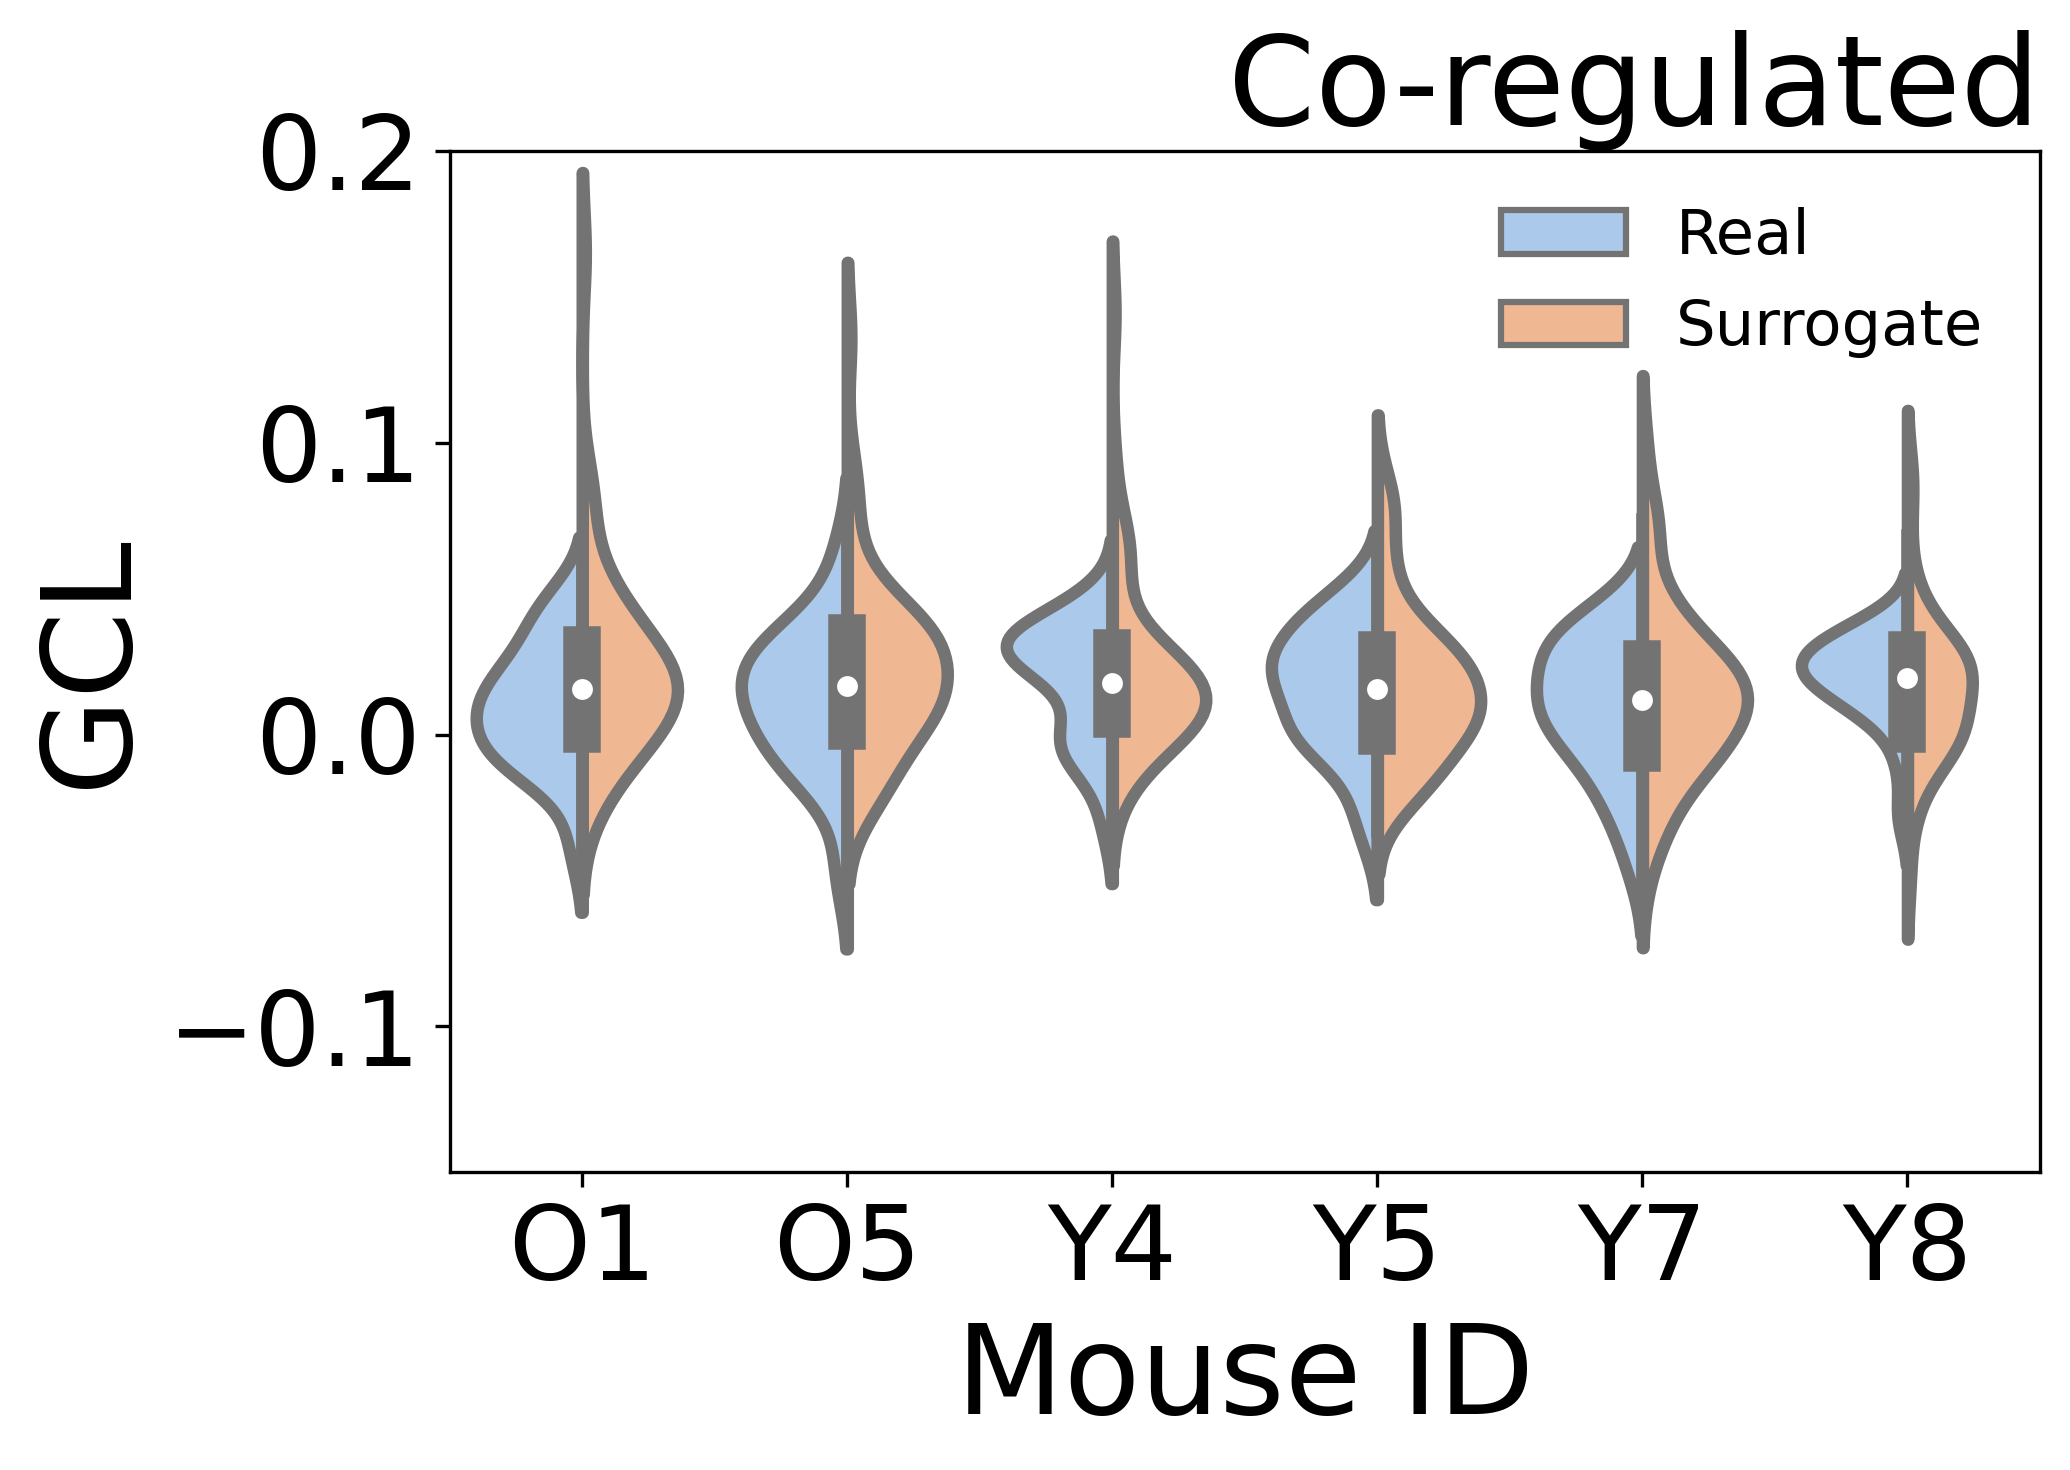

stoch


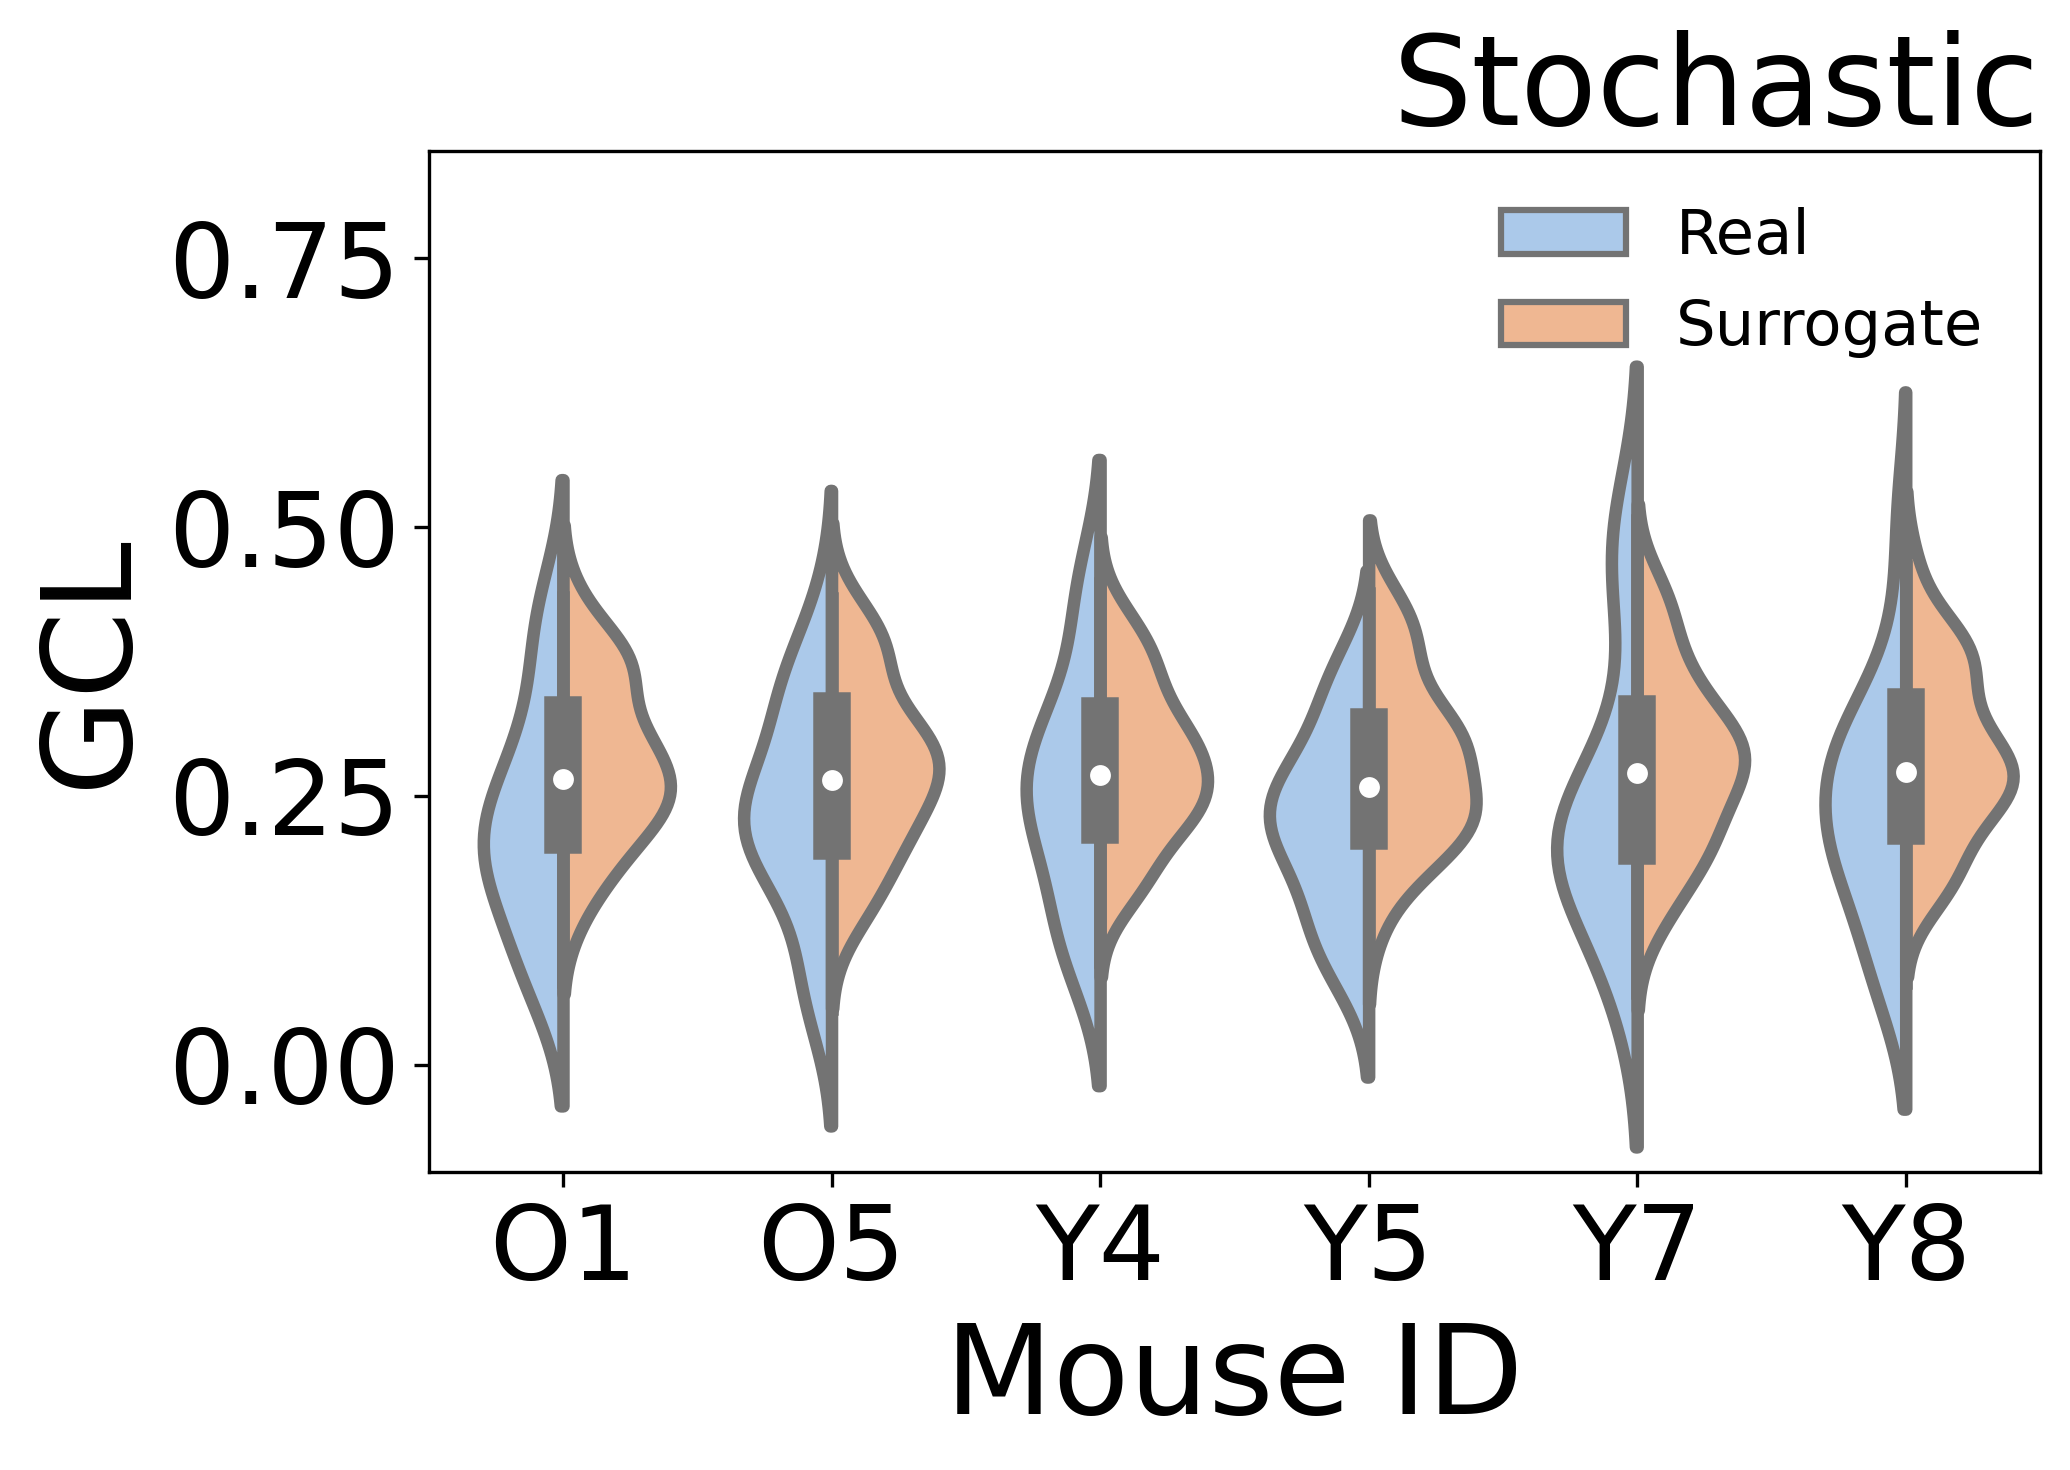

rand


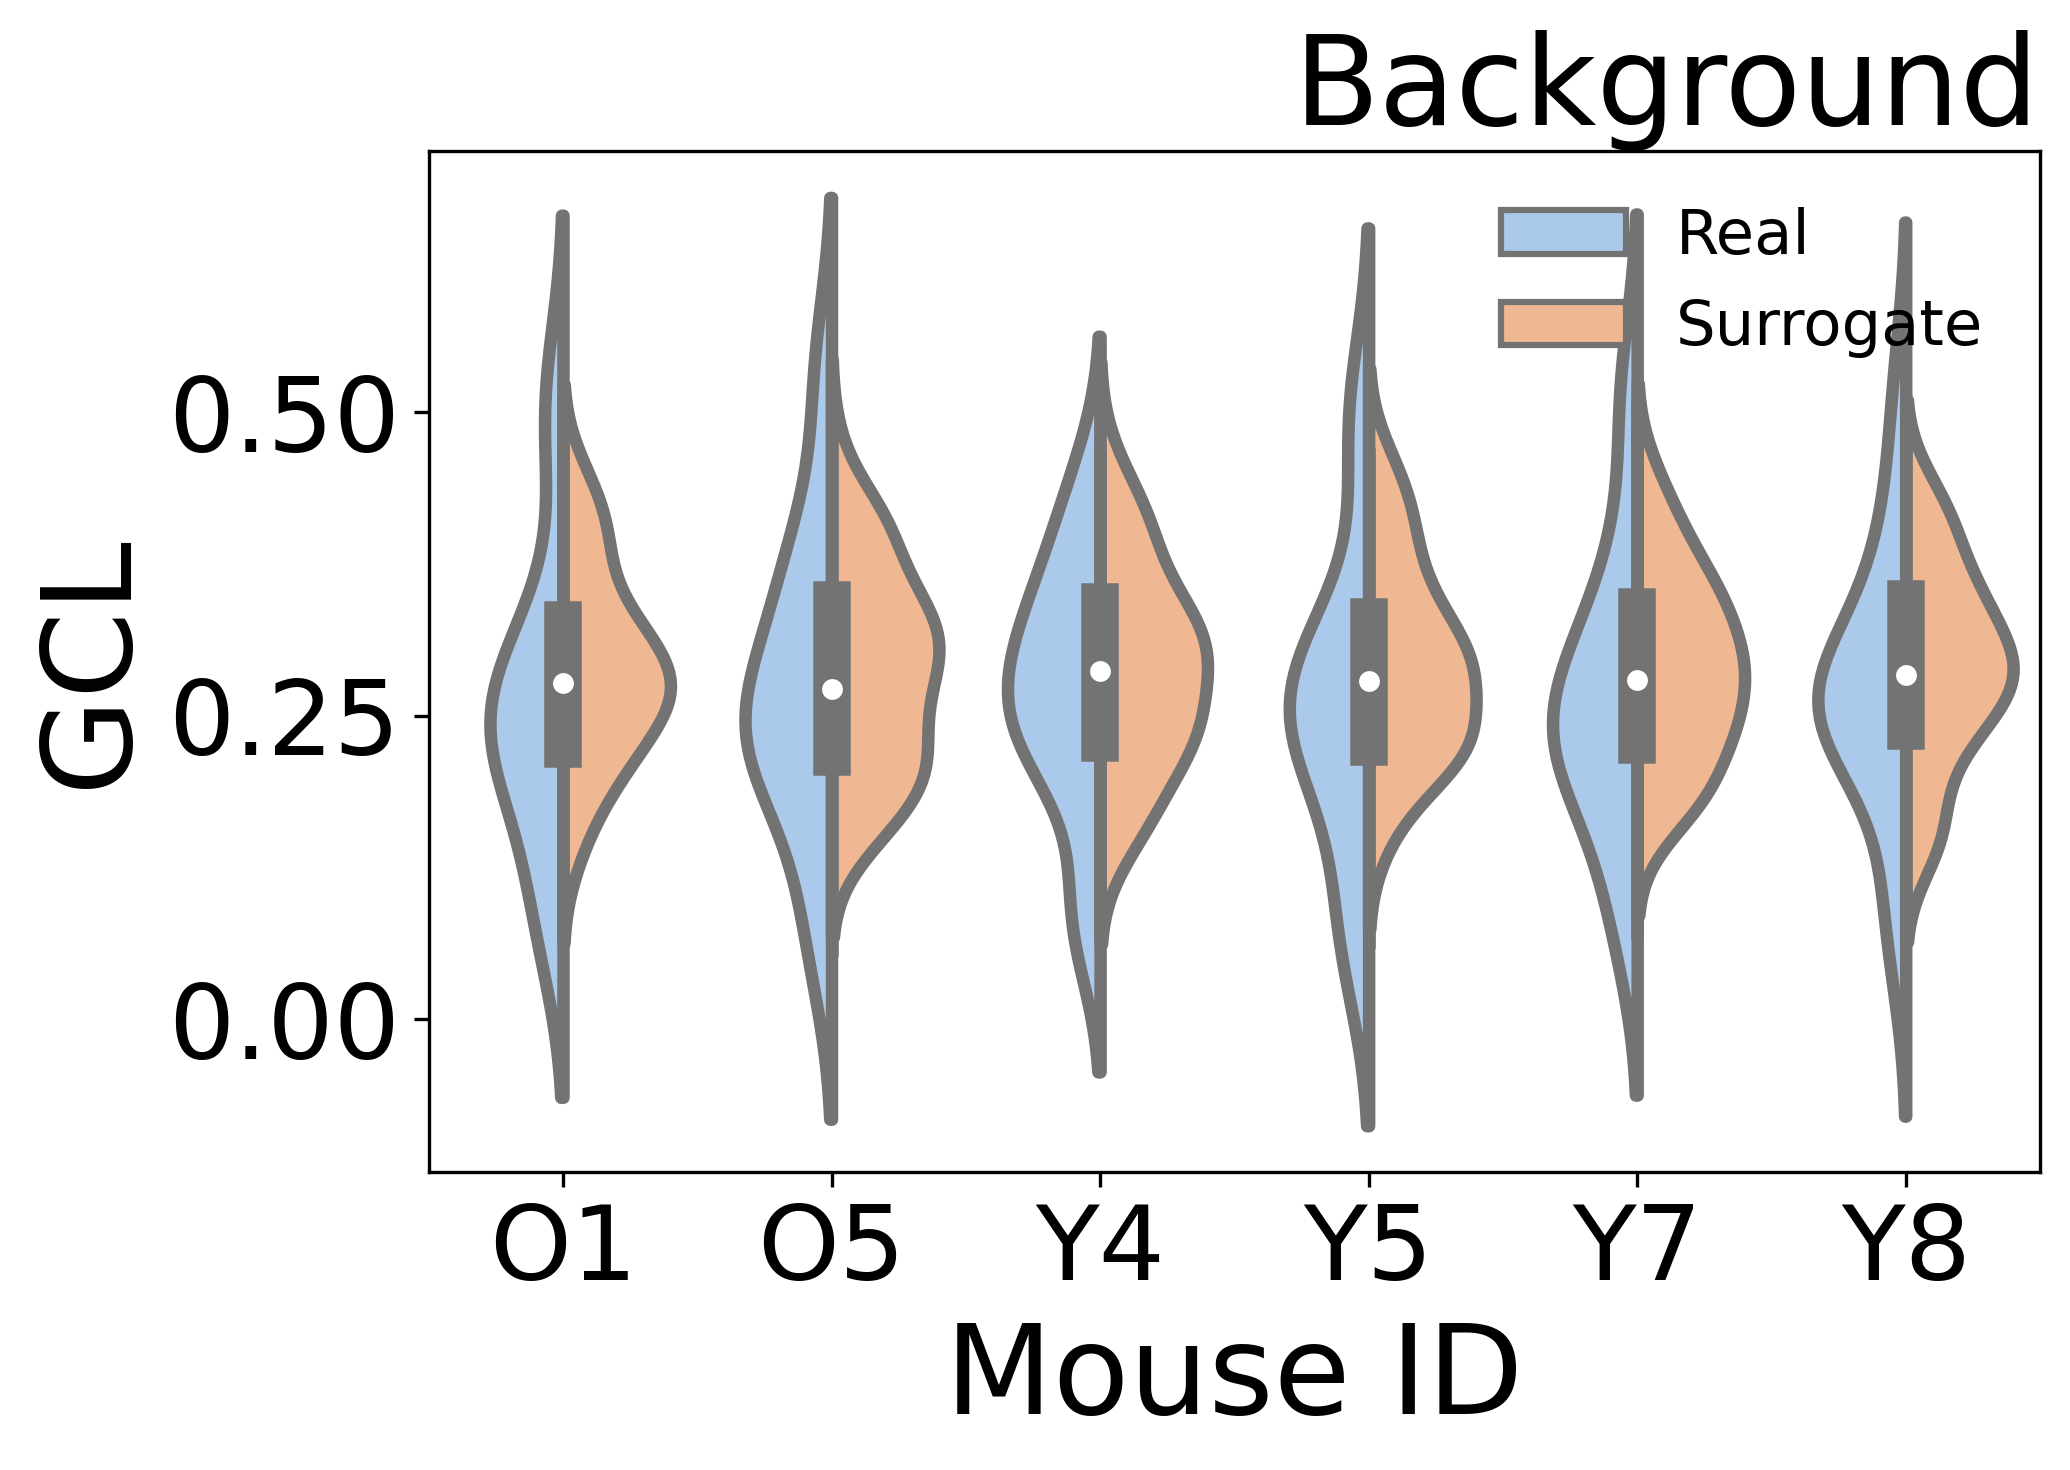

minus
coreg


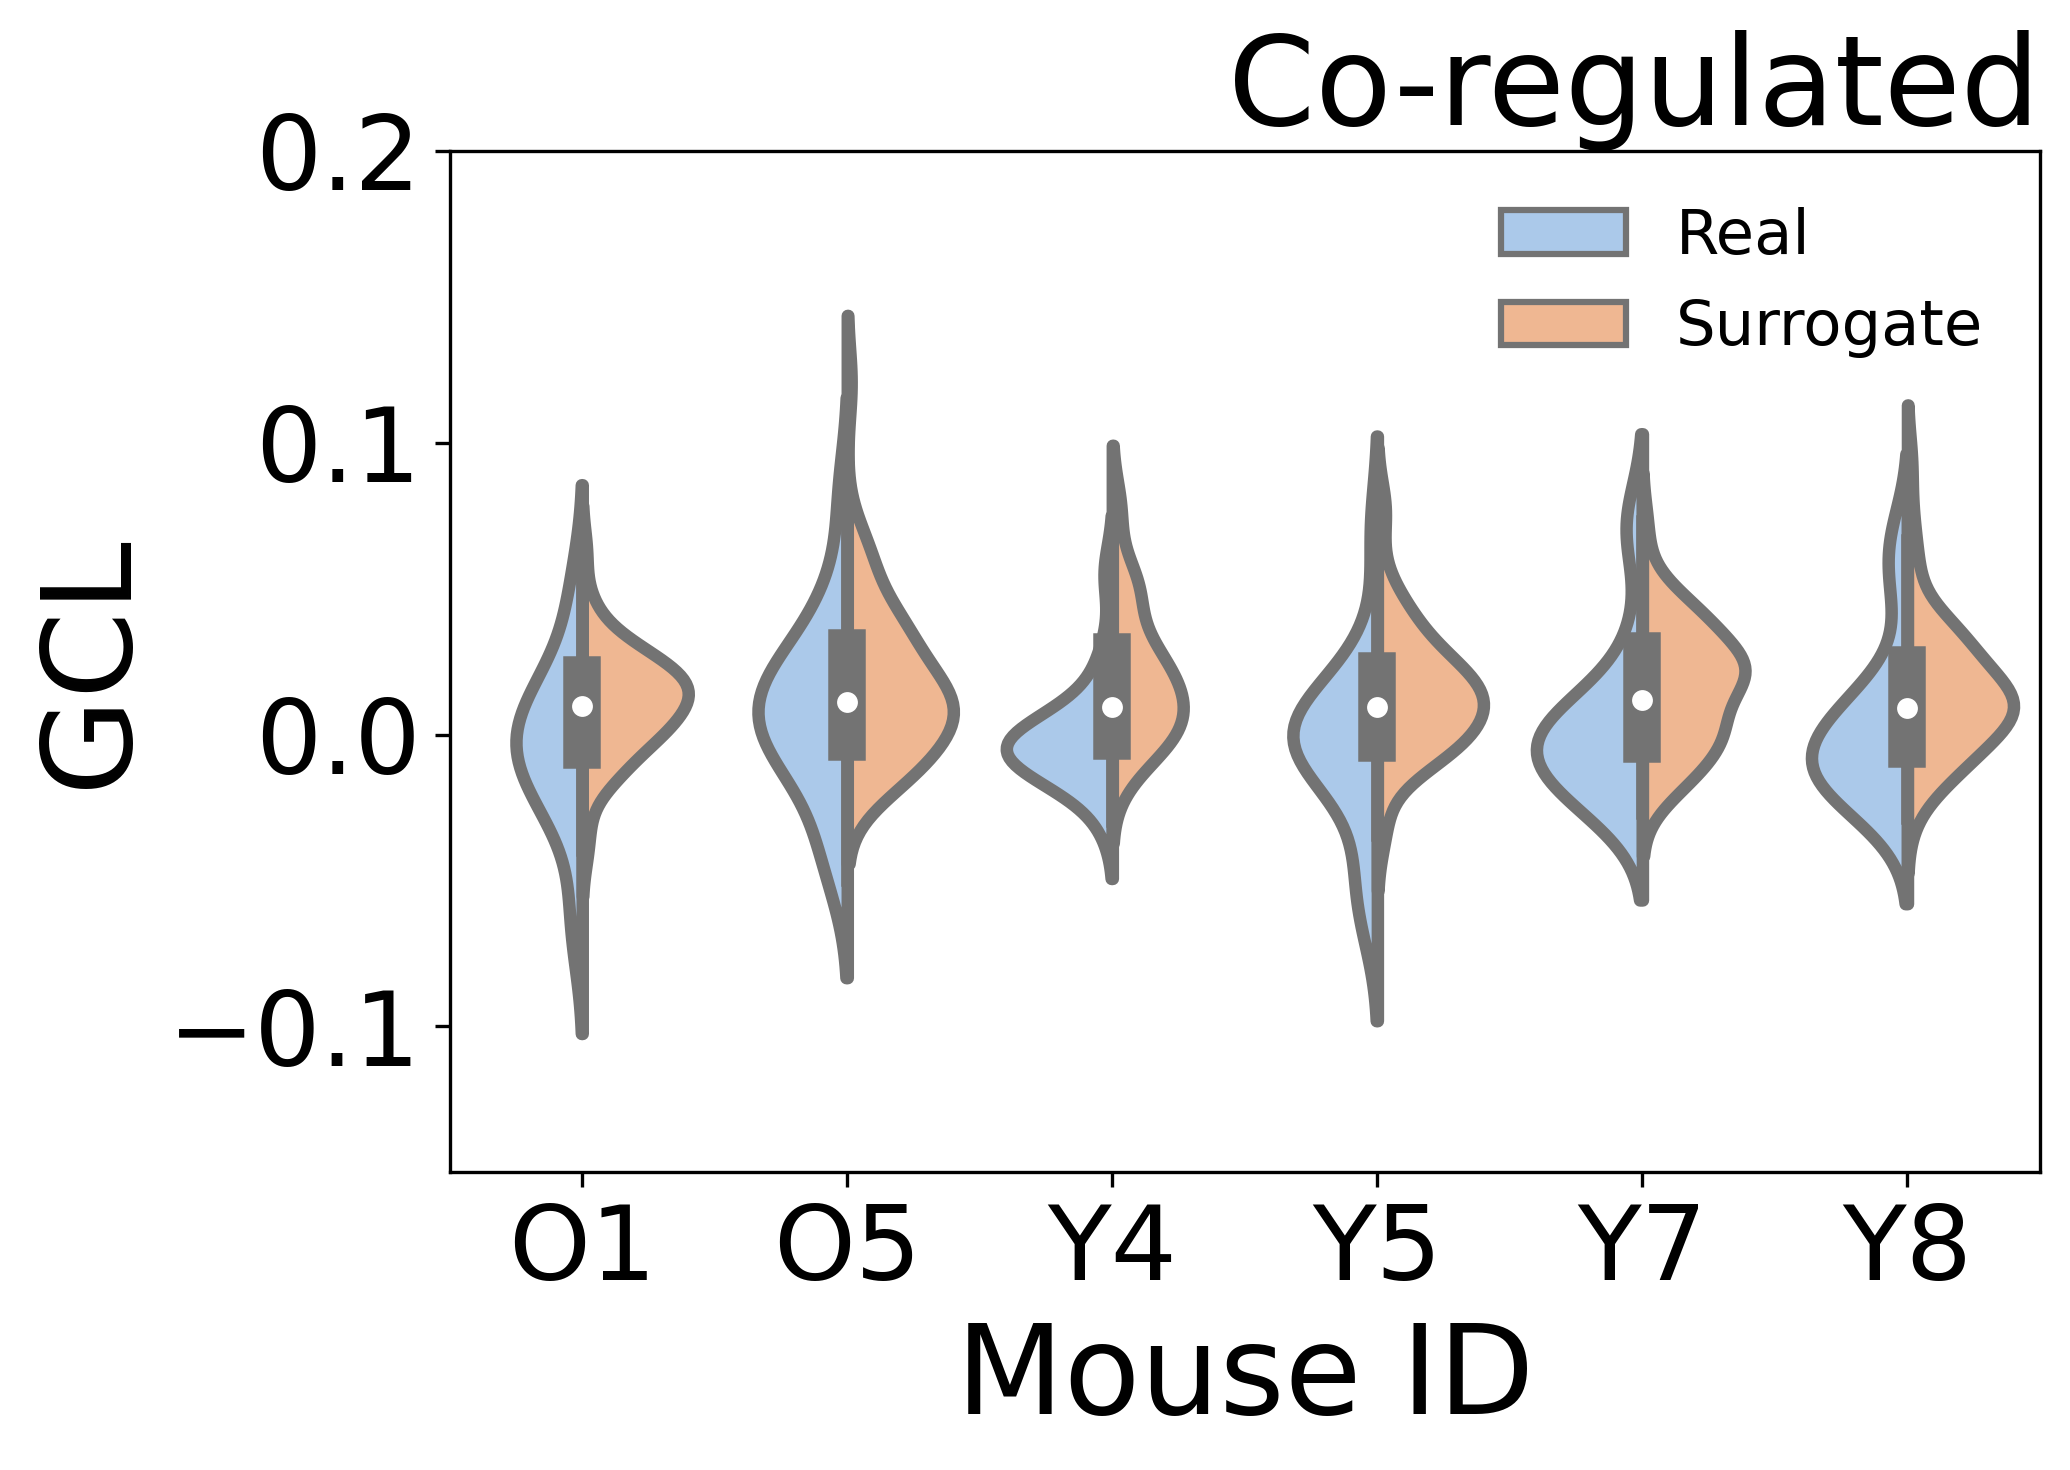

stoch


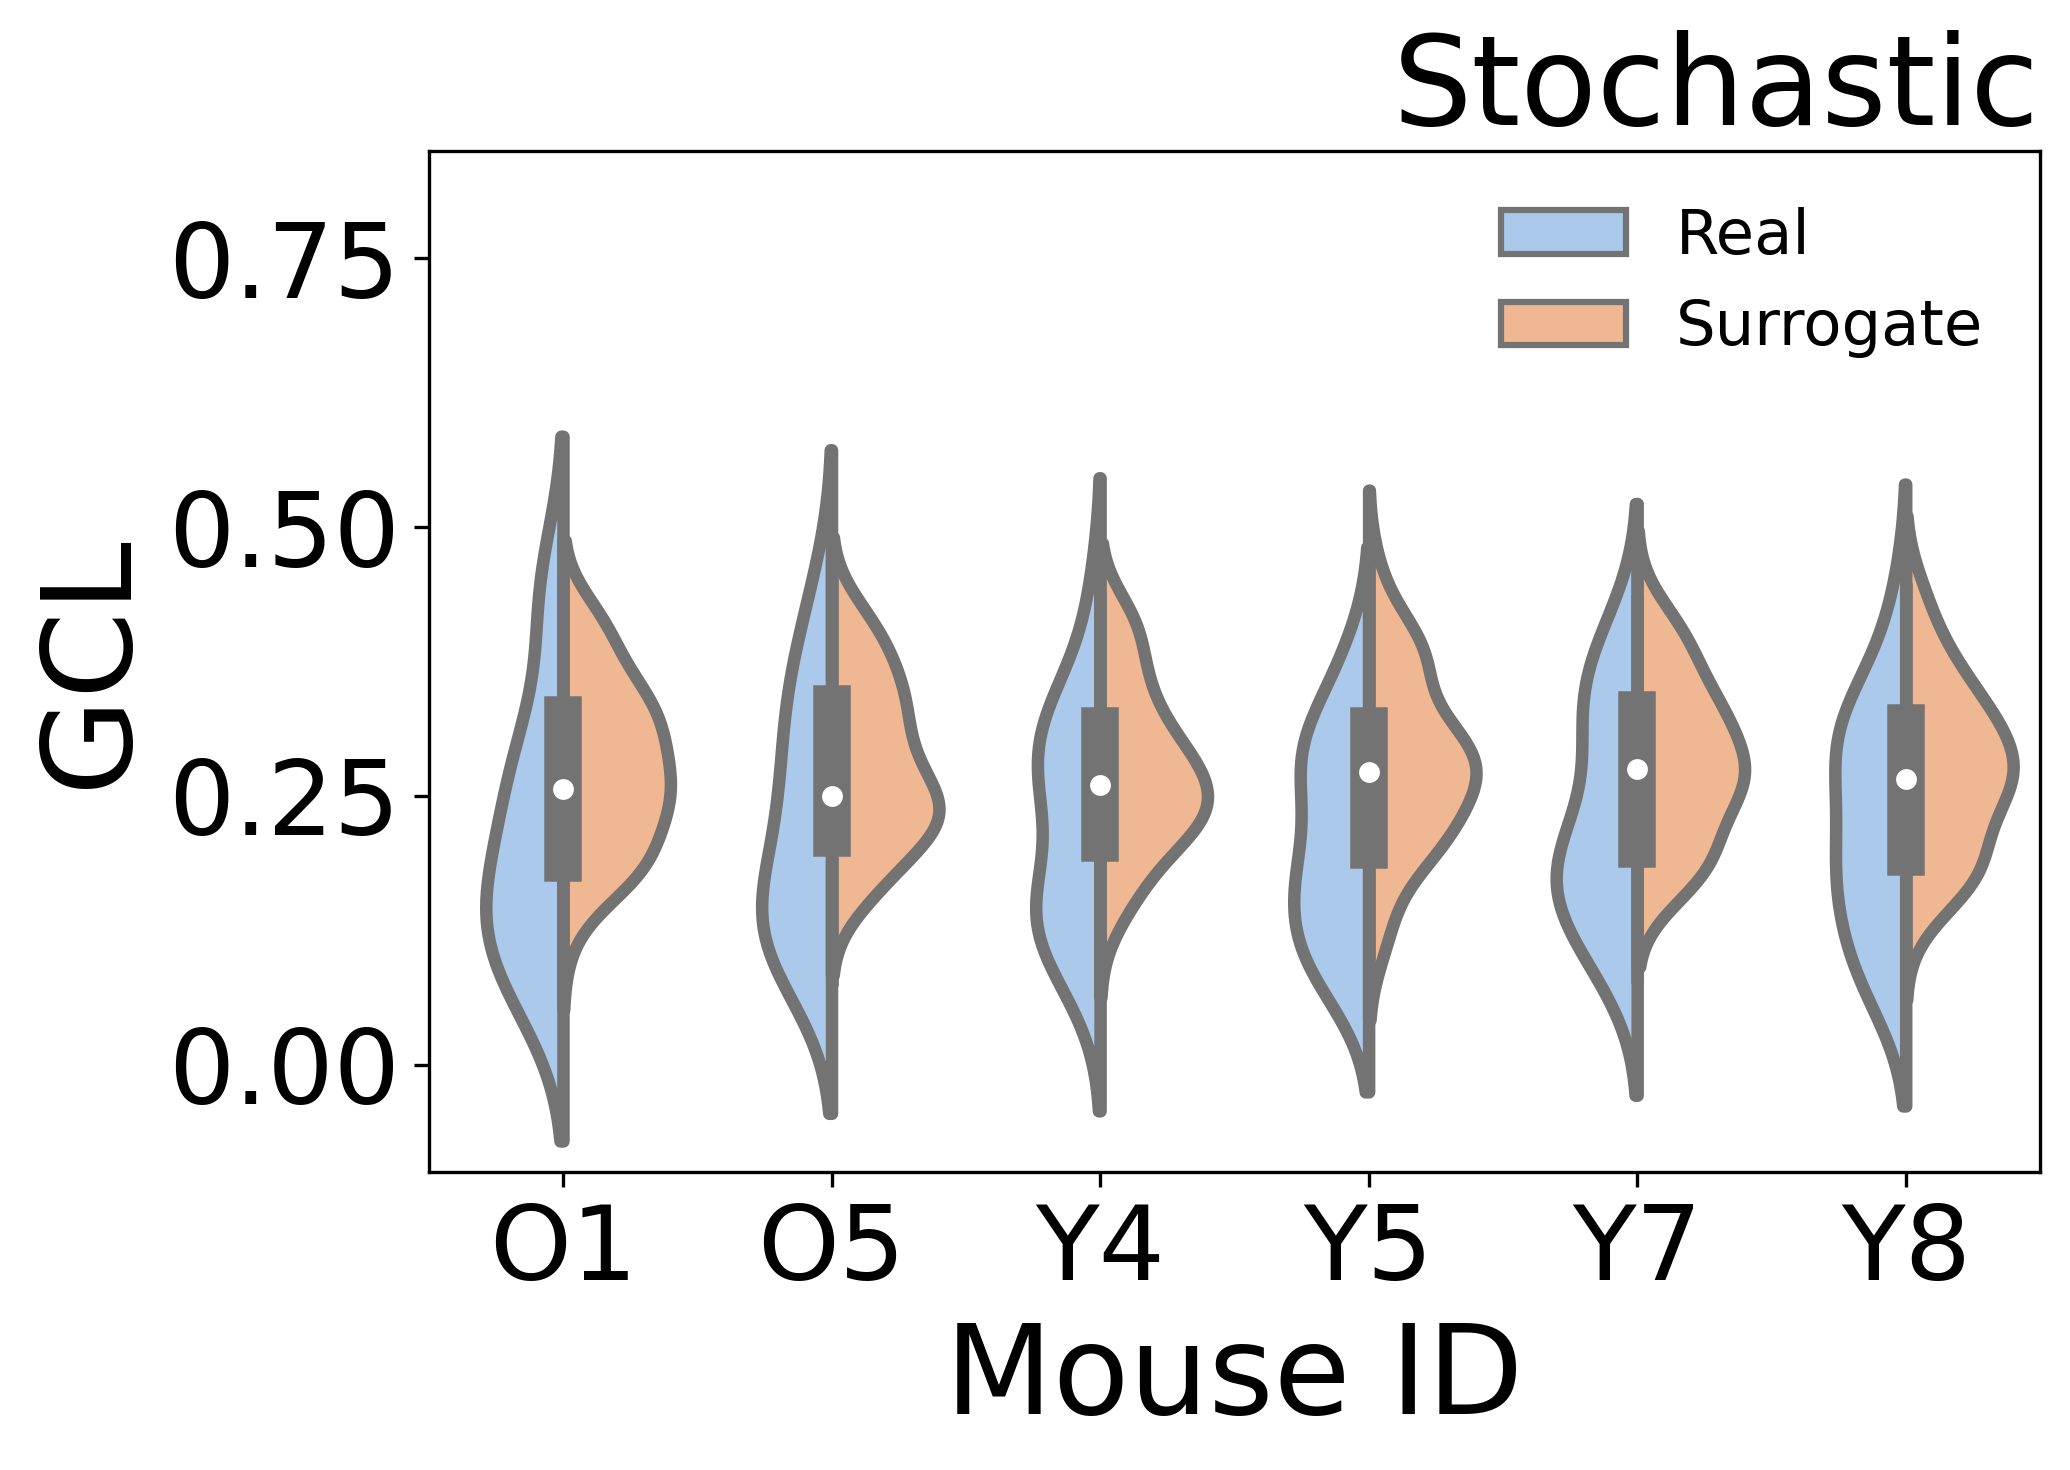

rand


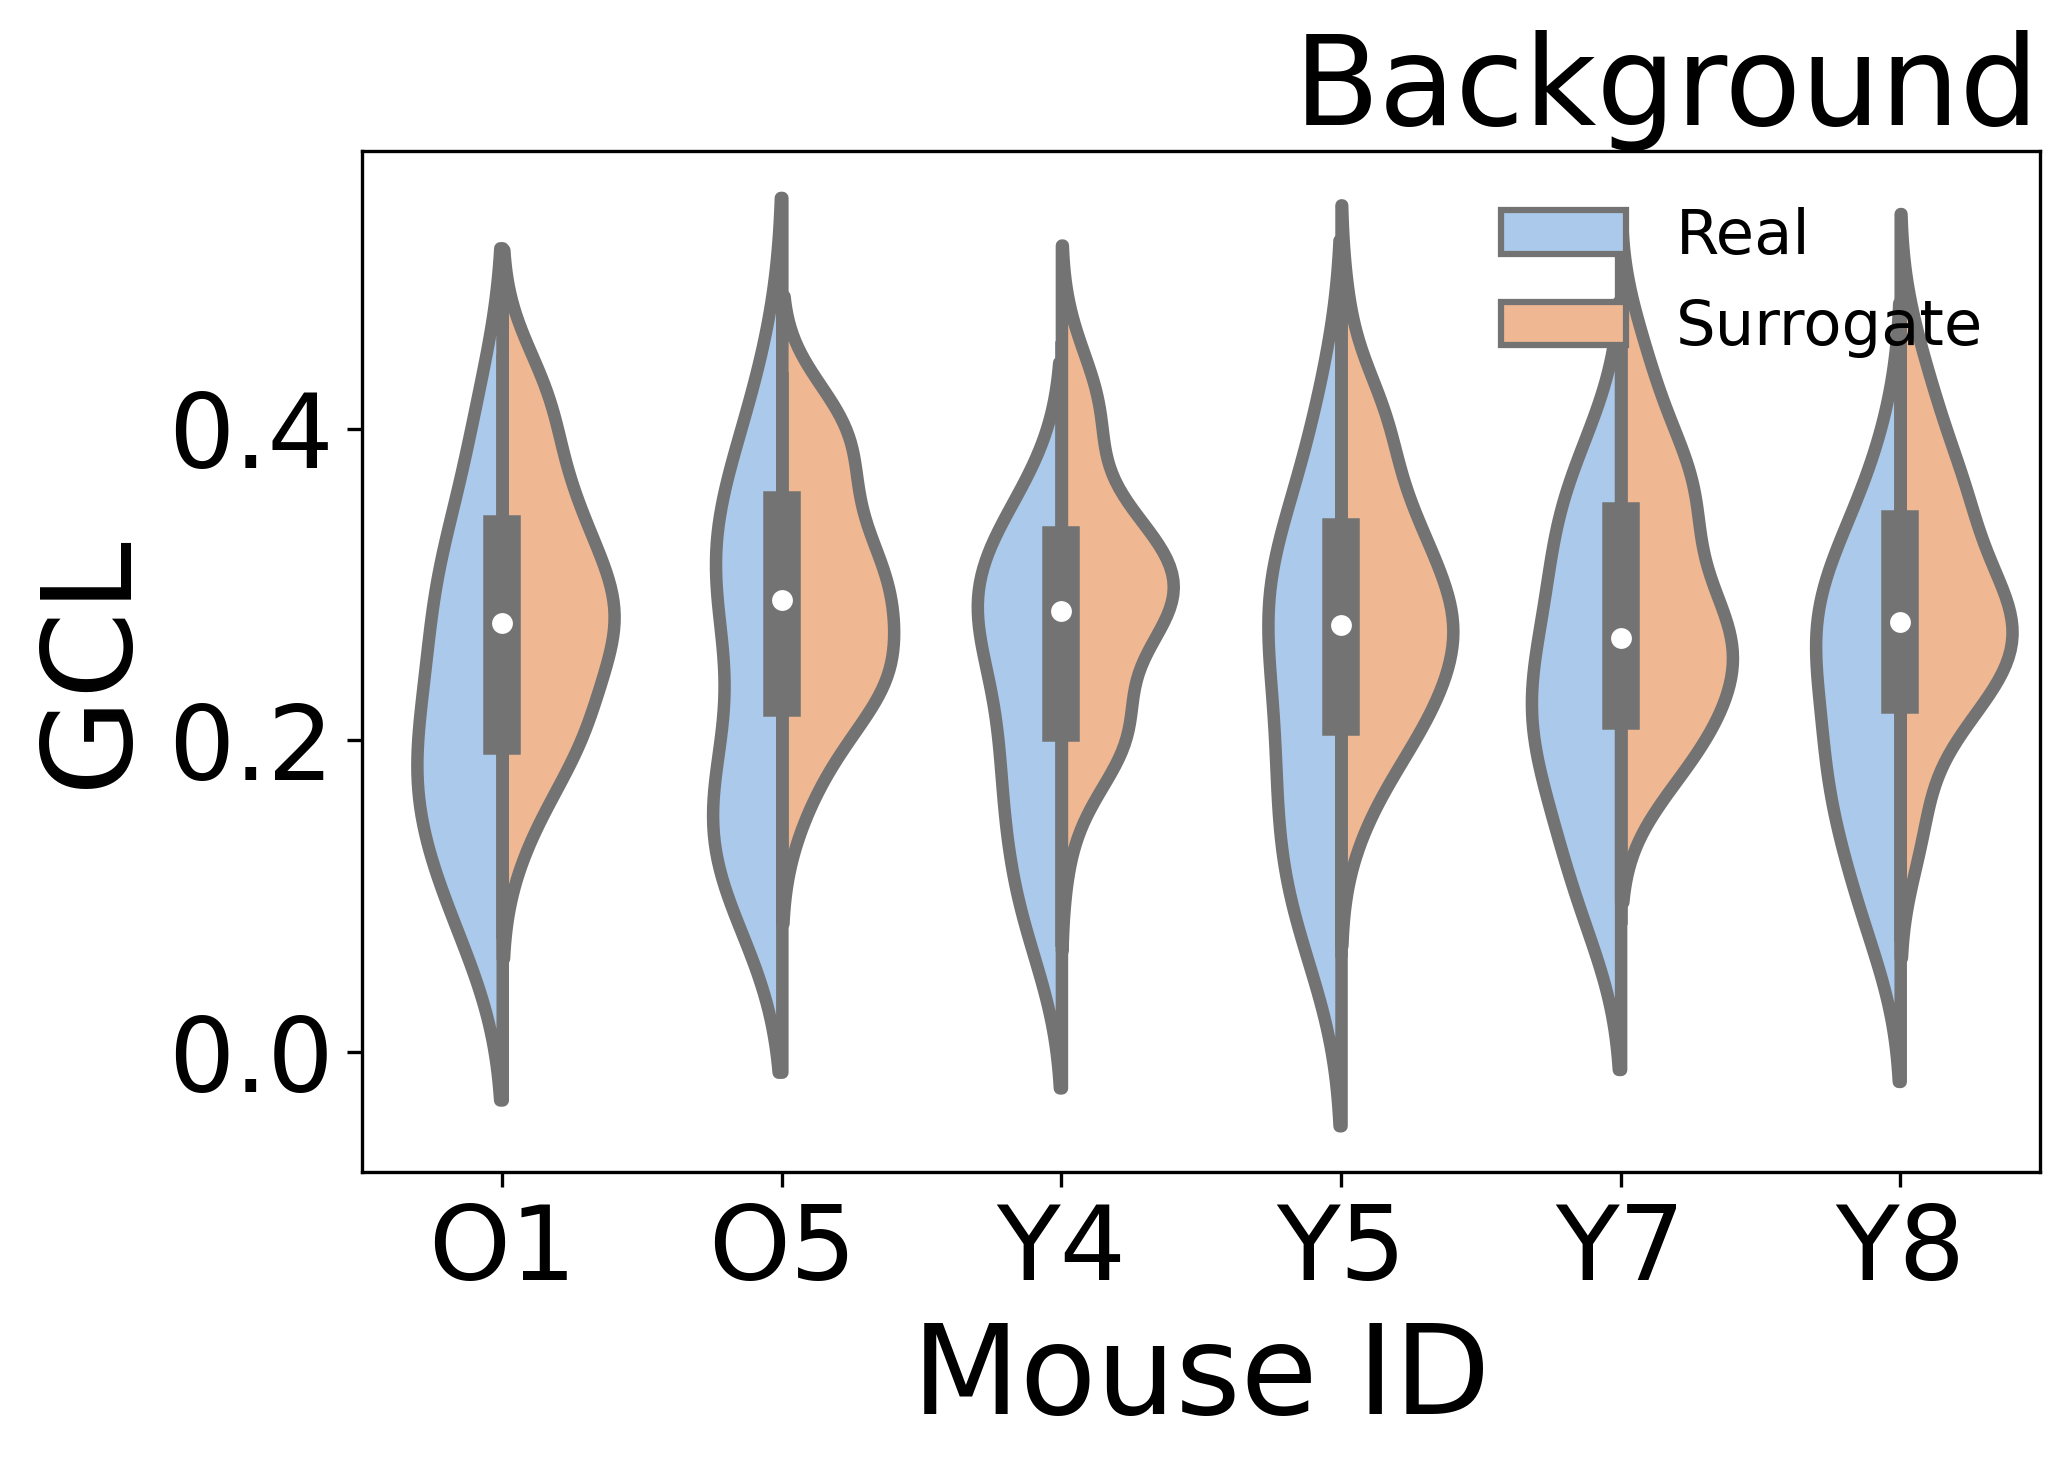

In [72]:
# import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
# plt.figure(figsize=(7,7), dpi=300)


th, kind = 0.4, 'coreg'
kind2name = {'coreg': 'CoReggenesGCL',
        'stoch': 'StochgenesGCL',
        'rand': 'RandomgenesGCL'}


group2name = {'coreg' : 'Co-regulated',
        'stoch' : 'Stochastic',
    'rand': 'Background'}
mice = ['O1', 'O5', 'Y4', 'Y5', 'Y7', 'Y8']
ths = [0.4, 0.5, 0.6]
kinds = ['coreg', 'stoch', 'rand']
x = 'Mouse'
# x = 'Mouse_ID'
y = 'GCL'
order = mice
order = ['O1', 'O5', 'Y4', 'Y5', 'Y7', 'Y8']
# tests = ['t-test-ind']#, 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal']
tests = ['Mann-Whitney']#, 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal']
# box_pairs = [('O1_r', 'O1_s'), ('O5_r','O5_s'), ('Y4_r','Y4_s'), ('Y5_r','Y5_s'), ('Y7_r','Y7_s'), ('Y8_r', 'Y8_s')]
box_pairs=[(order[x],order[y]) for x in range(0, len(order)) for y in range(x+1, len(order))]

for th in [0.5]:#ths:
    for strand in ['plus', 'minus']:
        print(strand)
        for kind in kinds:
            print(kind)
            df_r_pl = convert_table(df_real_pl, th, kind, group='r')
            df_s_pl = convert_table(df_sur_pl, th, kind, group='s')
            df_r_mi = convert_table(df_real_mi, th, kind, group='r')
            df_s_mi = convert_table(df_sur_mi, th, kind, group='s')
            if strand == 'plus':
                df_t = pd.concat((df_r_pl,df_s_pl), axis=0)
            elif strand == 'minus':
                df_t = pd.concat((df_r_mi,df_s_mi), axis=0)
            fig, ax = plt.subplots(1,1, figsize=(7,5),dpi=300)
            ax = sns.violinplot(data=df_t, x=x, y=y, hue='Group', order=order, fontsize=50, ax=ax, split=True,
                               palette='pastel')
            ax.set_title(group2name[kind], loc='right')
            plt.xlabel(None)
            plt.ylabel('GCL')
            plt.legend(loc='upper right', fontsize=15)
            # plt.xlim([0,8])
            if kind == 'stoch':
                plt.ylim([-0.1, 0.85])
            elif kind == 'coreg':
                plt.ylim([-0.15, 0.2])
                
            plt.xlabel('Mouse ID')
            plt.tight_layout()
            plt.savefig(f'../scDNAm/PICS/png/GCL_raw_{strand}_strand_normalized_by_mouse_{x}_{y}_{test}_{th}_{kind}.png', format='png', dpi=300)
            plt.show()

# Plus by mouse

In [16]:
typ = 'plus'
# typ = 'minus'
if typ == 'plus':
    file = 'For_Orr/TableForAndrei_PlusStrand1cpg.xlsx'
else:
    file = 'For_Orr/TableForAndrei_MinusStrand1cpg.xlsx'

df_real = pd.read_excel(file, header=[0,1,2,3])
df_sur = pd.read_excel(file, header=[0,1,2,3], sheet_name=1)

O1
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


<Figure size 2100x2100 with 0 Axes>

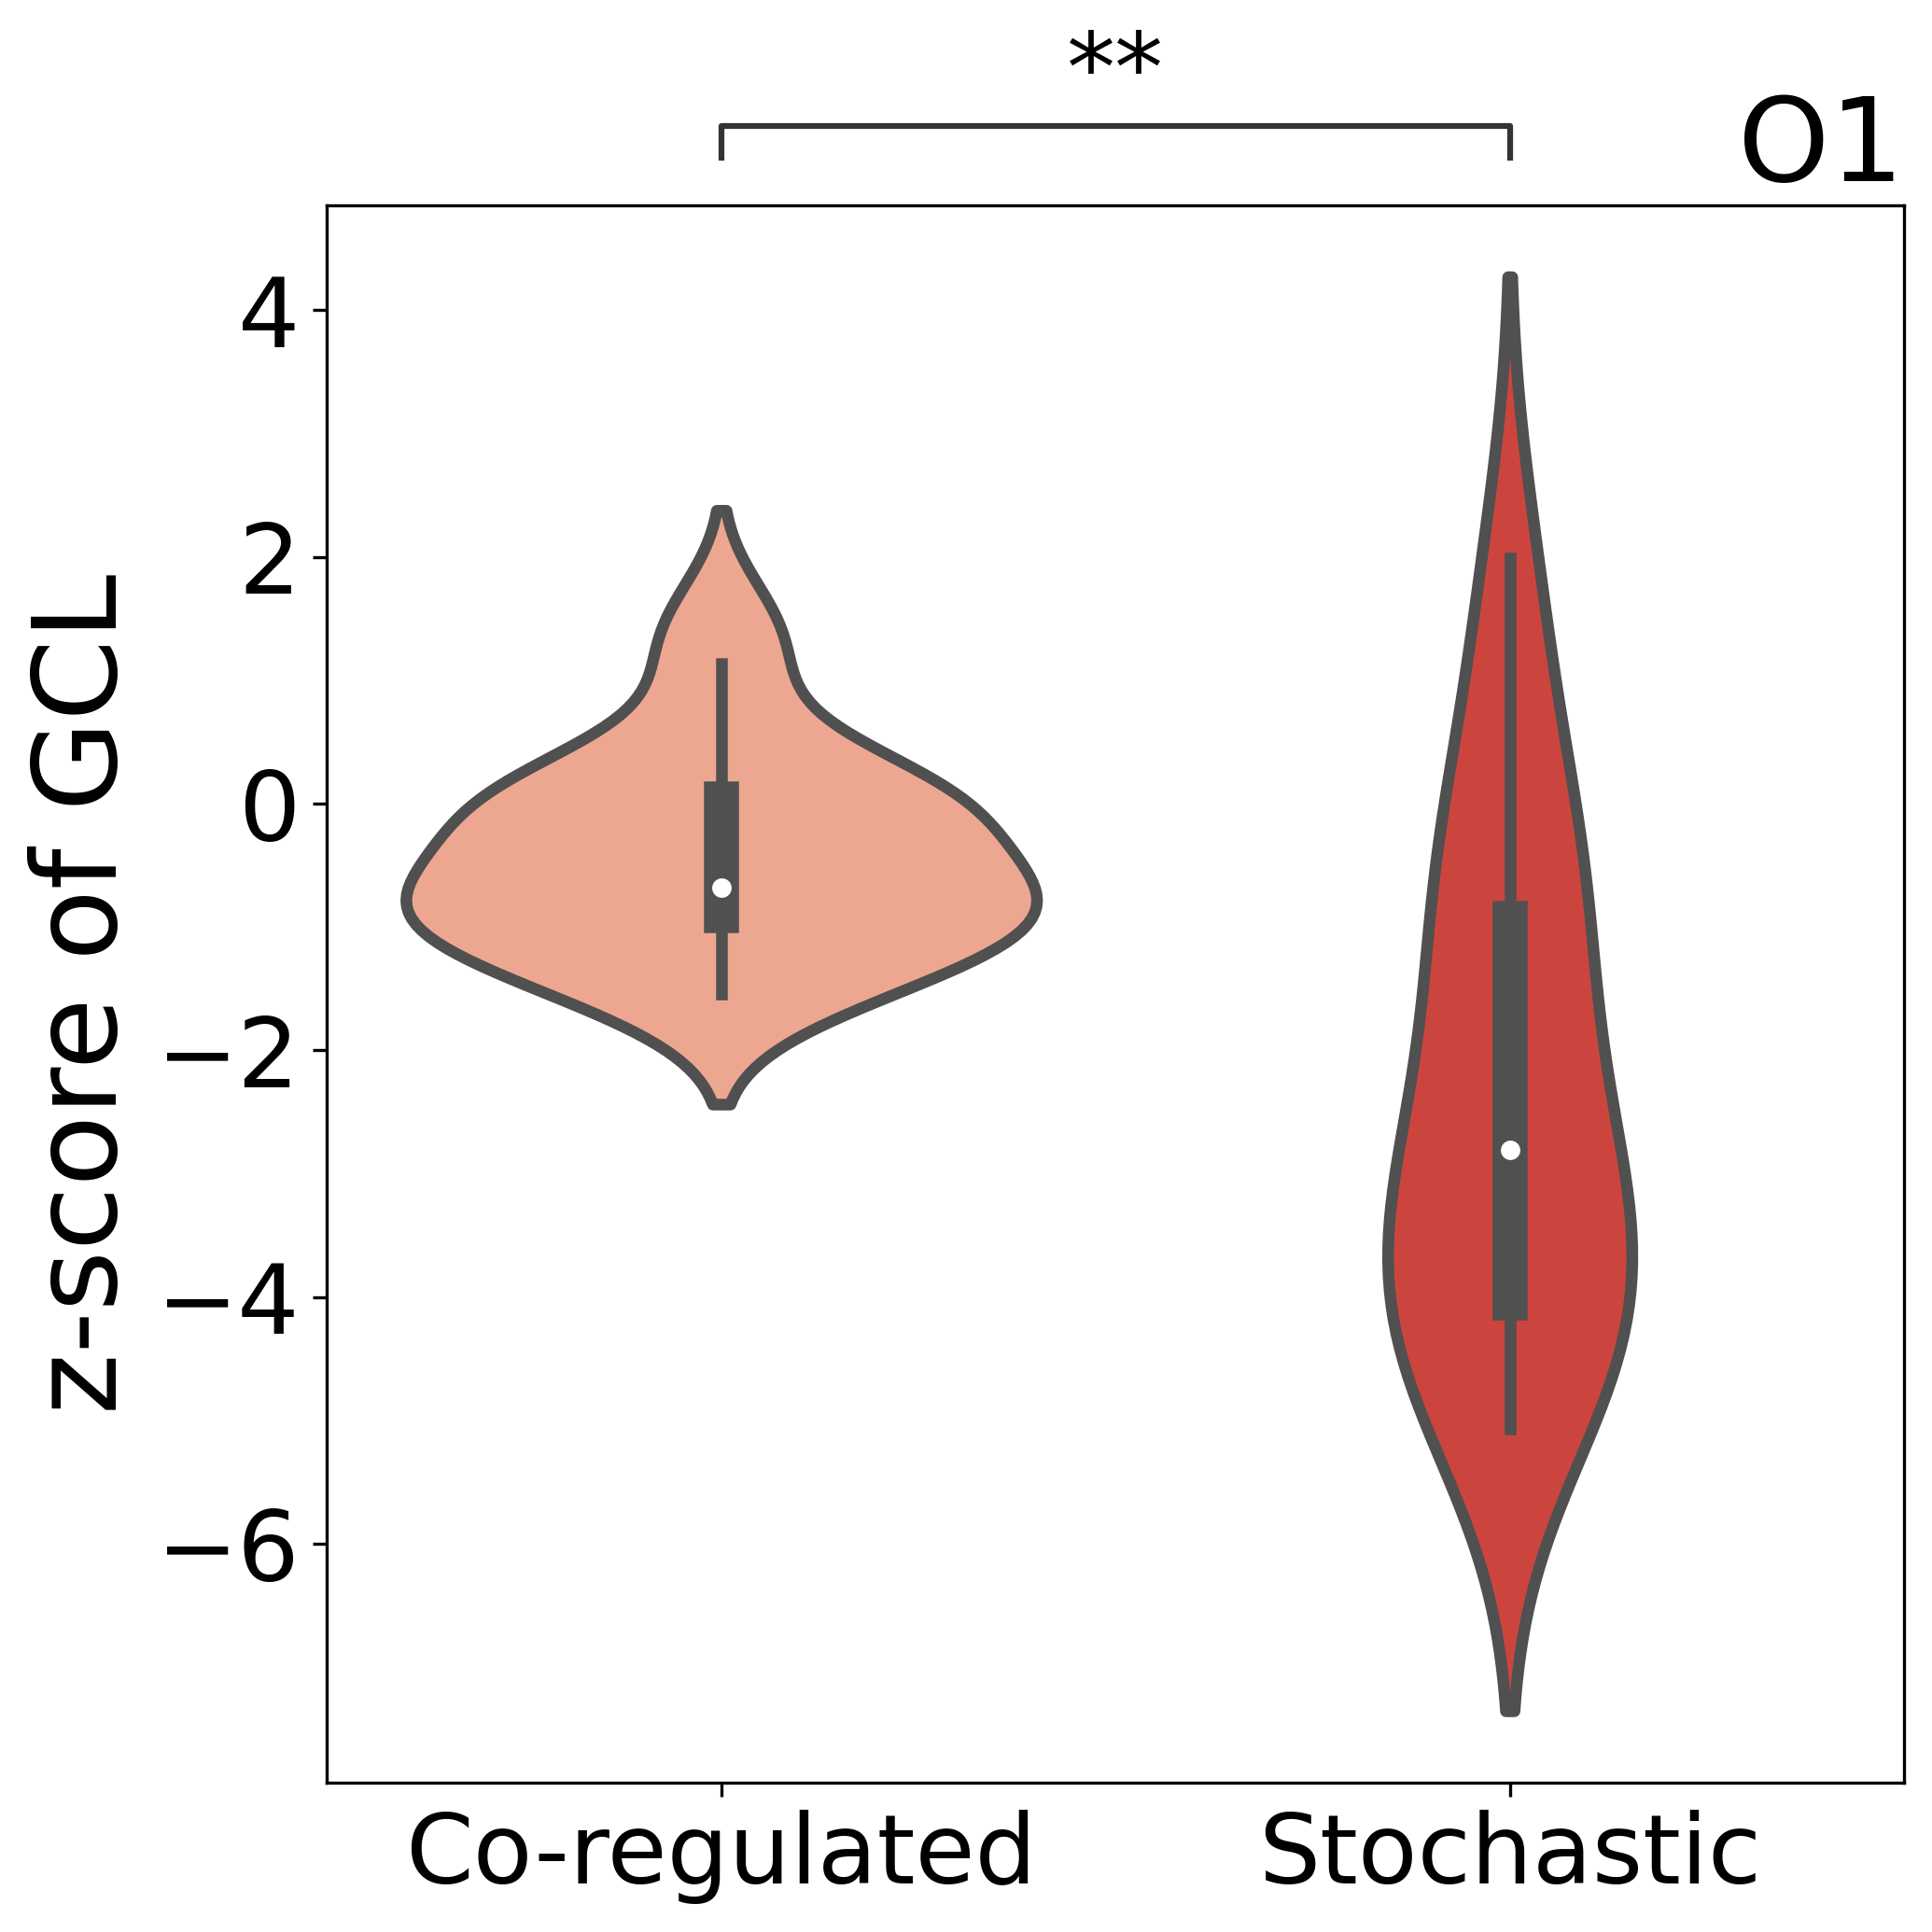

O5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


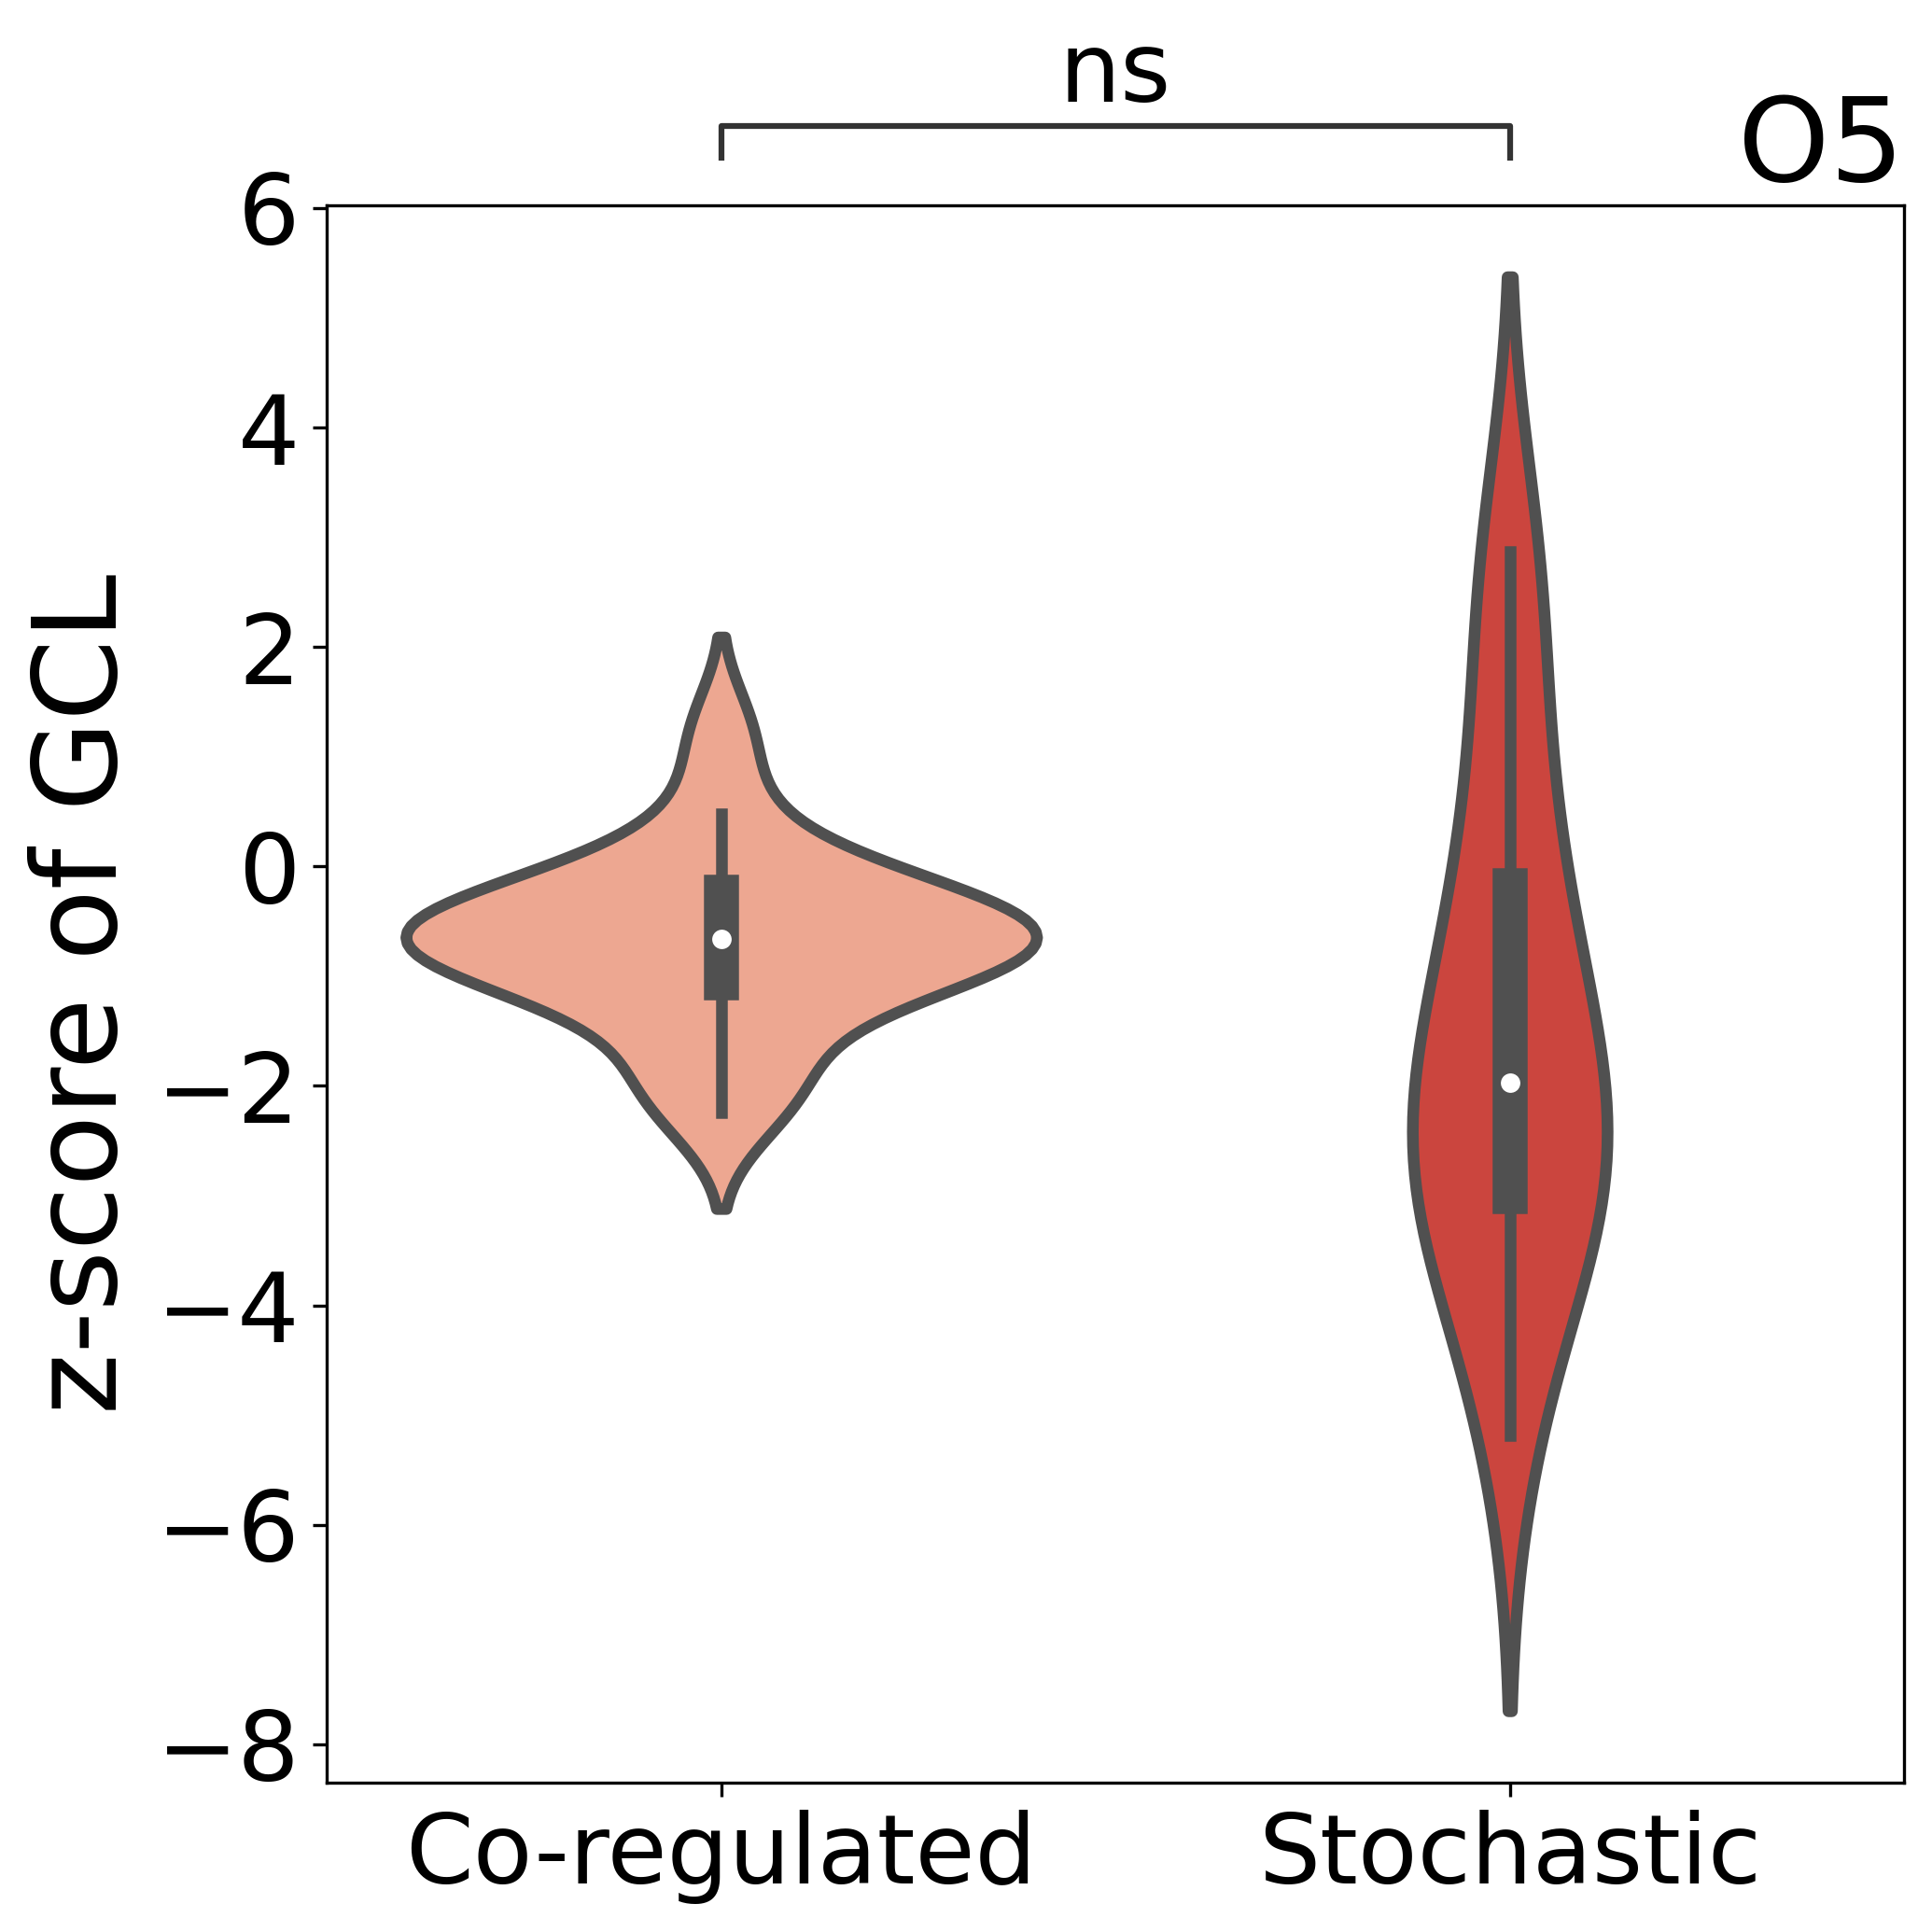

Y4
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


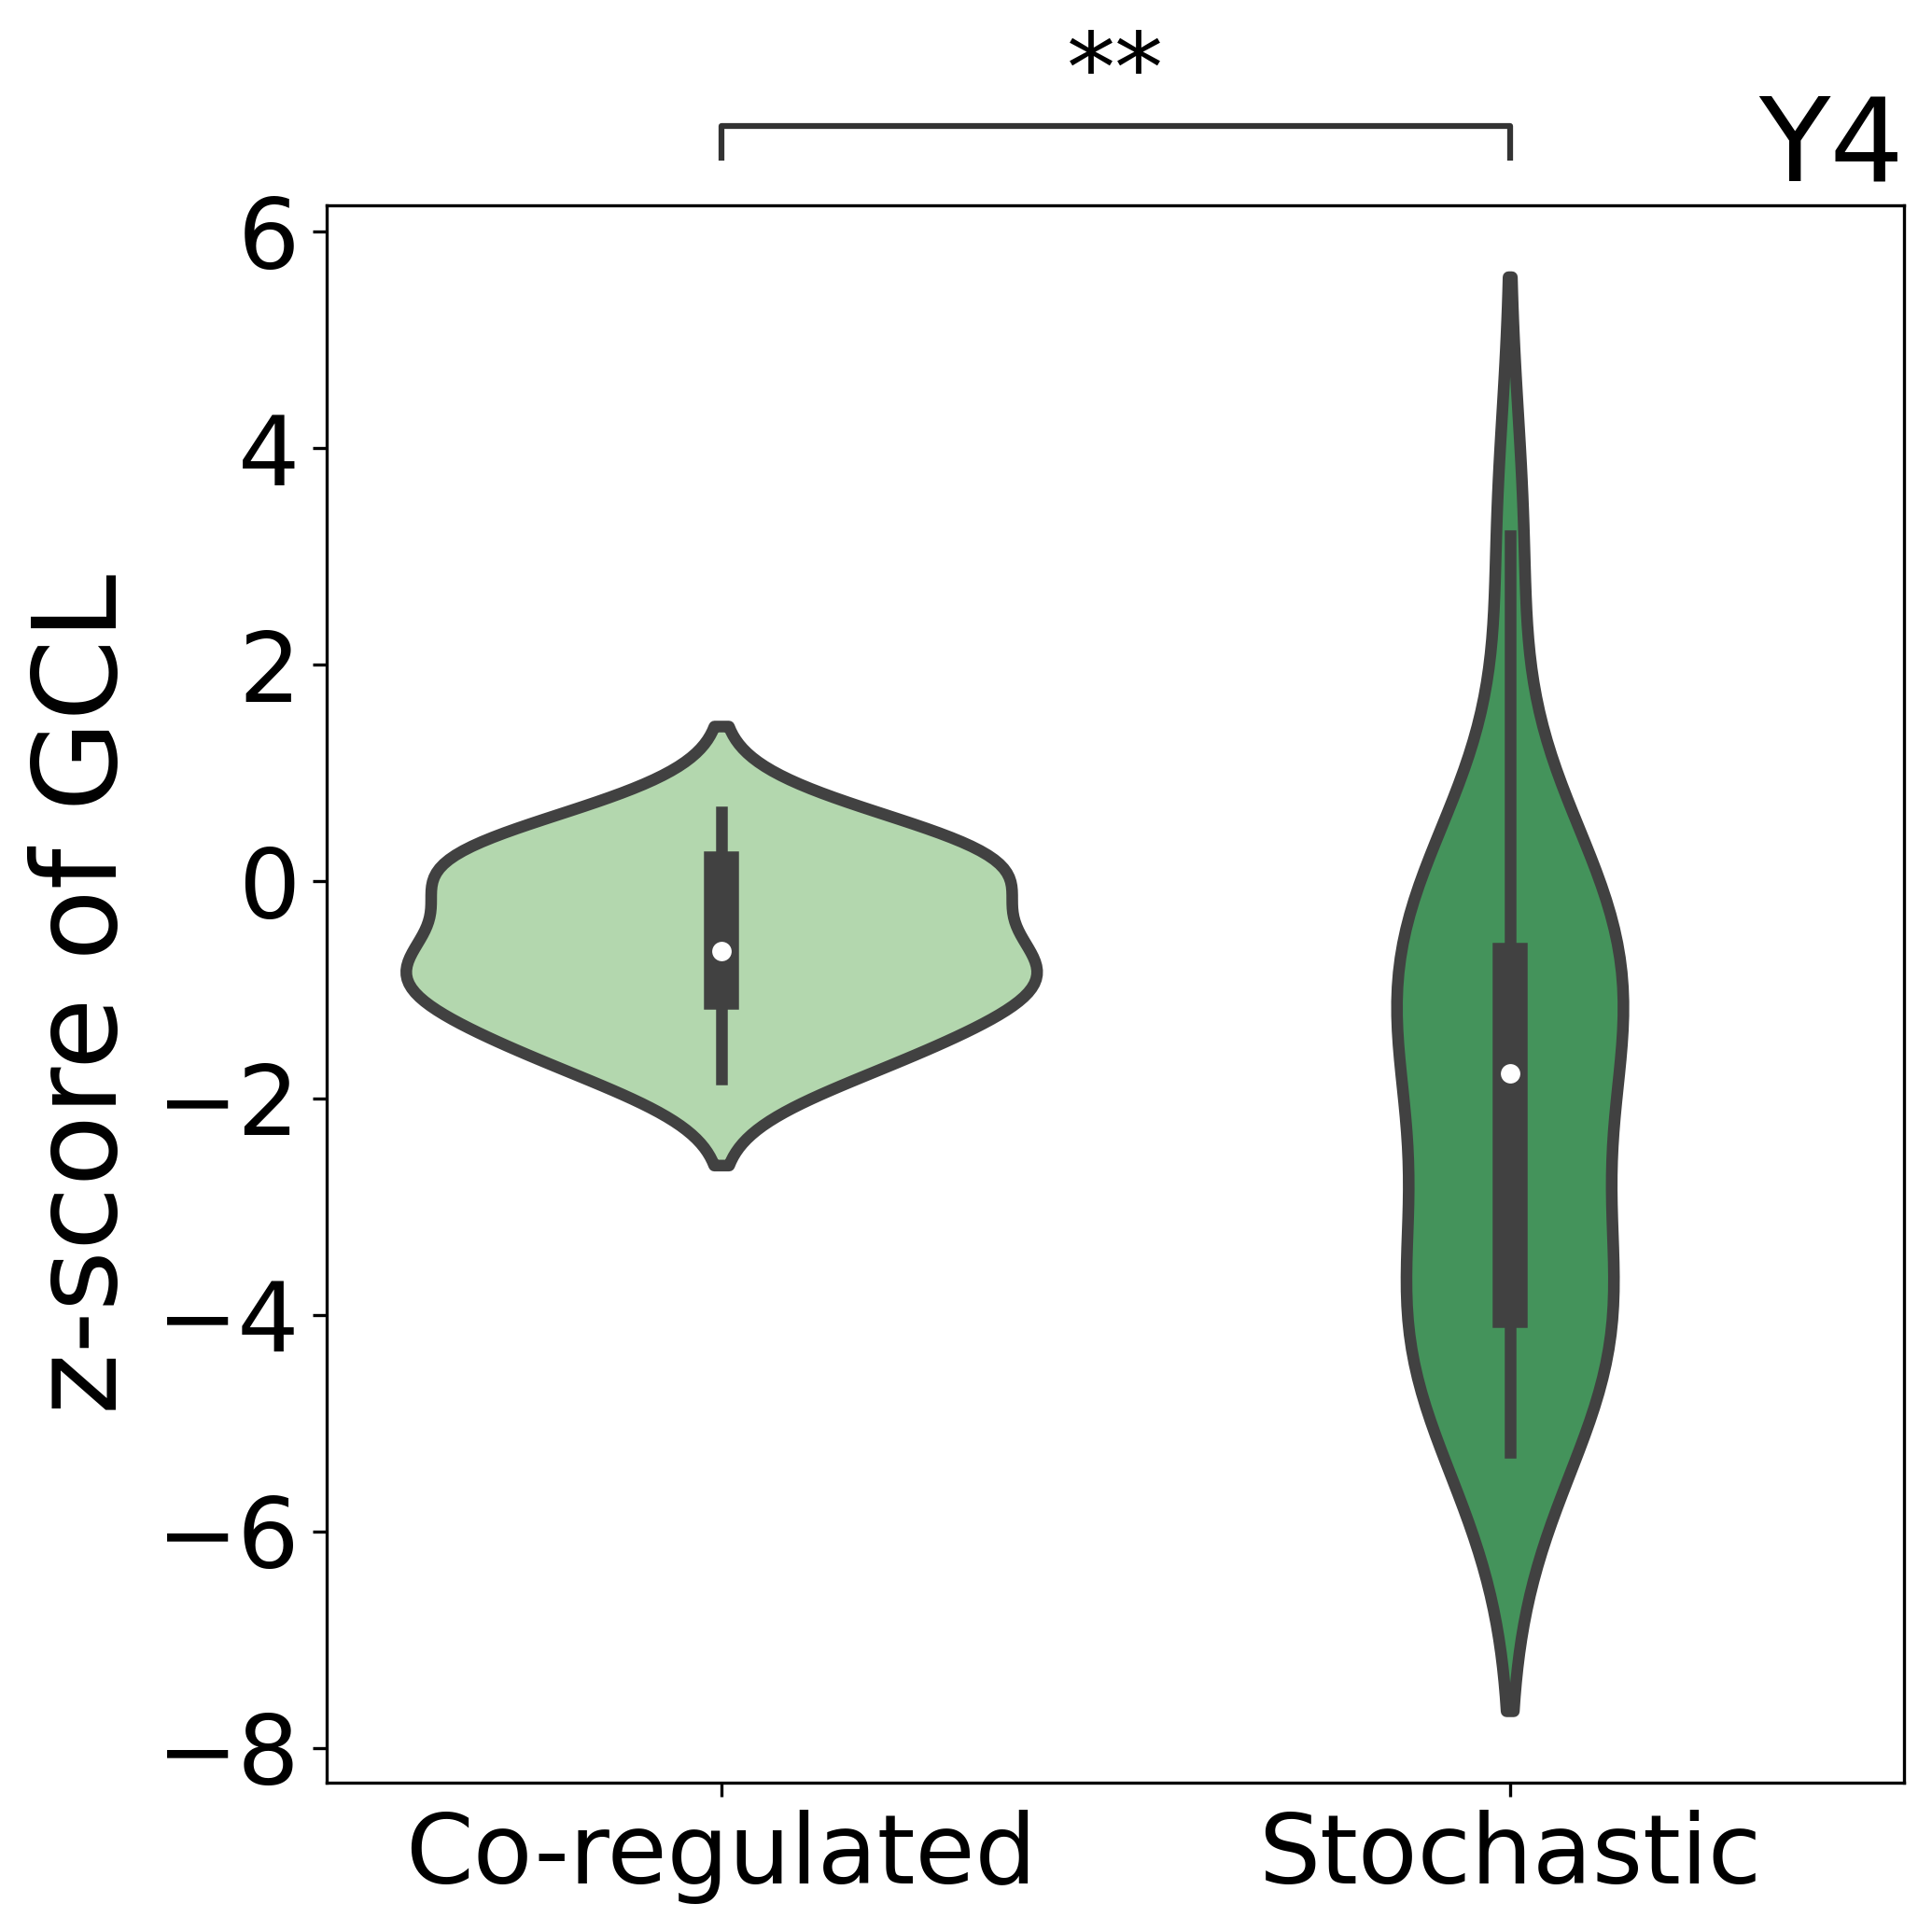

Y5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


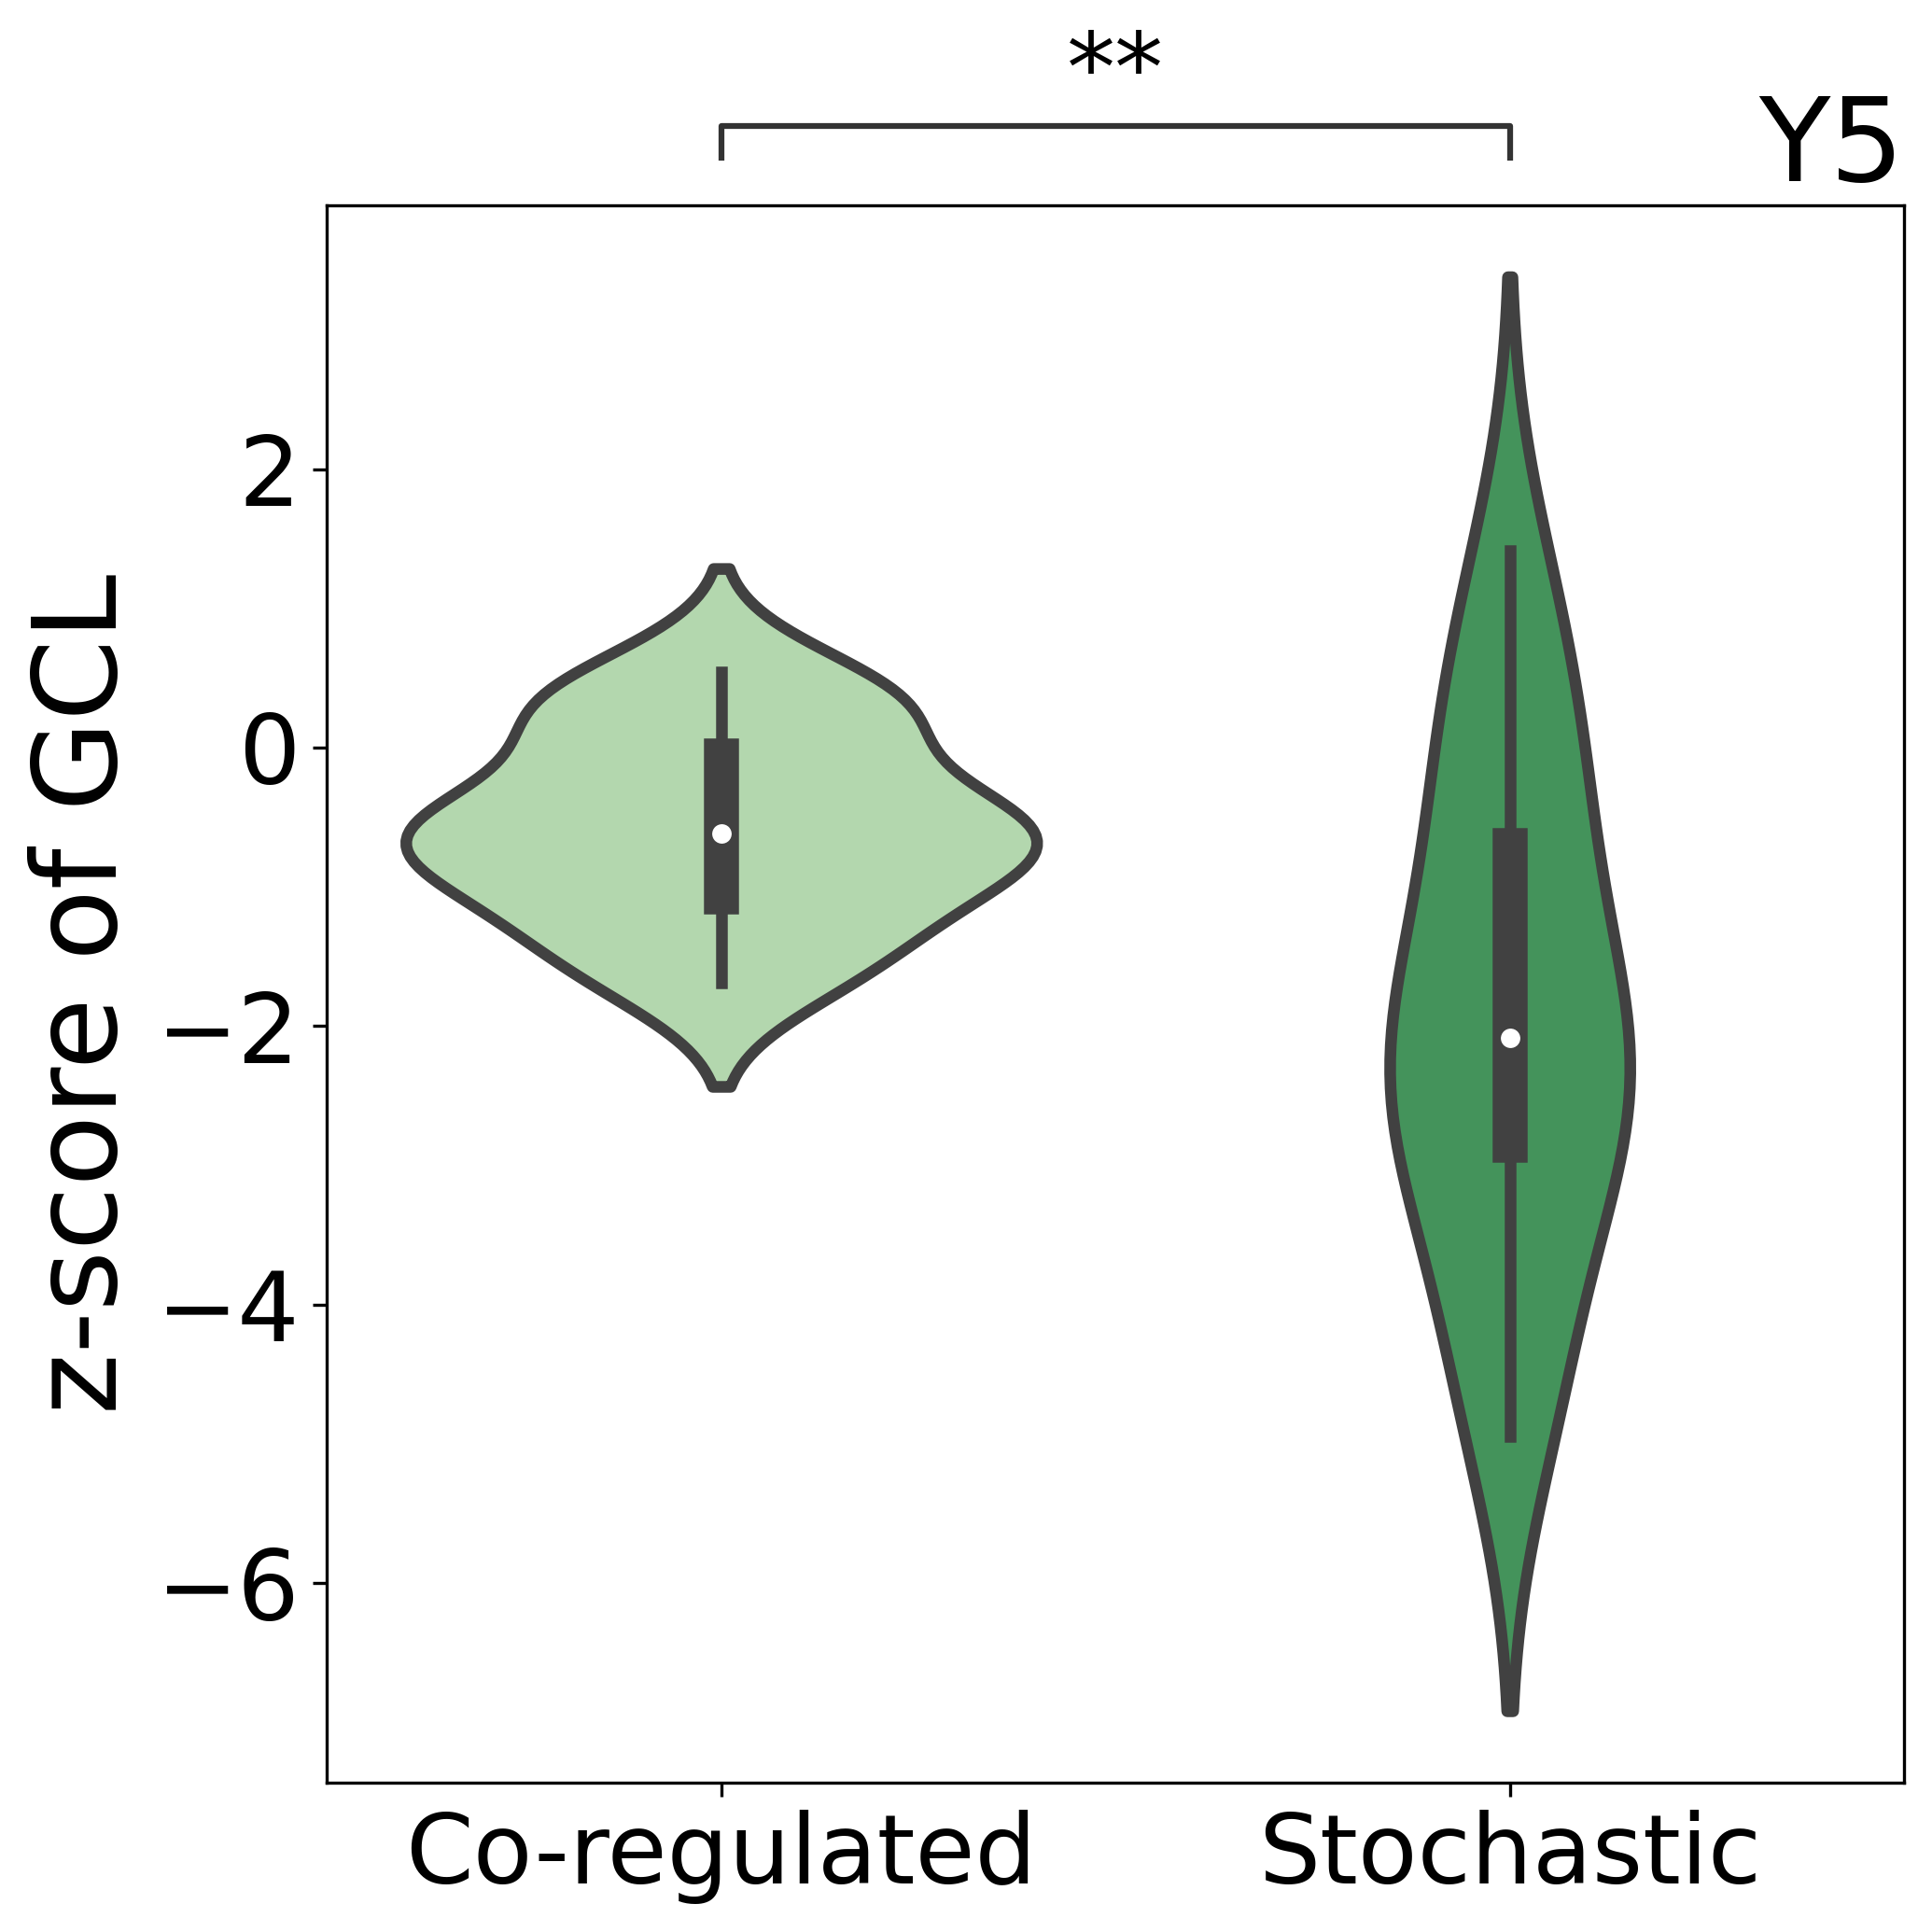

Y7
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


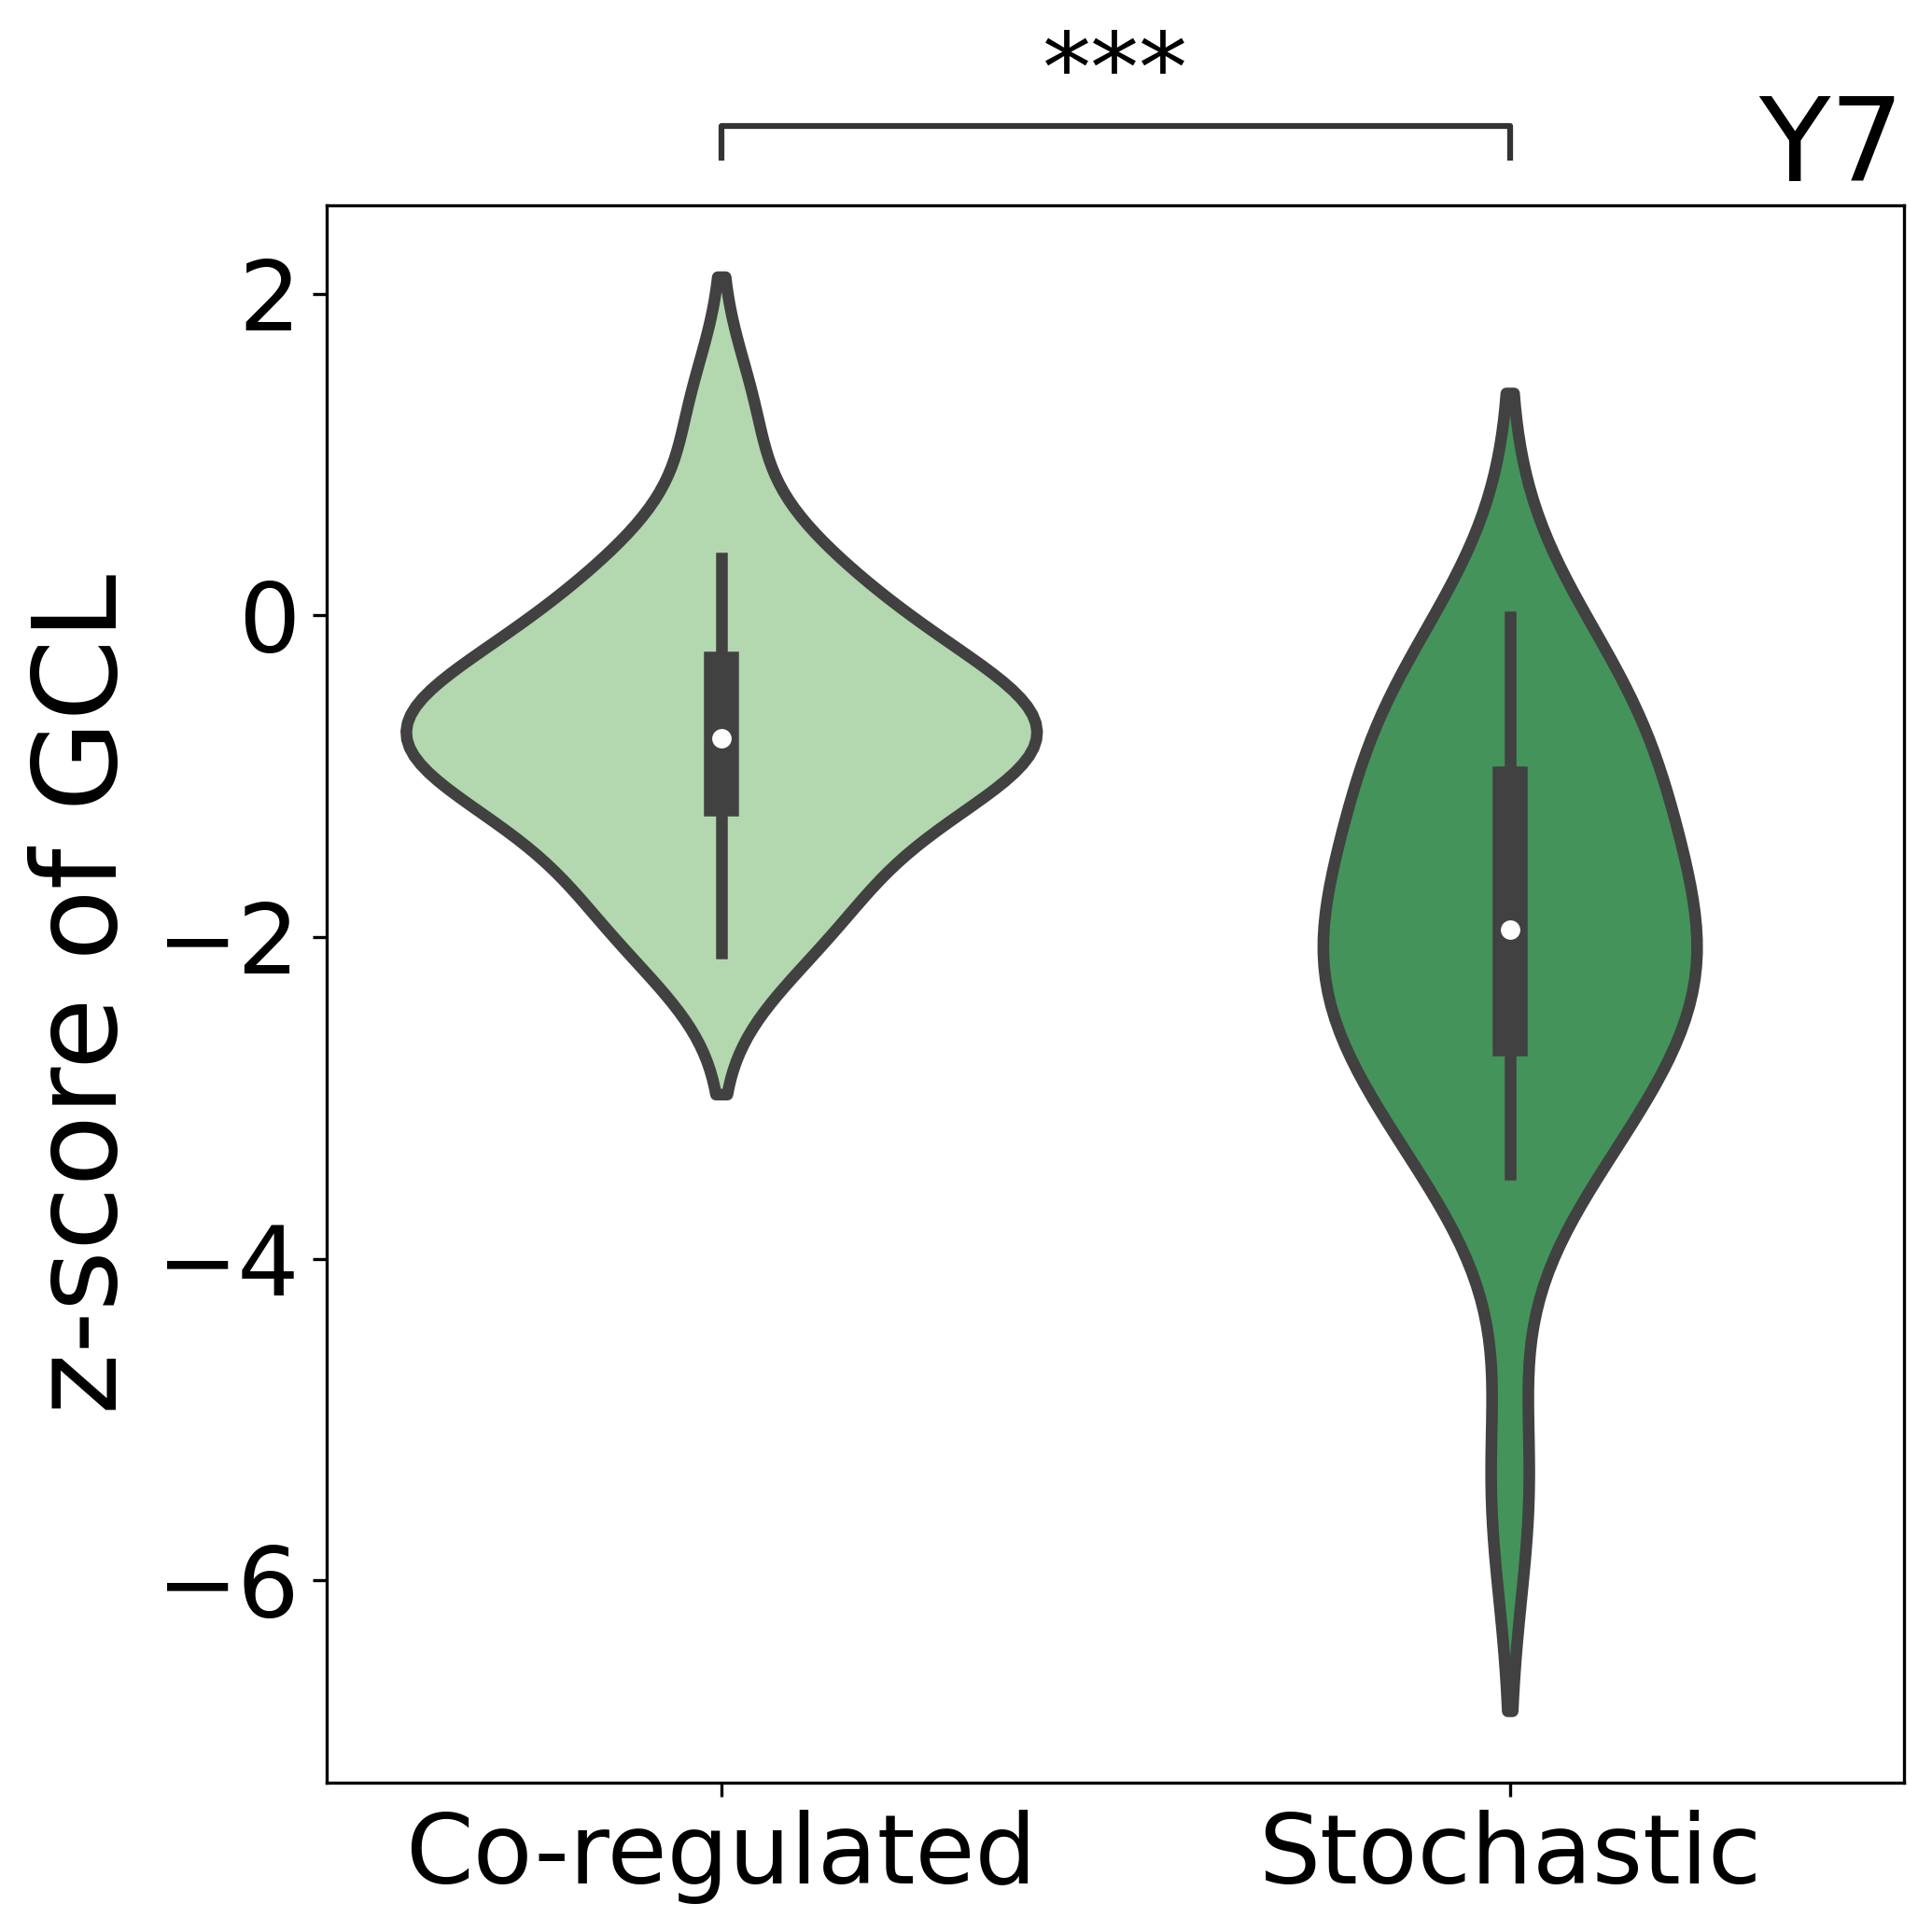

Y8
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


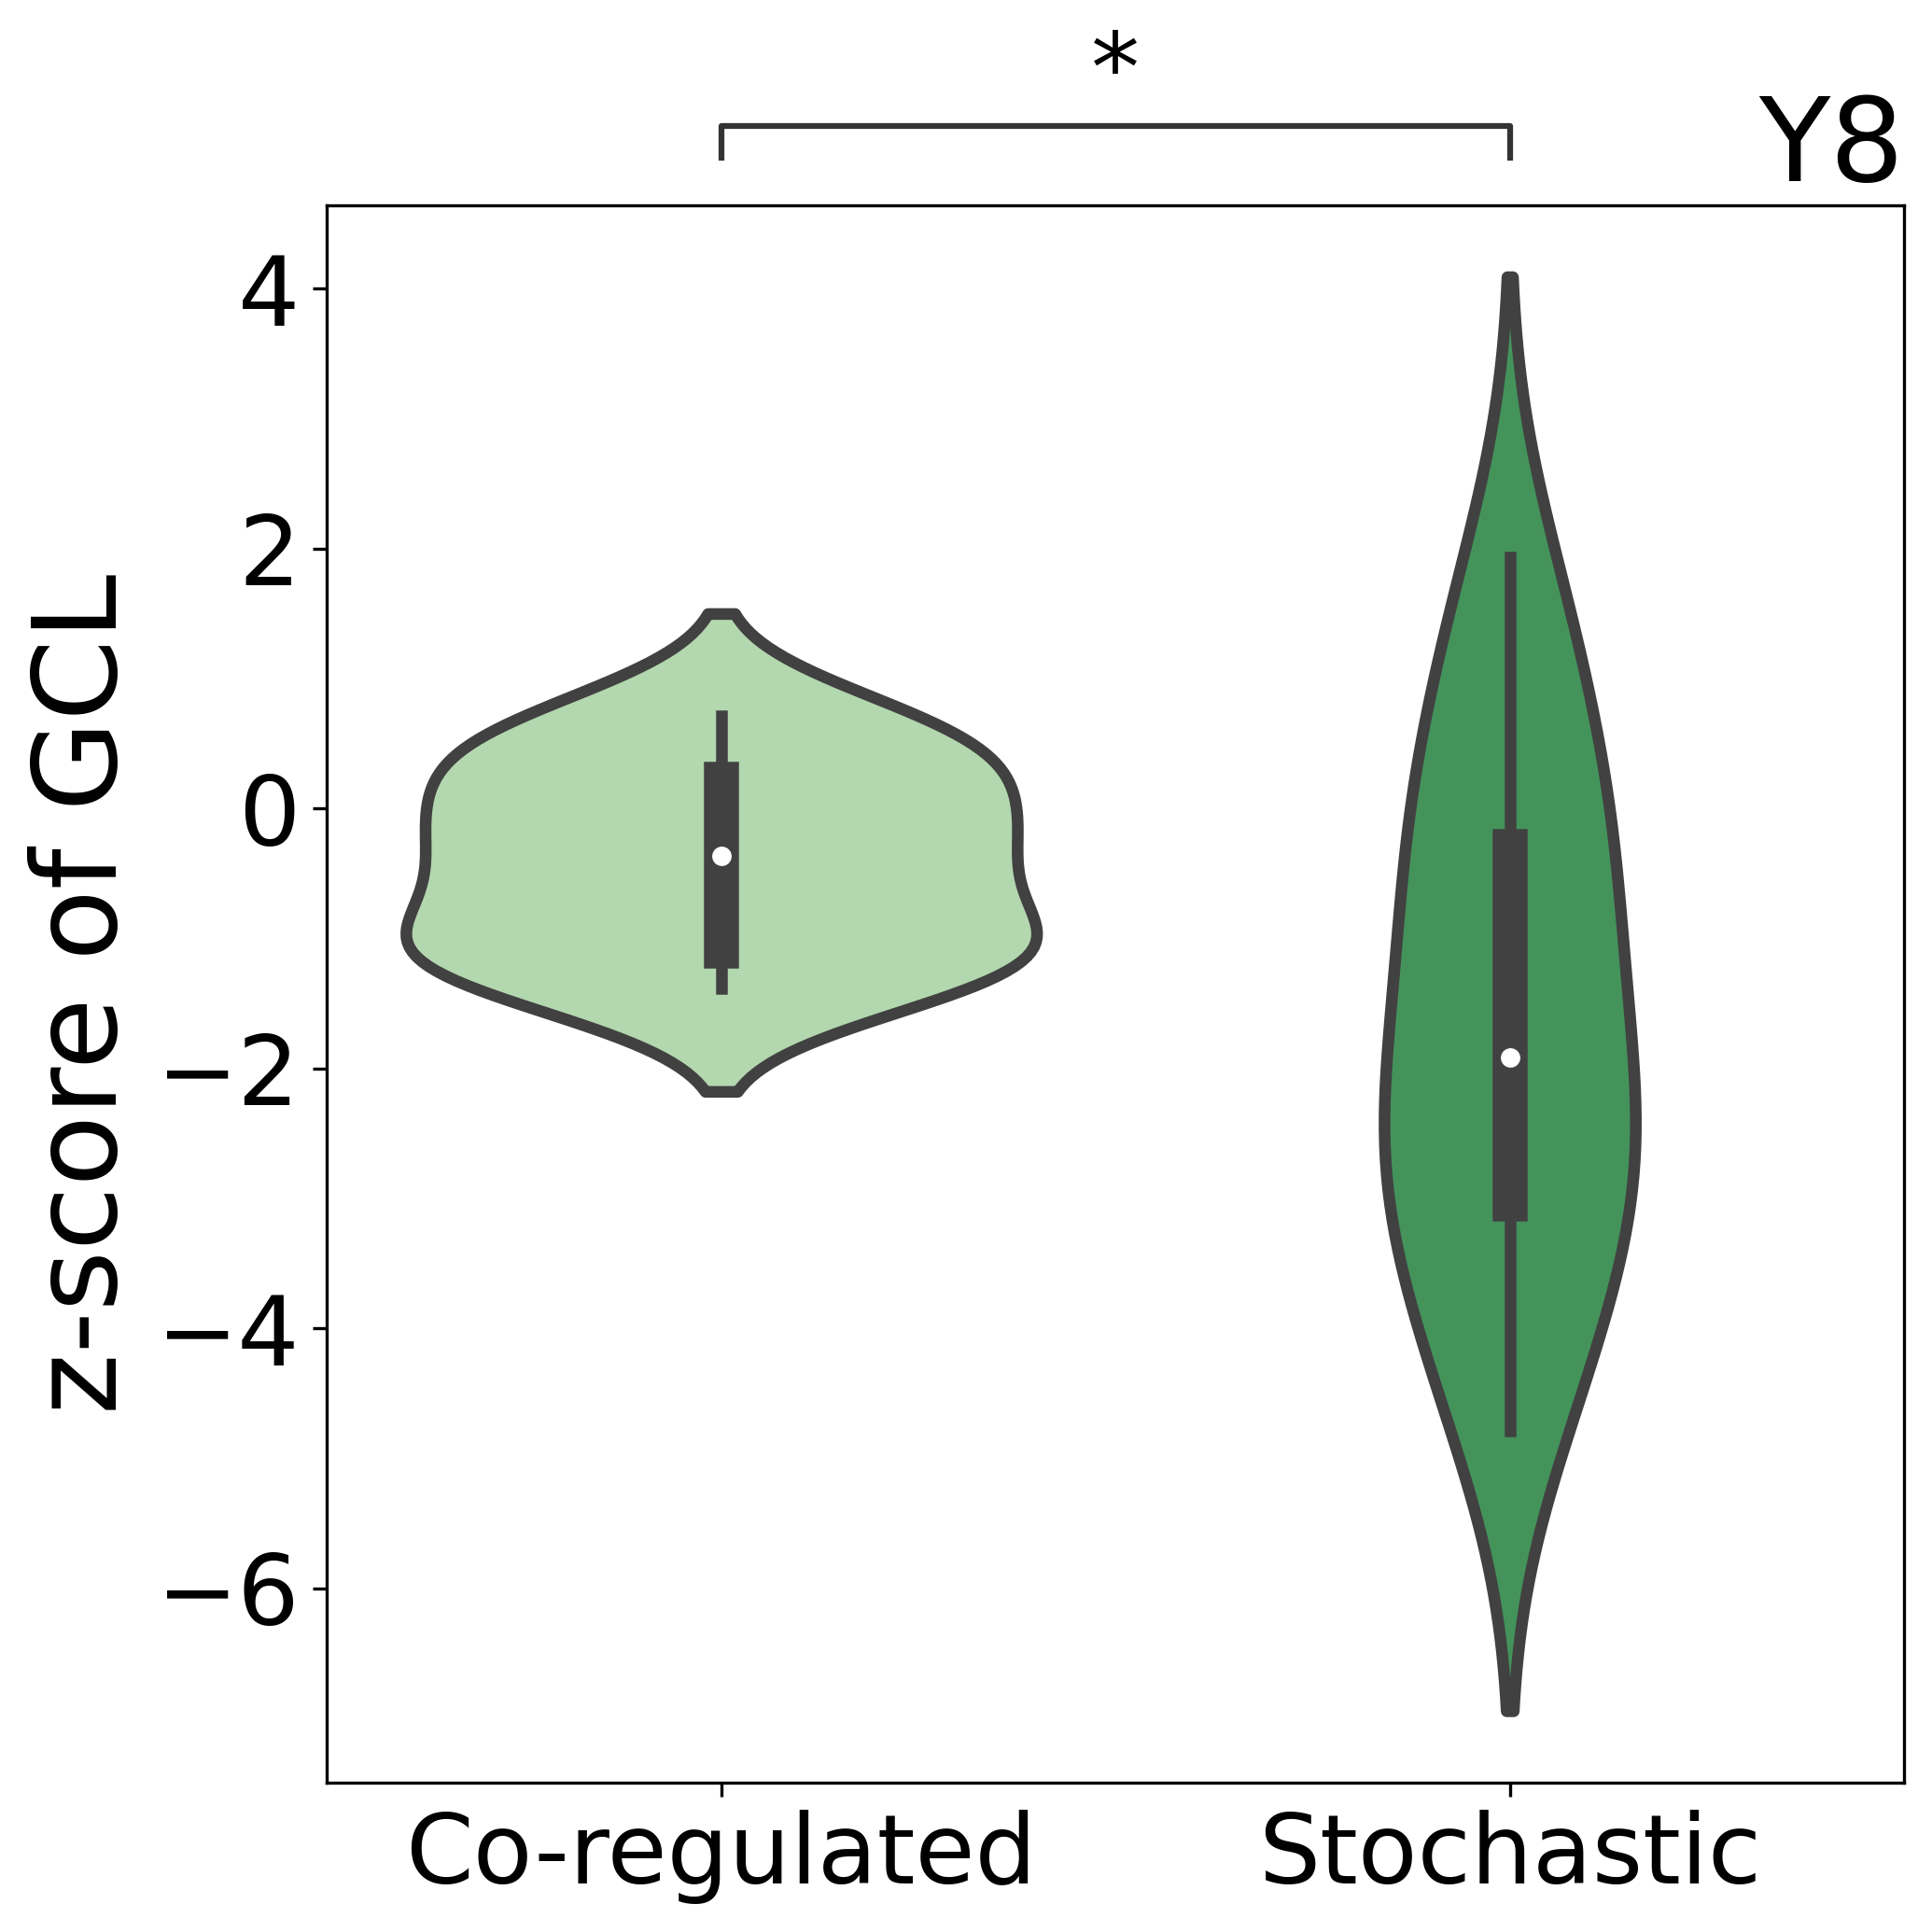

O1
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


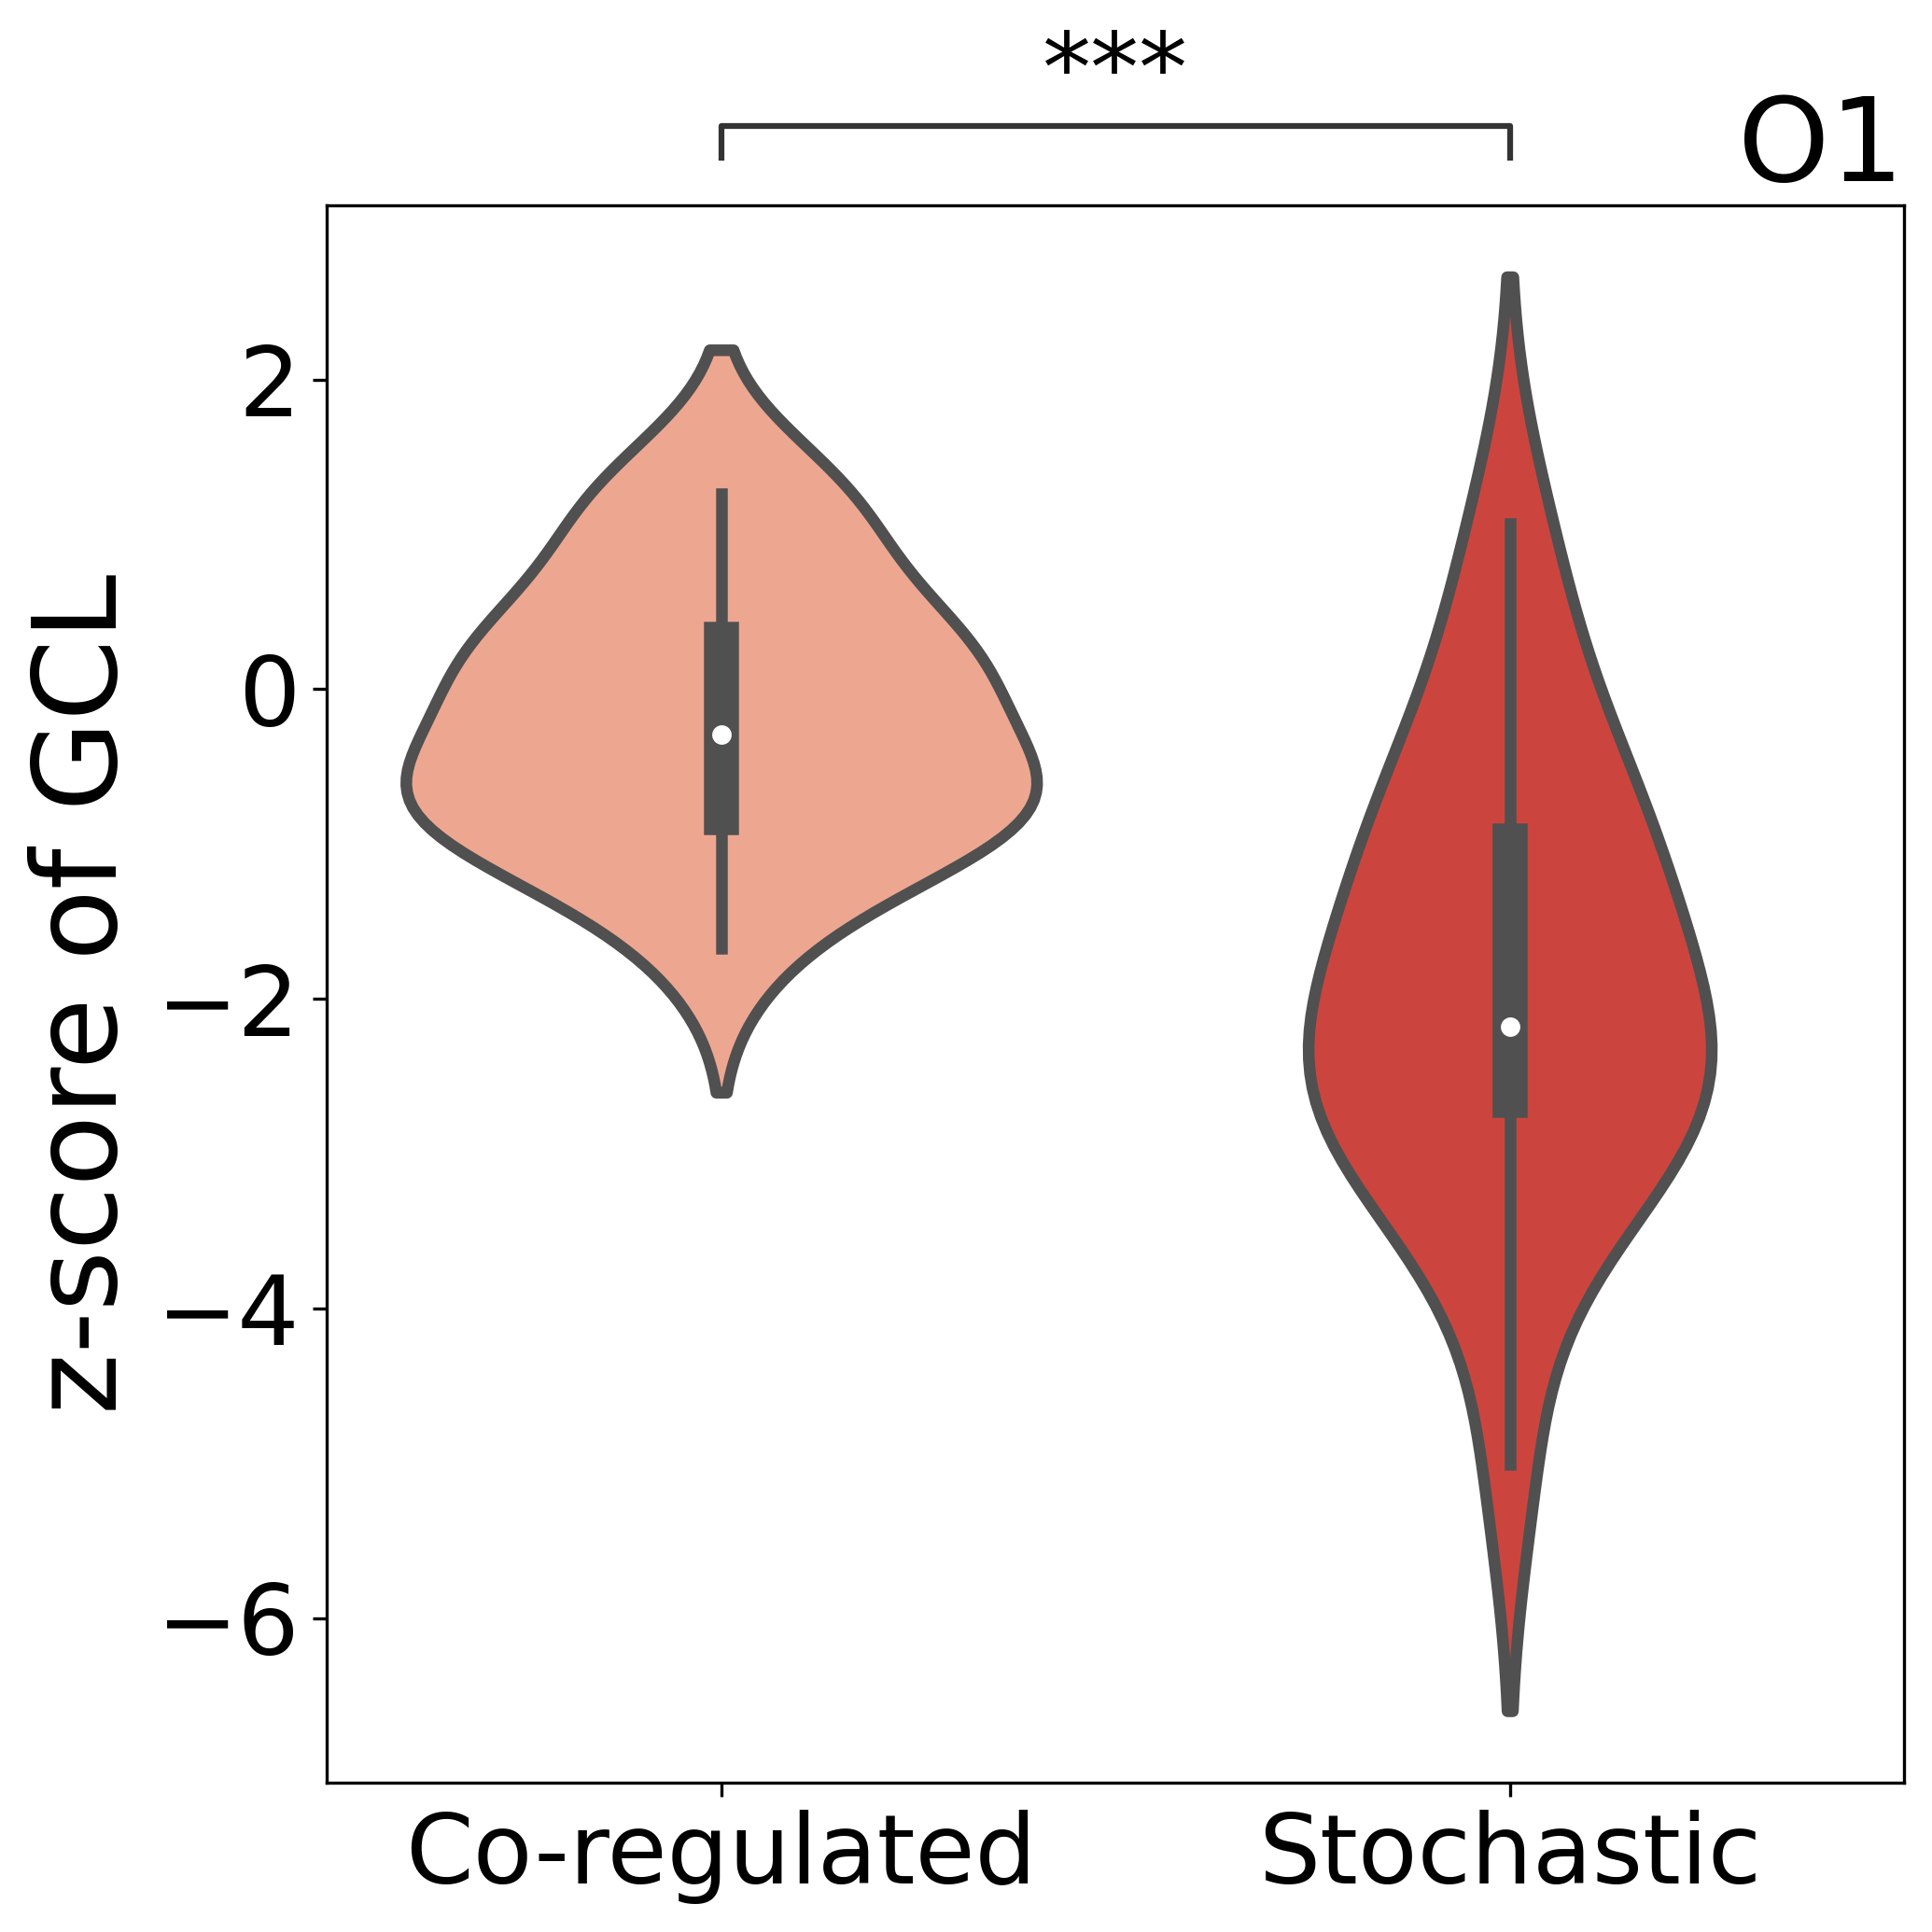

O5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


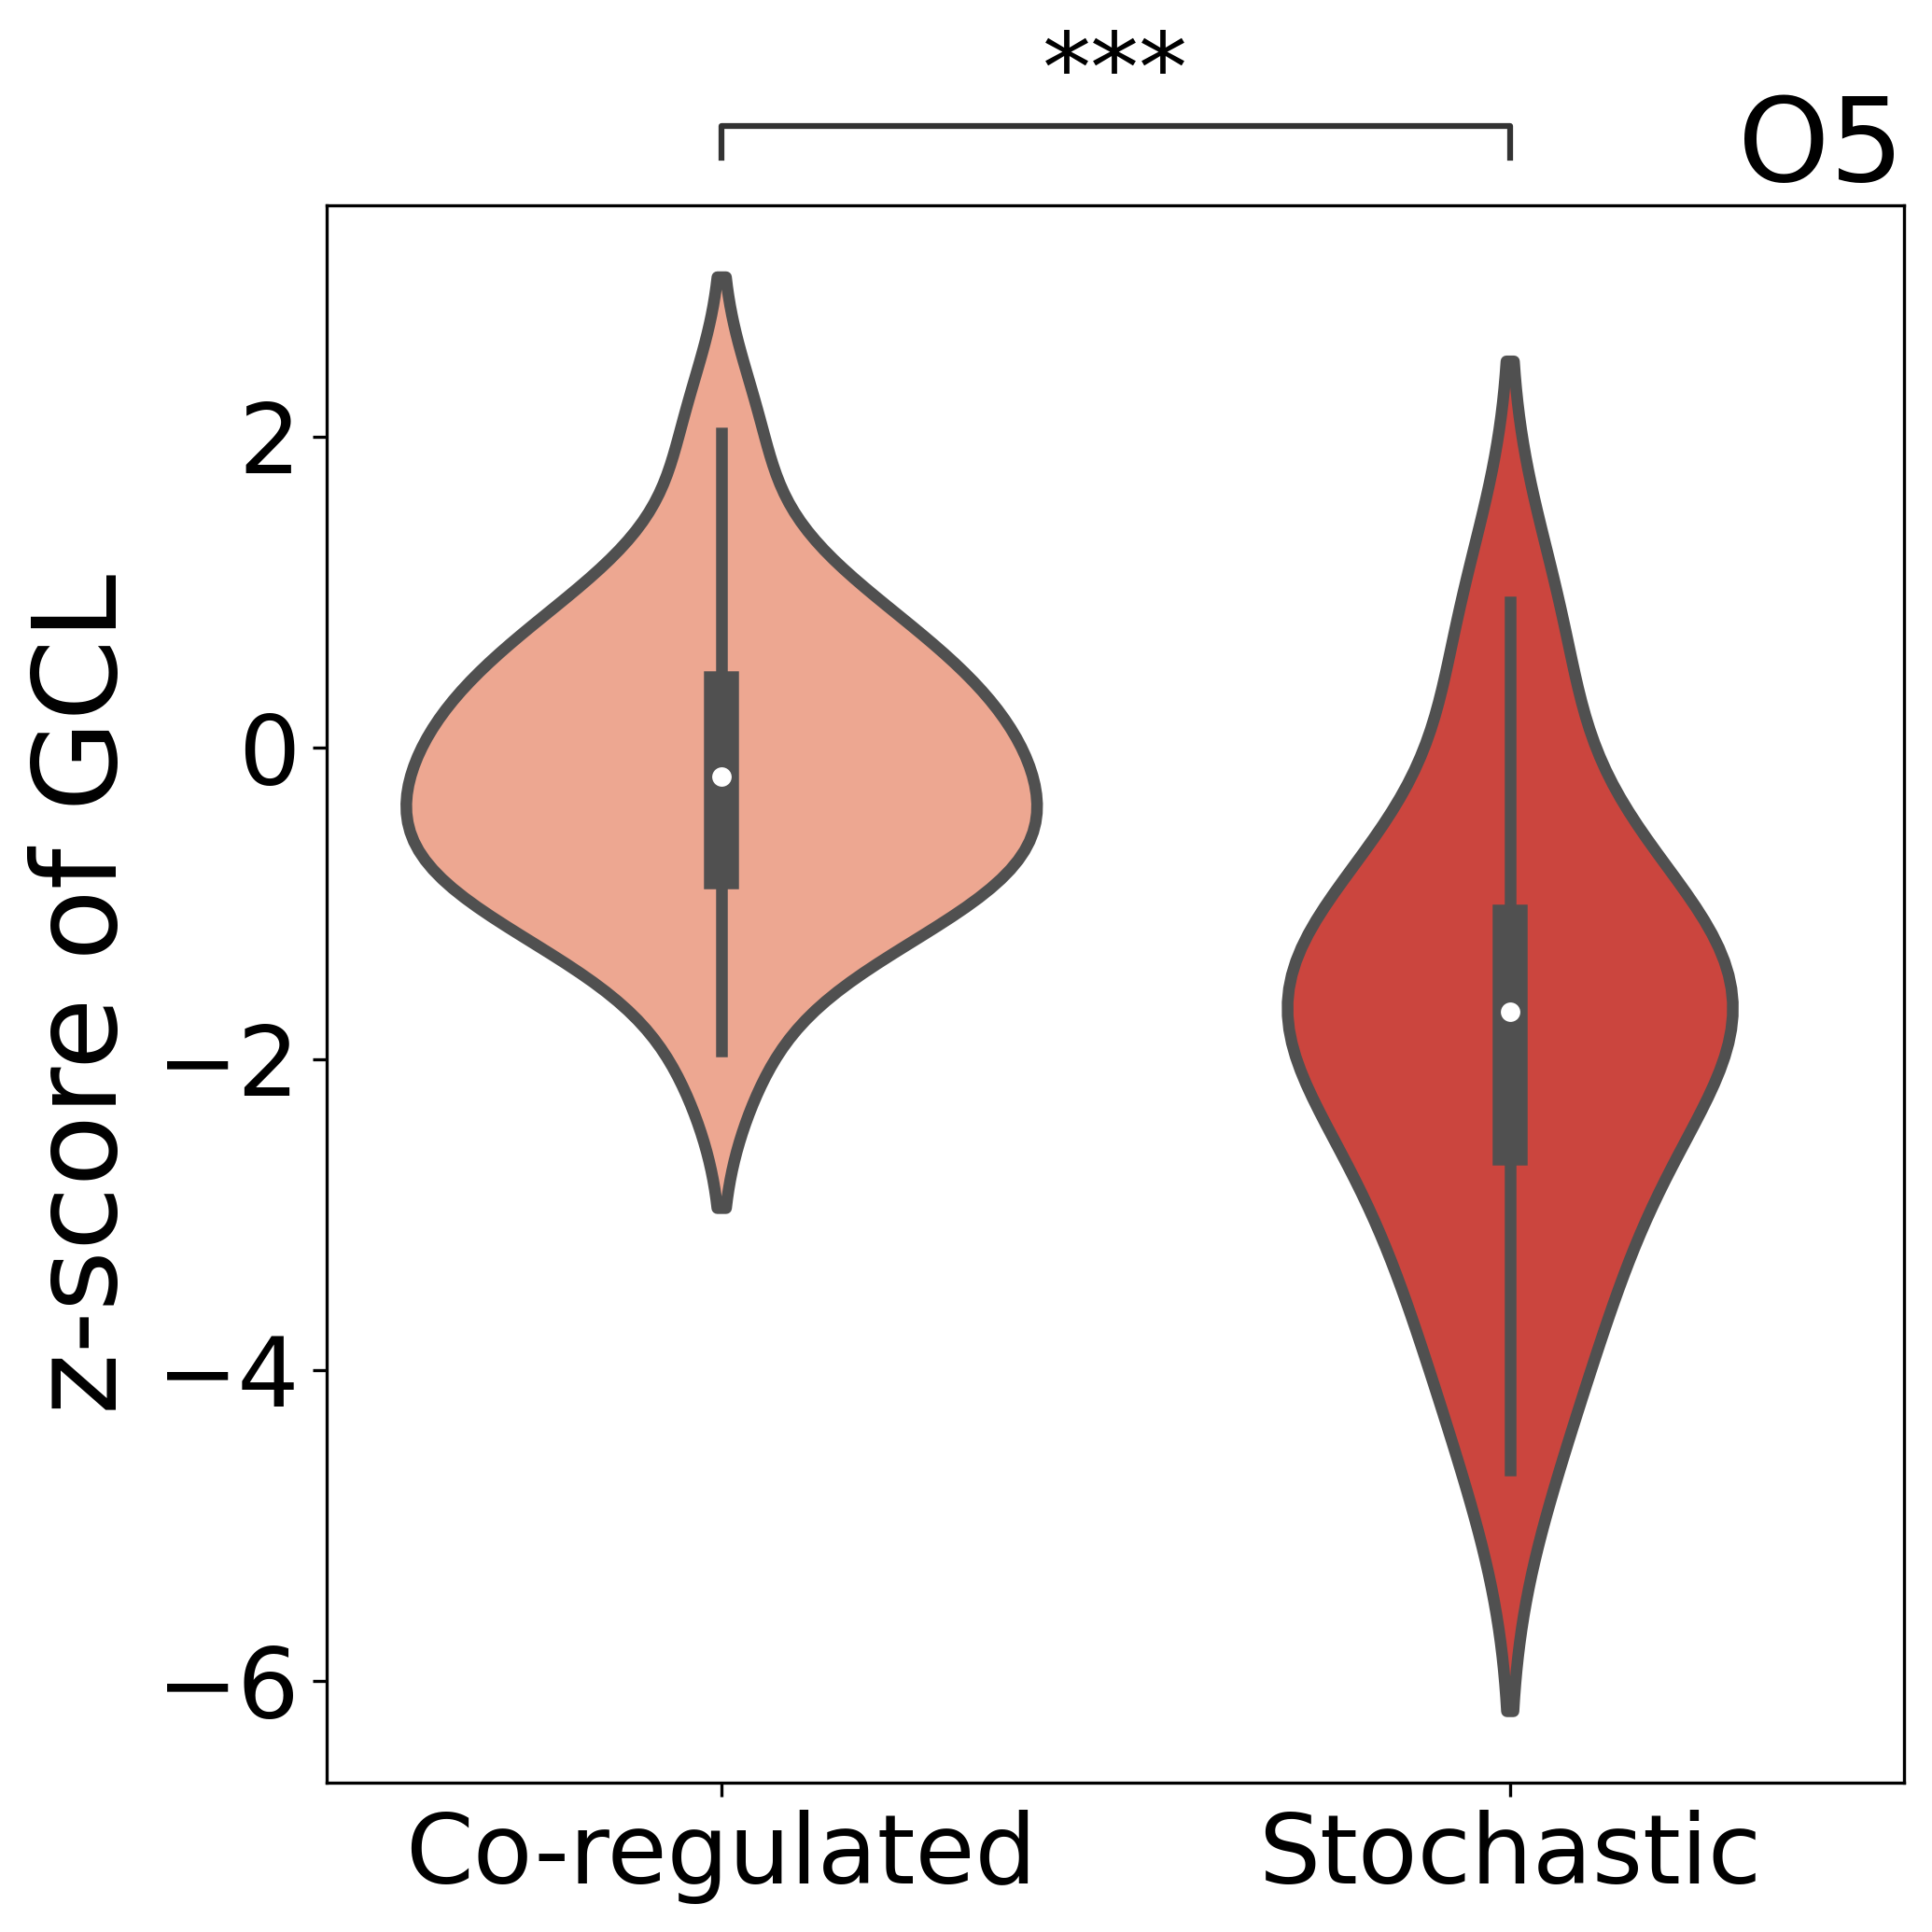

Y4
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


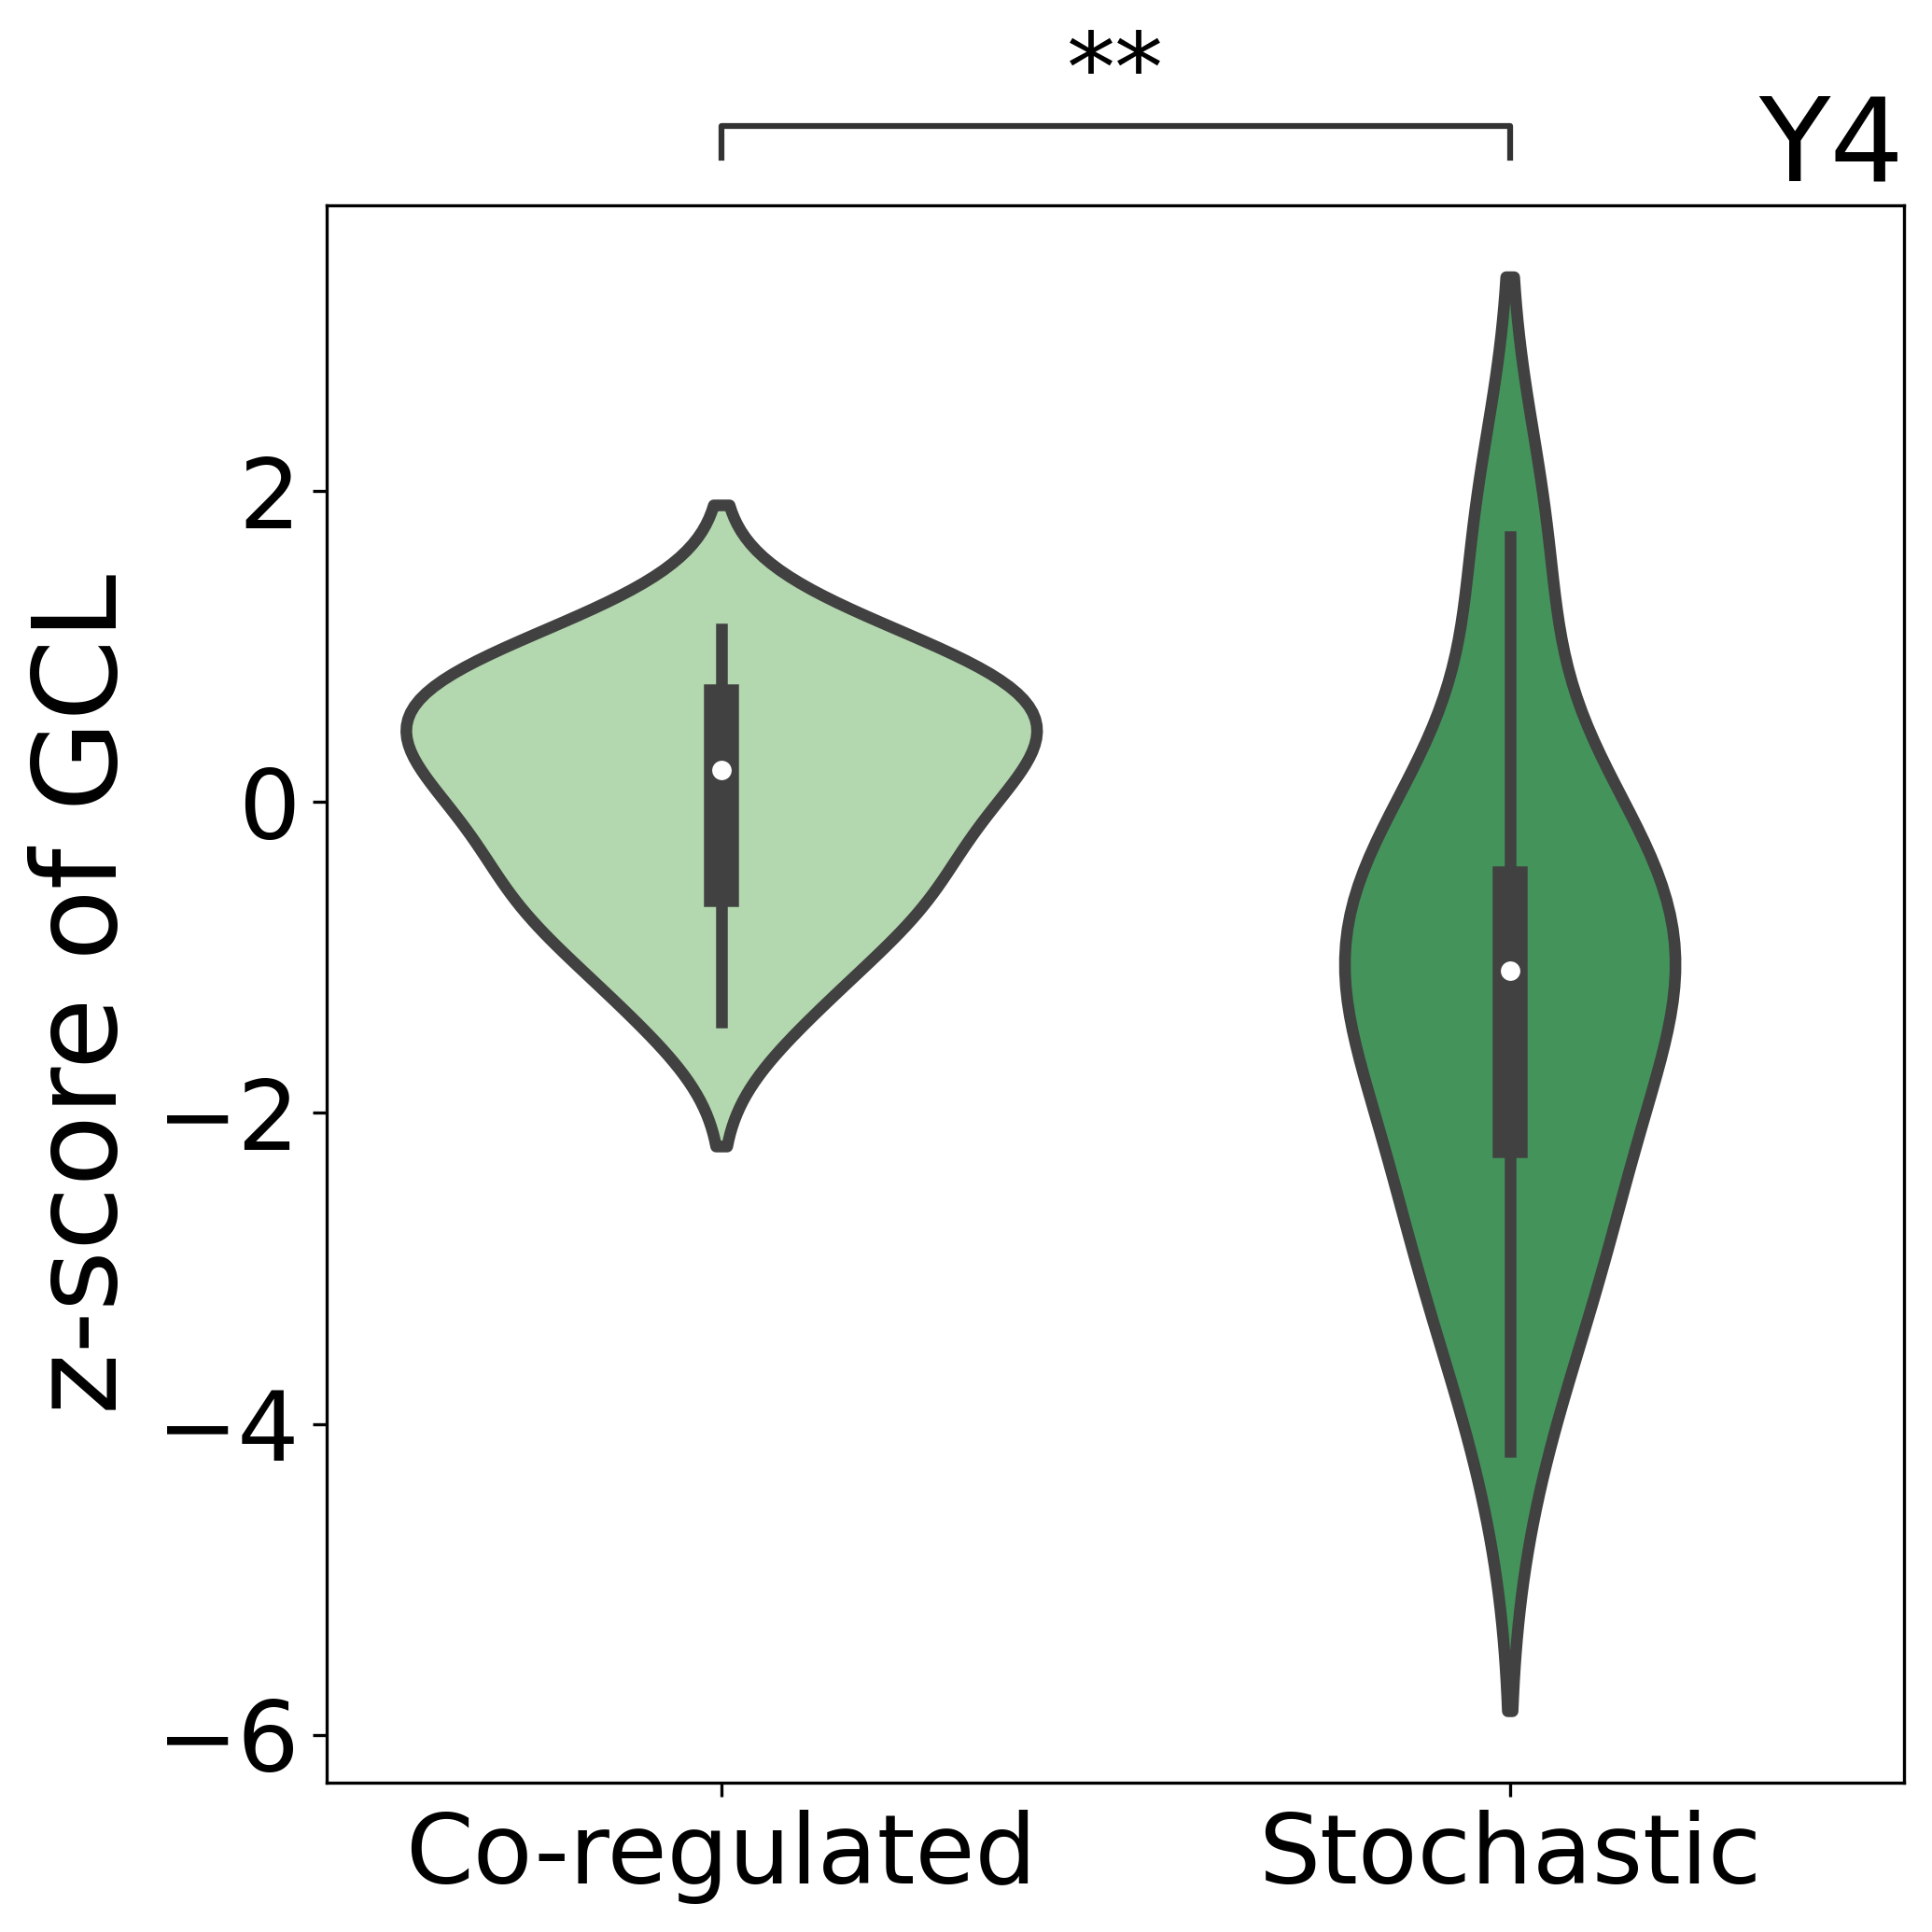

Y5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


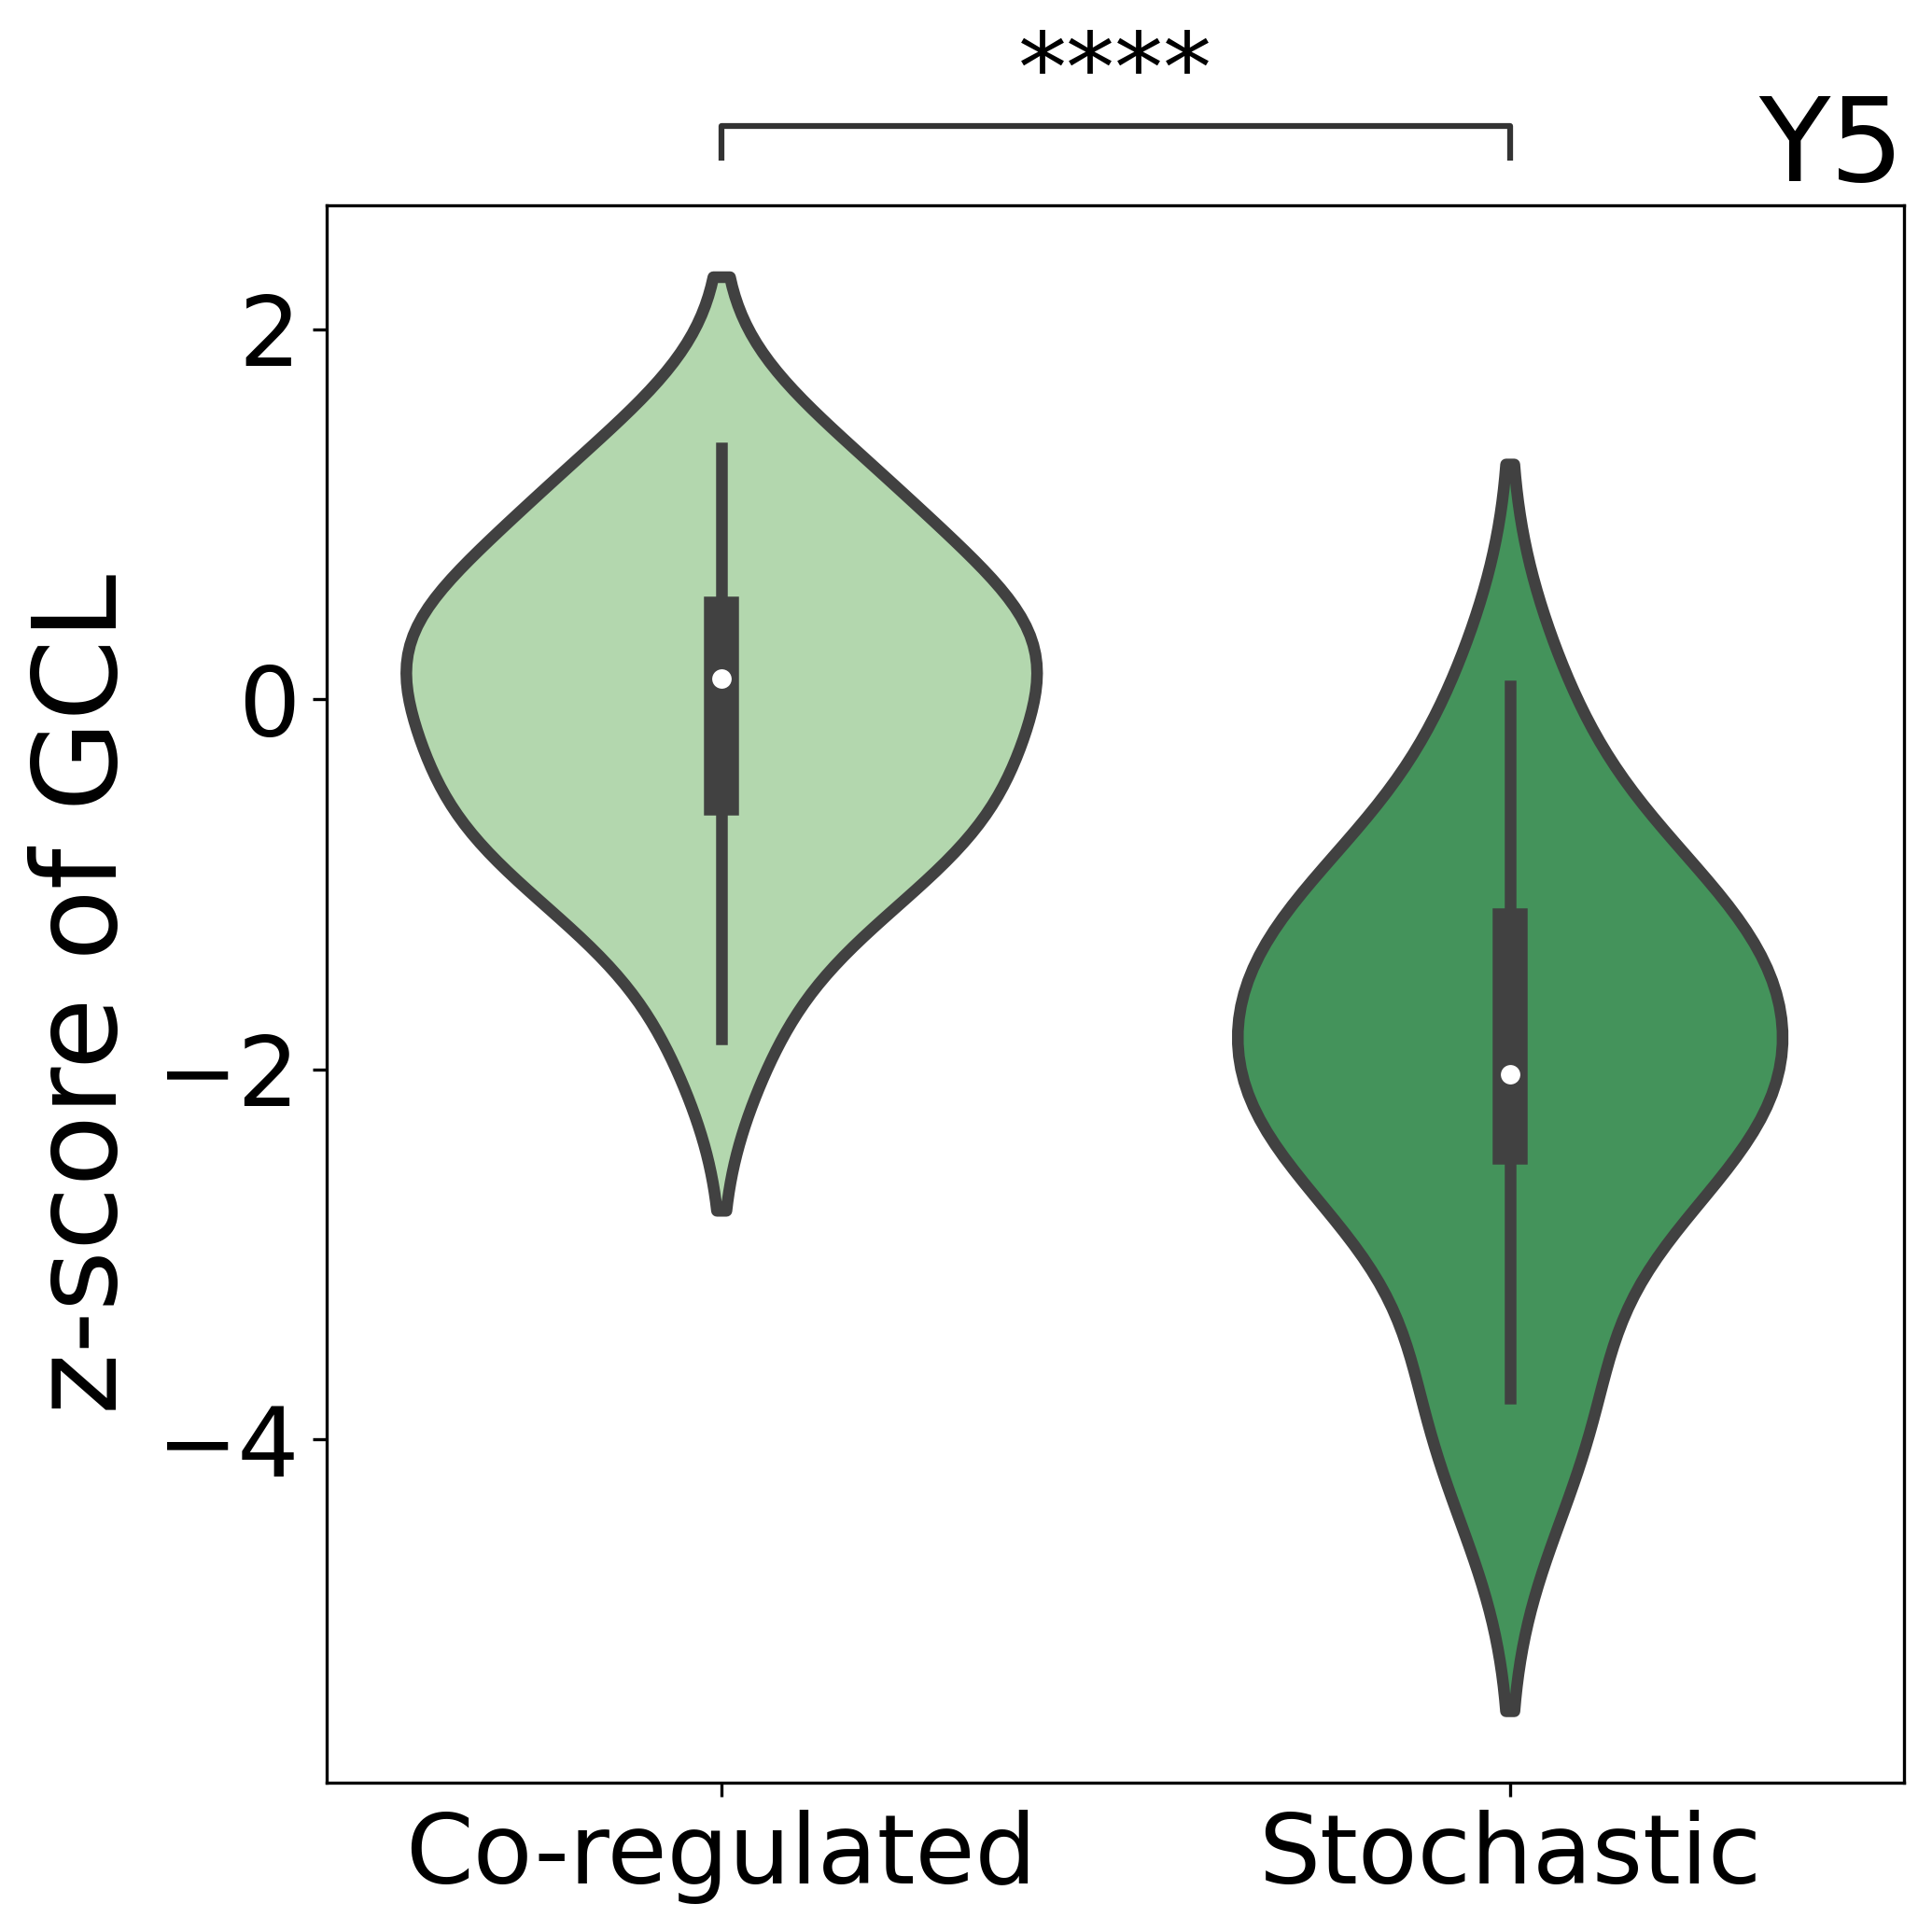

Y7
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


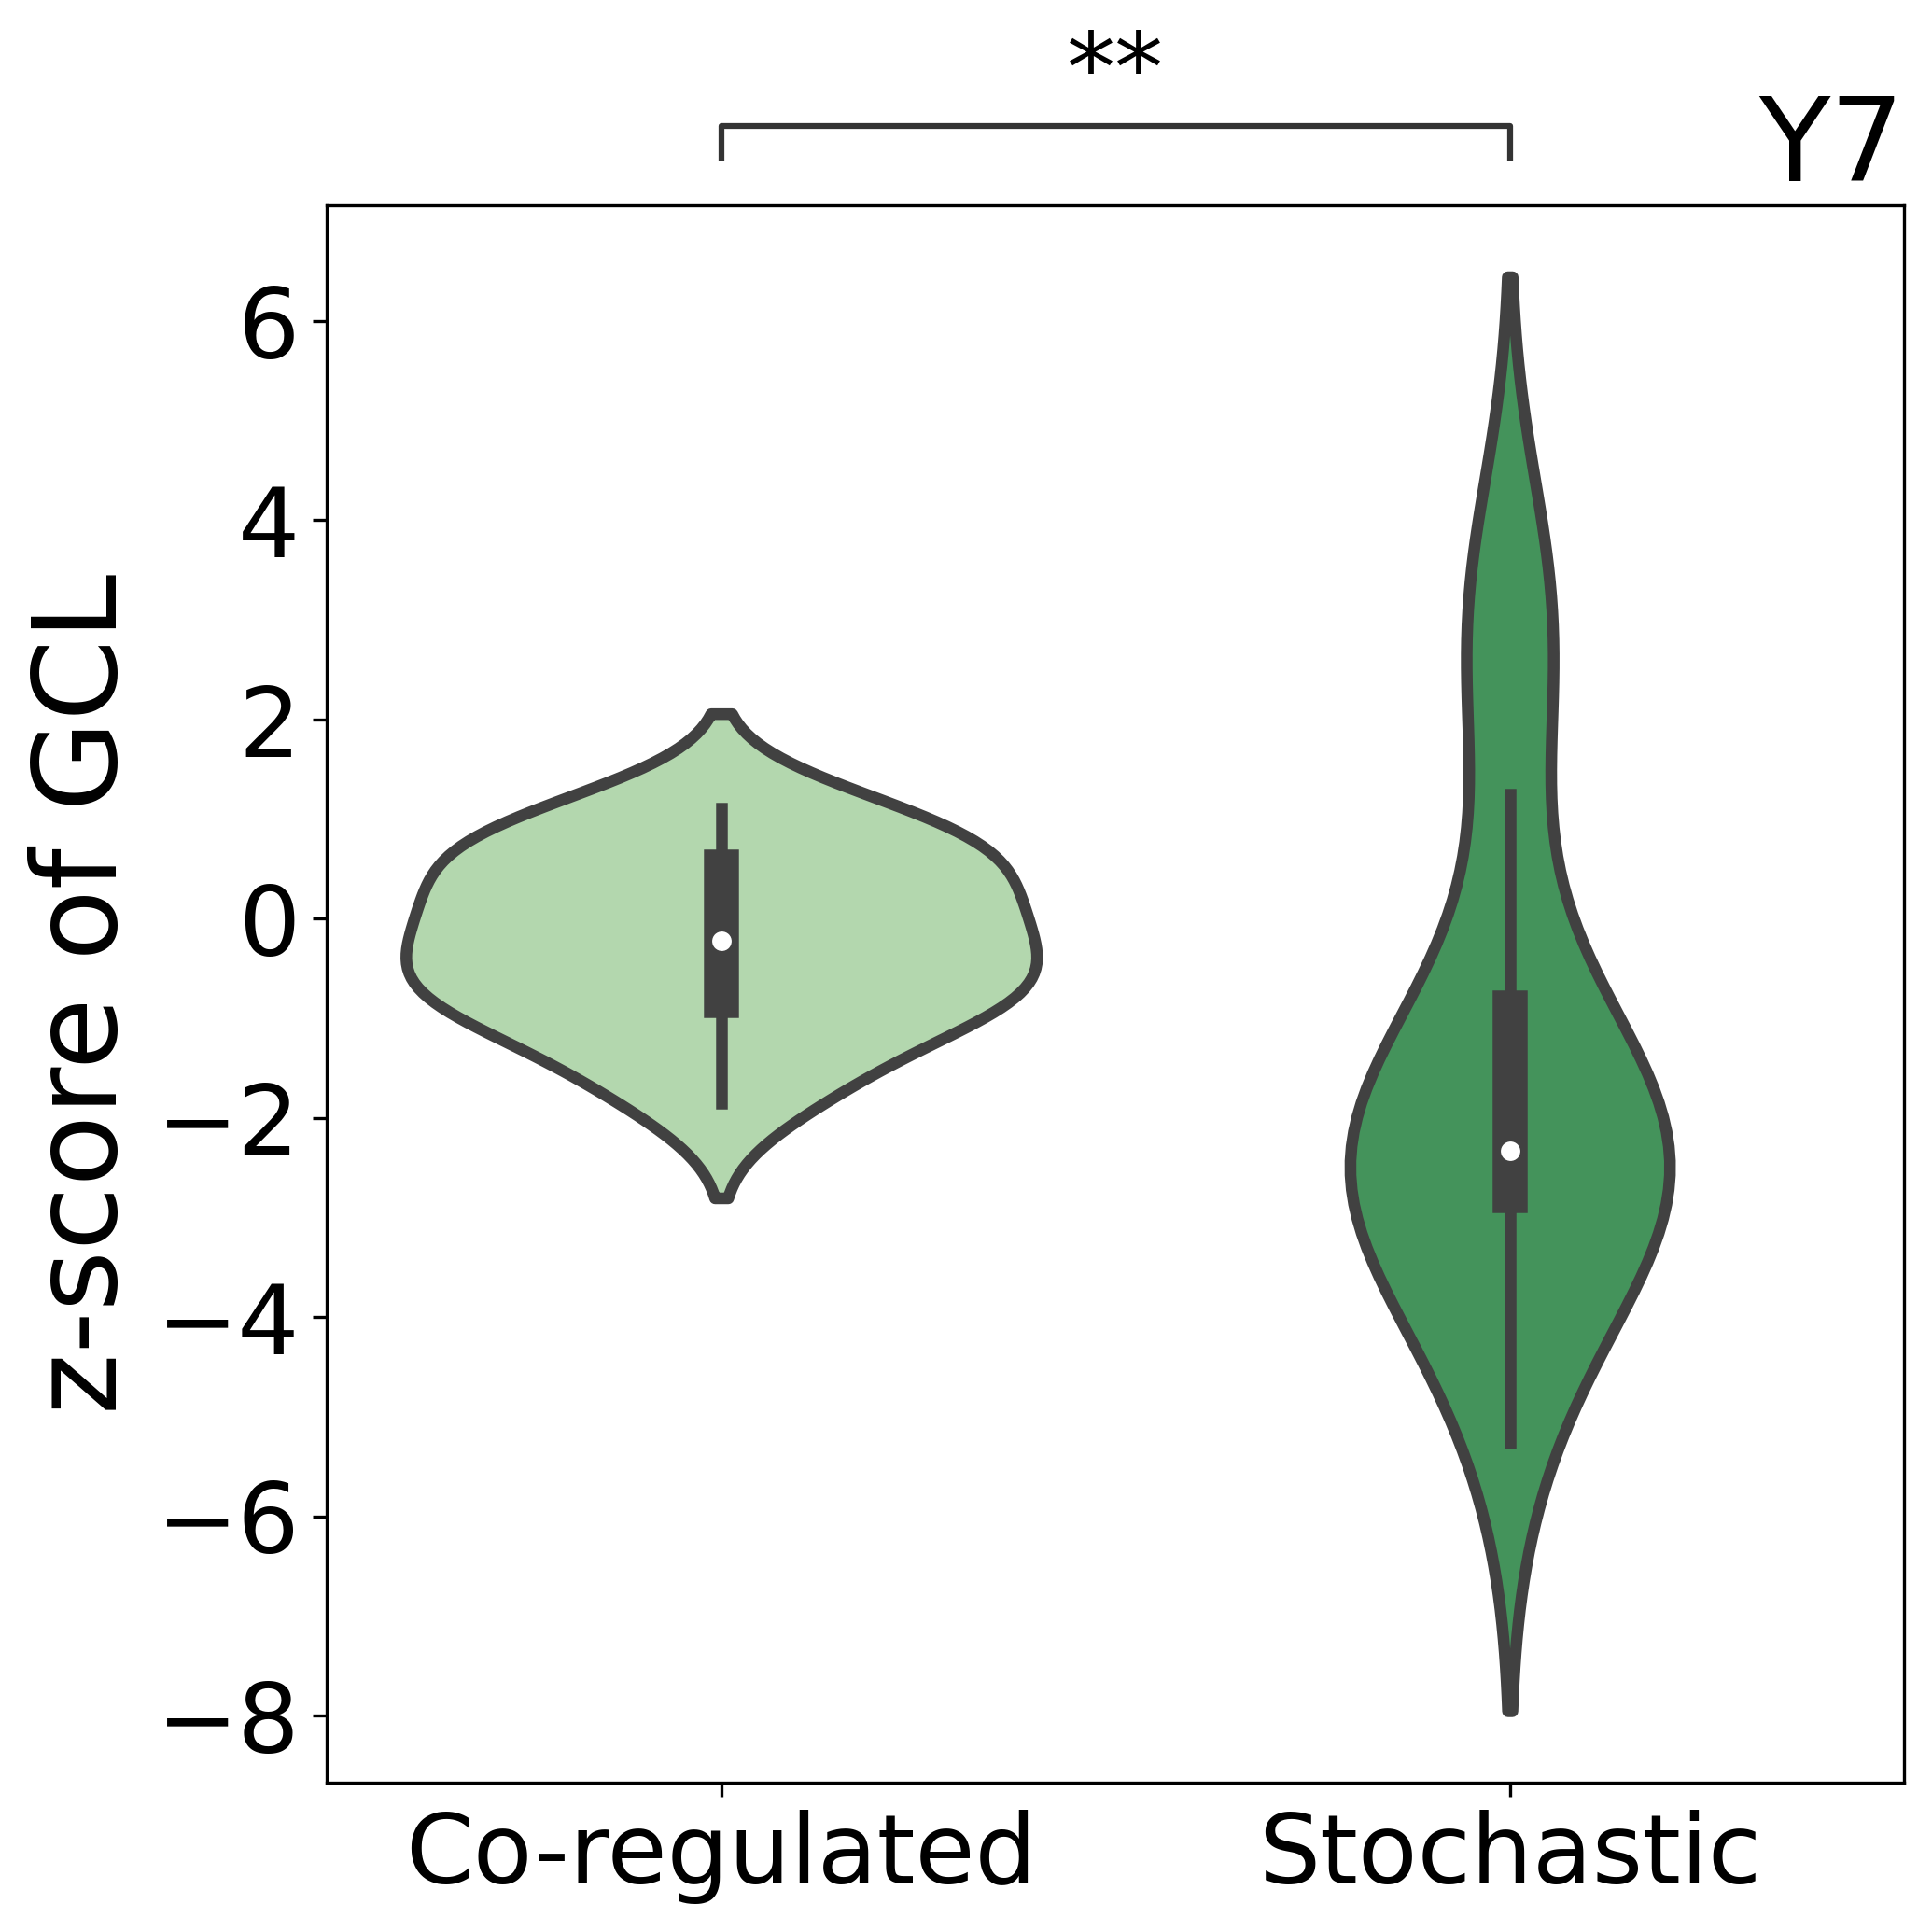

Y8
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


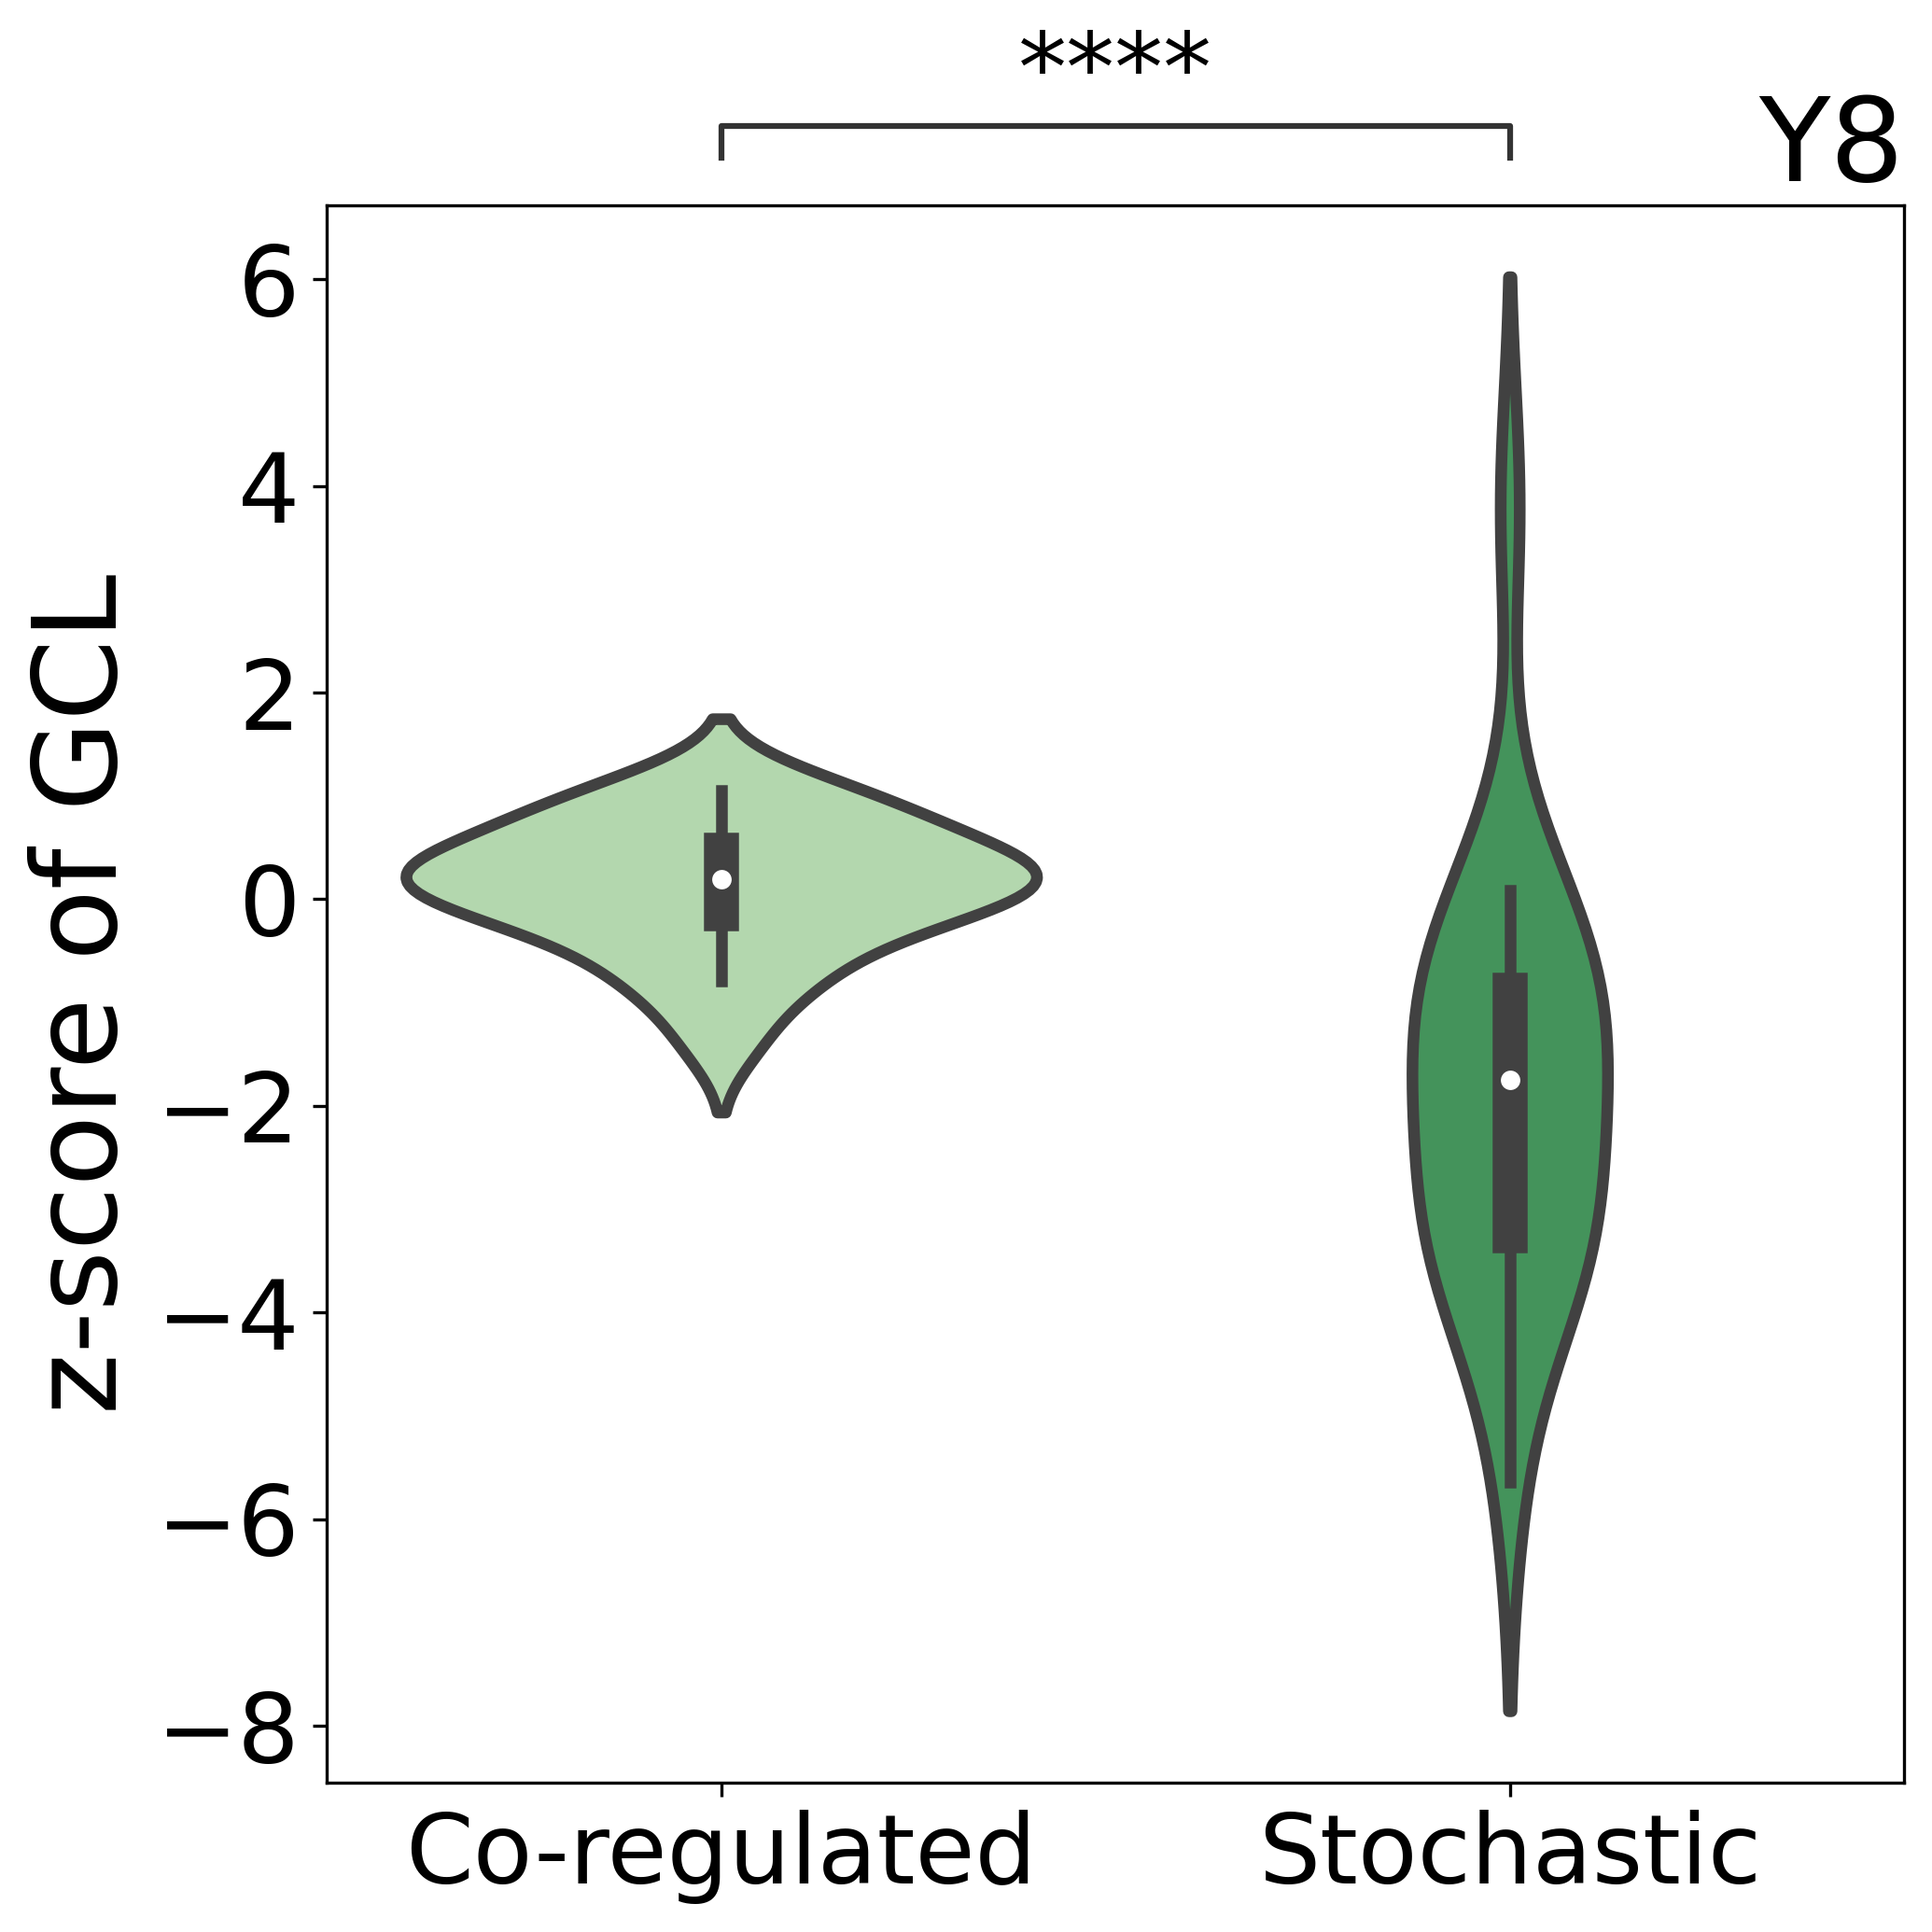

O1
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


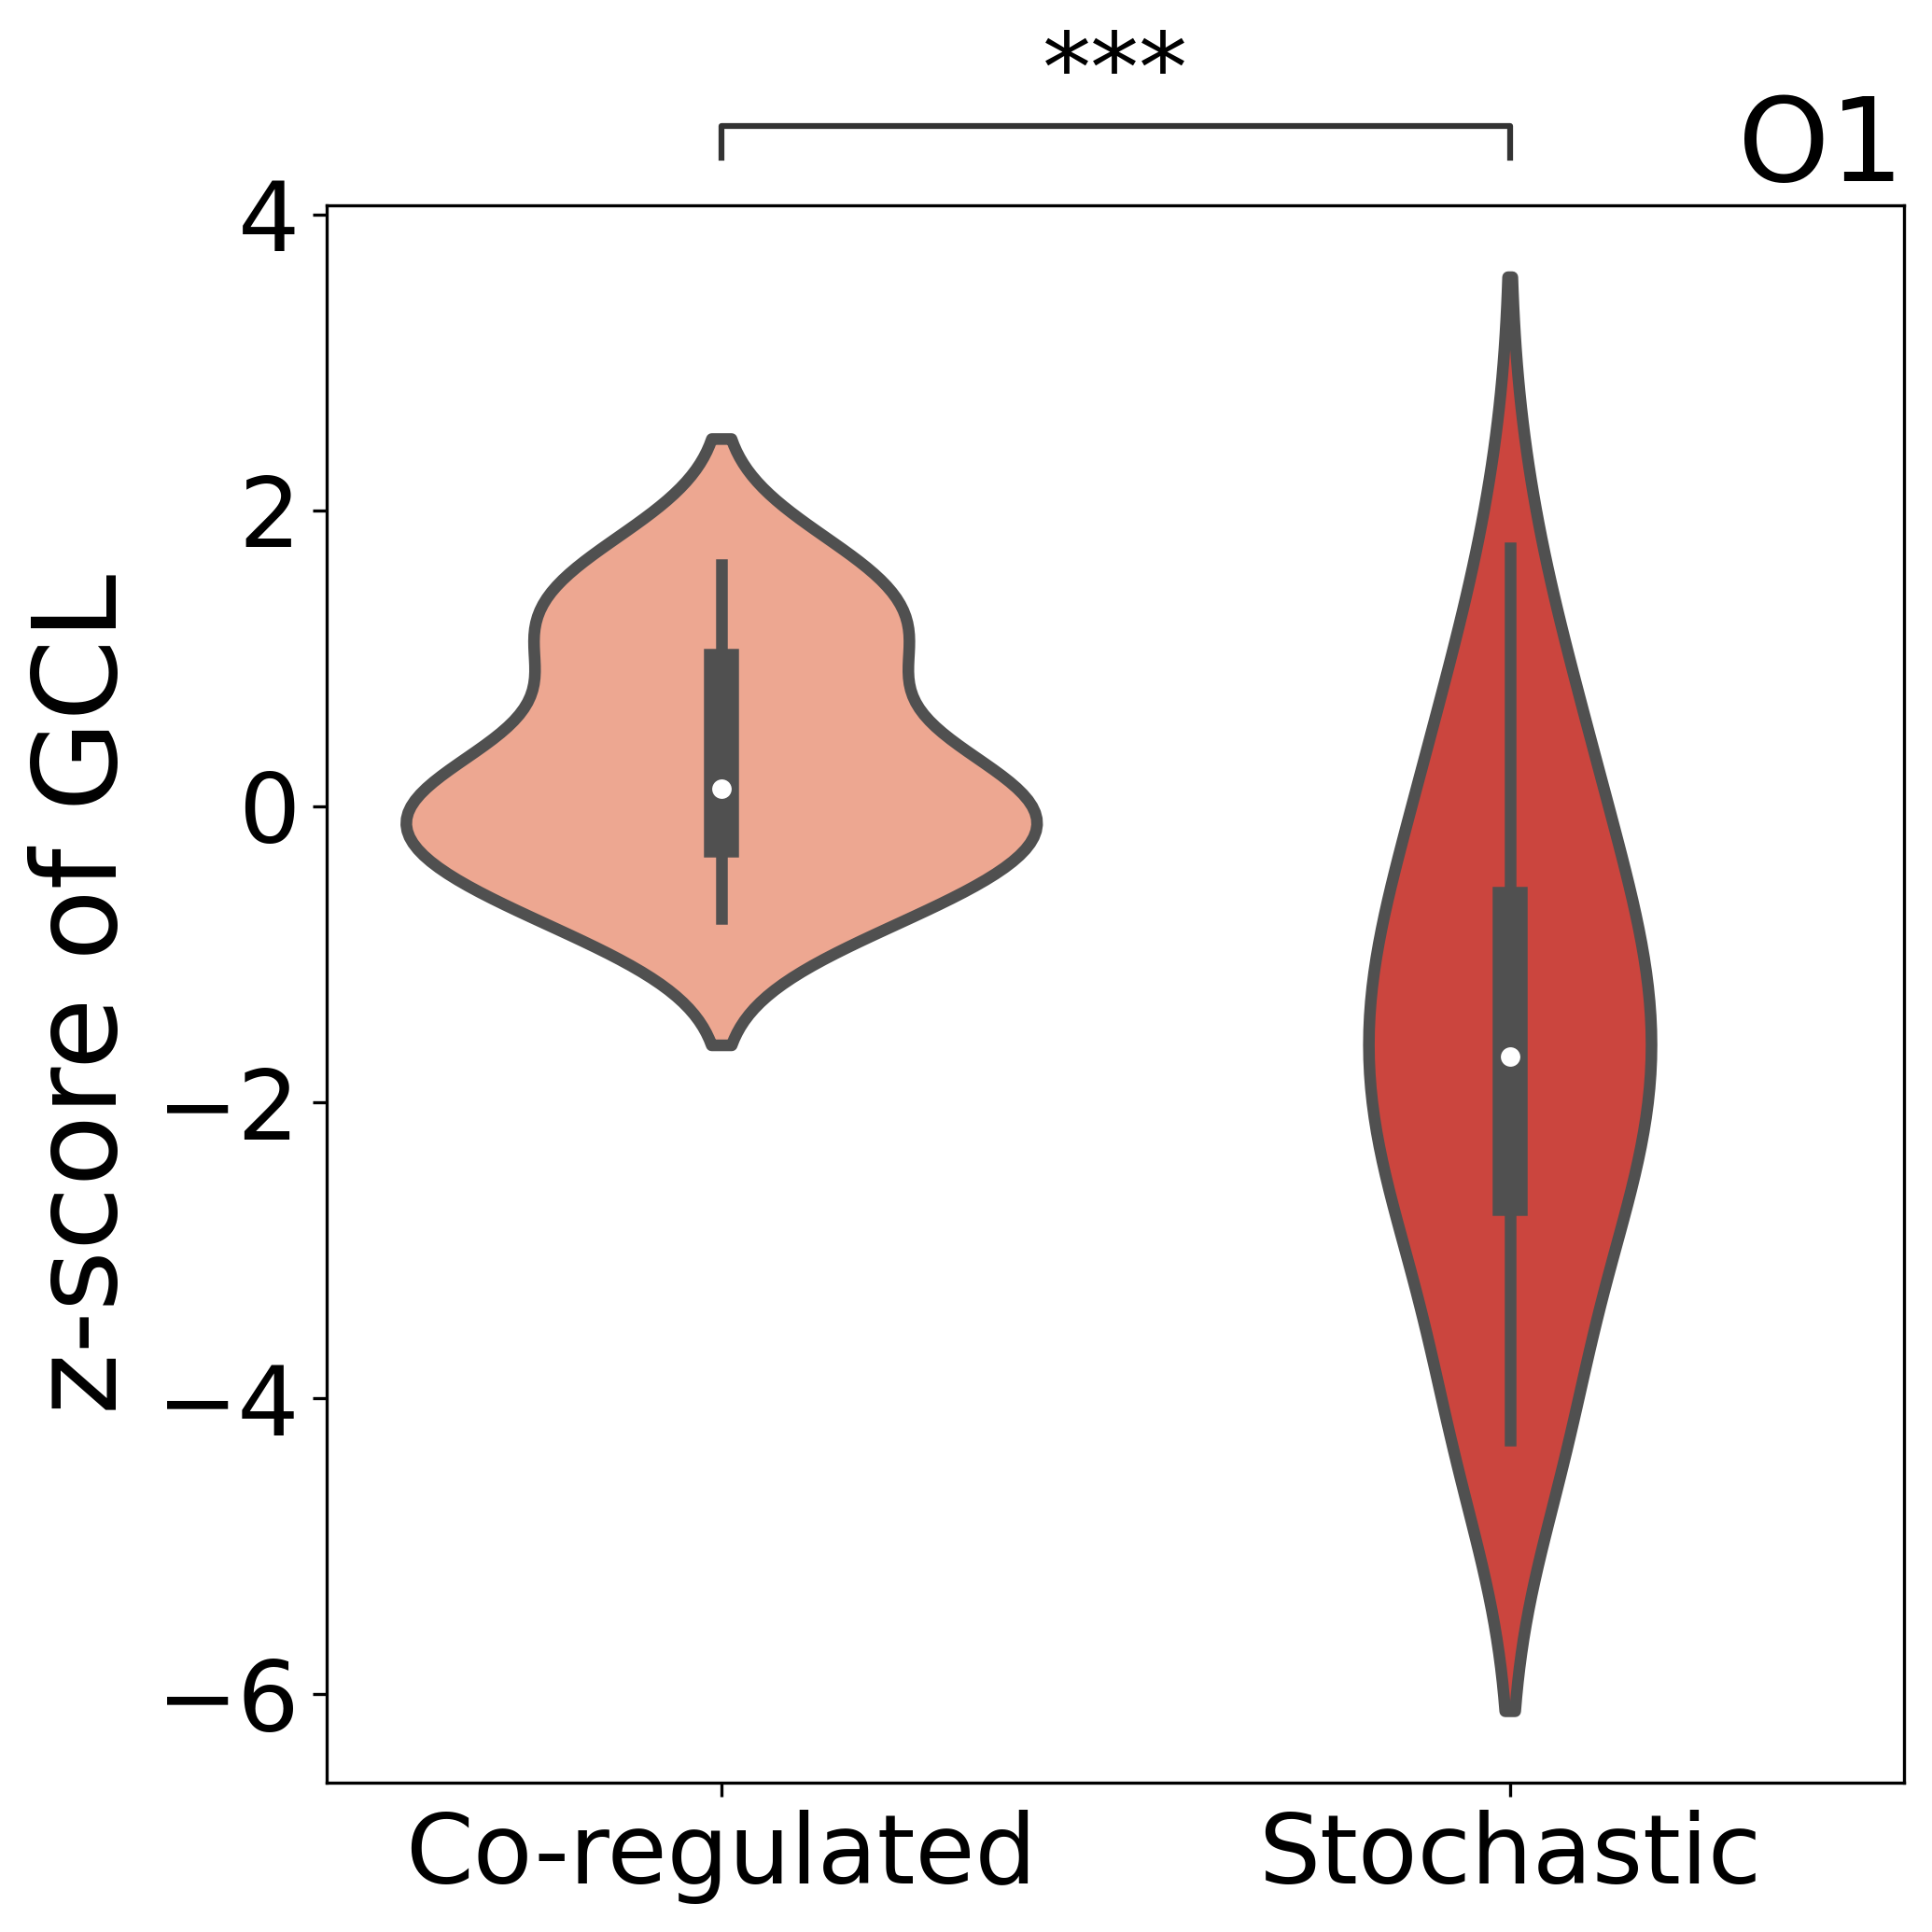

O5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


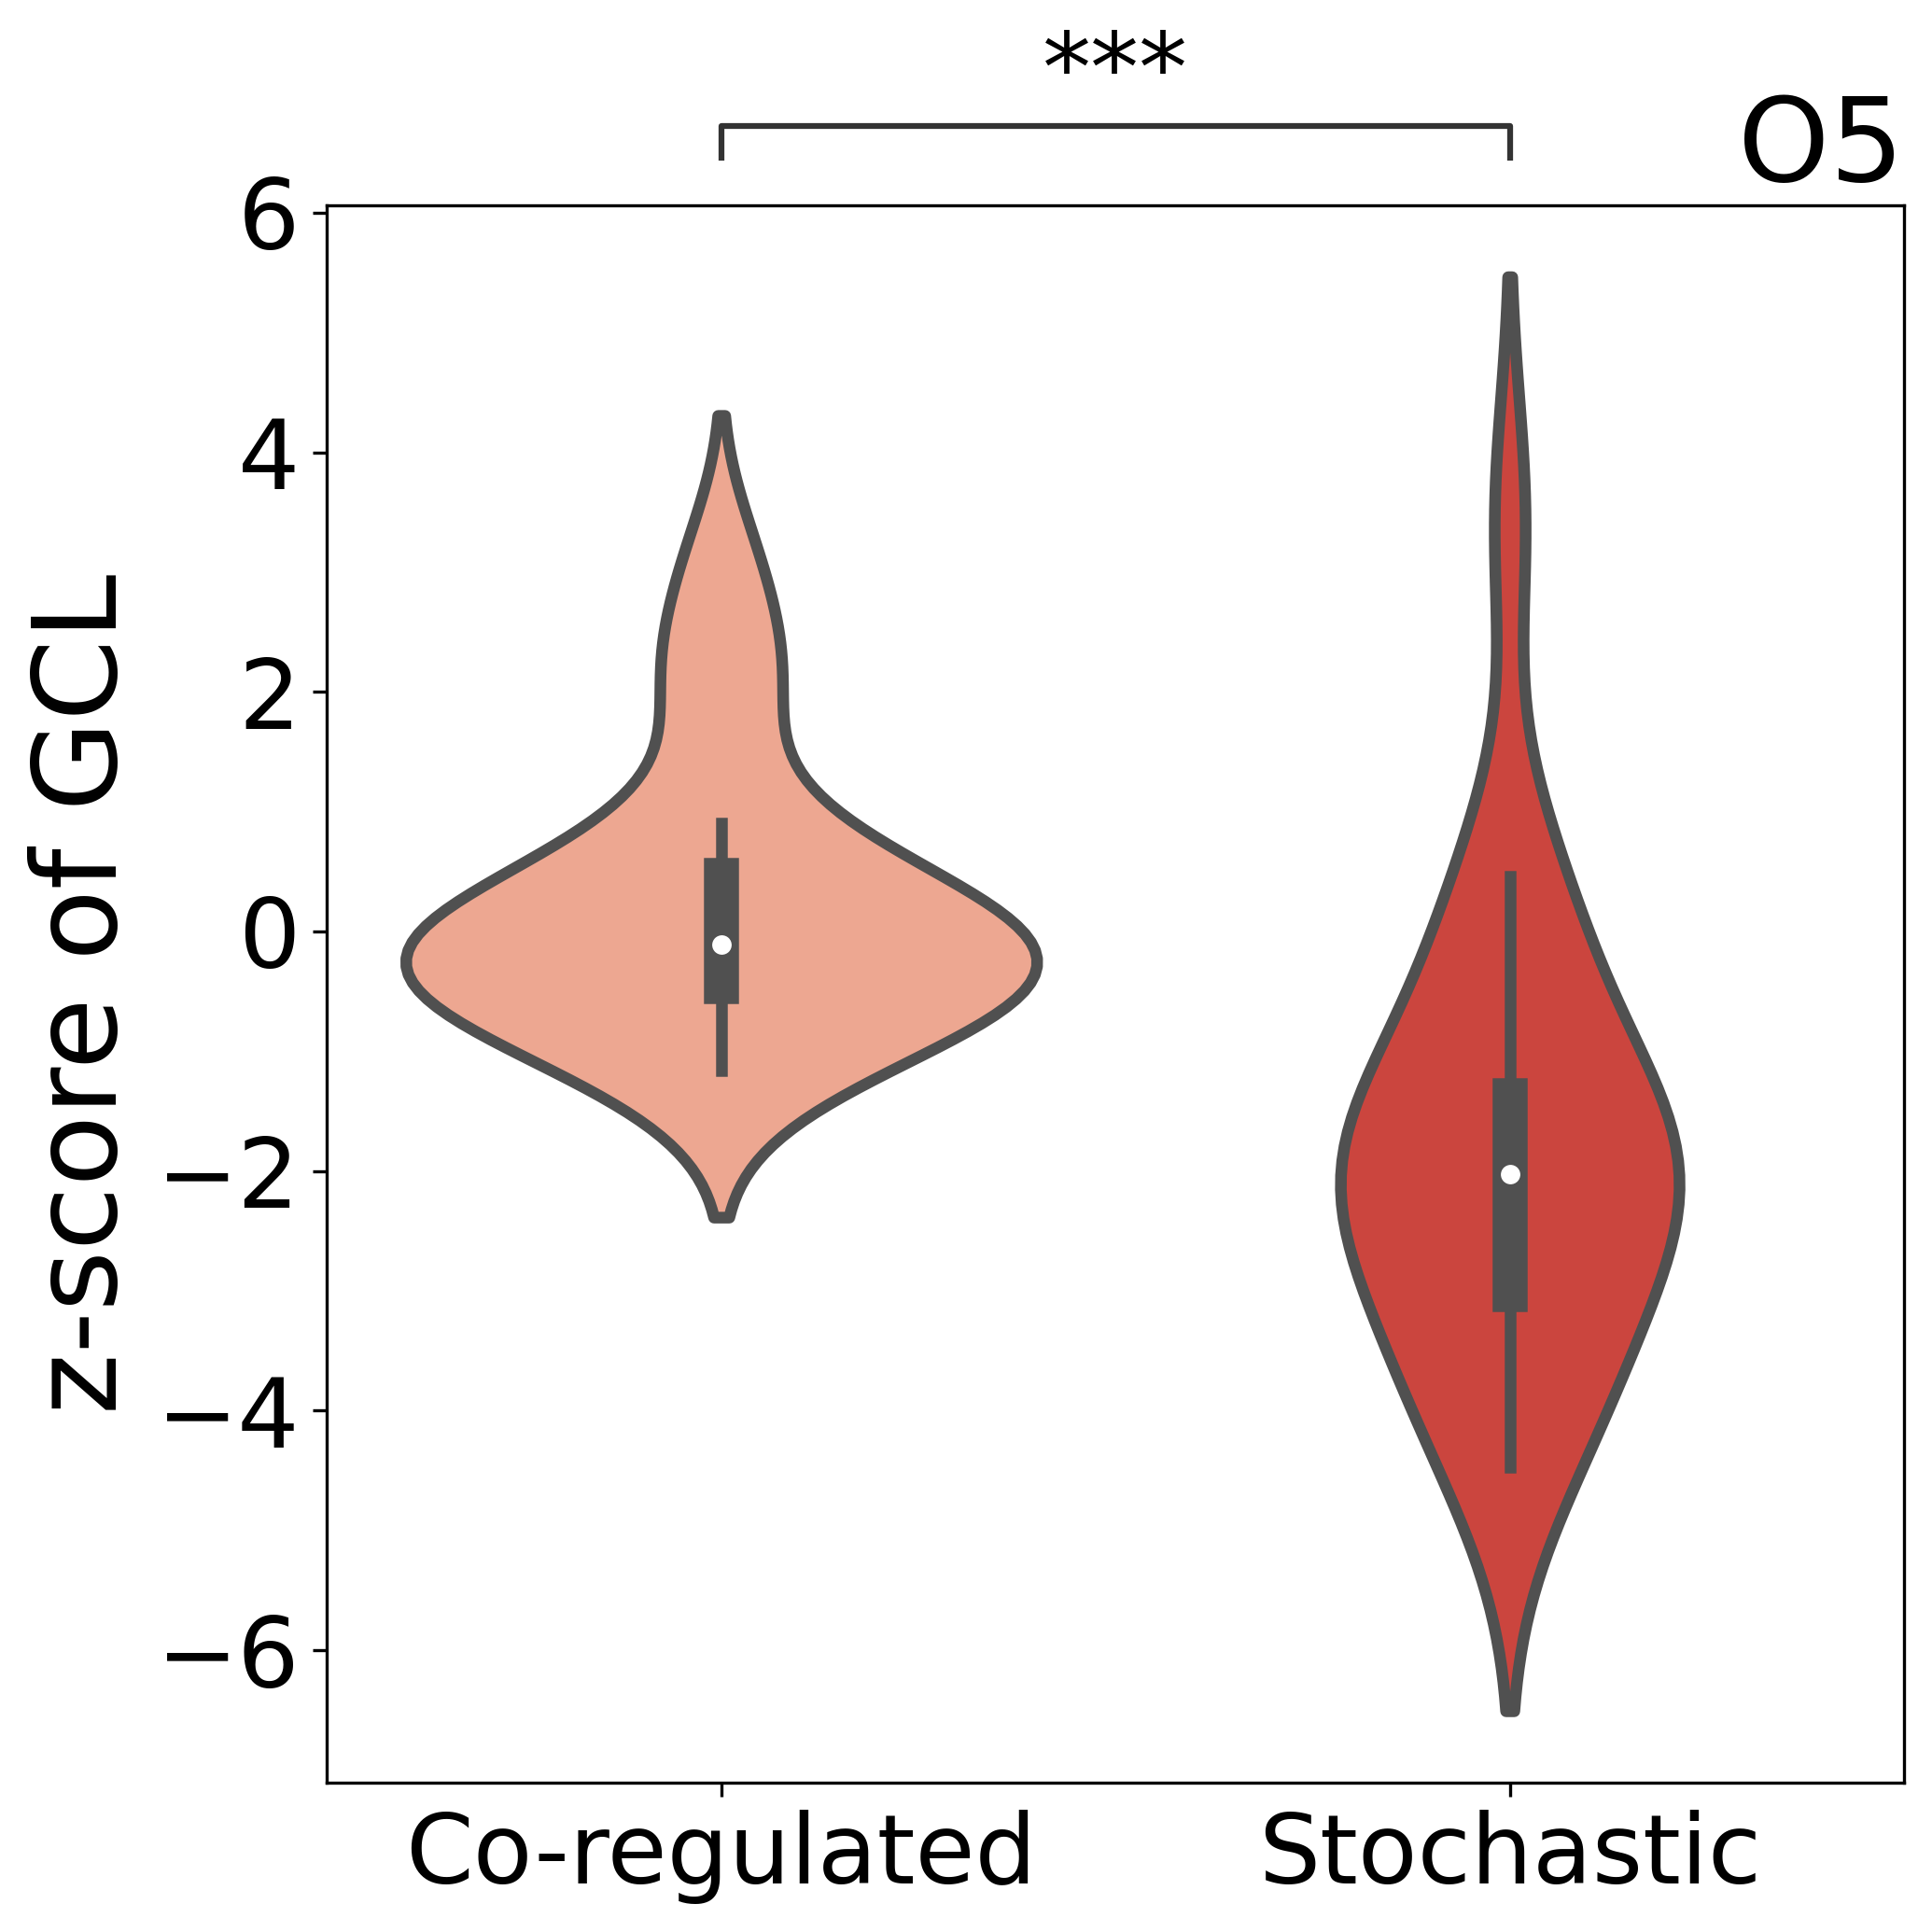

Y4
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


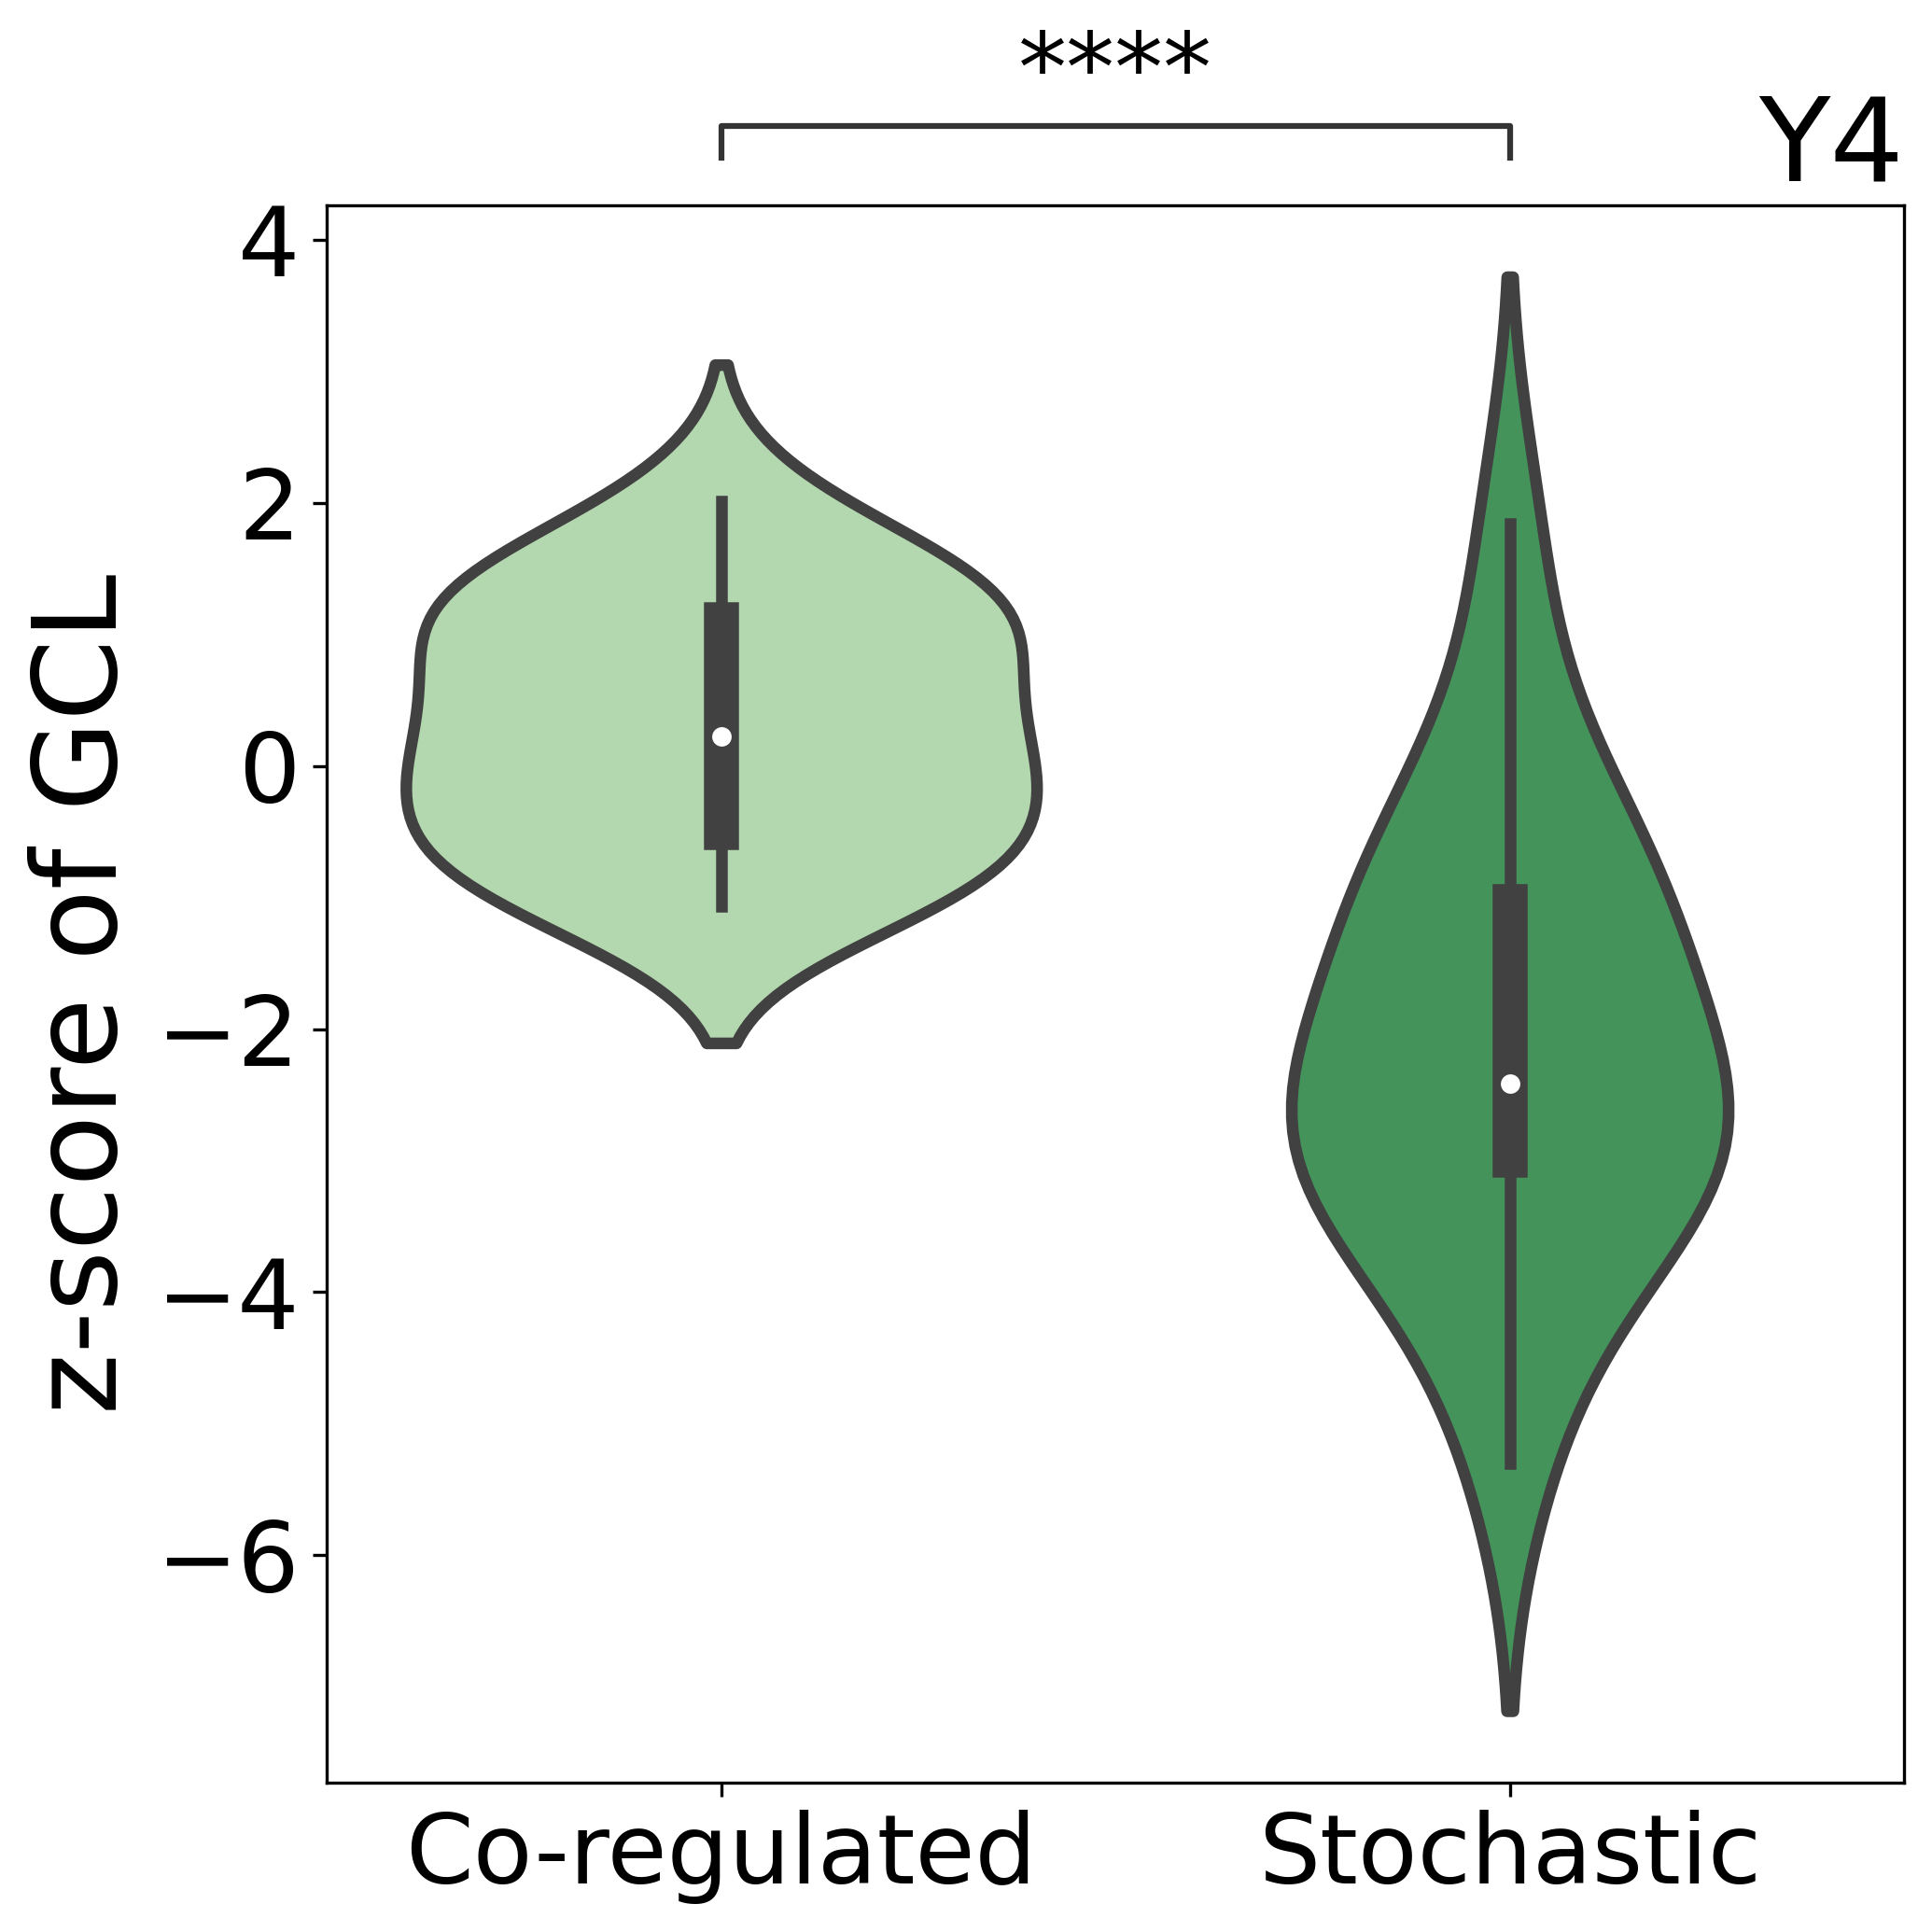

Y5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


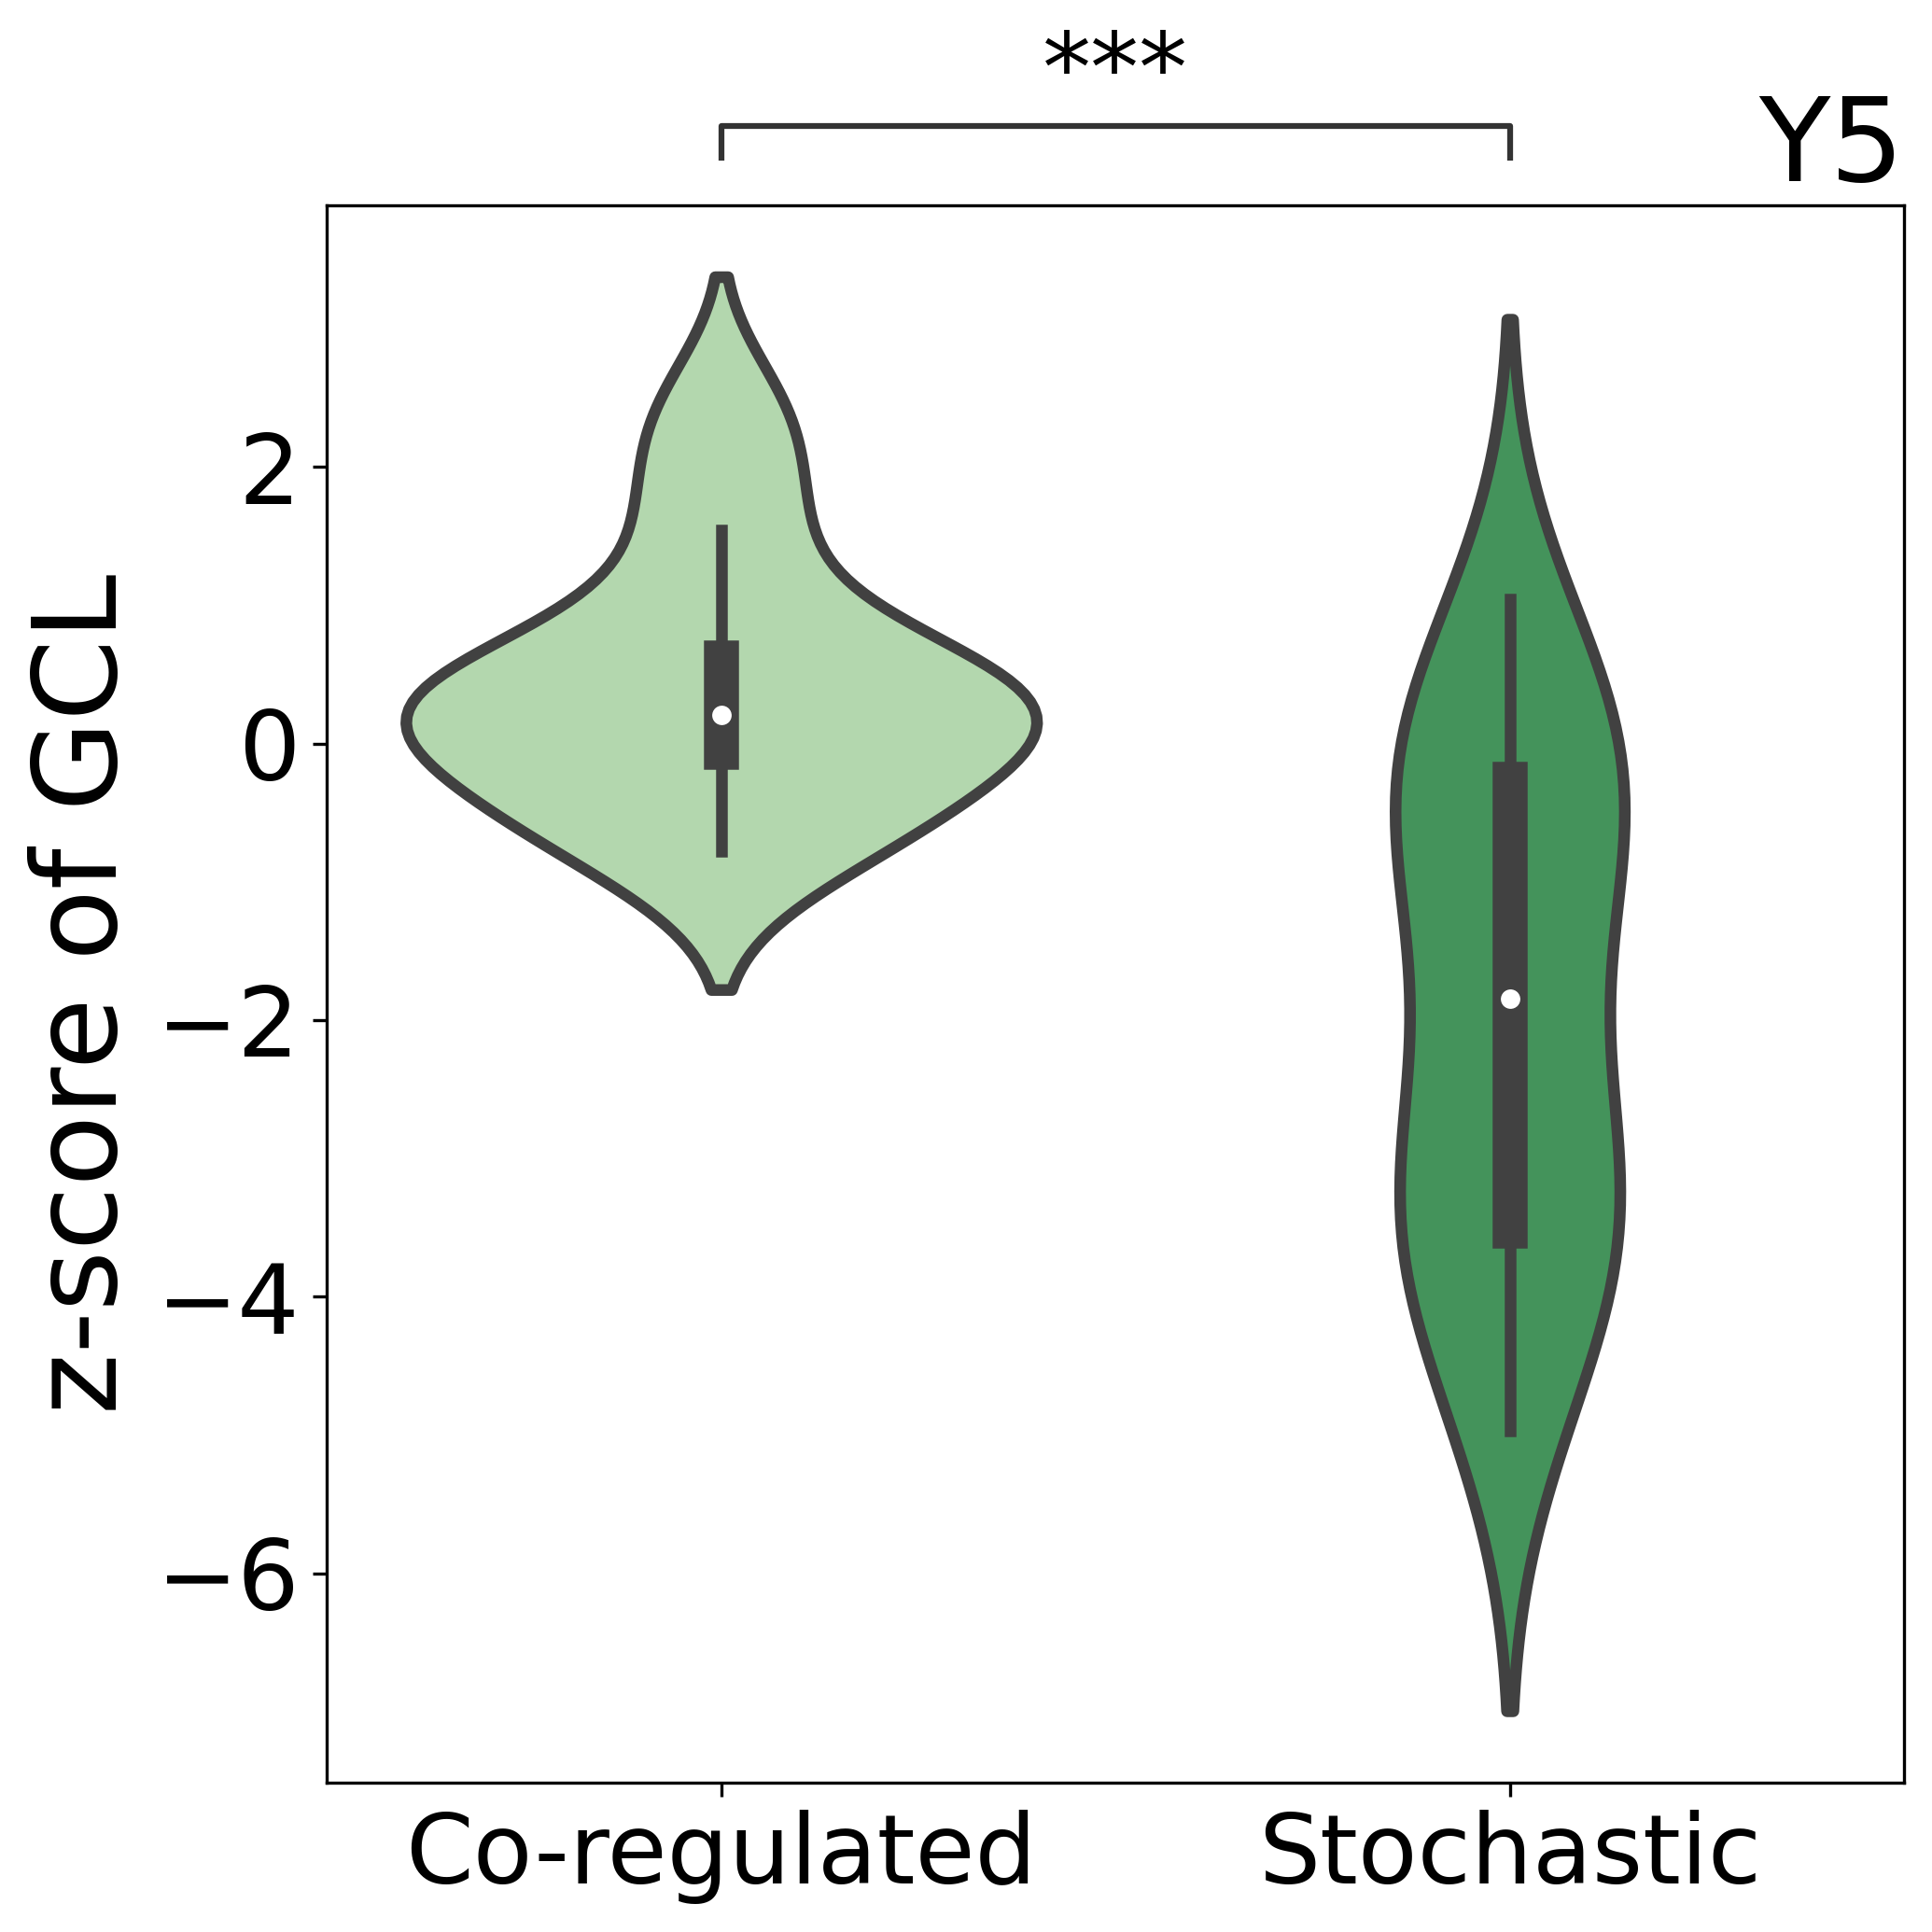

Y7
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


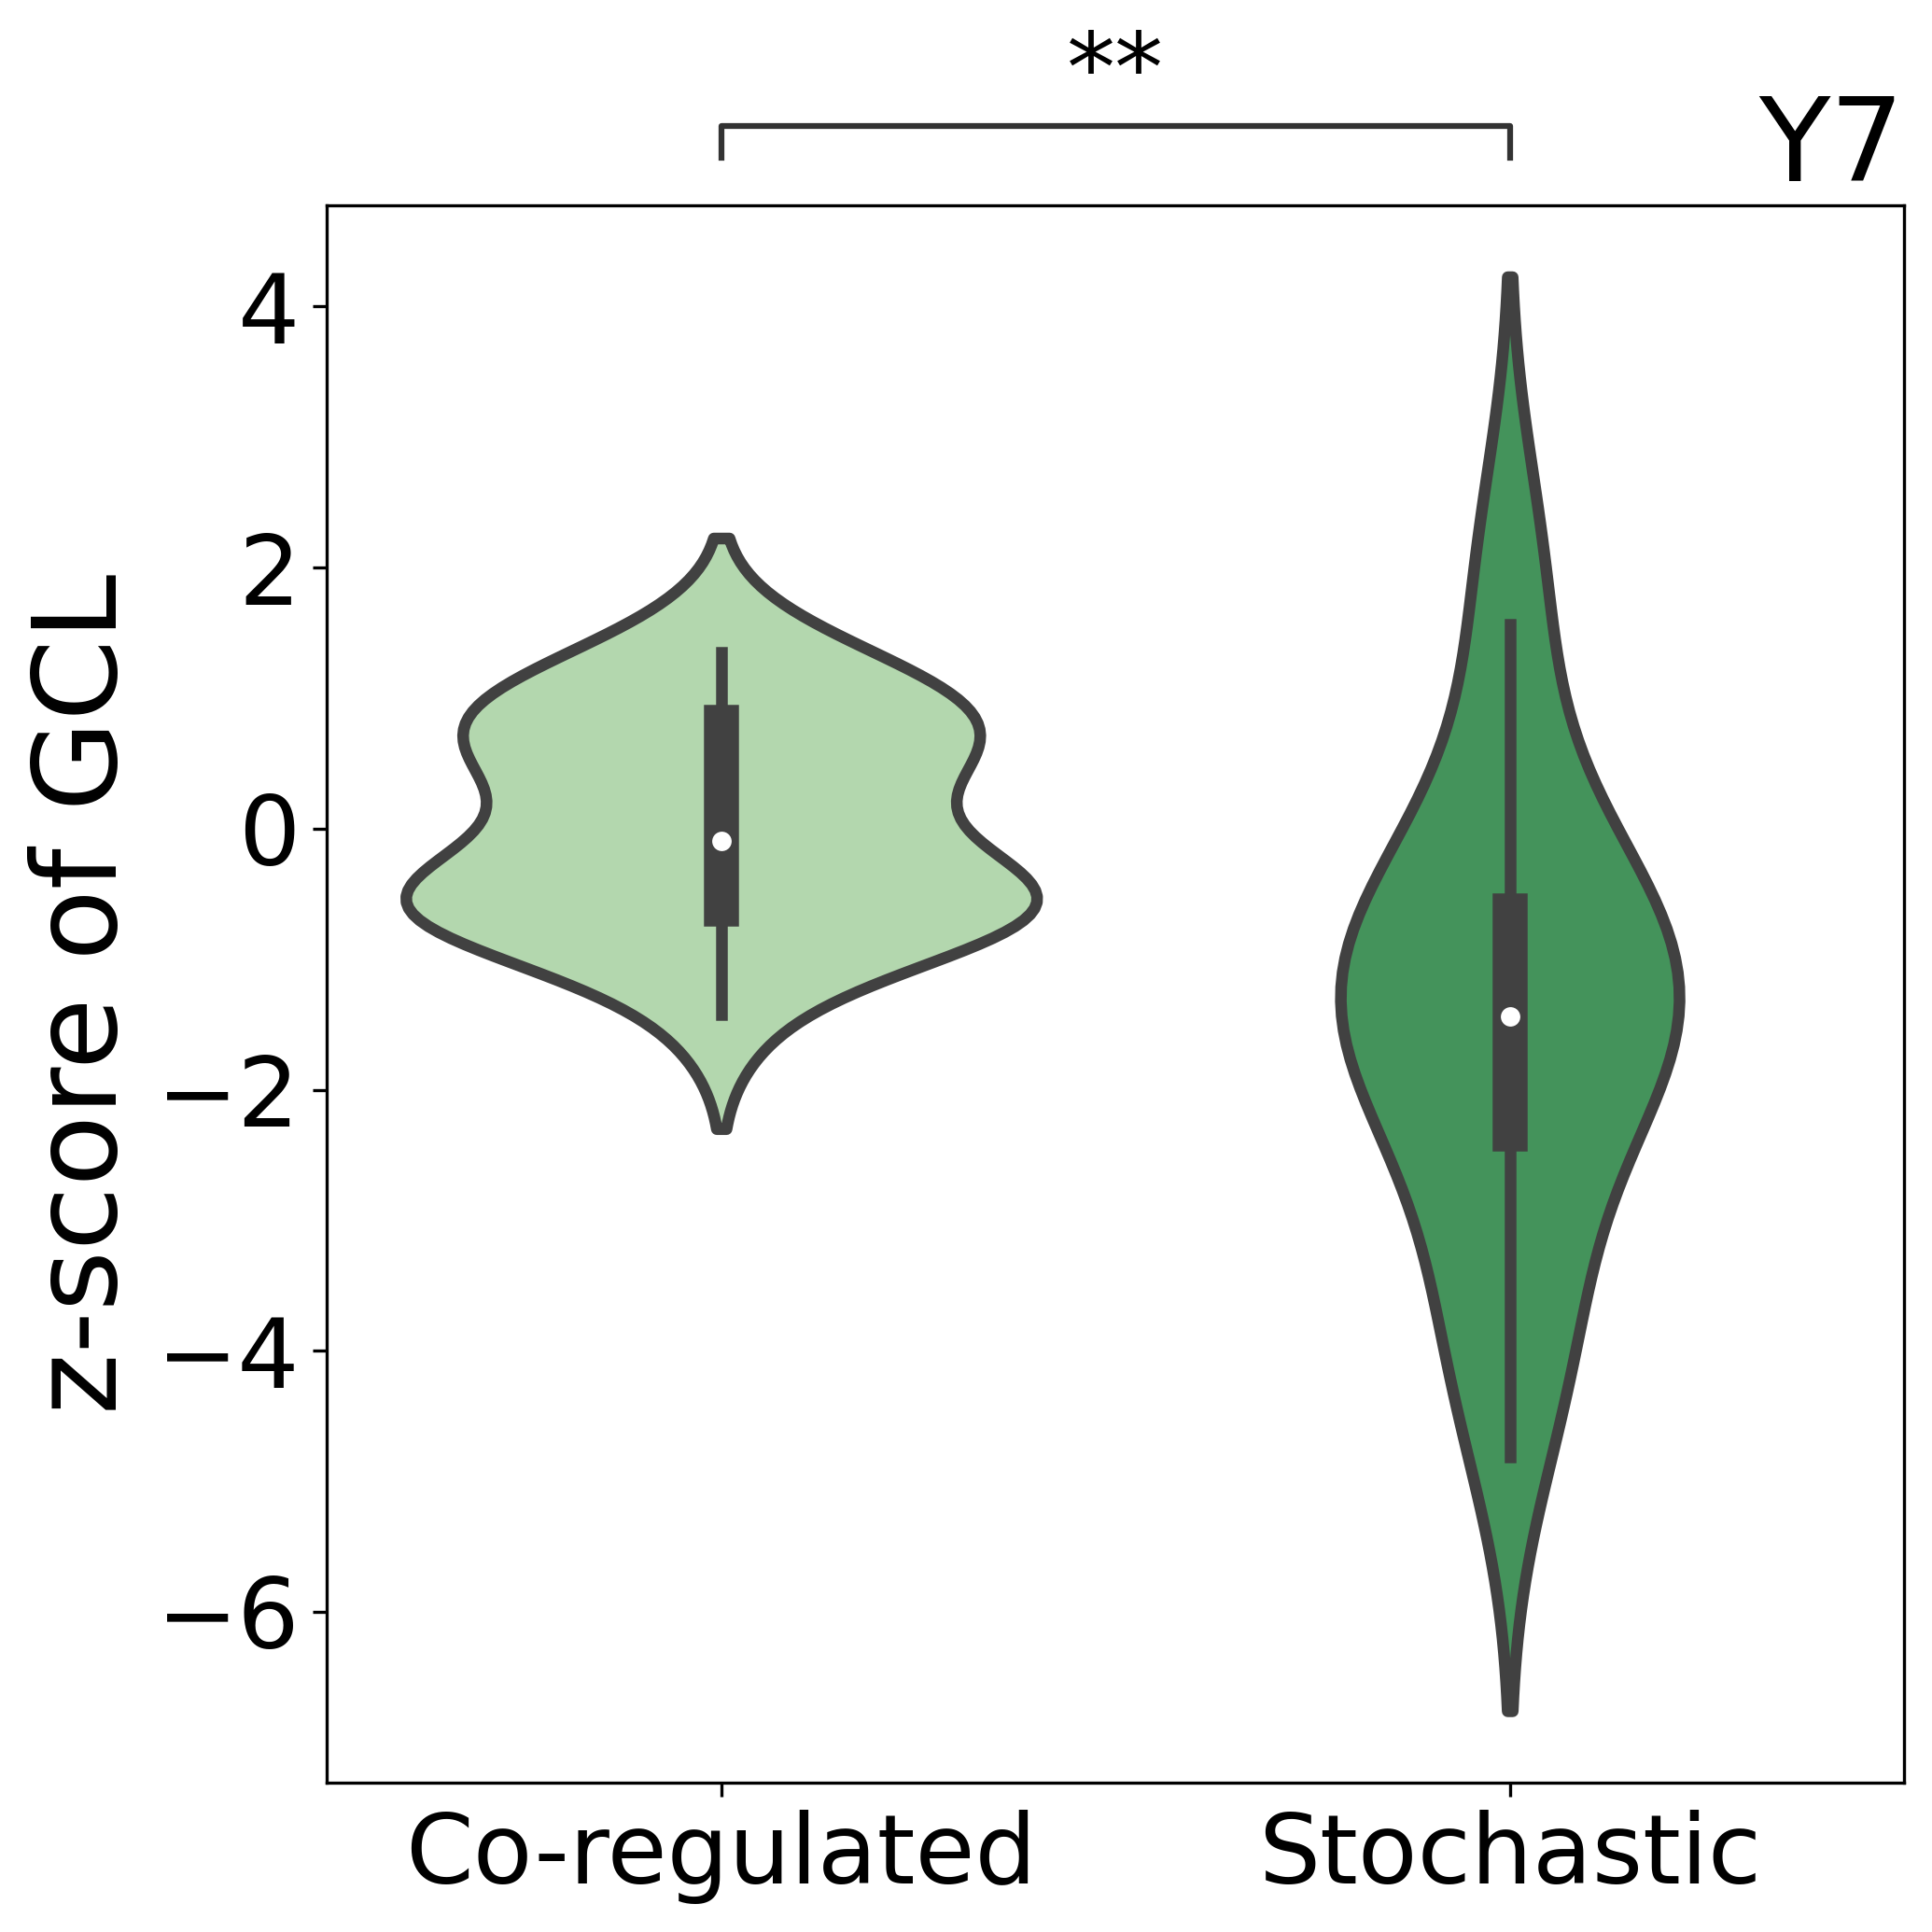

Y8
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


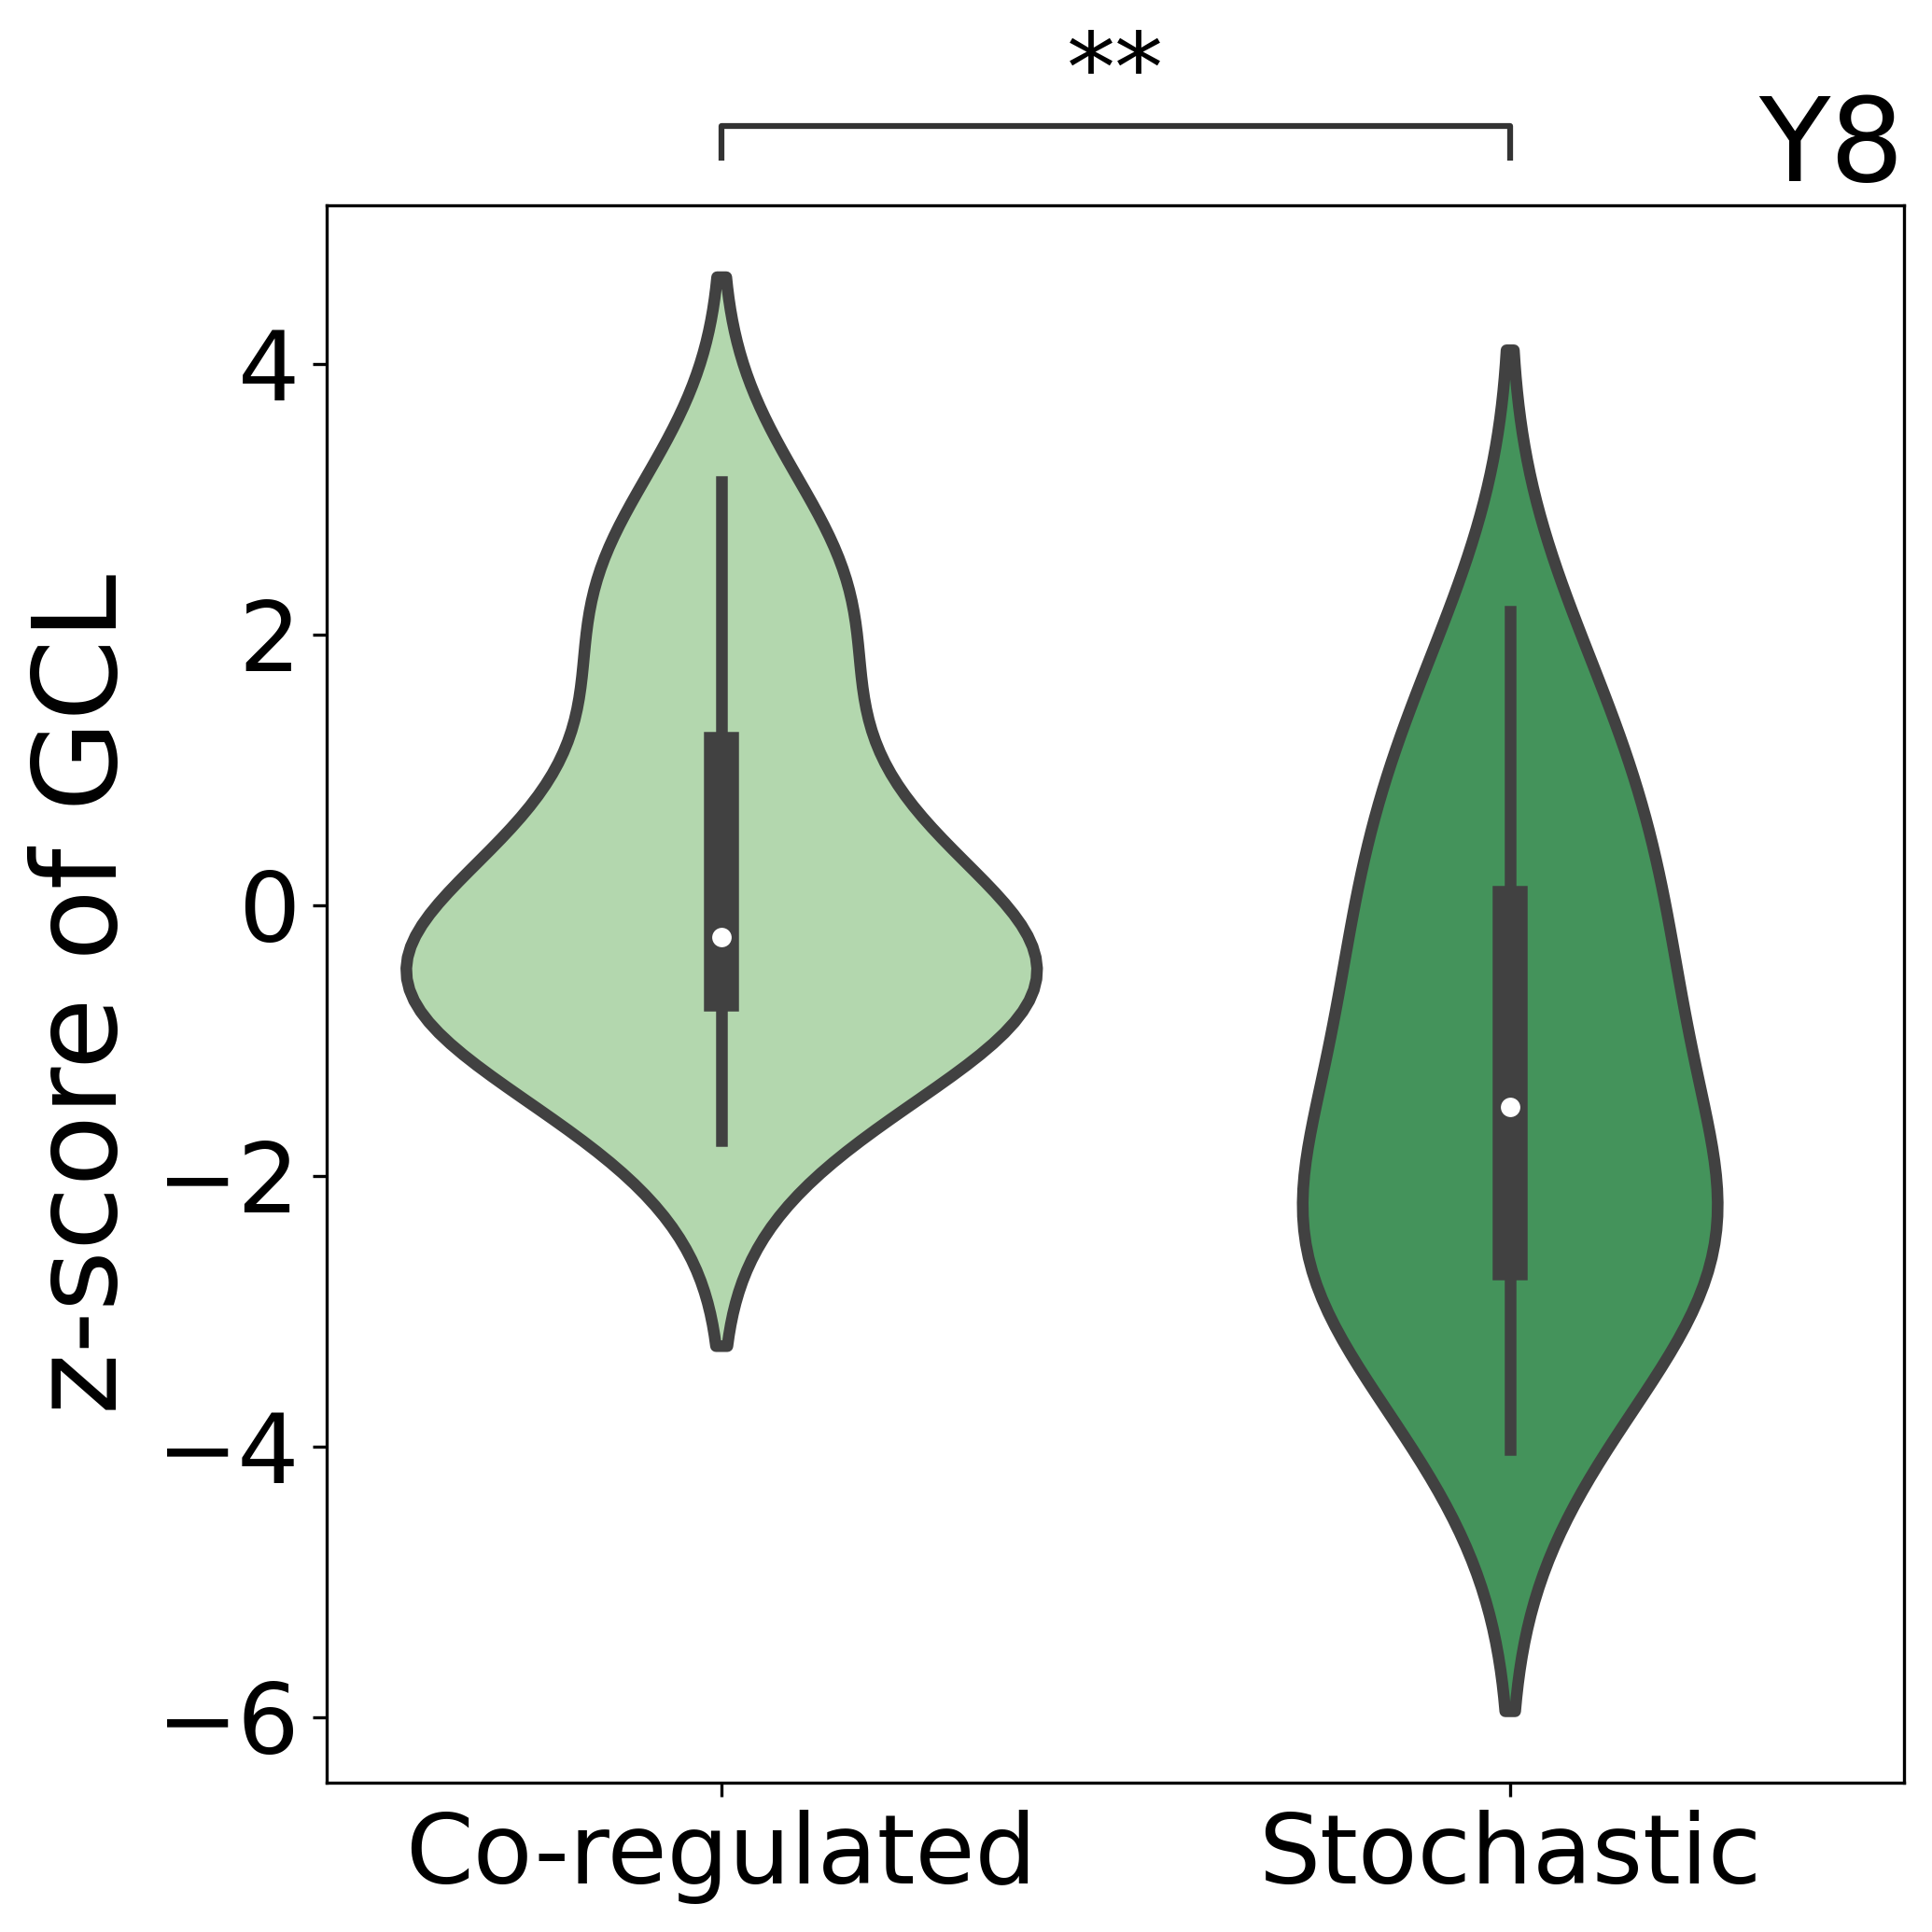

In [17]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
plt.figure(figsize=(7,7), dpi=300)


th, kind = 0.4, 'coreg'
kind2name = {'coreg': 'CoReggenesGCL',
        'stoch': 'StochgenesGCL',
        'rand': 'RandomgenesGCL'}

group2name = {'CoReggenesGCL' : 'Co-regulated',
        'StochgenesGCL' : 'Stochastic',
    'RandomgenesGCL': 'Background'}

mice = ['O1', 'O5', 'Y4', 'Y5', 'Y7', 'Y8']
ths = [0.4, 0.5, 0.6]
kinds = ['coreg', 'stoch', 'rand']

order = ['Co-regulated', 'Stochastic', 'Background']
# x = 'Mouse'
x = 'Kind'
# x = 'Mouse_ID'
y = 'GCL'
order = mice
order = ['Co-regulated', 'Stochastic']
tests = ['Mann-Whitney']
box_pairs=[(order[x],order[y]) for x in range(0, len(order)) for y in range(x+1, len(order))]

for th in ths:
    for test in tests:
        # for kind in kinds:
        for mouse in mice:
            df_t = pd.concat((normalize_table(df_real, df_sur, th, kind, group='r') for kind in kinds), axis=0)
            df_t = df_t[df_t.Mouse == mouse]
            df_t['Kind'] = df_t['Kind'].apply(lambda x: group2name[x])
            print(mouse)
            print(df_t['Kind'].value_counts())
            fig, ax = plt.subplots(1,1, figsize=(7,7),dpi=300)
            palette = 'Greens' if mouse in ['Y4','Y5', 'Y7', 'Y8'] else 'Reds'
            ax = sns.violinplot(data=df_t, x=x, y=y, order=order, fontsize=50,ax=ax, 
                                palette=palette,
                                title=mouse)
            annotator = Annotator(ax, box_pairs, data=df_t, x=x, y=y, order=order,
                                 )
            annotator.configure(test=test, 
                                #test='Wilcoxon-legacy',
                                text_format='star', 
                                # text_format='simple', 
                                loc='outside',
                                # loc='inside',
                                verbose=0, 
                                fontsize=25)
                                # fontsize=25)
            annotator.apply_and_annotate()
            ax.set_title(mouse, loc='right')
            plt.xlabel(None)
            
            plt.ylabel('z-score of GCL')
            plt.xticks(fontsize=25, rotation=0)
            plt.savefig(f'../scDNAm/PICS/png/GCL_plus_strand_normalized_by_mouse_{x}_{y}_{test}_{th}_{mouse}.png', format='png', dpi=300)
            plt.show()

# Minus by mouse

In [19]:
# typ = 'plus'
typ = 'minus'
if typ == 'plus':
    file = 'For_Orr/TableForAndrei_PlusStrand1cpg.xlsx'
else:
    file = 'For_Orr/TableForAndrei_MinusStrand1cpg.xlsx'
    
df_real = pd.read_excel(file, header=[0,1,2,3])
df_sur = pd.read_excel(file, header=[0,1,2,3], sheet_name=1)

O1
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


<Figure size 2100x2100 with 0 Axes>

<Figure size 2100x2100 with 0 Axes>

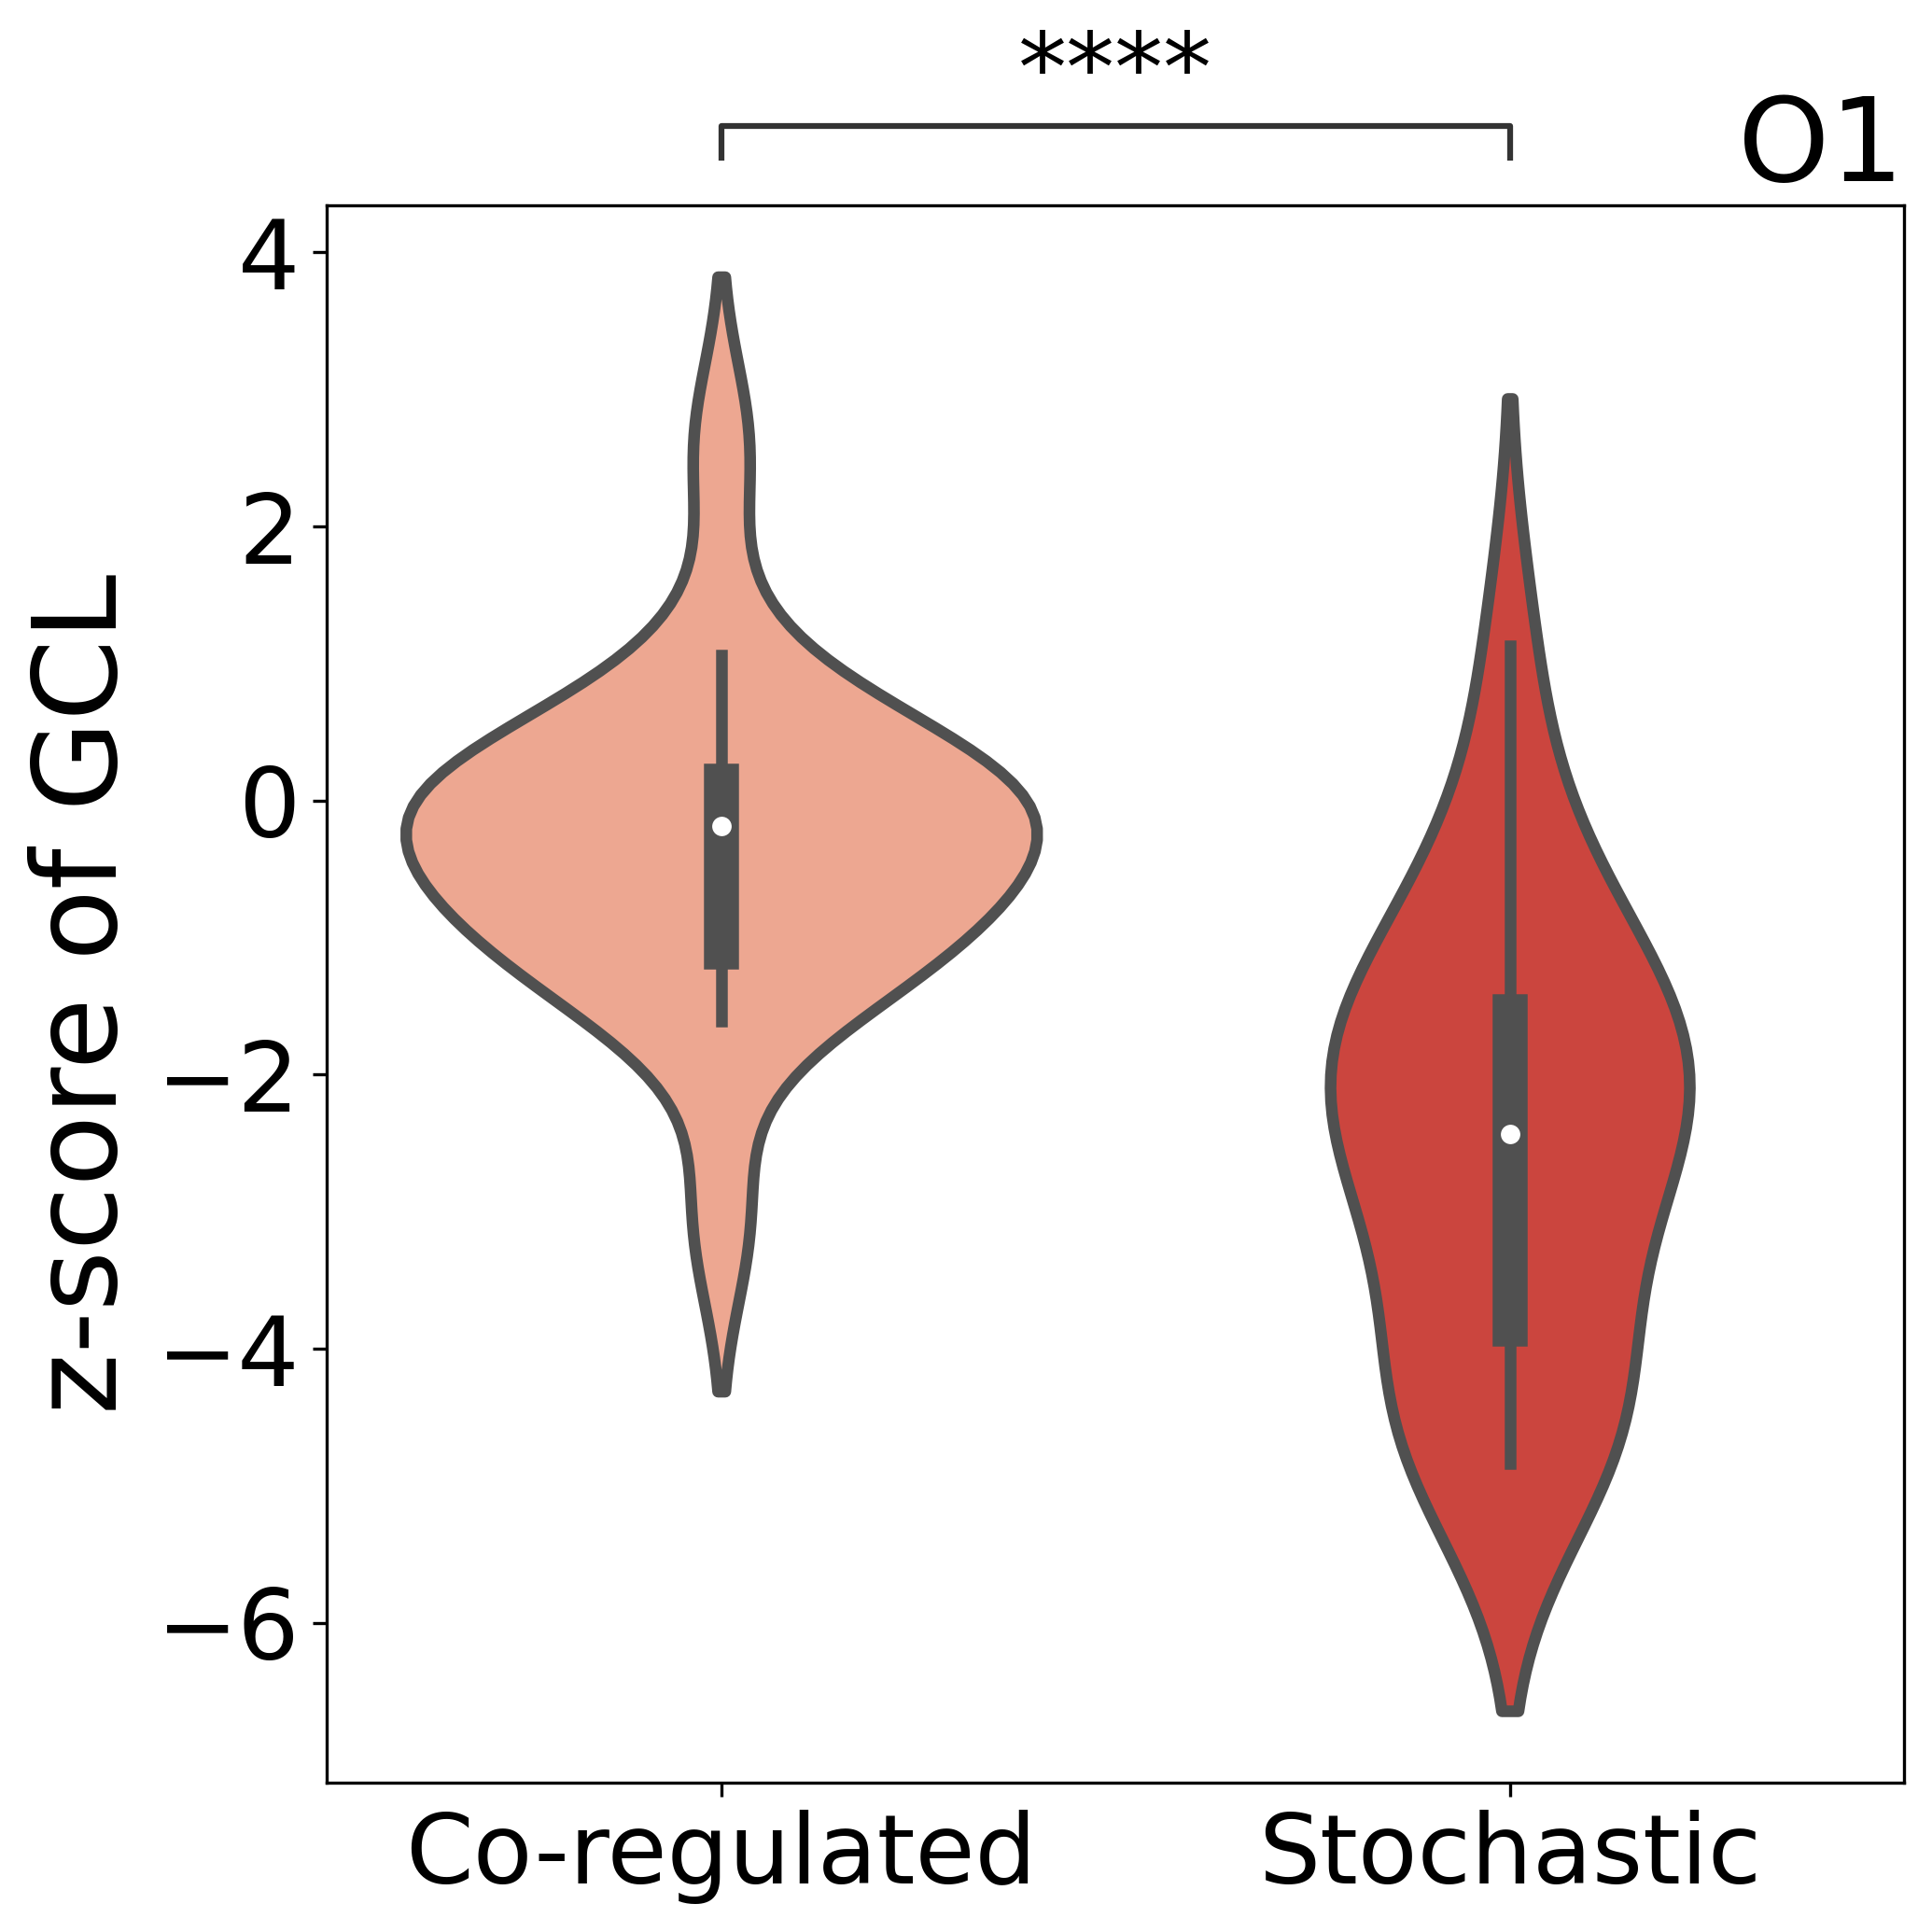

O5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


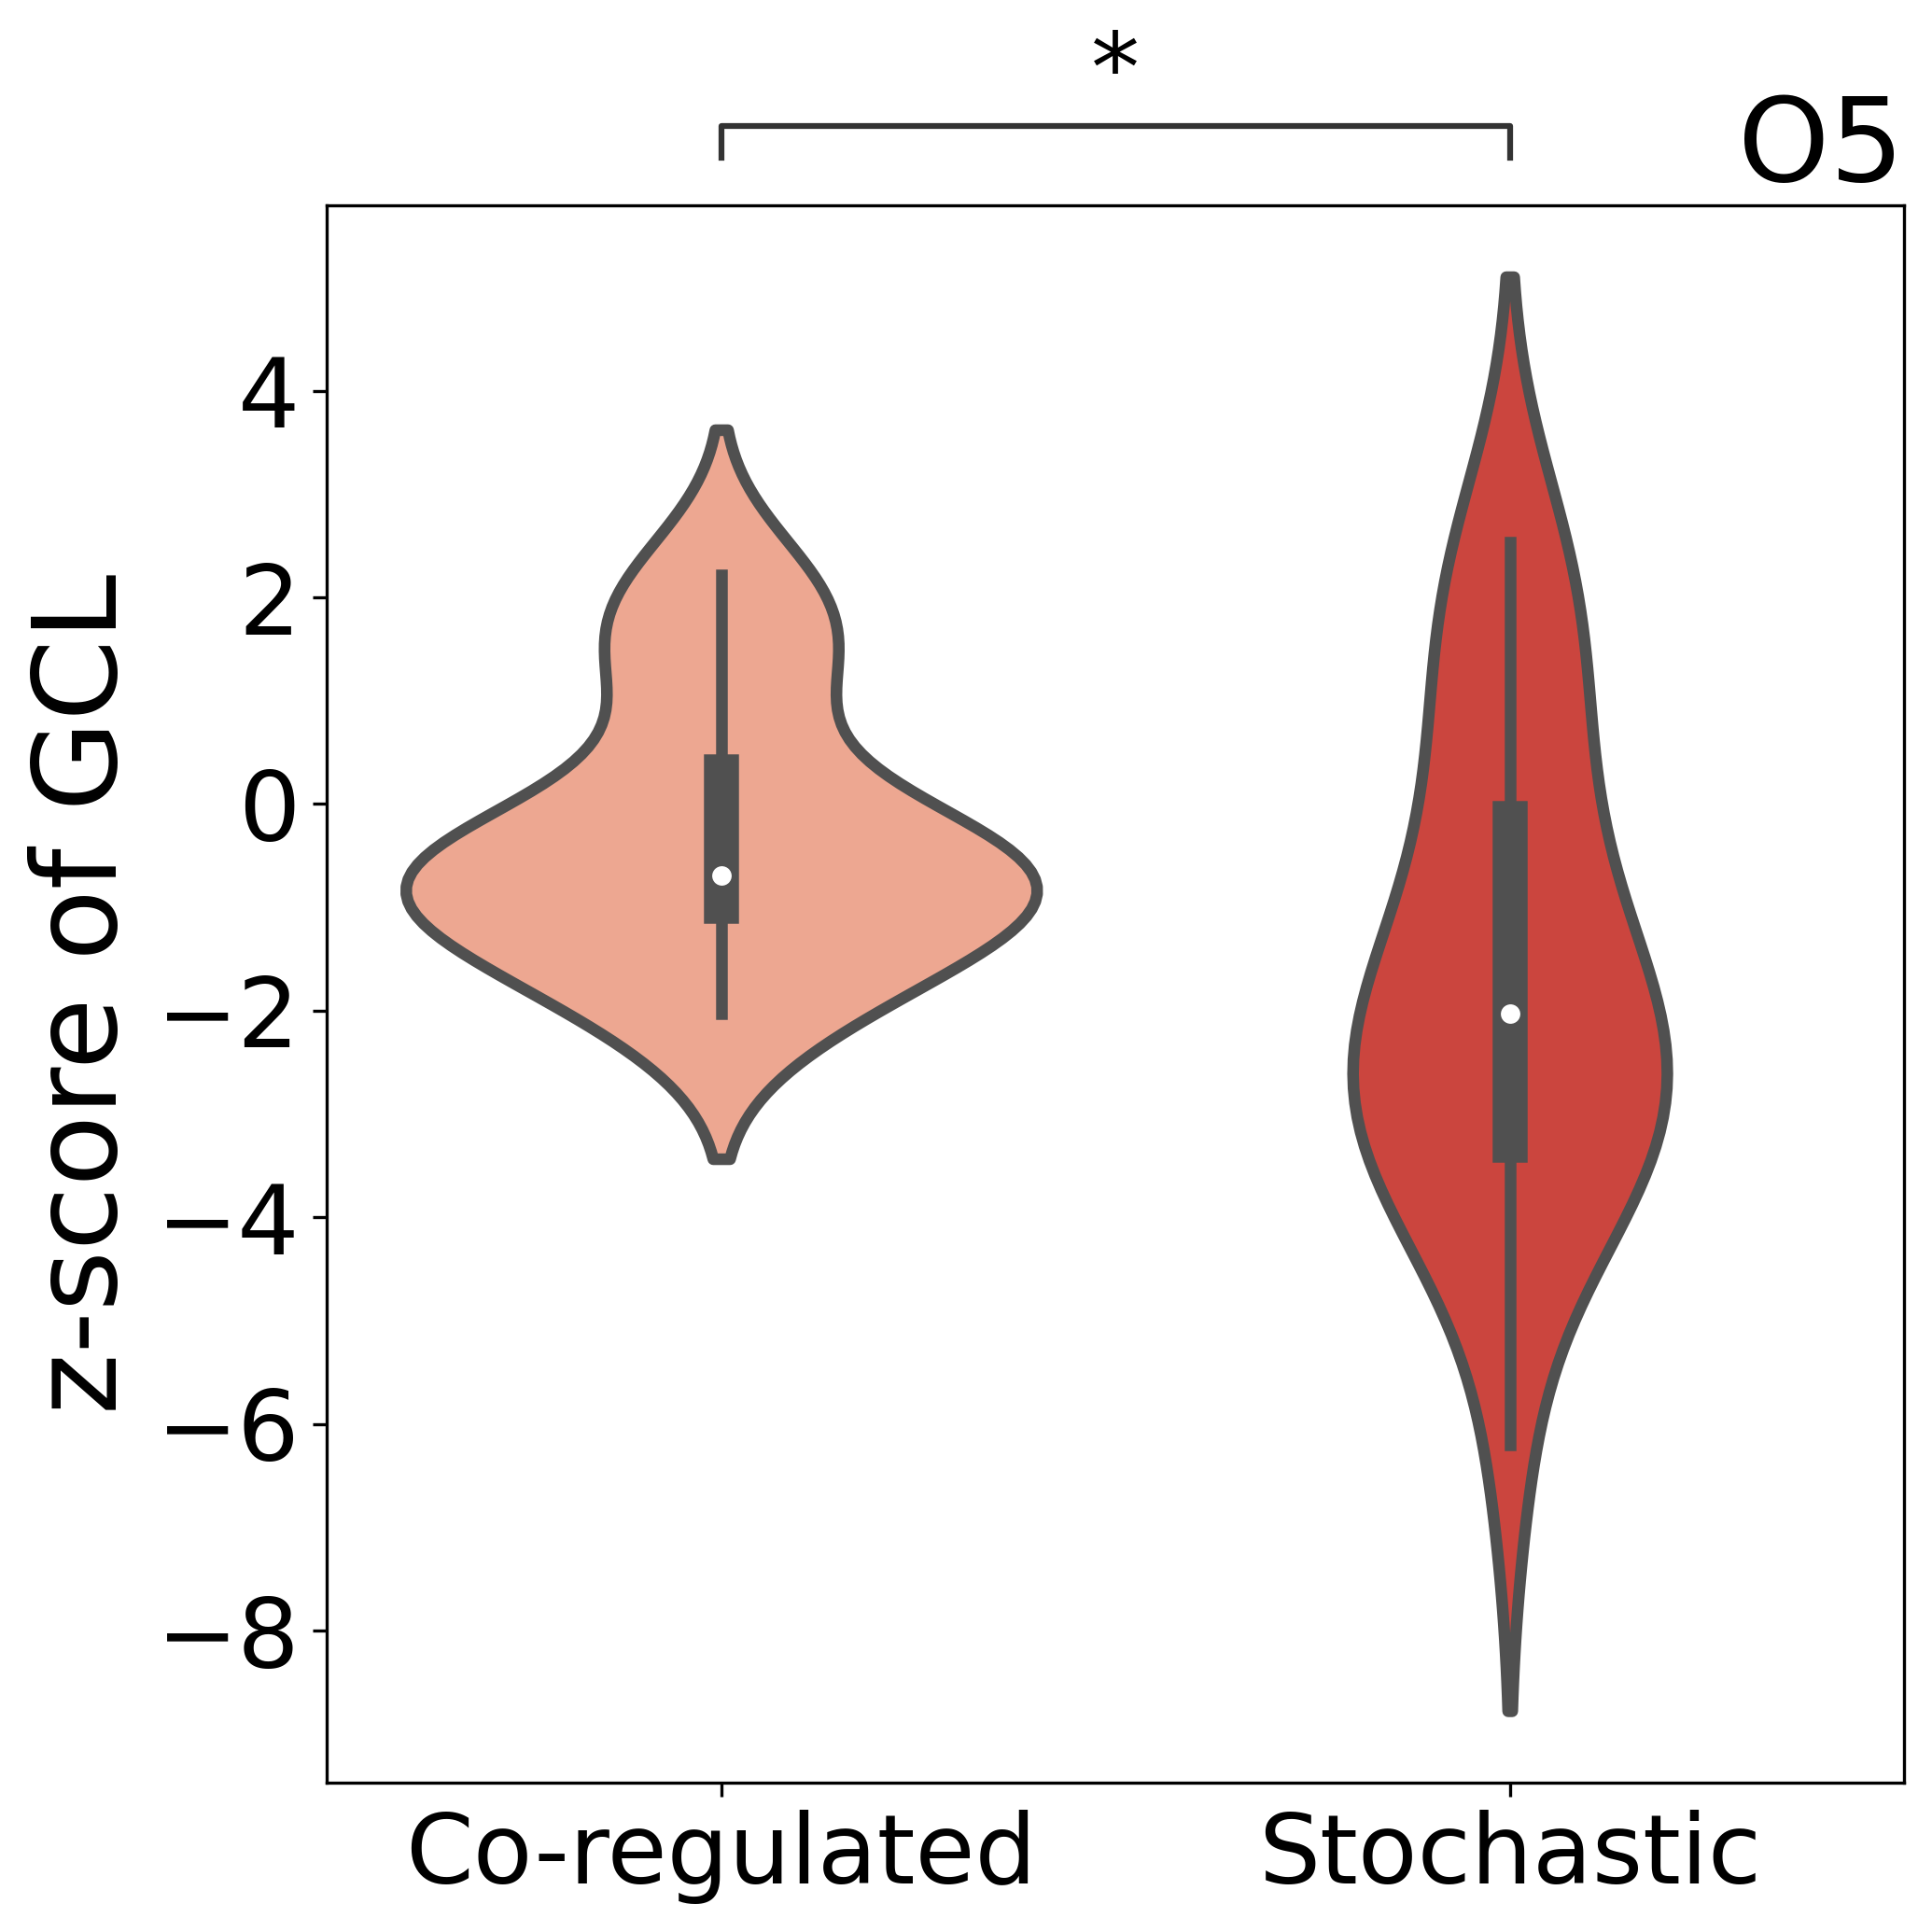

Y4
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


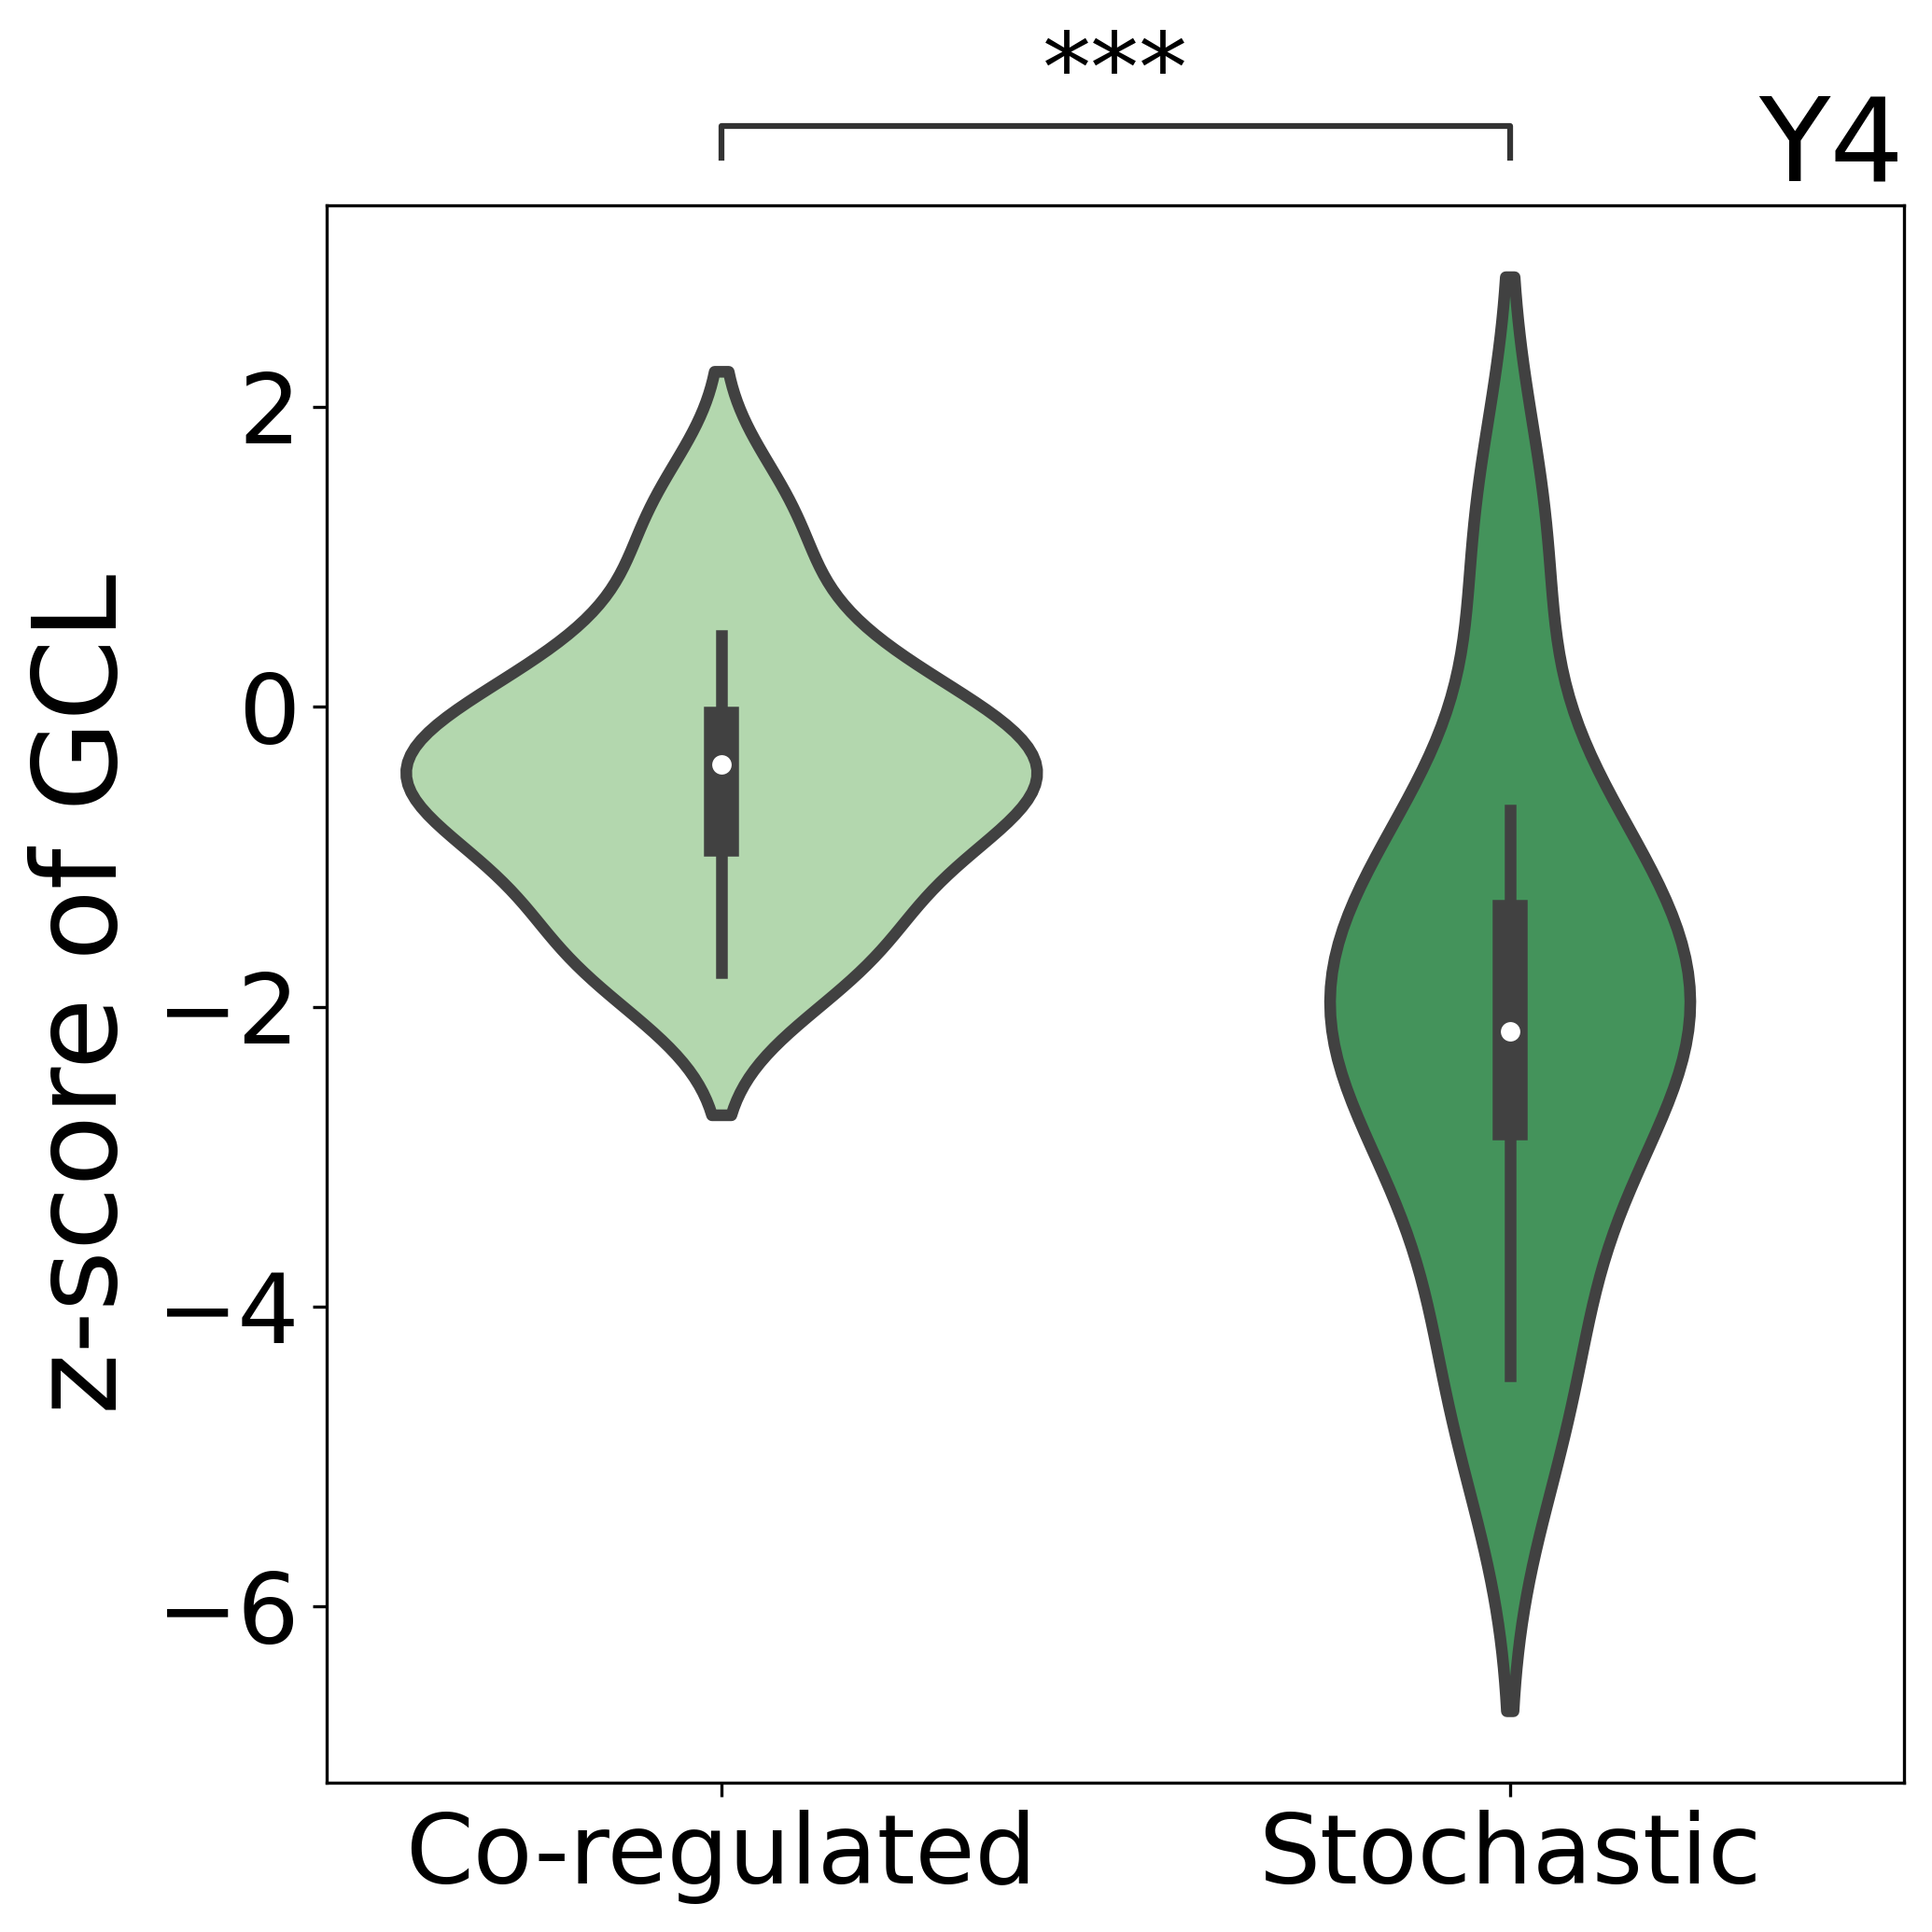

Y5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


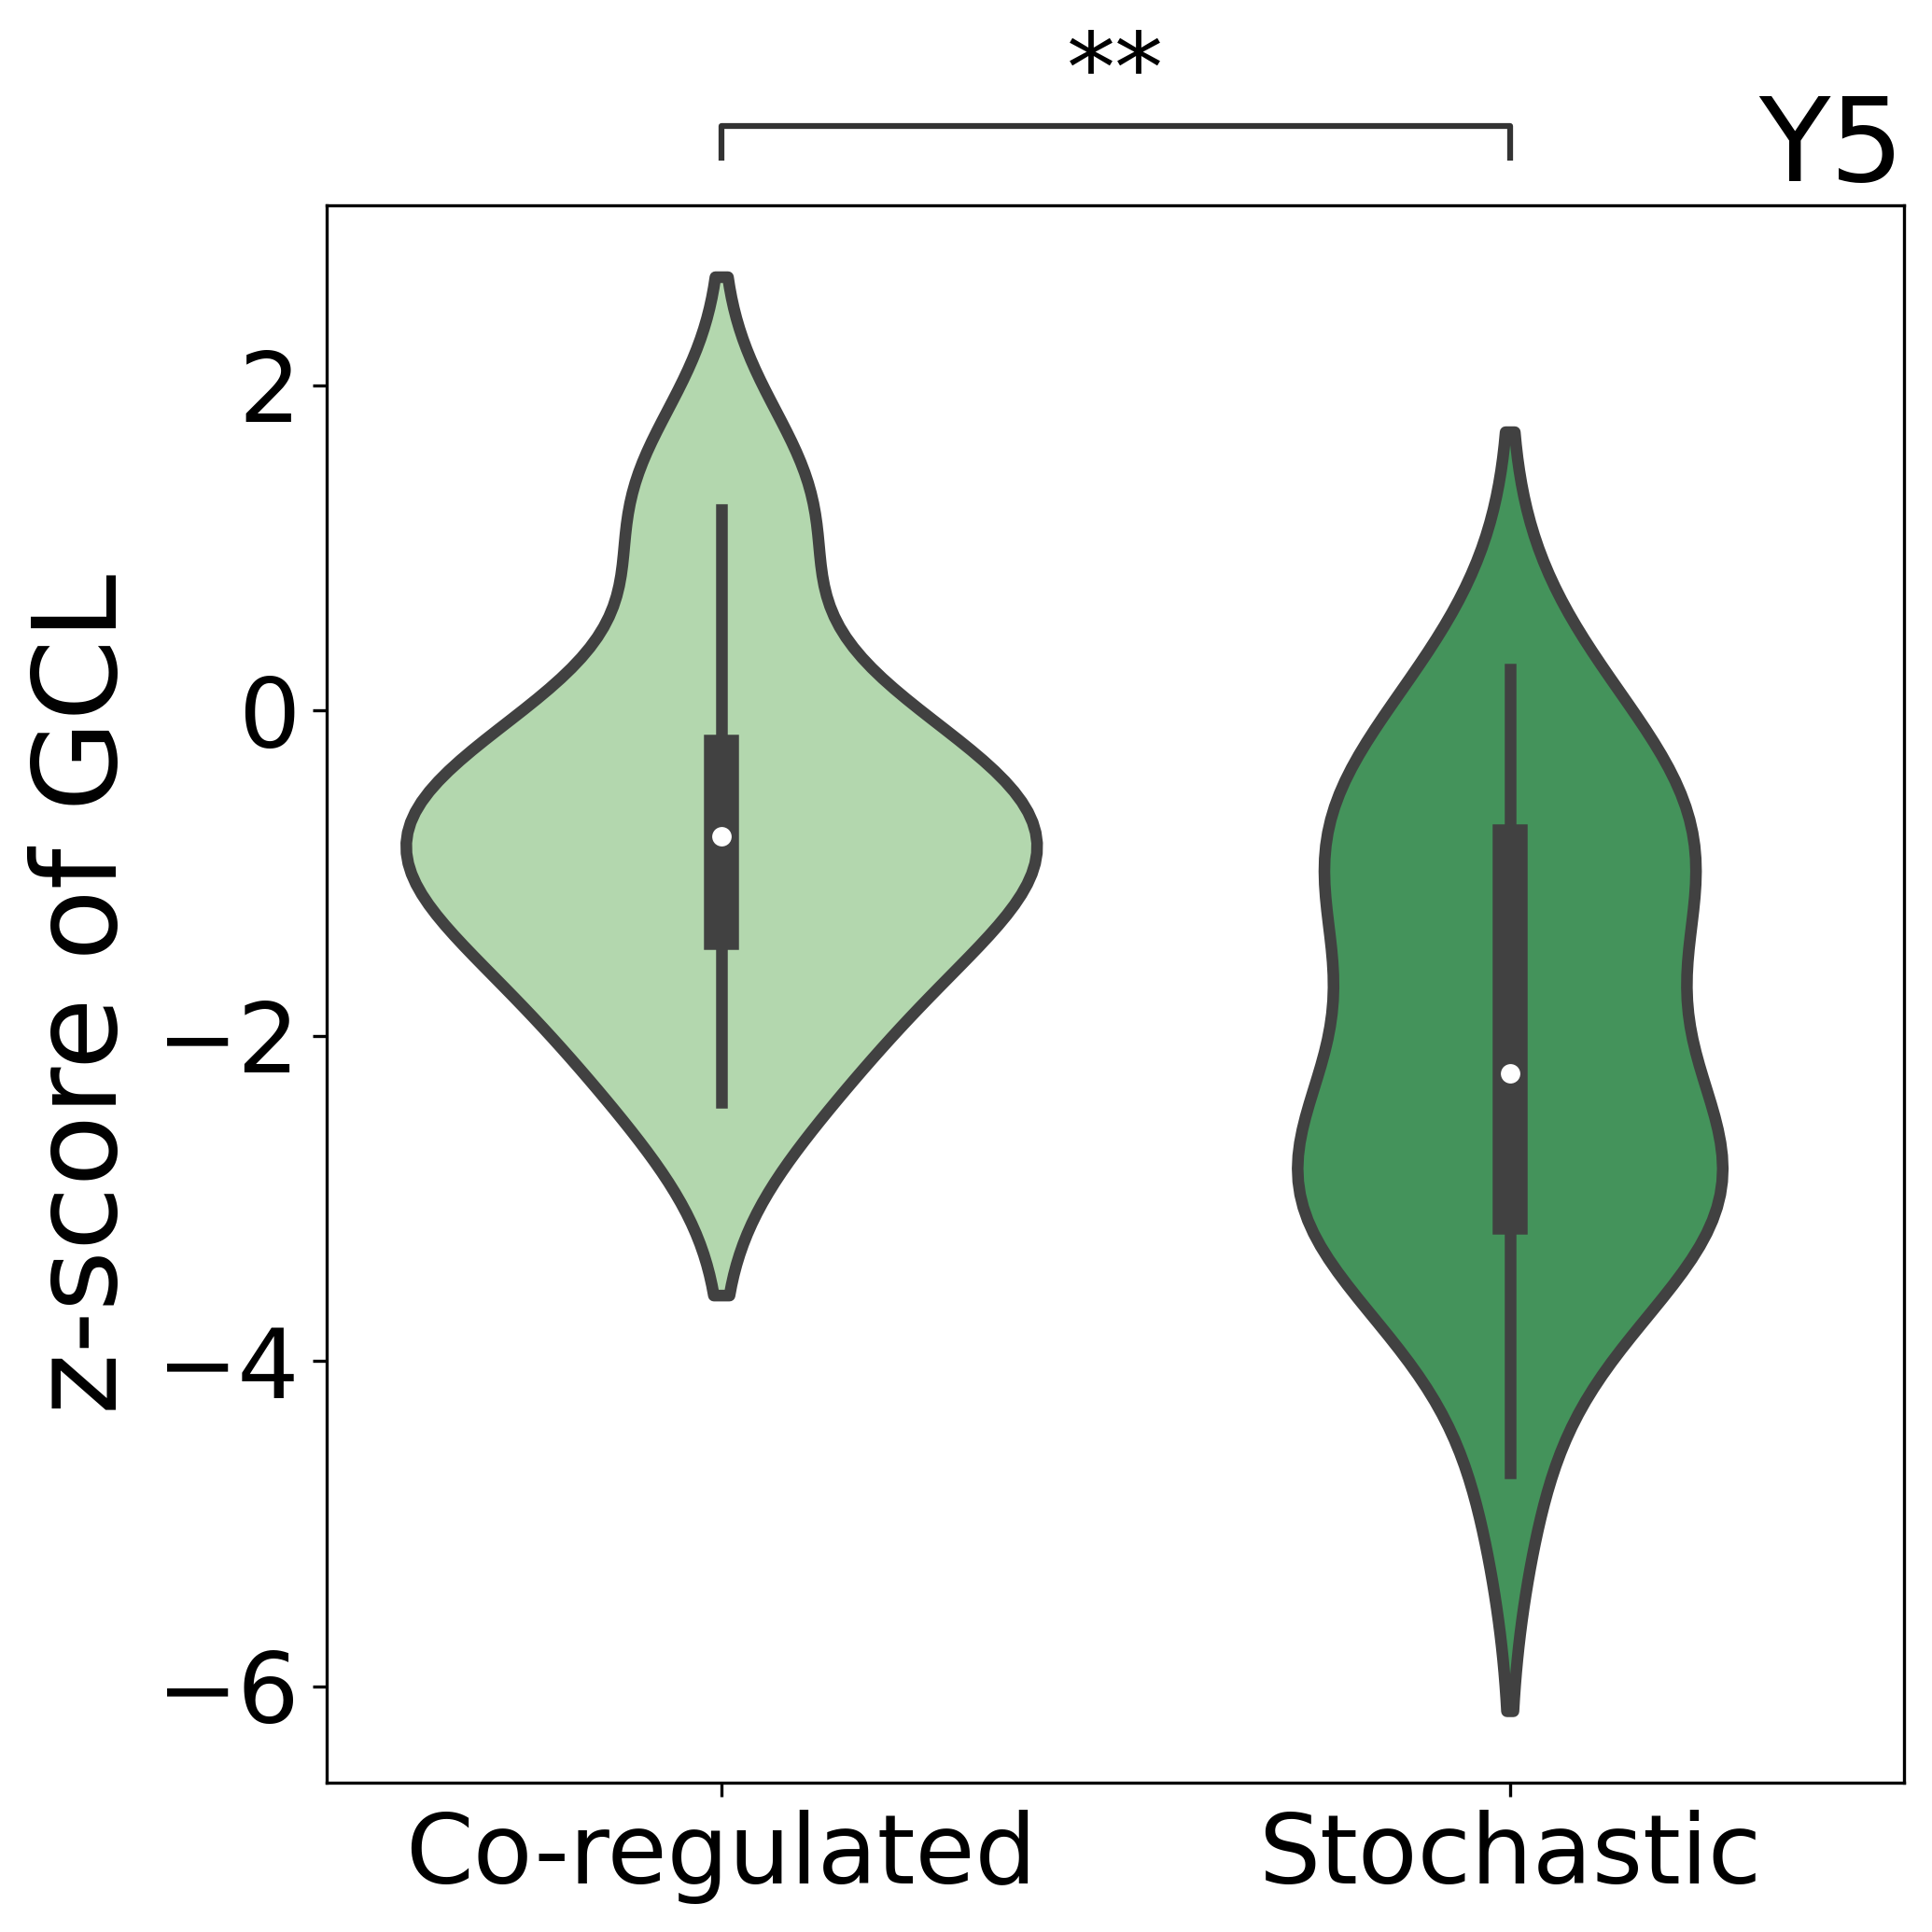

Y7
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


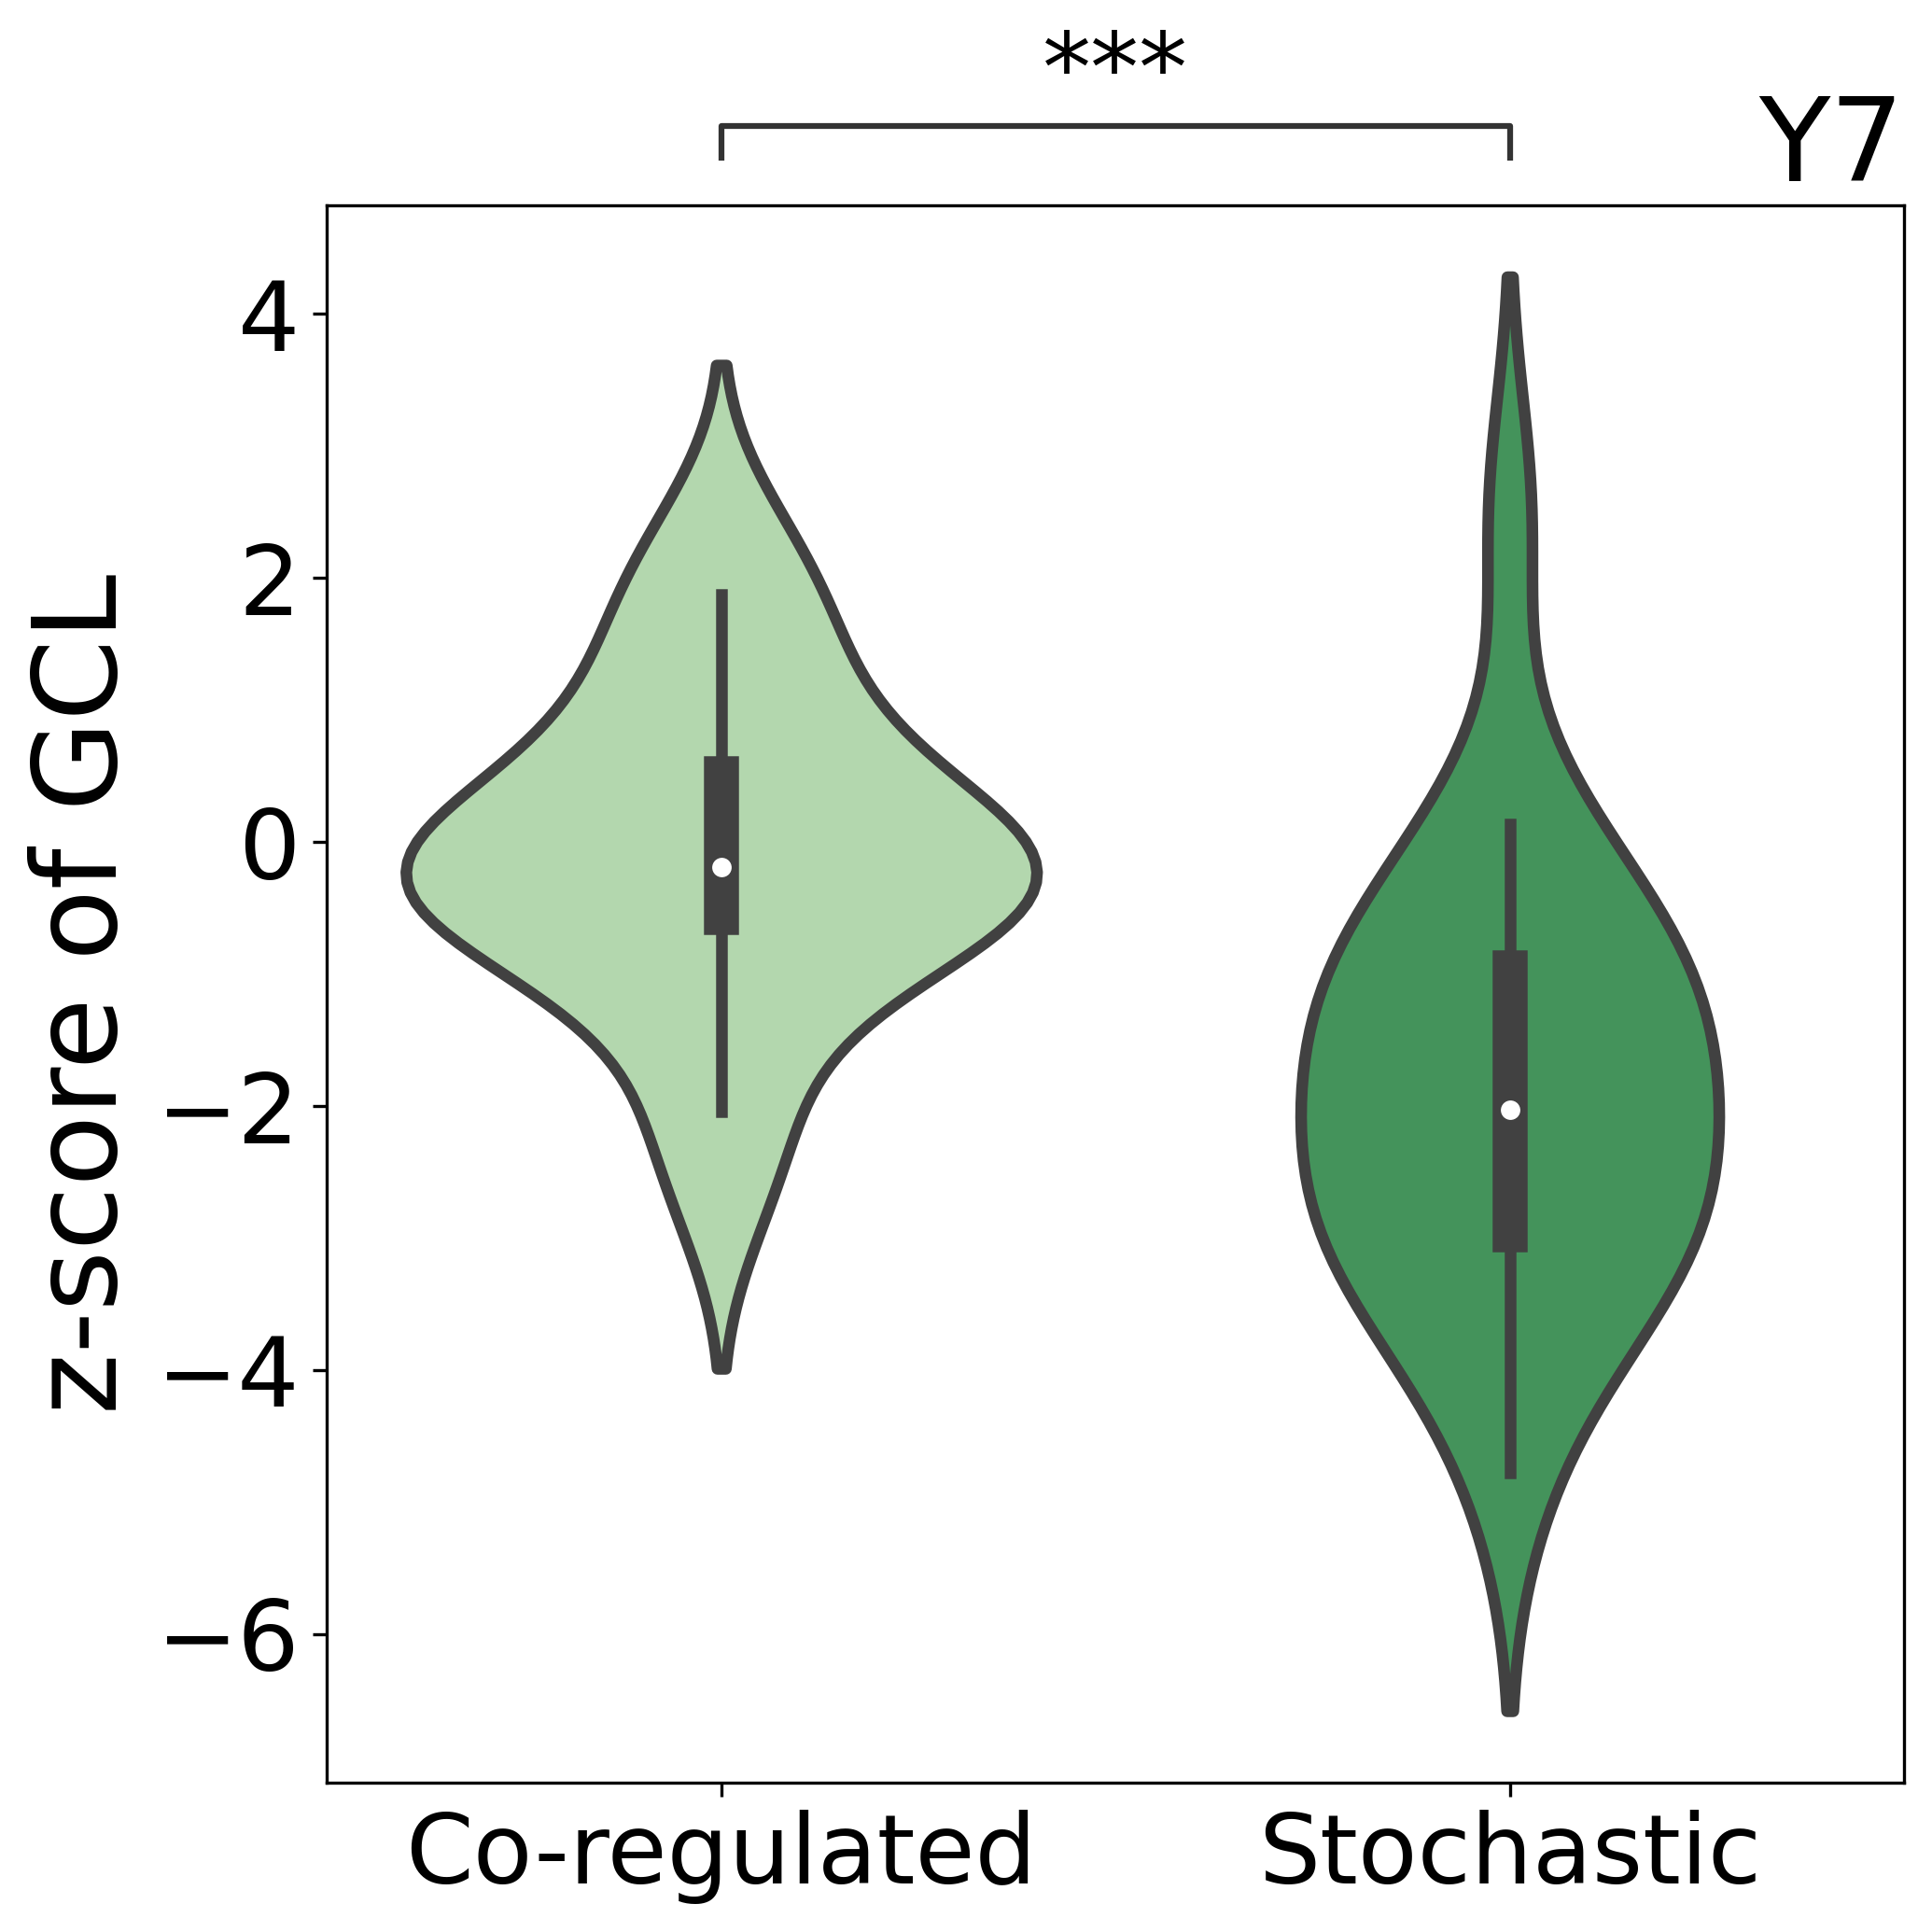

Y8
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


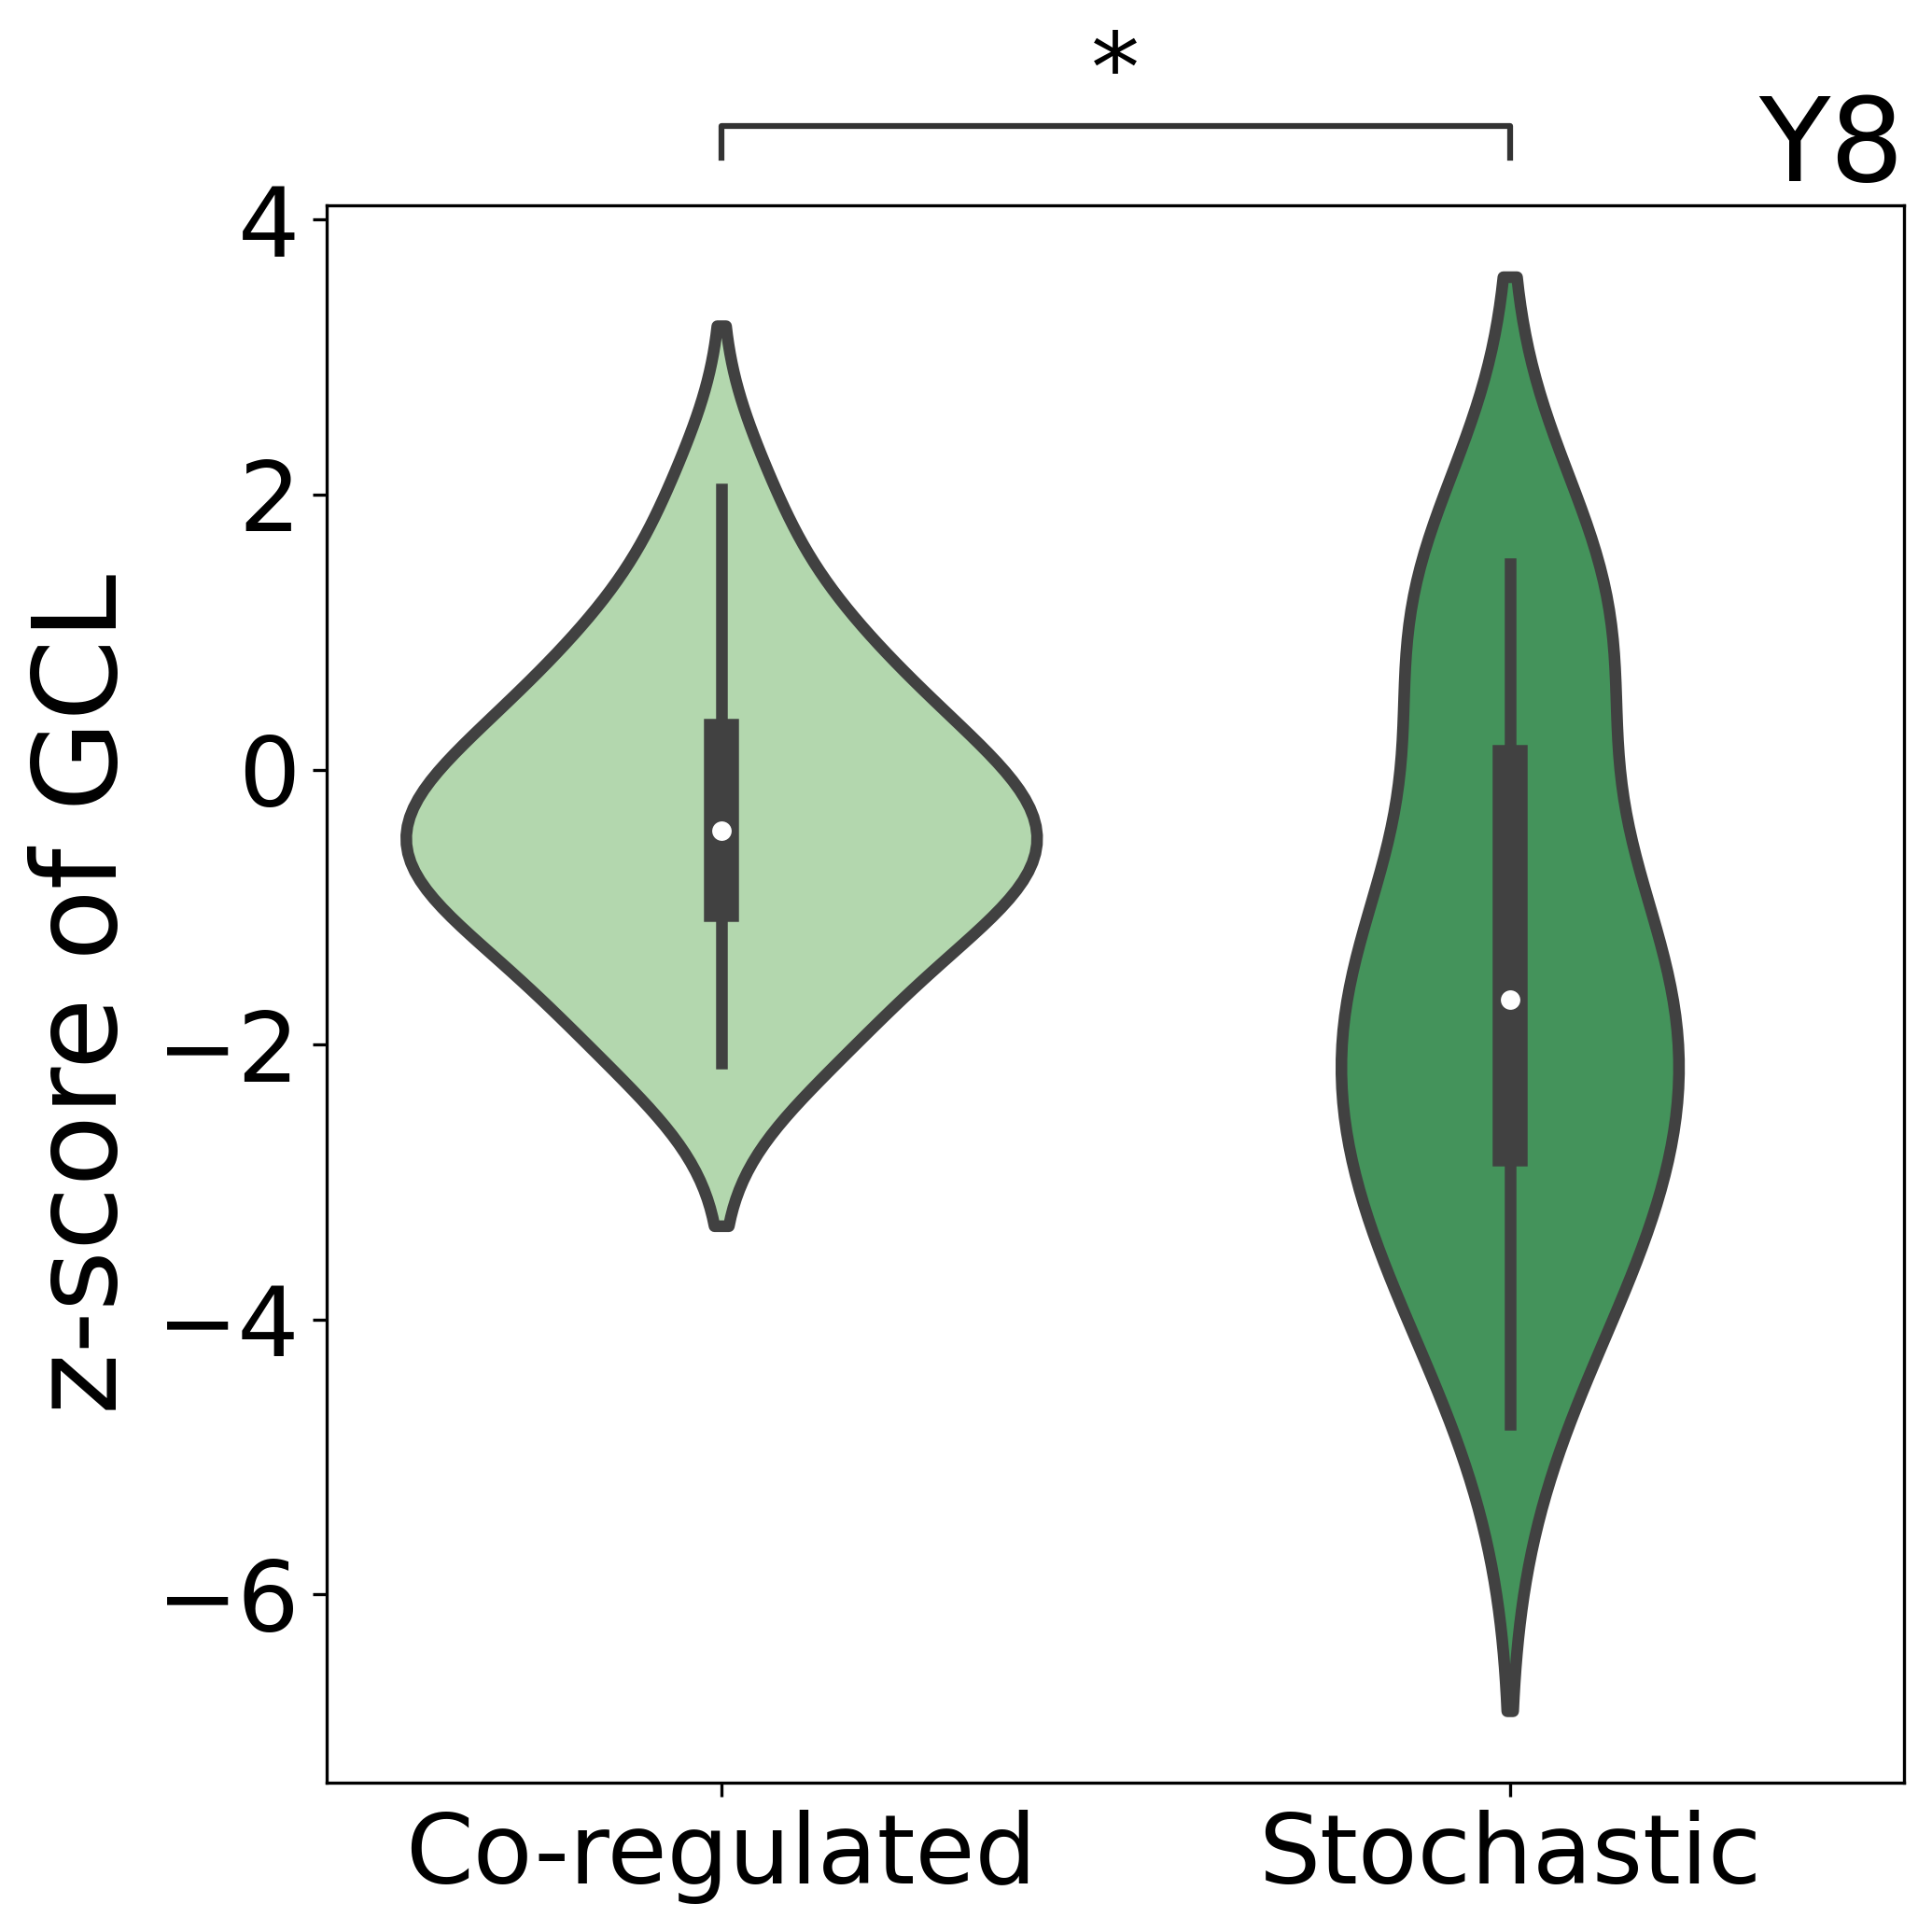

O1
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


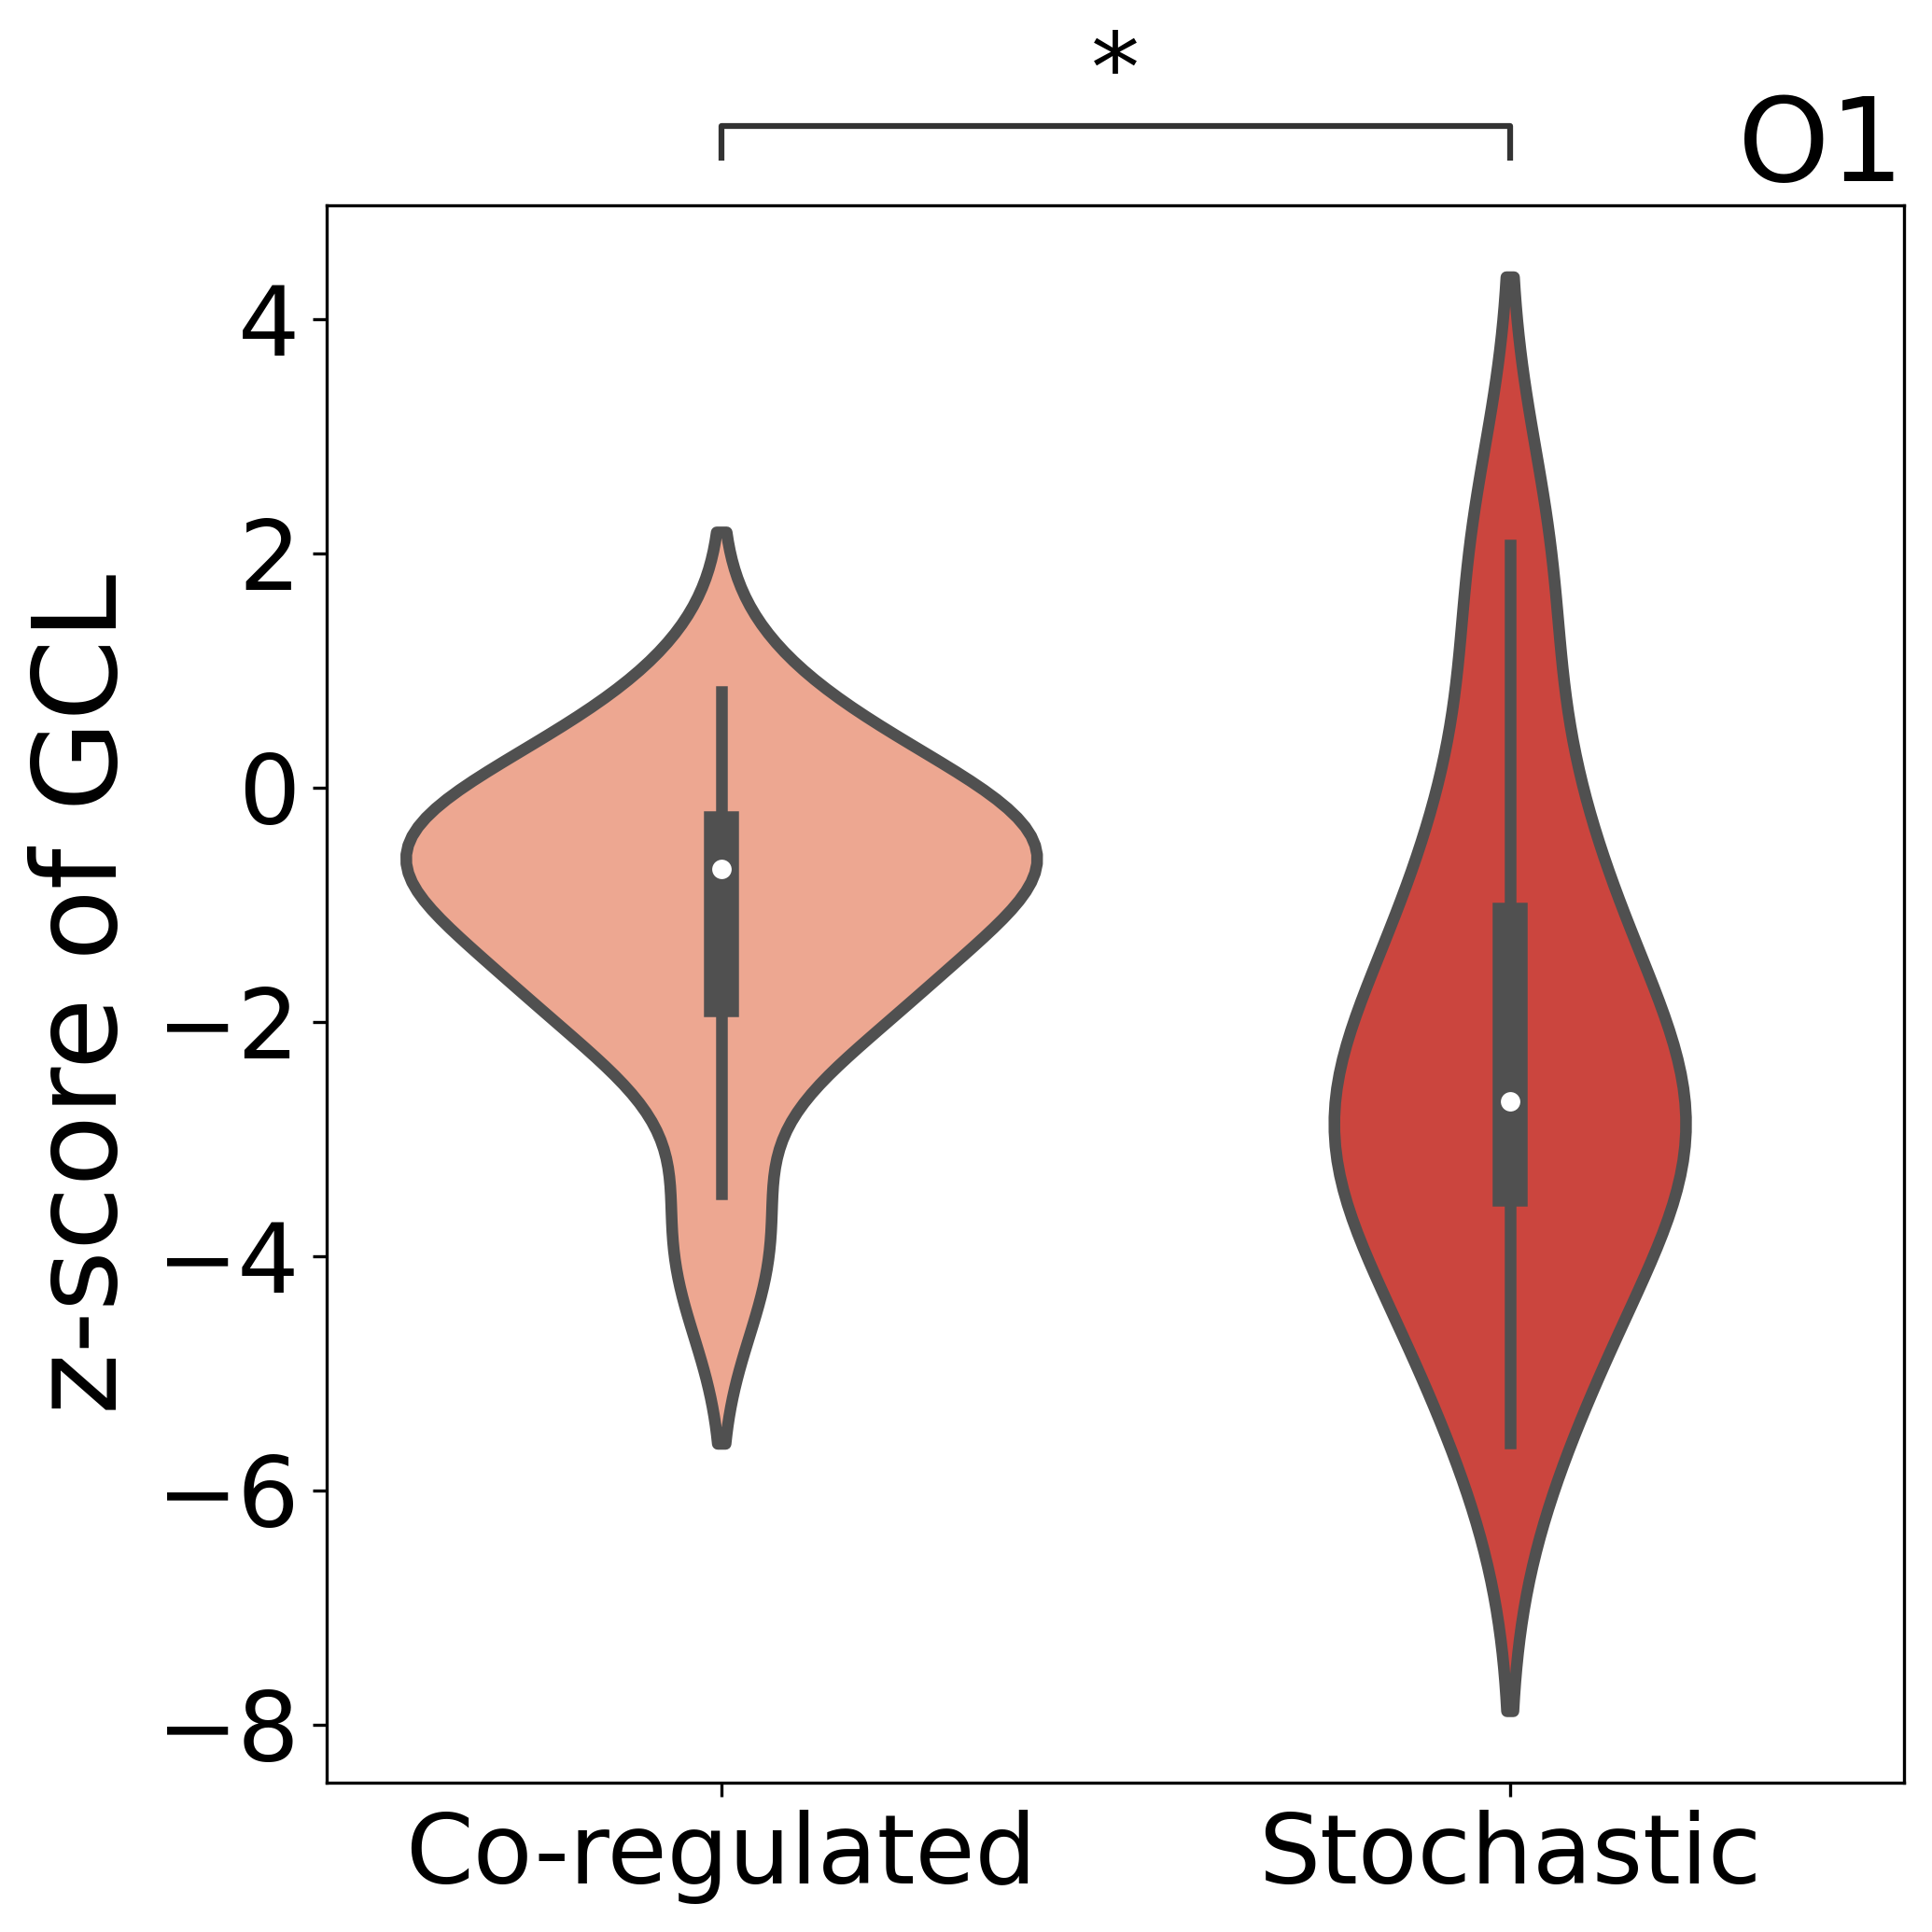

O5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


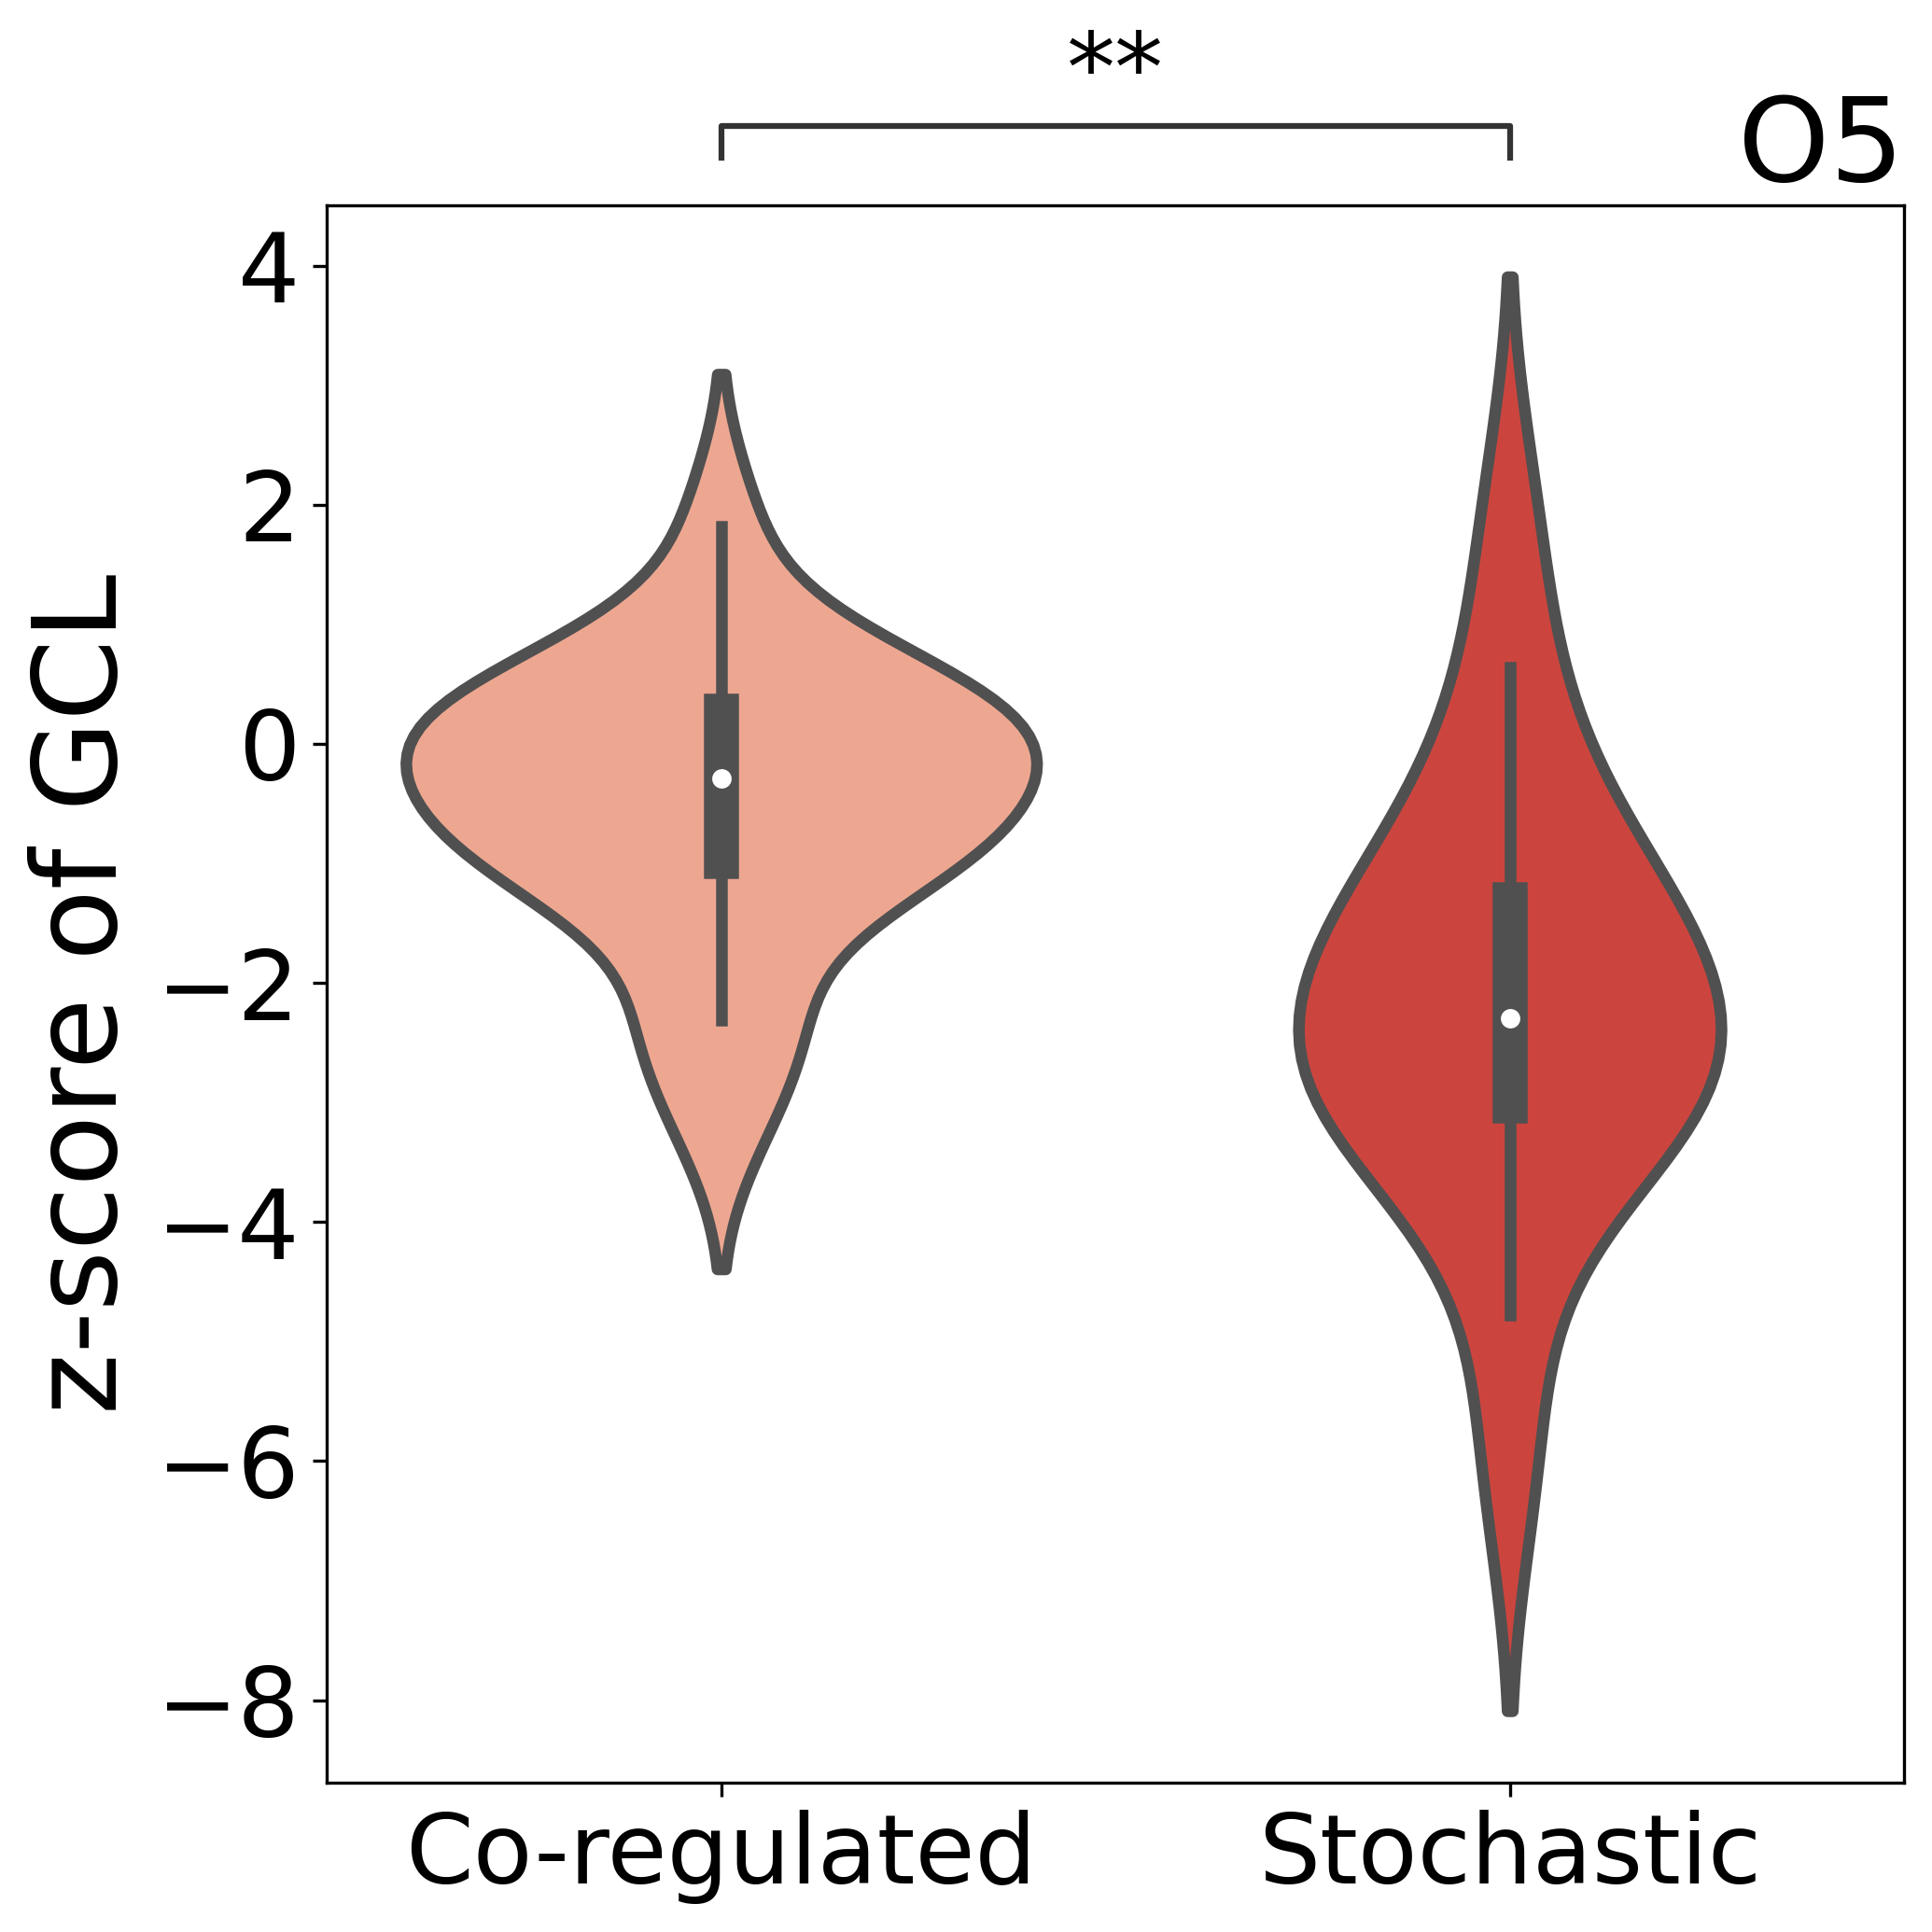

Y4
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


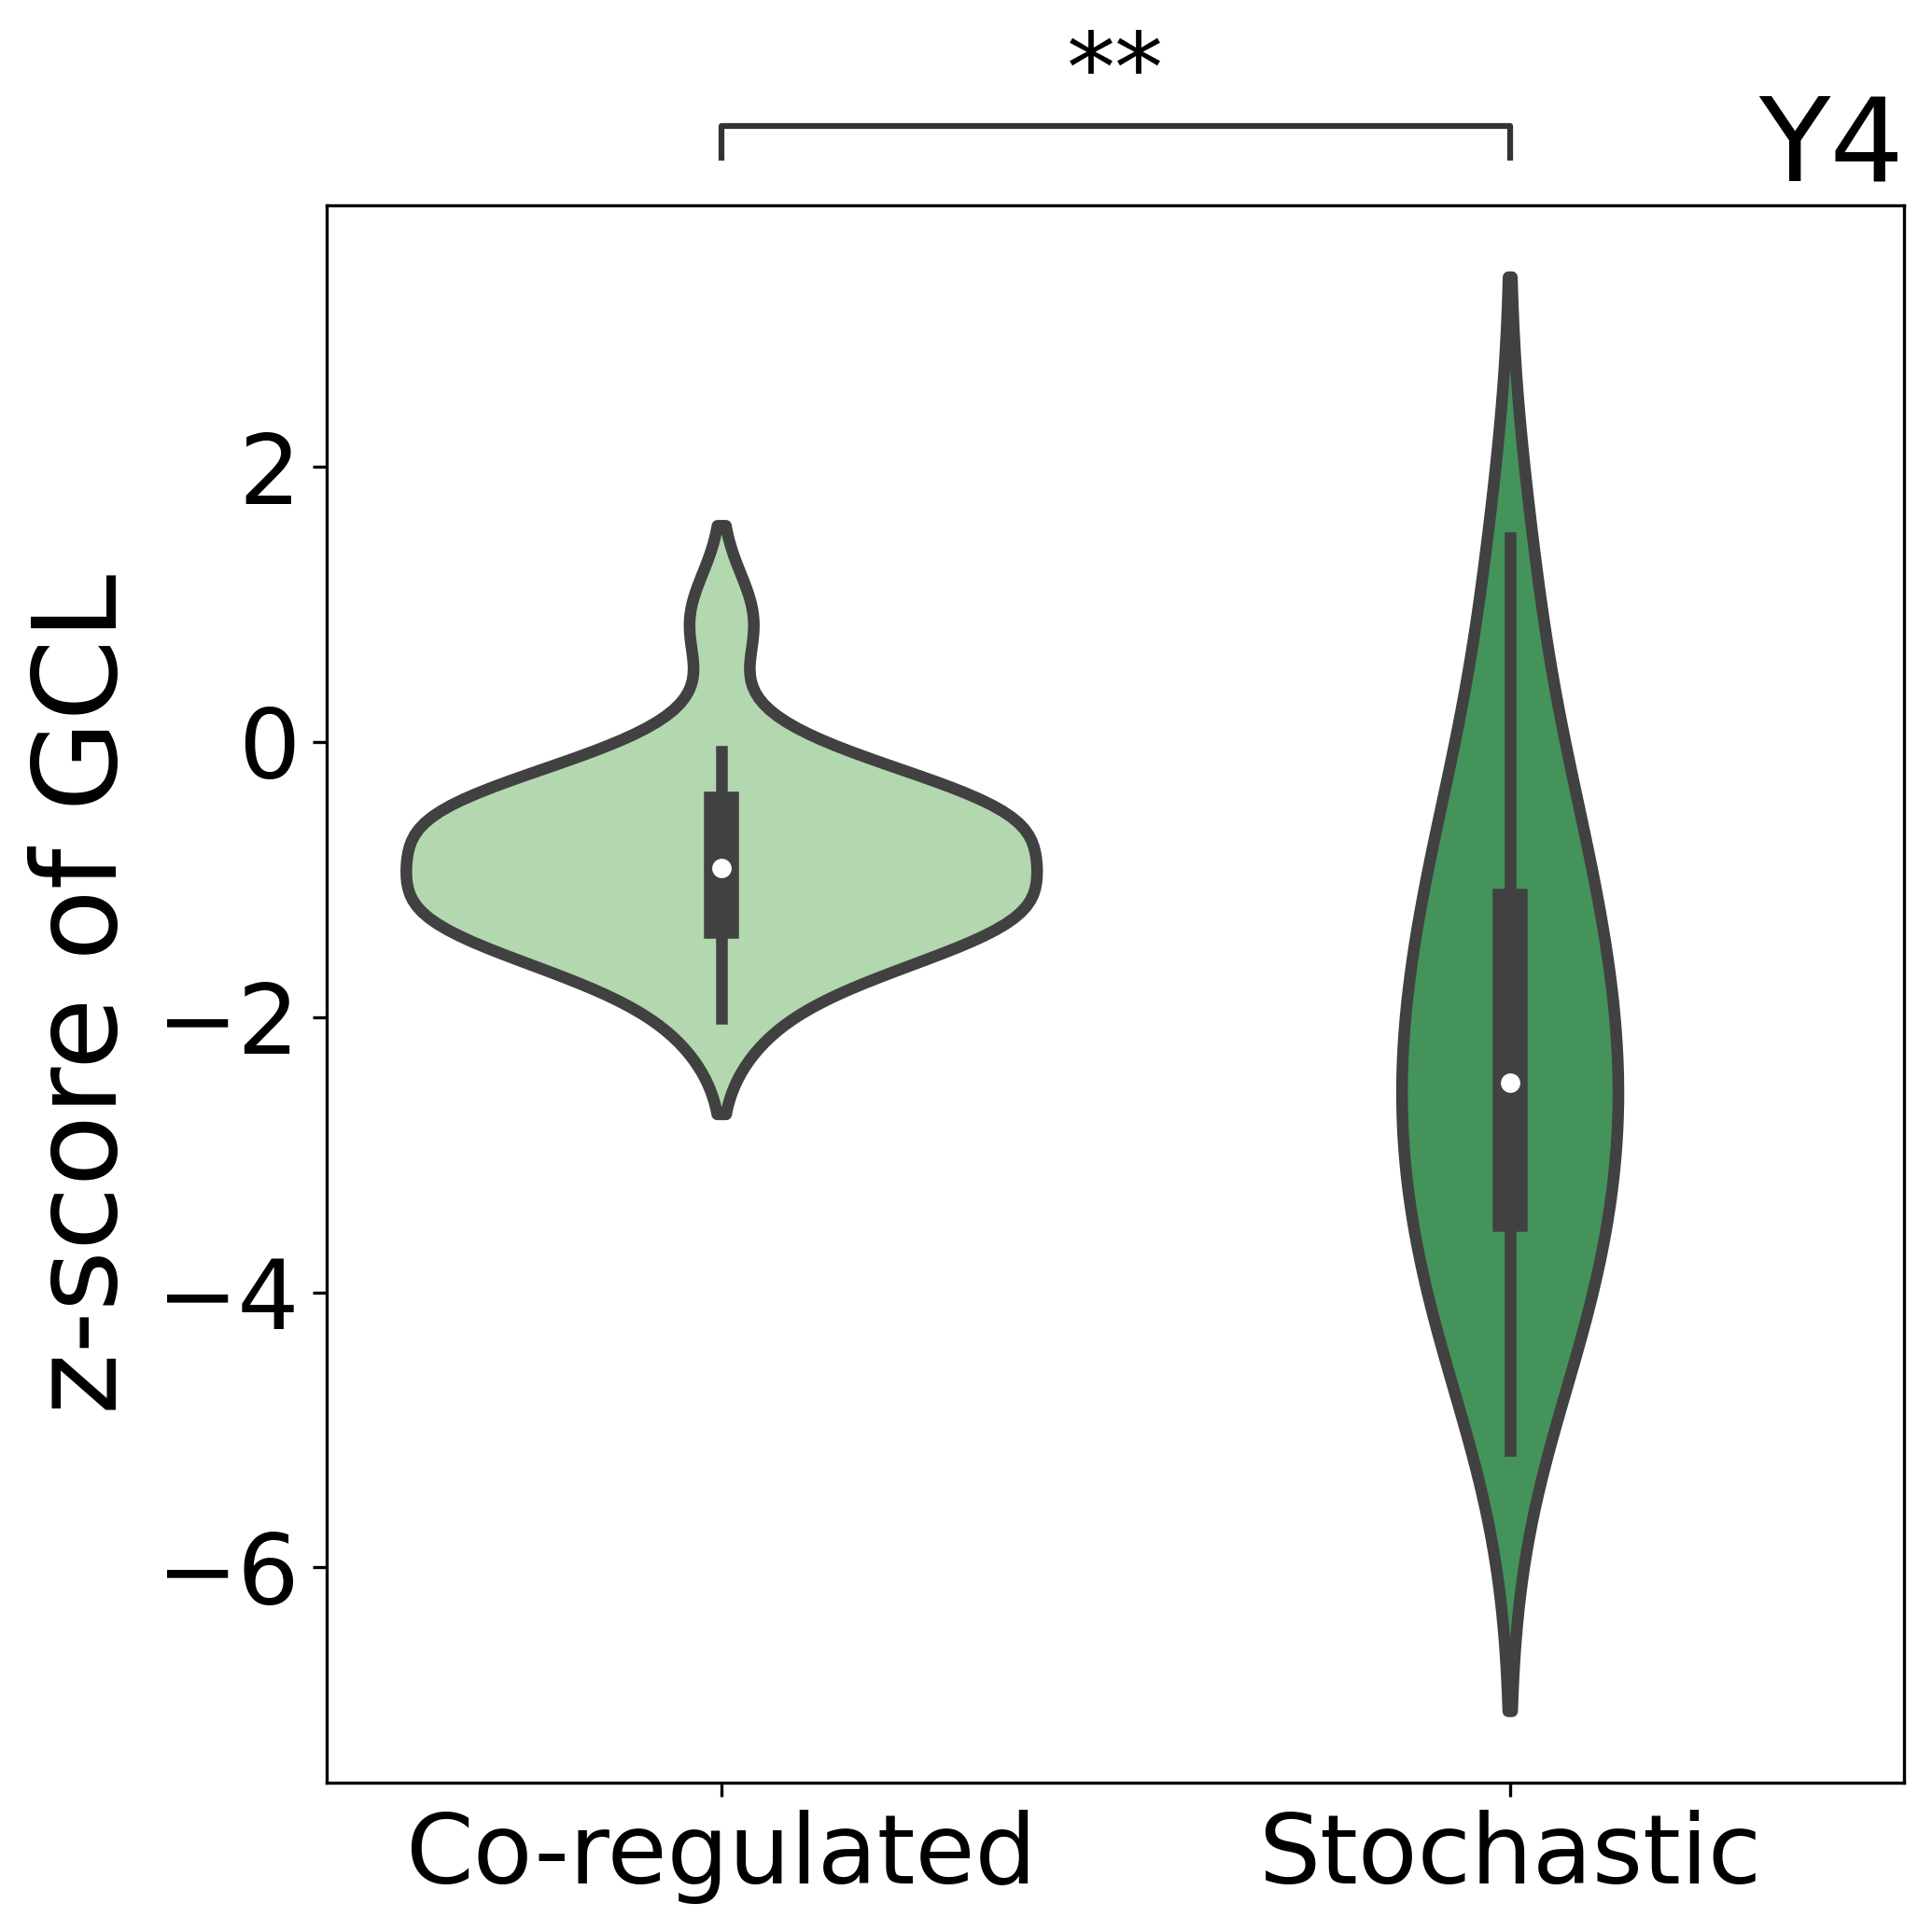

Y5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


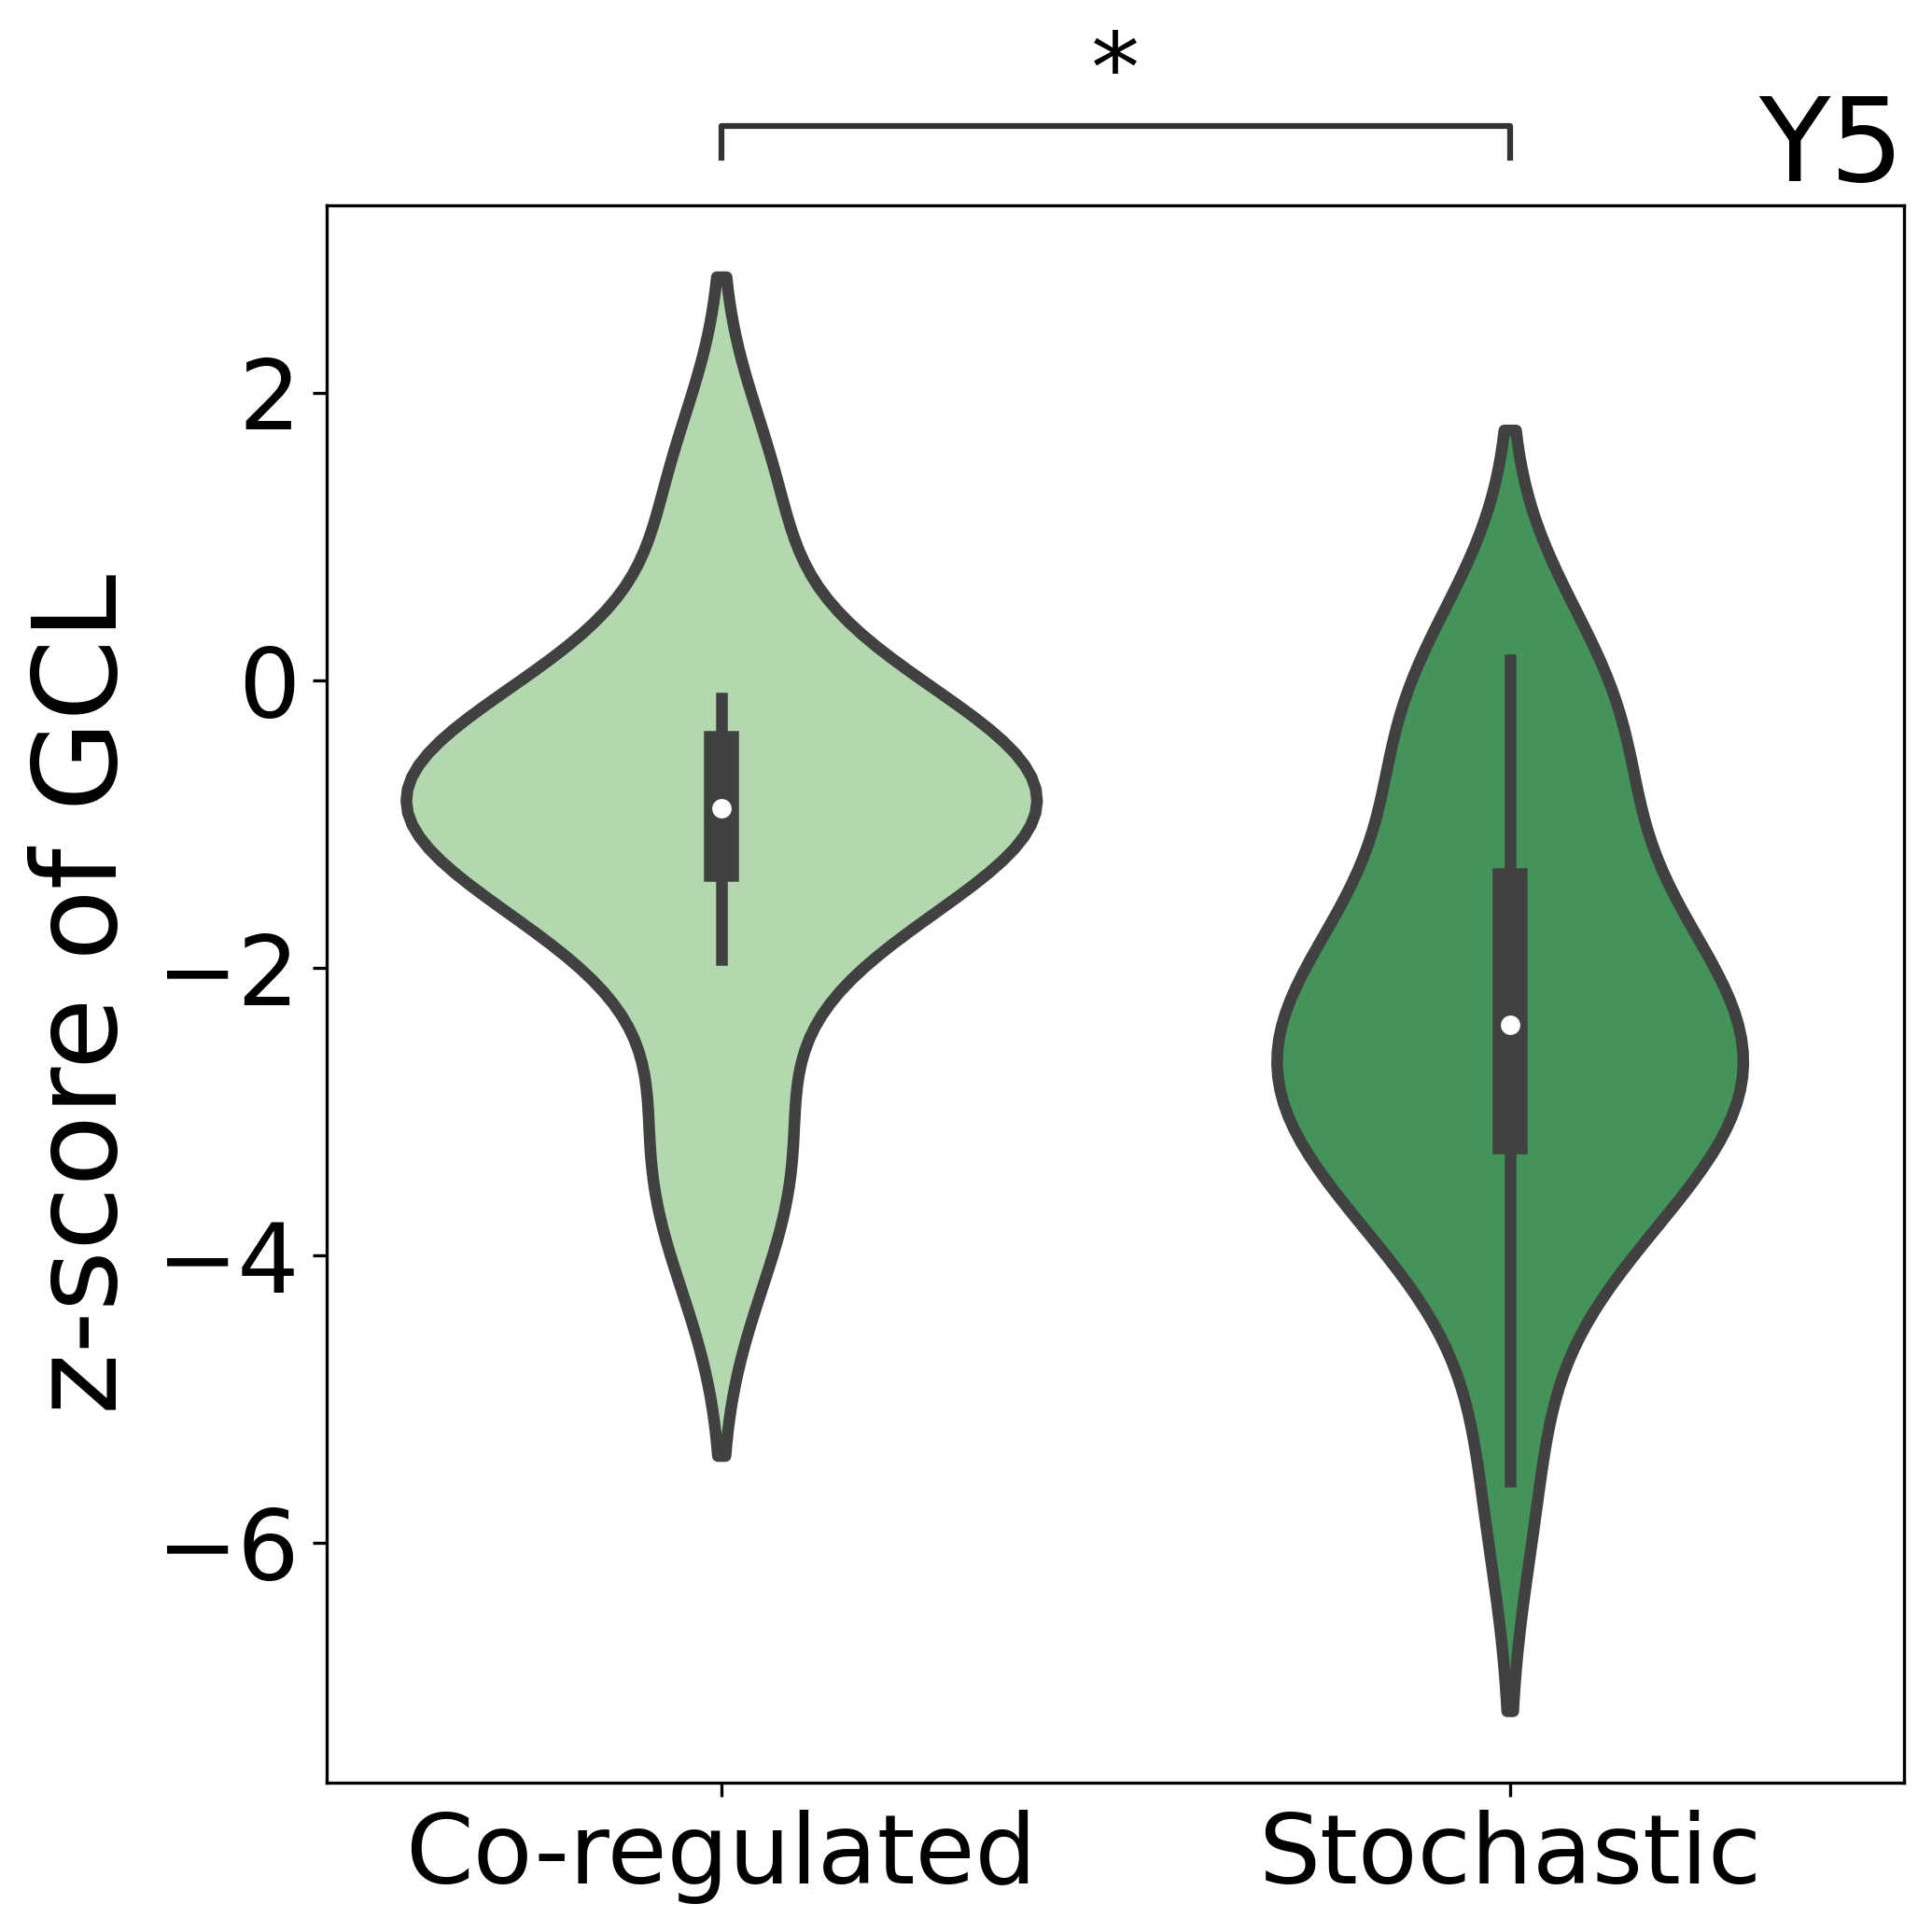

Y7
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


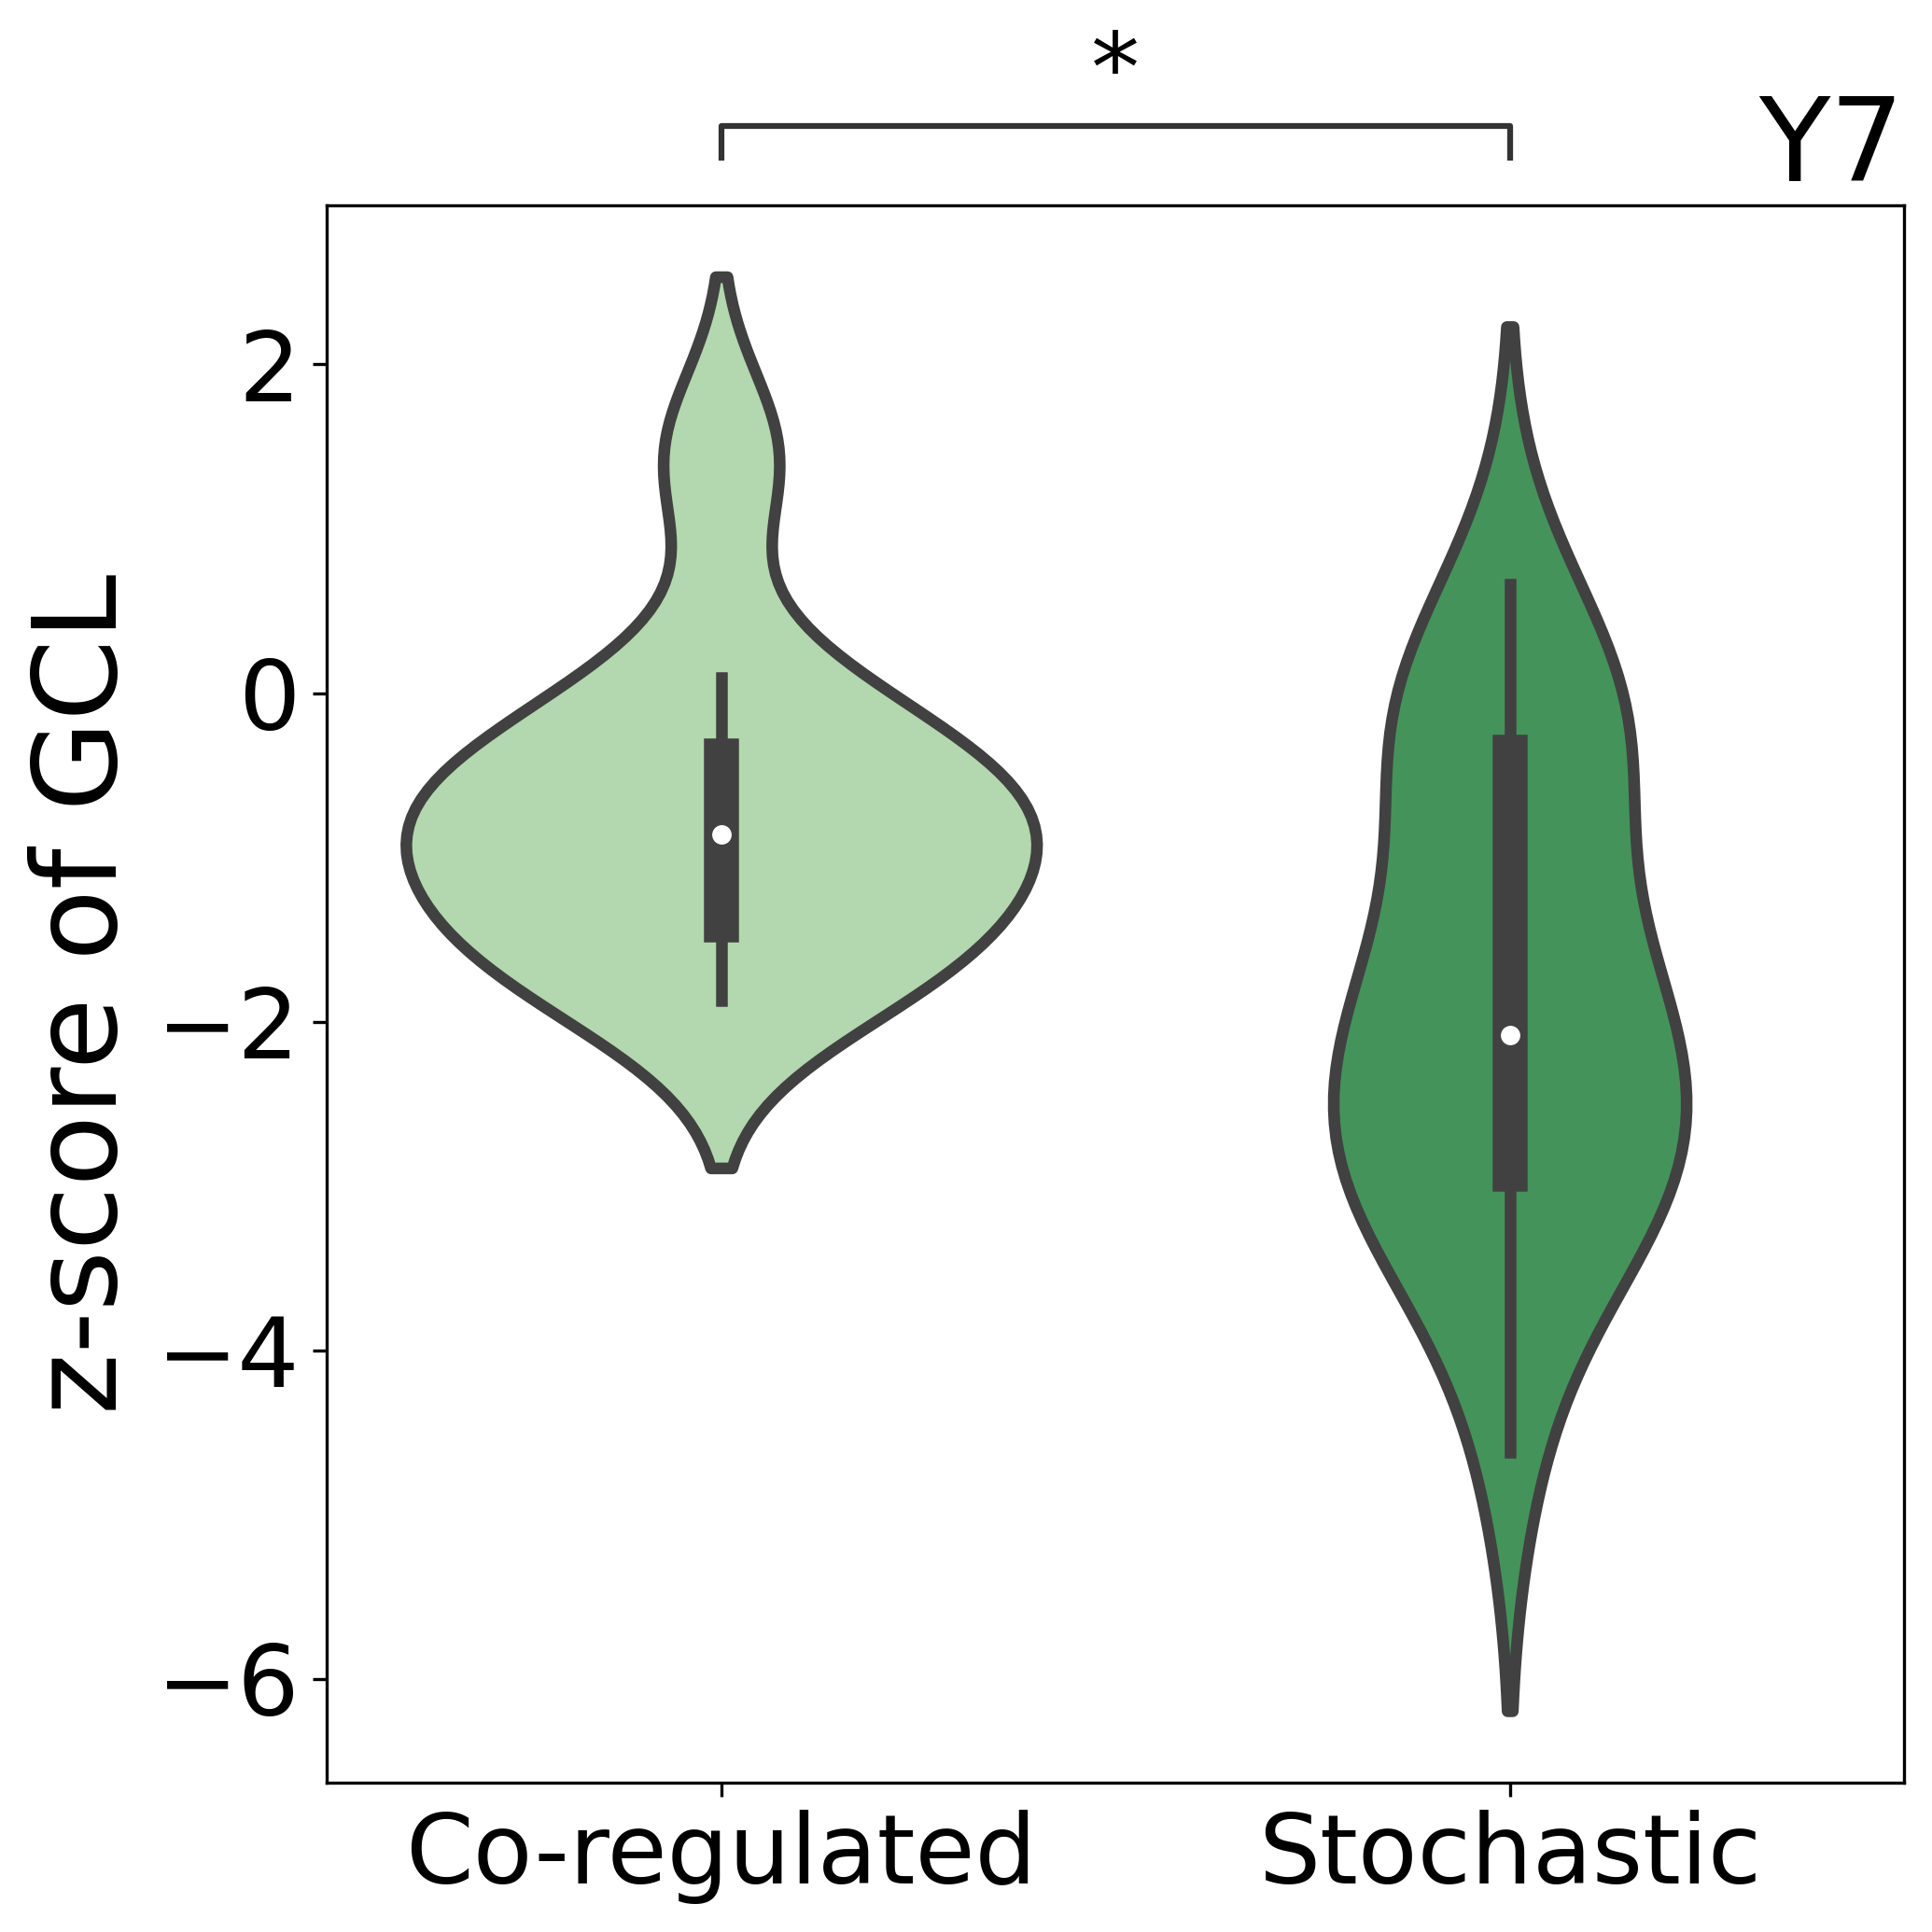

Y8
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


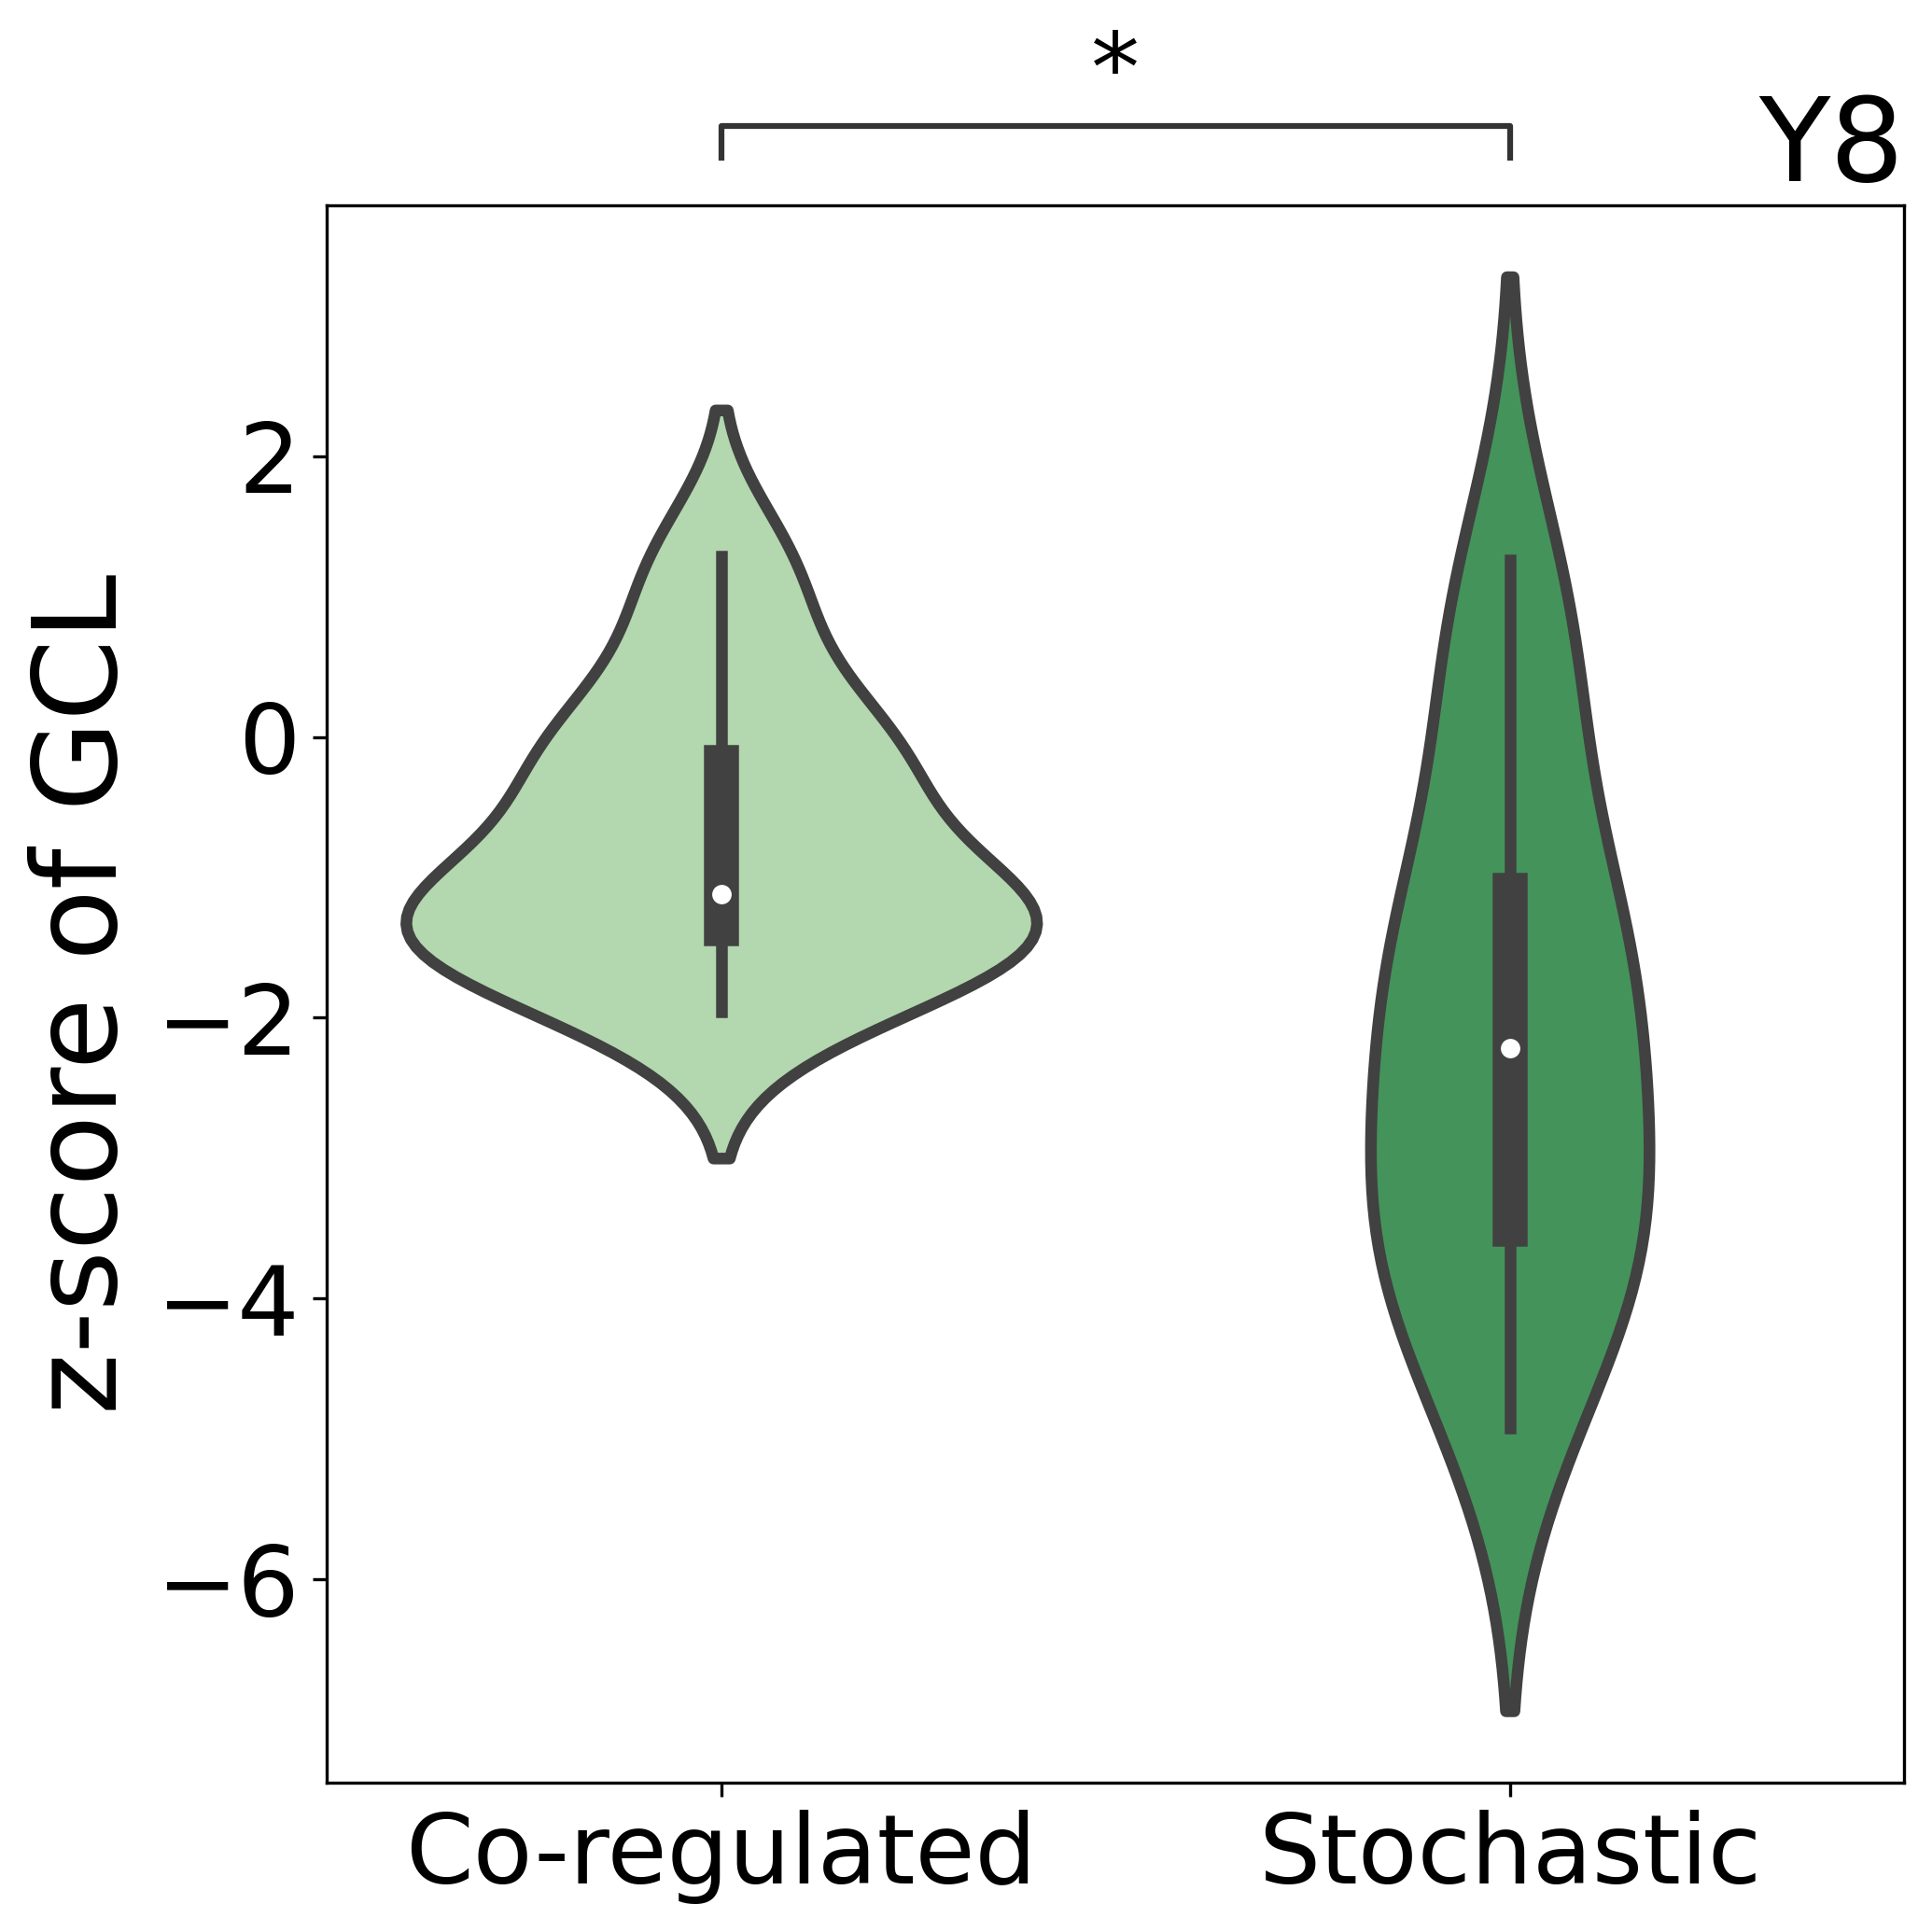

O1
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


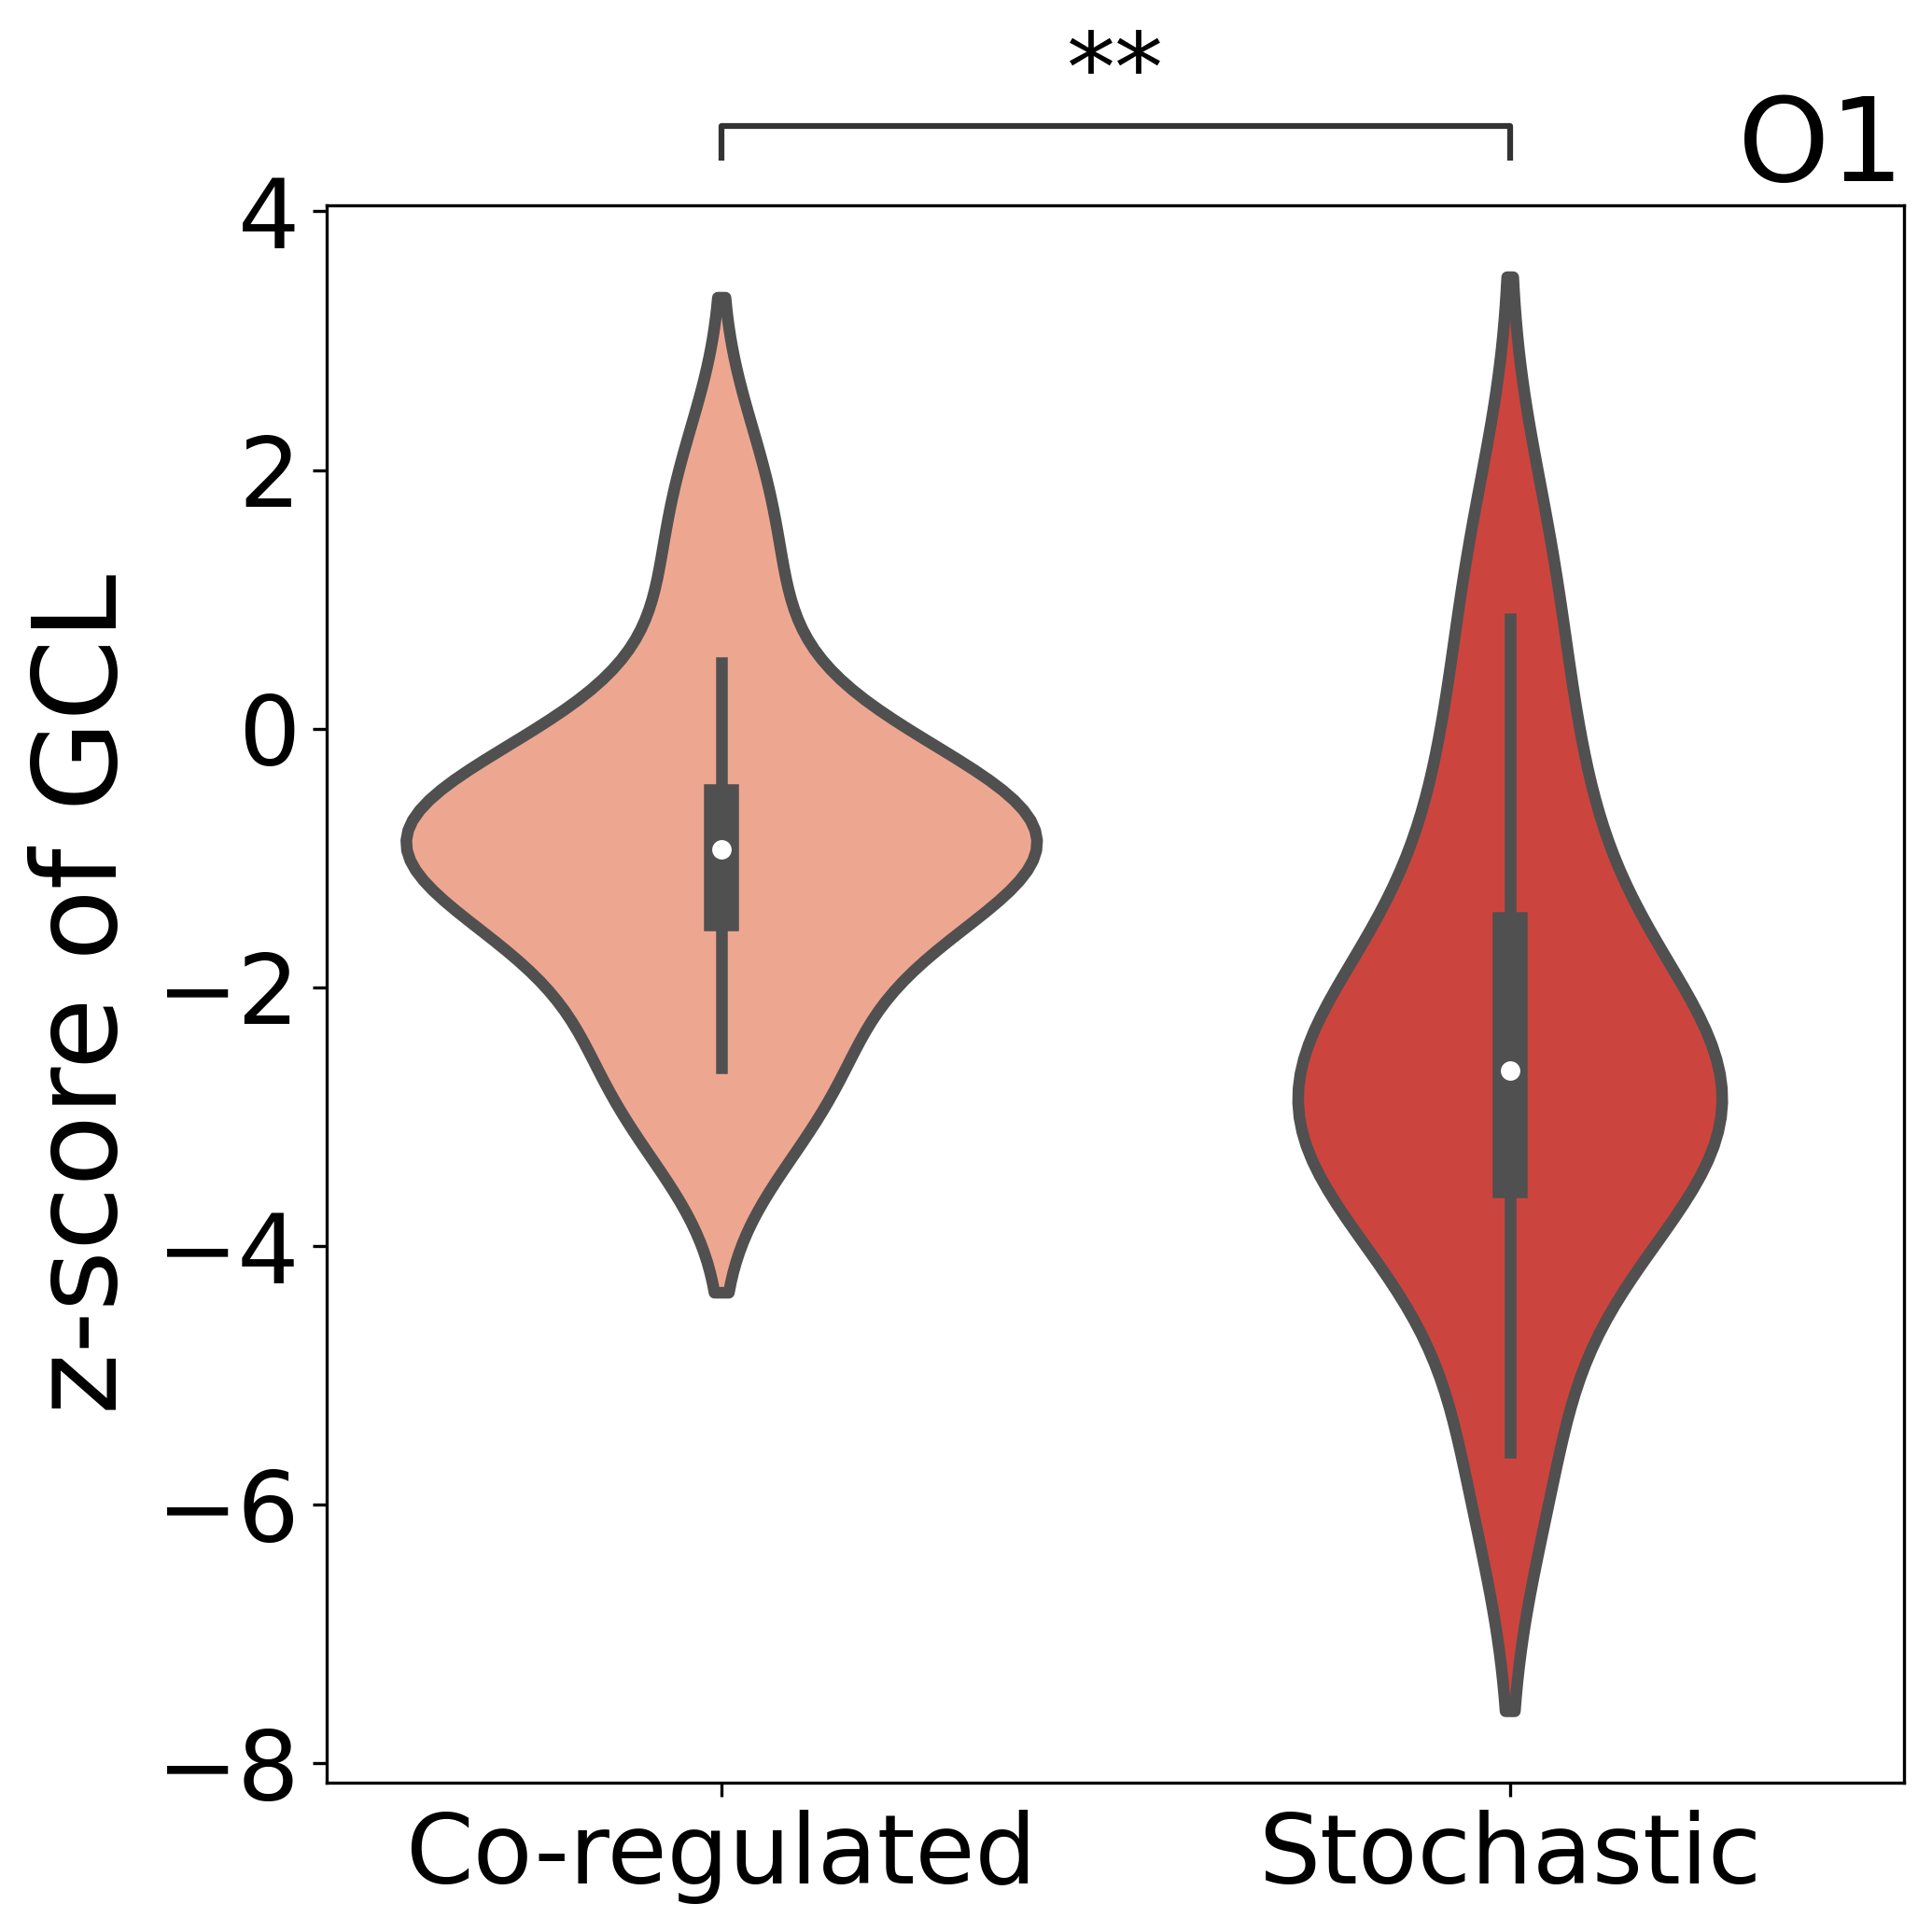

O5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


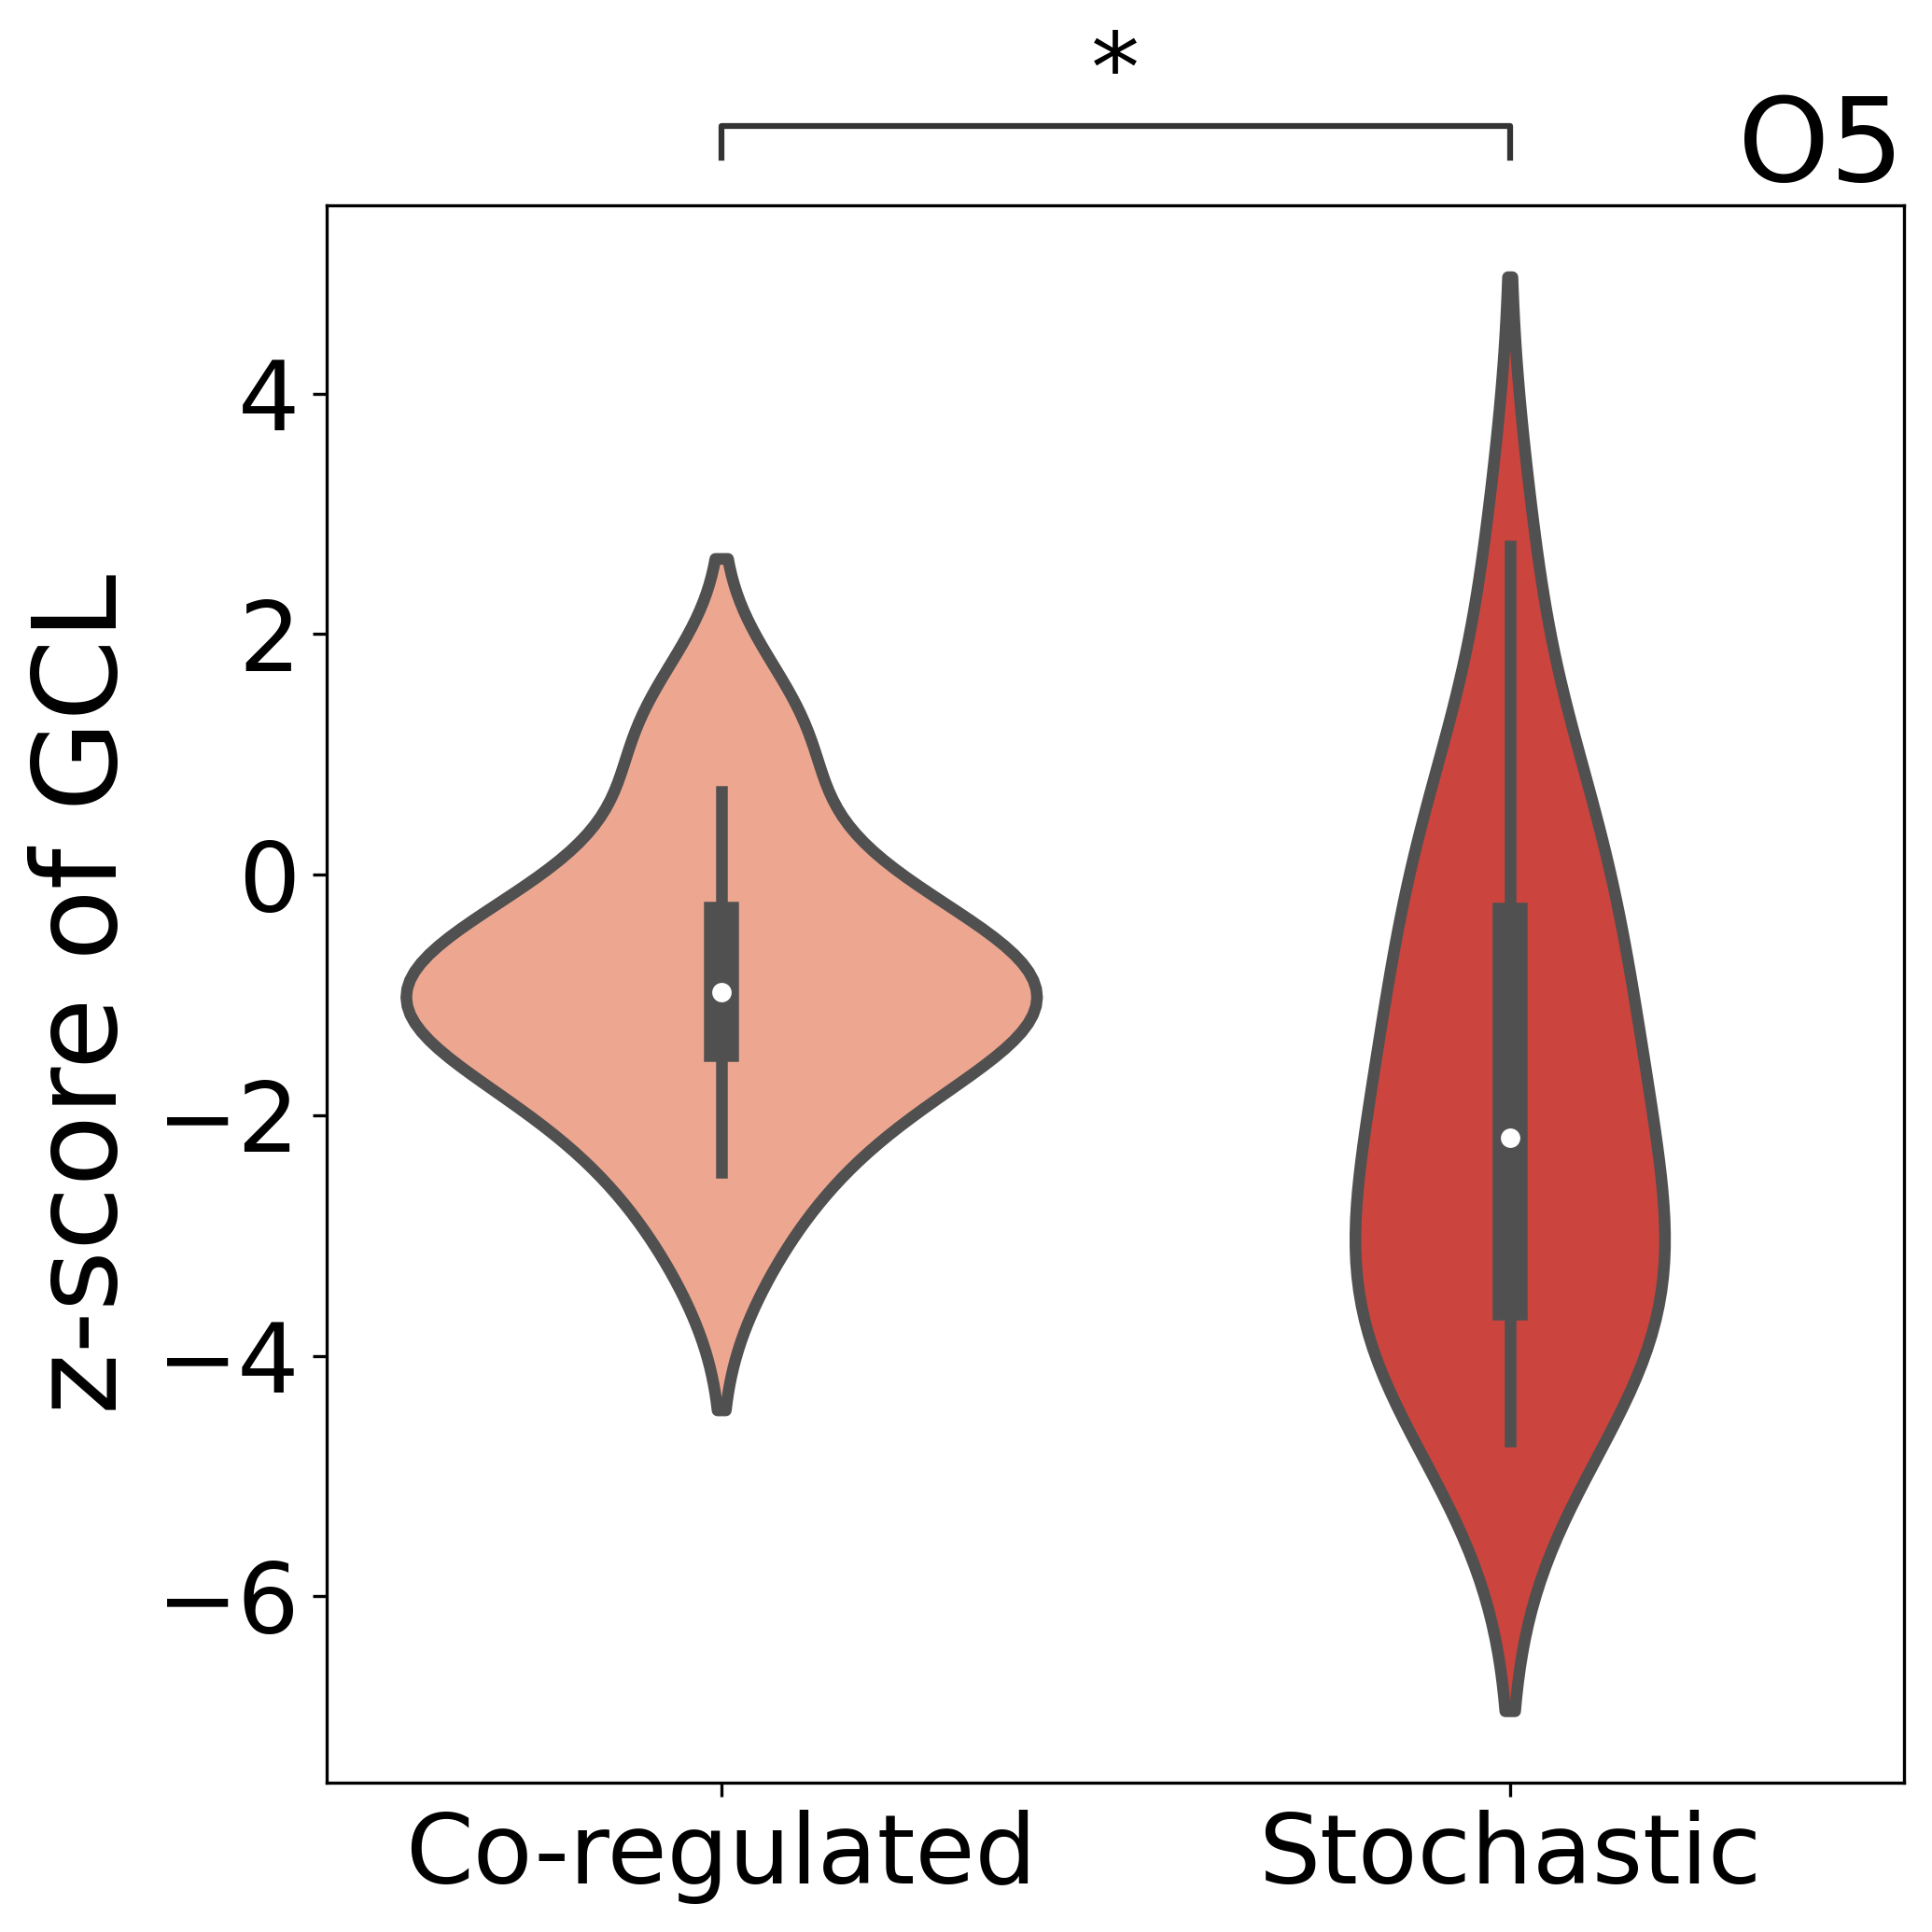

Y4
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


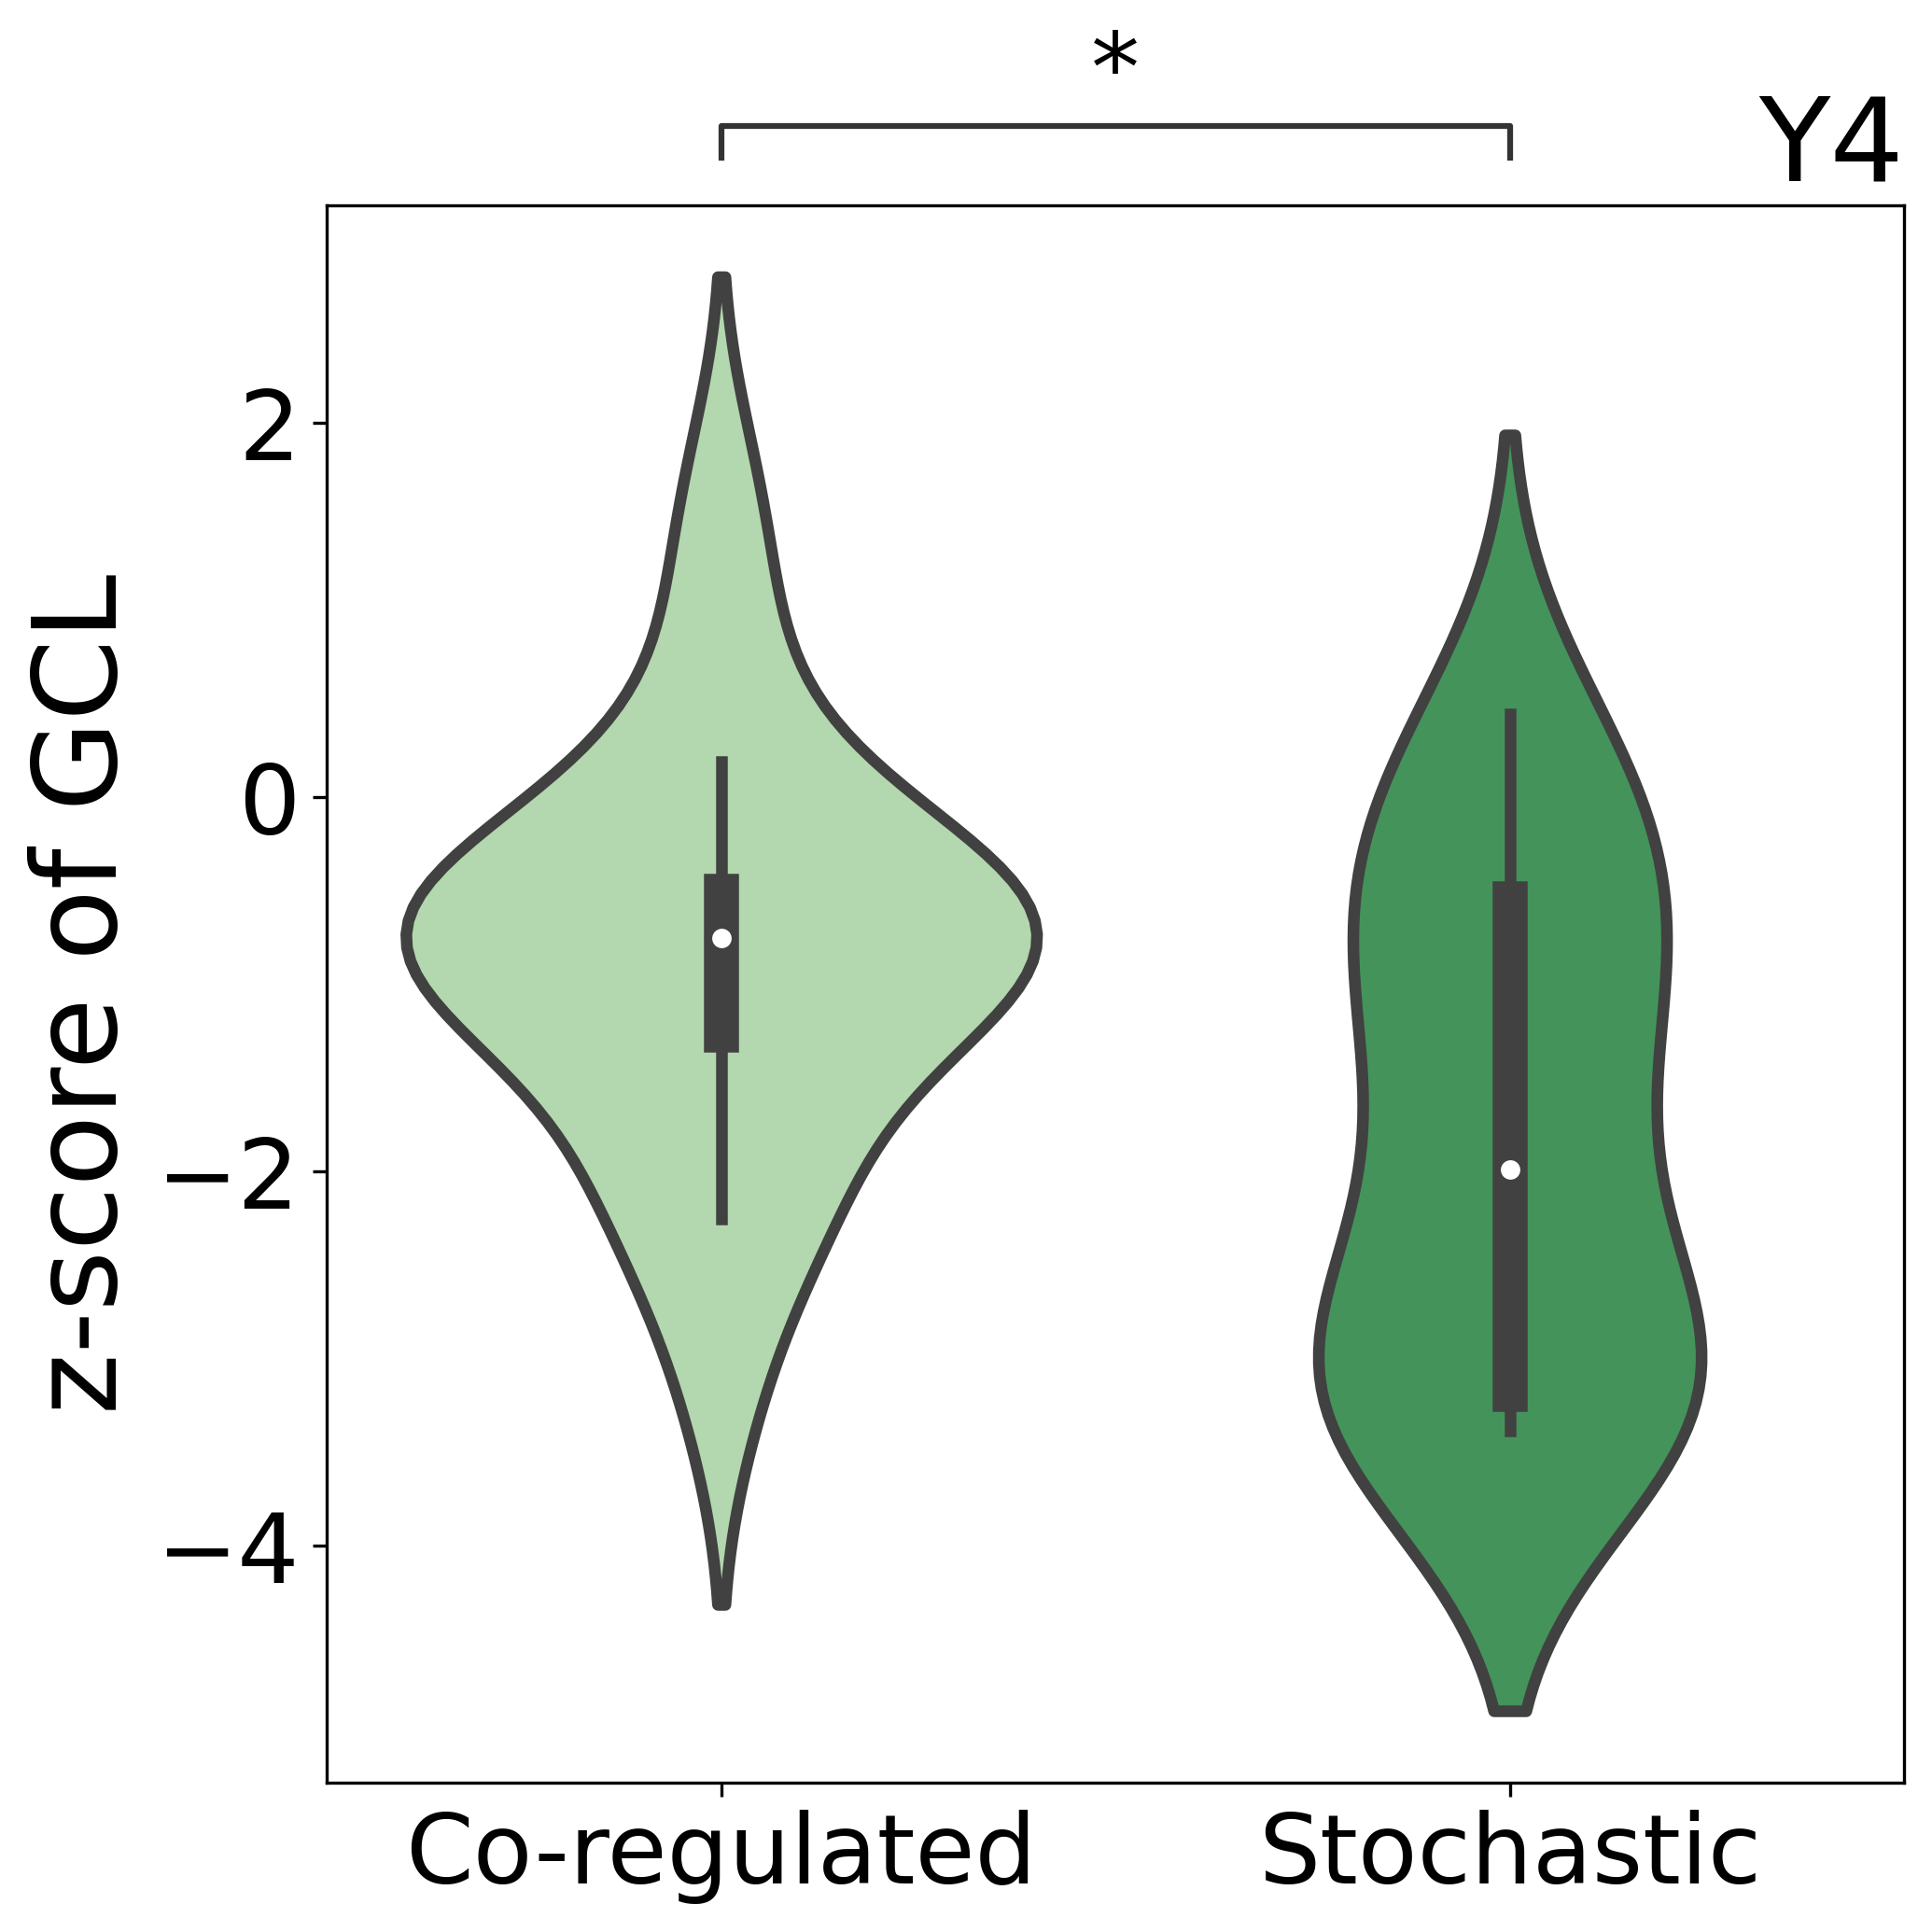

Y5
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


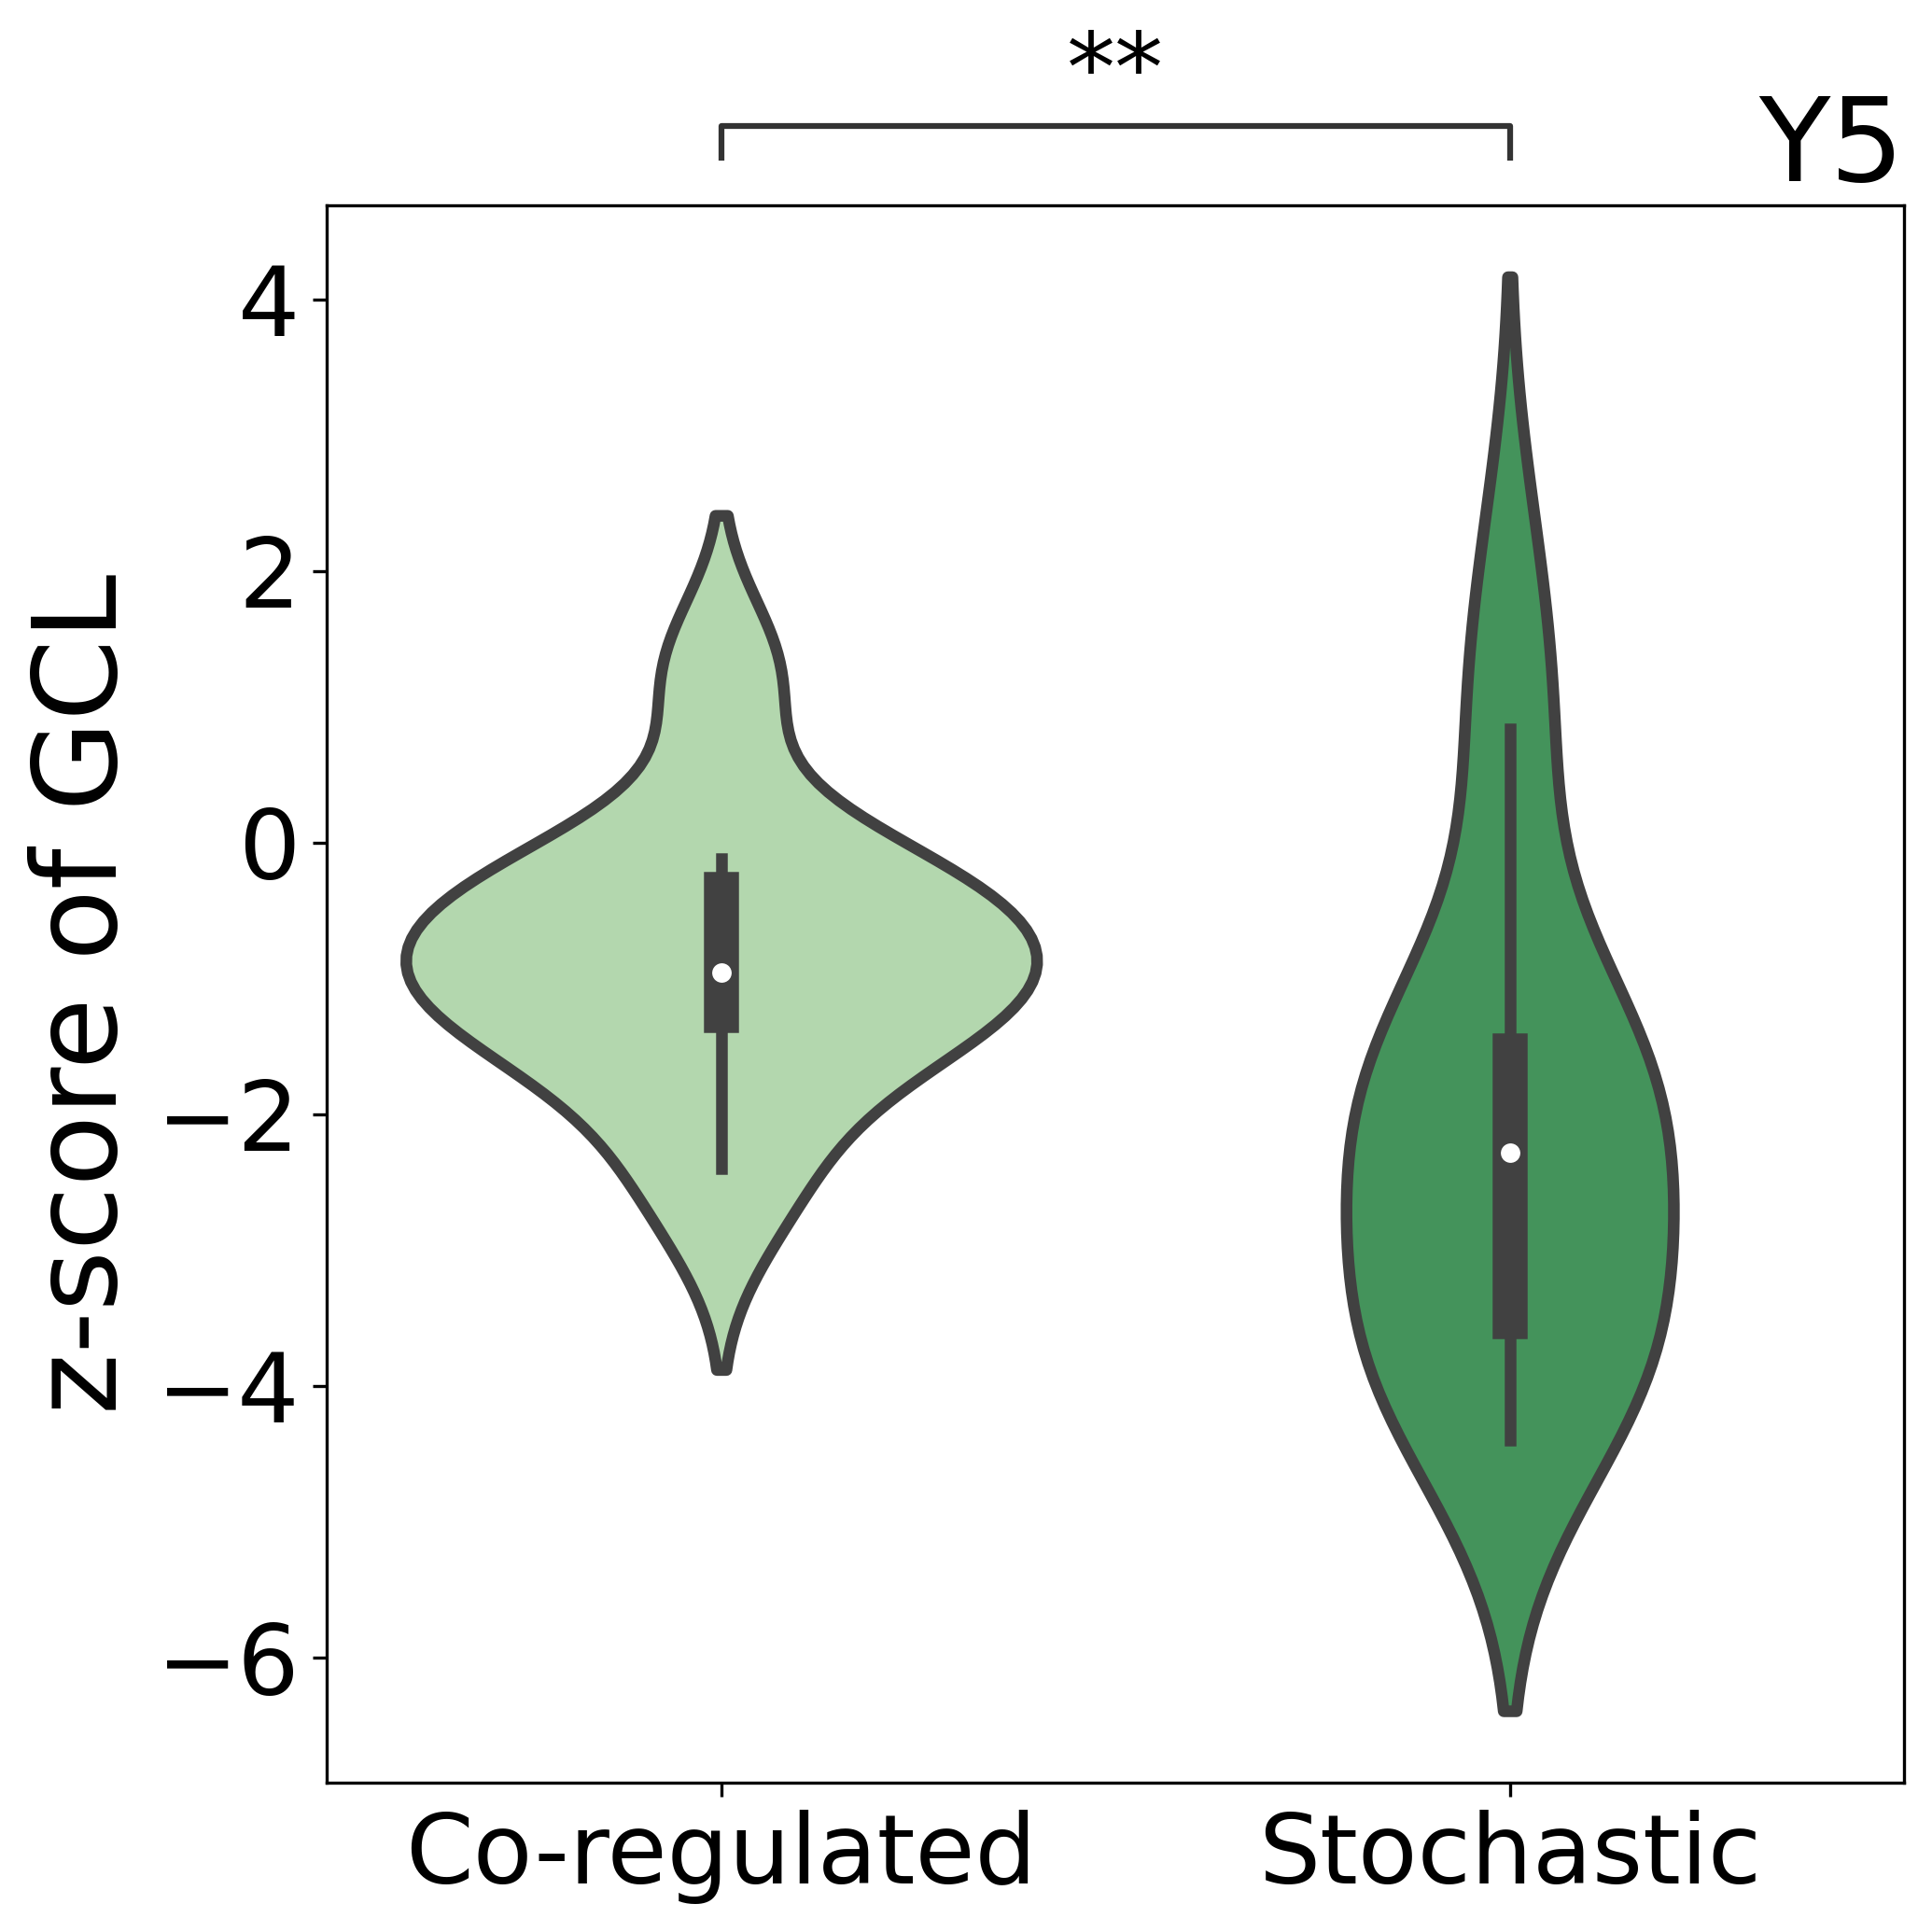

Y7
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


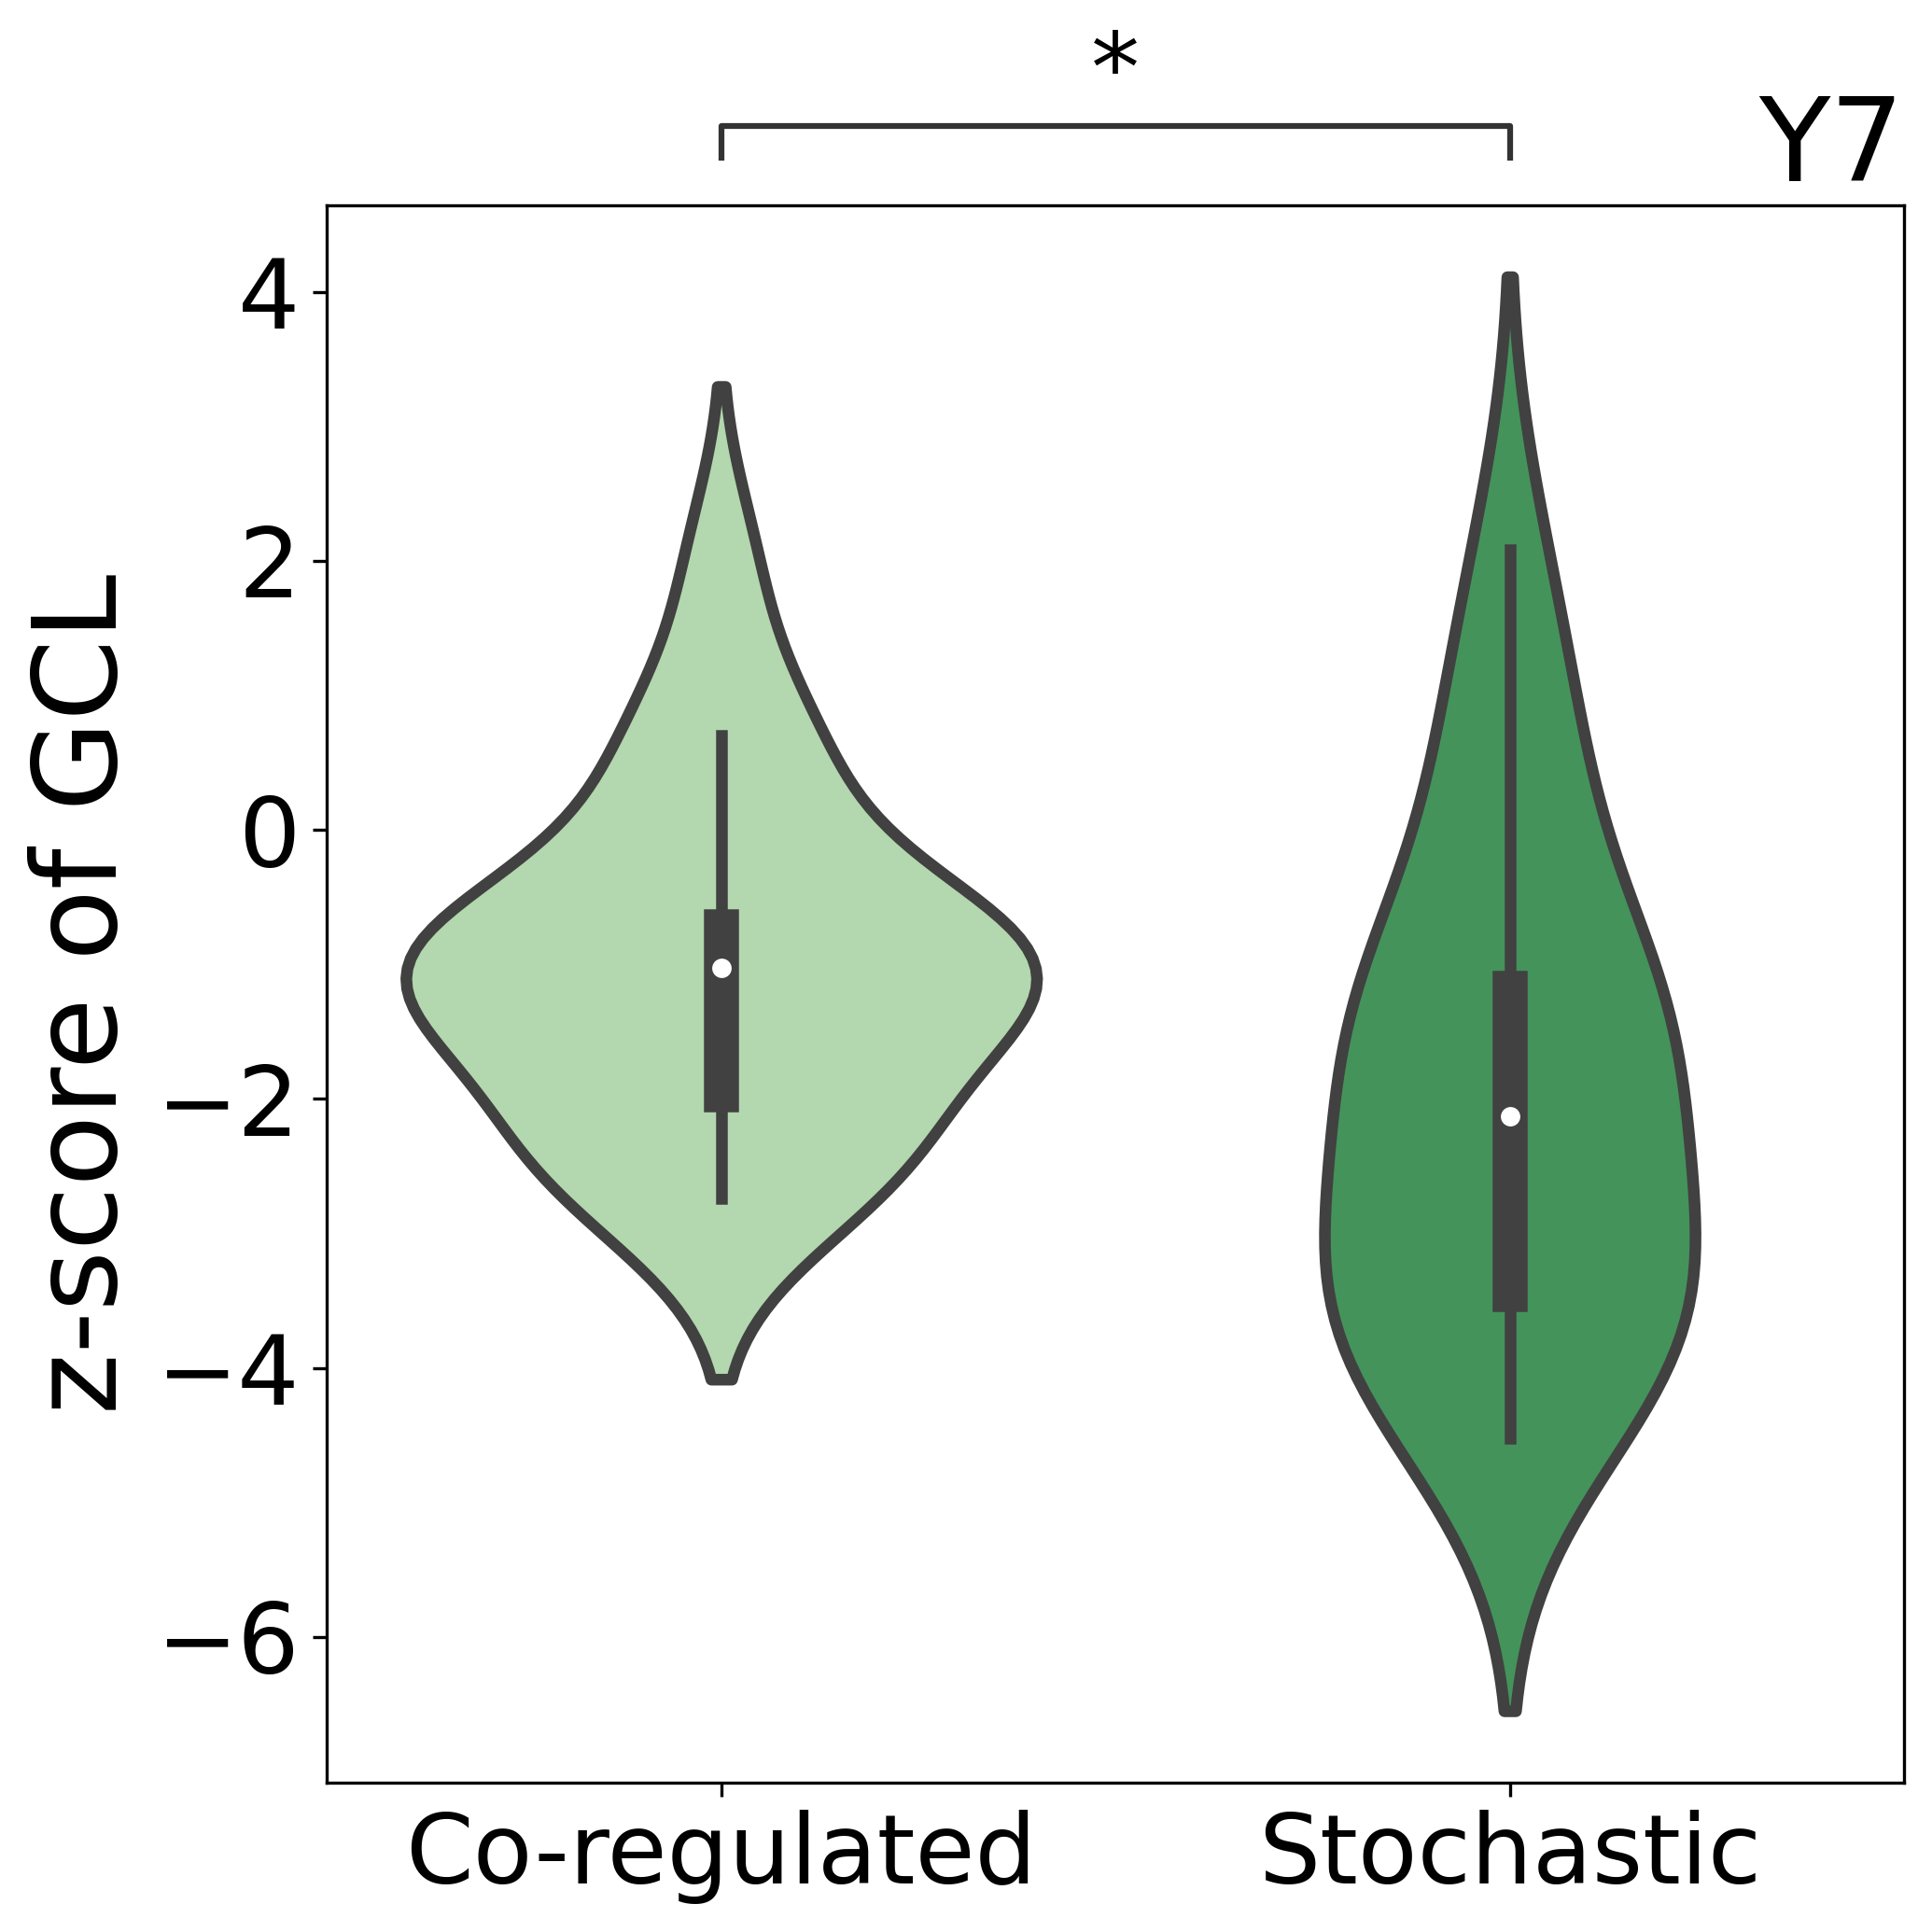

Y8
Co-regulated    20
Stochastic      20
Background      20
Name: Kind, dtype: int64


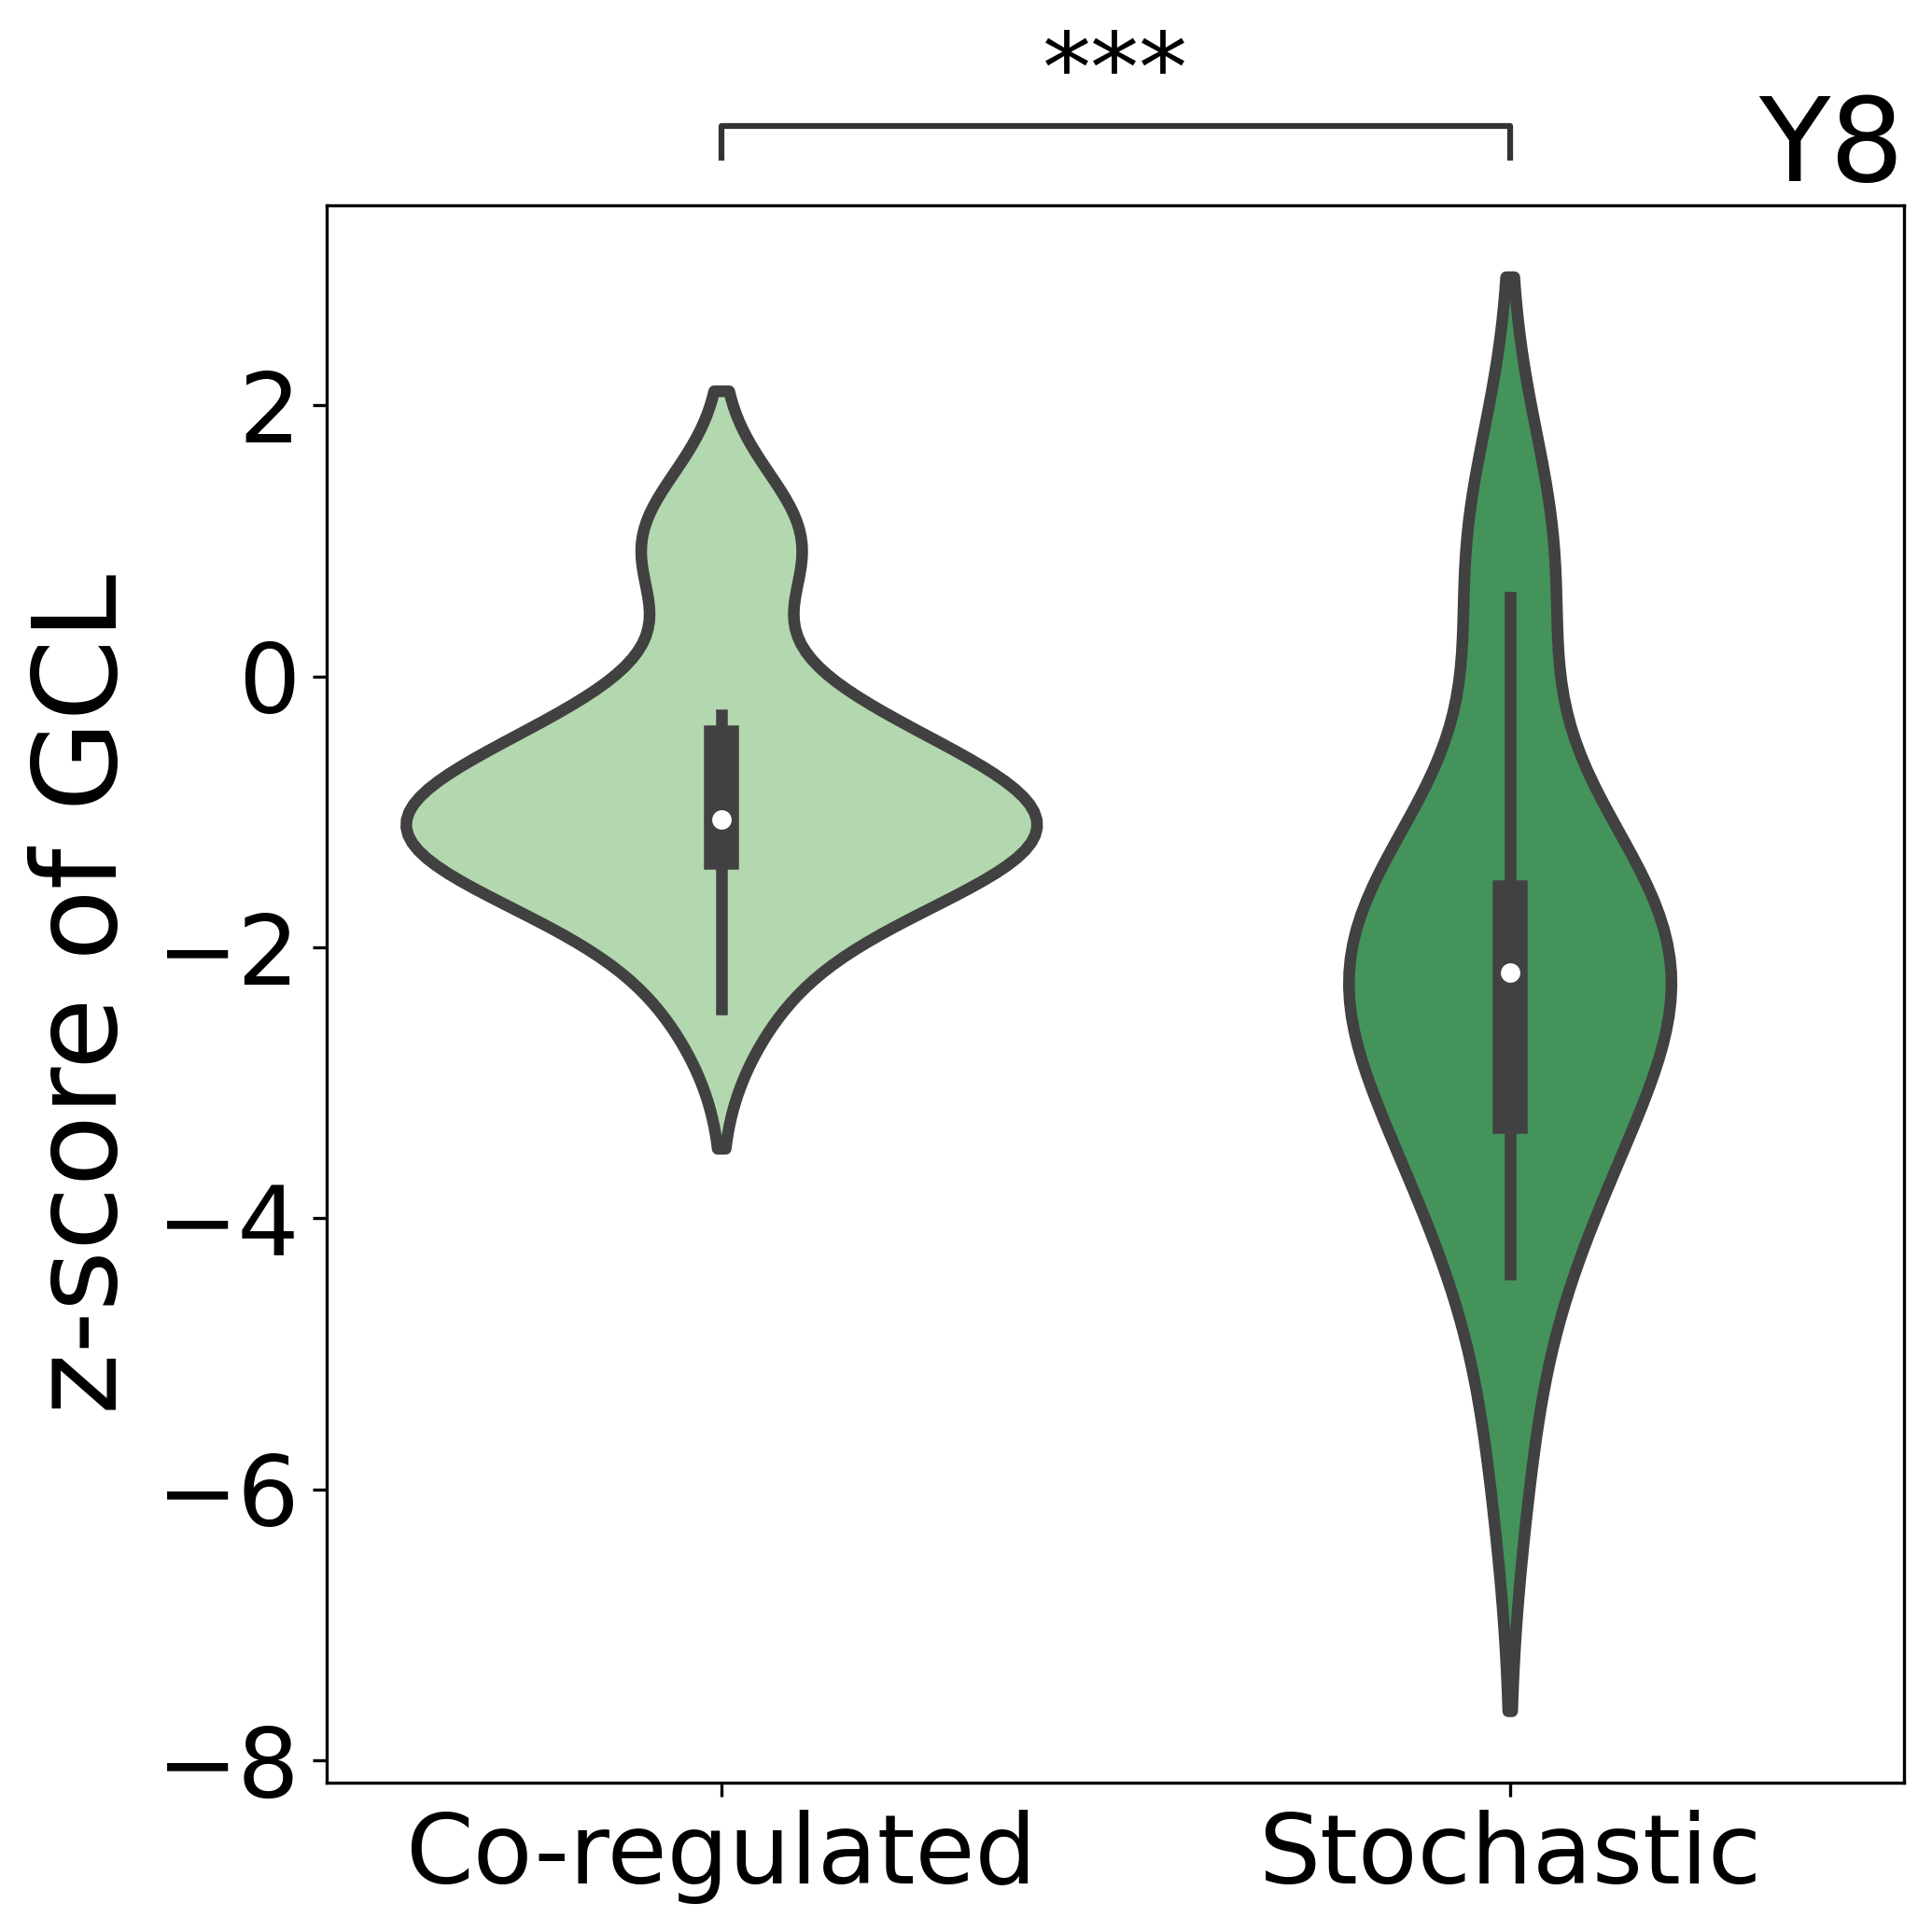

In [20]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
plt.figure(figsize=(7,7), dpi=300)


th, kind = 0.4, 'coreg'
kind2name = {'coreg': 'CoReggenesGCL',
        'stoch': 'StochgenesGCL',
        'rand': 'RandomgenesGCL'}

group2name = {'CoReggenesGCL' : 'Co-regulated',
        'StochgenesGCL' : 'Stochastic',
    'RandomgenesGCL': 'Background'}

mice = ['O1', 'O5', 'Y4', 'Y5', 'Y7', 'Y8']
ths = [0.4, 0.5, 0.6]
kinds = ['coreg', 'stoch', 'rand']
# x = 'Mouse'
x = 'Kind'
# x = 'Mouse_ID'
y = 'GCL'
order = mice
order = ['Co-regulated', 'Stochastic']
tests = ['Mann-Whitney']
box_pairs=[(order[x],order[y]) for x in range(0, len(order)) for y in range(x+1, len(order))]

for th in ths:
    for test in tests:
        # for kind in kinds:
        for mouse in mice:
            df_t = pd.concat((normalize_table(df_real, df_sur, th, kind, group='r') for kind in kinds), axis=0)
            df_t = df_t[df_t.Mouse == mouse]
            df_t['Kind'] = df_t['Kind'].apply(lambda x: group2name[x])
            print(mouse)
            print(df_t['Kind'].value_counts())
            fig, ax = plt.subplots(1,1, figsize=(7,7),dpi=300)
            palette = 'Greens' if mouse in ['Y4','Y5', 'Y7', 'Y8'] else 'Reds'
            ax = sns.violinplot(data=df_t, x=x, y=y, order=order, fontsize=50,ax=ax, 
                                palette=palette,
                                title=mouse)
            annotator = Annotator(ax, box_pairs, data=df_t, x=x, y=y, order=order,
                                 )
            annotator.configure(test=test, 
                                text_format='star', 
                                loc='outside',
                                # loc='inside',
                                verbose=0, 
                                fontsize=25)
                                # fontsize=25)
            annotator.apply_and_annotate()
            ax.set_title(mouse, loc='right')
            plt.xlabel(None)
            plt.ylabel('z-score of GCL')
            plt.xticks(fontsize=25, rotation=0)
            plt.savefig(f'../scDNAm/PICS/png/GCL_minus_strand_normalized_by_mouse_{x}_{y}_{test}_{th}_{mouse}.png', format='png', dpi=300)
            plt.show()